In [1]:
#Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go
from matplotlib.pyplot import figure

In [2]:
#importing database of stock data
googl_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/GOOGL/GOOGL.csv',parse_dates=['Date'],index_col='Date')

In [3]:
#checking data
googl_data.info(),googl_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4020 entries, 2004-08-19 to 2020-08-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4020 non-null   float64
 1   High       4020 non-null   float64
 2   Low        4020 non-null   float64
 3   Close      4020 non-null   float64
 4   Adj Close  4020 non-null   float64
 5   Volume     4020 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 219.8 KB


(None,
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64)

In [4]:
#renaming
df = googl_data

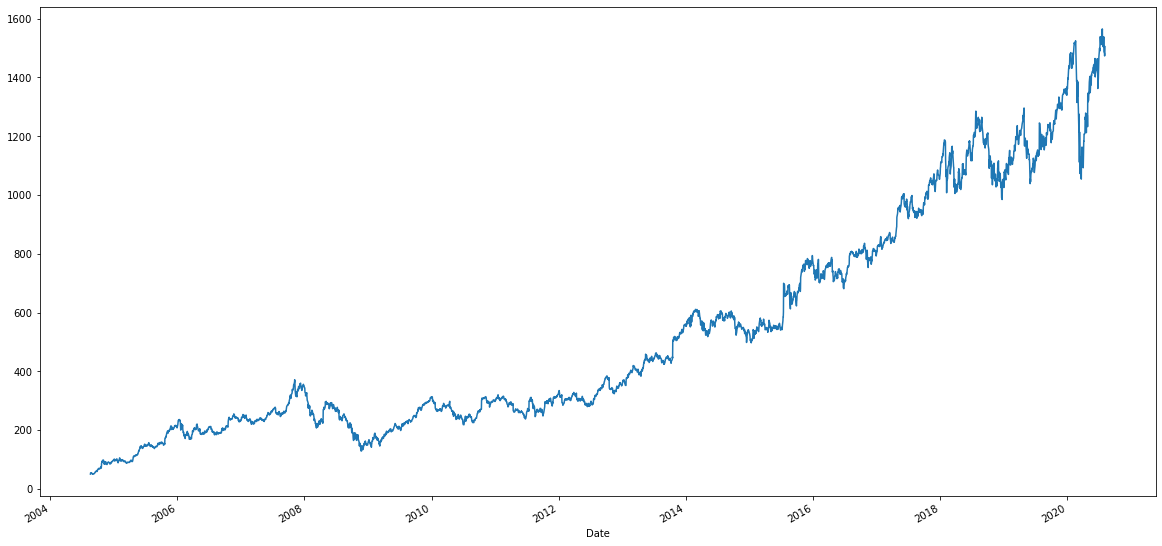

In [5]:
#Plot of data 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
df['Adj Close'].plot(ax=ax)

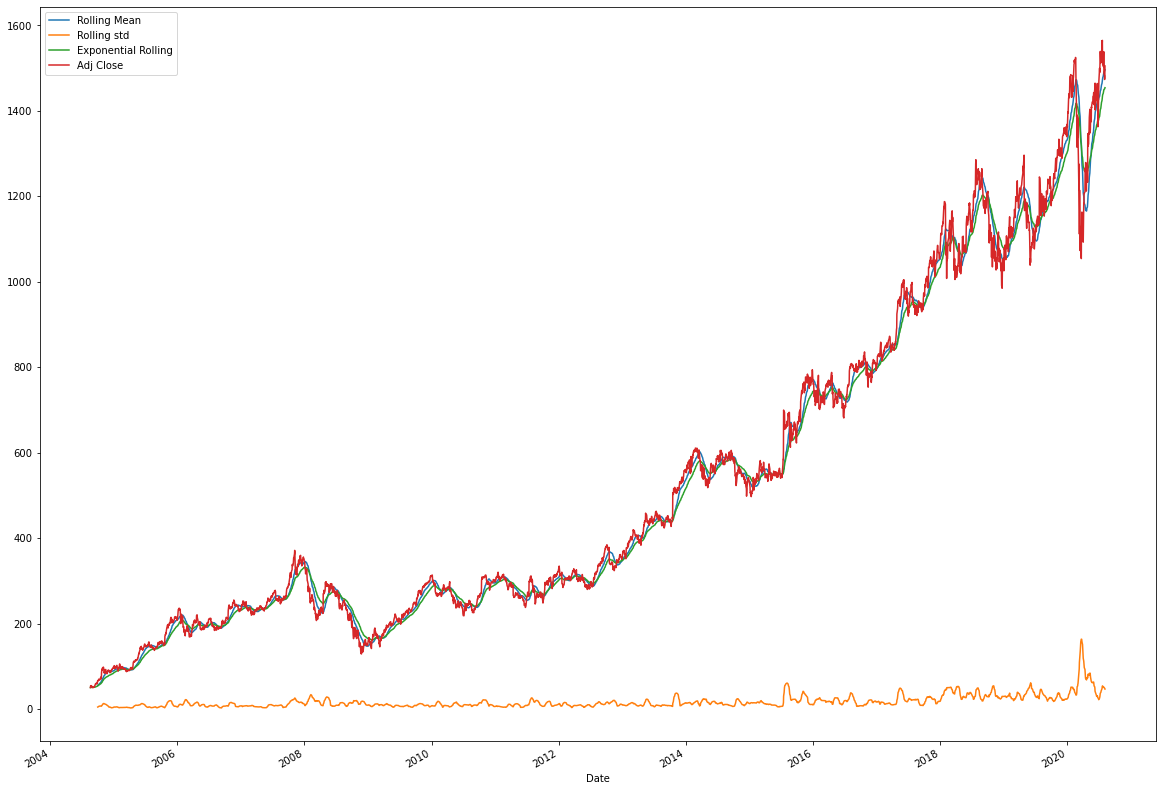

In [6]:
#Rolling data,std,mean and exponential rolling mean of data over a 30day period 
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
df['Adj Close'].rolling(30).mean().plot(ax=ax,label='Rolling Mean')
df['Adj Close'].rolling(30).std().plot(ax=ax,label='Rolling std')
df['Adj Close'].ewm(30,adjust=False).mean().plot(ax=ax,label='Exponential Rolling')
df['Adj Close'].plot(ax=ax,label='Adj Close')
plt.legend()

In [7]:
#normalizing
df['Open'] = df['Open']/df['Open'].iloc[0]-1
df['High'] = df['High']/df['High'].iloc[0]-1
df['Low'] = df['Low']/df['Low'].iloc[0]-1
df['Close'] = df['Close']/df['Close'].iloc[0]-1
df['Adj Close'] = df['Adj Close']/df['Adj Close'].iloc[0]-1
df['Volume'] = df['Volume']/df['Volume'].iloc[0]-1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002784D132070>,
      dtype=object)

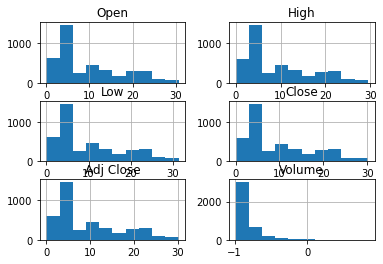

In [8]:
df.hist()

In [9]:
#Creating functions of indicators to add to data frame to check which ones are best for predicting future stock price

In [10]:
from ta.momentum import RSIIndicator,AwesomeOscillatorIndicator,KAMAIndicator,PercentagePriceOscillator,PercentageVolumeOscillator
from ta.momentum import ROCIndicator,StochRSIIndicator,StochasticOscillator,TSIIndicator,UltimateOscillator
from ta.momentum import WilliamsRIndicator

In [11]:
rsi_indicator = RSIIndicator(close=df['Adj Close'])
awesome_oscillator_indicator = AwesomeOscillatorIndicator(high=df['High'],low=df['Low'])
kama_indicator = KAMAIndicator(close=df['Adj Close'])
percentage_price_oscillator_indicator = PercentagePriceOscillator(close=df['Adj Close'])
percentage_volume_oscillator_indicator = PercentageVolumeOscillator(volume=df['Volume'])
roc_indicator = ROCIndicator(close=df['Adj Close'])
stoch_rsi_indicator = StochRSIIndicator(close=df['Adj Close'])
stoch_rsi_oscillator_indicator = StochasticOscillator(high=df['High'],low=df['Low'],close=df['Adj Close'])
tsi_indicator = TSIIndicator(close=df['Adj Close'])
ultimate_oscillator_indicator = UltimateOscillator(high=df['High'],low=df['Low'],close=df['Adj Close'])
williams_r_indicator = WilliamsRIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])

In [12]:
df['RSI'] = rsi_indicator.rsi()
df['Awesome Oscillator'] = awesome_oscillator_indicator.awesome_oscillator()
df['KAMA'] = kama_indicator.kama()
df['PPO'] = percentage_price_oscillator_indicator.ppo()
df['PVO'] = percentage_volume_oscillator_indicator.pvo()
df['ROC'] = roc_indicator.roc()
df['Stoch RSI In'] = stoch_rsi_indicator.stochrsi()
df['Stoch RSI OS'] = stoch_rsi_oscillator_indicator.stoch()
df['TSI'] = tsi_indicator.tsi()
df['Ult Osc'] = ultimate_oscillator_indicator.ultimate_oscillator()
df['Williams R'] = williams_r_indicator.williams_r() 

In [13]:
from ta.trend import MACD, ADXIndicator, AroonIndicator,CCIIndicator,DPOIndicator
from ta.trend import EMAIndicator,IchimokuIndicator,KSTIndicator,MassIndex,PSARIndicator
from ta.trend import STCIndicator,TRIXIndicator,VortexIndicator,WMAIndicator

In [14]:
macd_indicator = MACD(df['Adj Close'])
adx_indicator = ADXIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
aroon_indicator = AroonIndicator(close=df['Adj Close'])
cci_indicator = CCIIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
dpo_indicator = DPOIndicator(close=df['Adj Close'])
ema_indicator = EMAIndicator(close=df['Adj Close'])
ichimoku_indicator = IchimokuIndicator(high=df['High'],low=df['Low'])
kst_indicator = KSTIndicator(close=df['Adj Close'])
mass_indicator = MassIndex(high=df['High'],low=df['Low'])
psar_indicator = PSARIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
stc_indicator = STCIndicator(close=df['Adj Close'])
trix_indicator = TRIXIndicator(close=df['Adj Close'])
vortex_indicator = VortexIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'])
wma_indicator = WMAIndicator(close=df['Adj Close'])

In [15]:
df['MACD'] = macd_indicator.macd()
df['ADX'] = adx_indicator.adx()
df['Aroon'] = aroon_indicator.aroon_indicator()
df['CCI'] = cci_indicator.cci()
df['DPO'] = dpo_indicator.dpo()
df['EMA'] = ema_indicator.ema_indicator()
df['Ichimoku Base'] = ichimoku_indicator.ichimoku_base_line() 
df['Ichimoku CL'] = ichimoku_indicator.ichimoku_conversion_line()
df['KST'] = kst_indicator.kst()
df['MASS'] = mass_indicator.mass_index() 
df['PSAR'] = psar_indicator.psar()
df['STC'] = stc_indicator.stc()
df['TRIX'] = trix_indicator.trix() 
df['VI'] = vortex_indicator.vortex_indicator_diff()
df['WMA'] = wma_indicator.wma()

C:\Users\Jonat\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Jonat\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [16]:
from ta.volatility import BollingerBands,AverageTrueRange,DonchianChannel,KeltnerChannel,UlcerIndex

In [17]:
bollinger_band_indicator = BollingerBands(close=df['Adj Close'])
average_true_range_indicator = AverageTrueRange(high=df['High'],low=df['Low'],close=df['Adj Close'])
donchain_channel_indicator = DonchianChannel(high=df['High'],low=df['Low'],close=df['Adj Close'])
keltner_channel_indicator = KeltnerChannel(high=df['High'],low=df['Low'],close=df['Adj Close'])
ulcer_indicator = UlcerIndex(close=df['Adj Close'])

In [18]:
df['Bollinger Avg'] = bollinger_band_indicator.bollinger_mavg()
df['Bollinger High'] = bollinger_band_indicator.bollinger_hband()
df['Bollinger Low'] = bollinger_band_indicator.bollinger_lband()
df['ATR'] = average_true_range_indicator.average_true_range()
df['Donchain Mid'] = donchain_channel_indicator.donchian_channel_mband()
df['Donchain High'] = donchain_channel_indicator.donchian_channel_hband()
df['Donchain Low'] = donchain_channel_indicator.donchian_channel_lband()
df['Keltner Mid'] = keltner_channel_indicator.keltner_channel_mband()
df['Keltner High'] = keltner_channel_indicator.keltner_channel_hband()
df['Keltner Low'] = keltner_channel_indicator.keltner_channel_lband()
df['Ulcer'] = ulcer_indicator.ulcer_index()

In [19]:
from ta.volume import OnBalanceVolumeIndicator,AccDistIndexIndicator,ChaikinMoneyFlowIndicator,EaseOfMovementIndicator,ForceIndexIndicator
from ta.volume import MFIIndicator,NegativeVolumeIndexIndicator,VolumePriceTrendIndicator,VolumeWeightedAveragePrice

In [20]:
on_balance_volume_indicator = OnBalanceVolumeIndicator(close=df['Adj Close'],volume=df['Volume'])
acc_dist_indicator_indicator = AccDistIndexIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])
chaikin_money_flow_indicator = ChaikinMoneyFlowIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])
ease_movement_indicator = EaseOfMovementIndicator(high=df['High'],low=df['Low'],volume=df['Volume'])
rorce_index_indicator = ForceIndexIndicator(close=df['Adj Close'],volume=df['Volume'])
mfi_indicator = MFIIndicator(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])
nvi_indicator = NegativeVolumeIndexIndicator(close=df['Adj Close'],volume=df['Volume'])
vpt_indicator = VolumePriceTrendIndicator(close=df['Adj Close'],volume=df['Volume'])
vwap_indicator = VolumeWeightedAveragePrice(high=df['High'],low=df['Low'],close=df['Adj Close'],volume=df['Volume'])

In [21]:
df['OBV'] = on_balance_volume_indicator.on_balance_volume() 
df['ADI'] = acc_dist_indicator_indicator.acc_dist_index()
df['CMF'] = chaikin_money_flow_indicator.chaikin_money_flow()
df['EoM'] = ease_movement_indicator.ease_of_movement()
df['FI'] = rorce_index_indicator.force_index()
df['MFI'] = mfi_indicator.money_flow_index()
#df['NVI'] = nvi_indicator.negative_volume_index()
df['VPT'] = vpt_indicator.volume_price_trend()
df['VWAP'] = vwap_indicator.volume_weighted_average_price()

In [22]:
df.head()

Open      High       Low     Close  Adj Close    Volume  RSI  \
Date                                                                         
2004-08-19  0.0000  0.000000  0.000000  0.000000   0.000000  0.000000  NaN   
2004-08-20  0.0101  0.048241  0.047311  0.079430   0.079430 -0.488697  NaN   
2004-08-23  0.1075  0.090525  0.136411  0.090293   0.090293 -0.591211  NaN   
2004-08-24  0.1124  0.072458  0.079304  0.045147   0.045147 -0.658584  NaN   
2004-08-25  0.0496  0.037863  0.082534  0.056408   0.056408 -0.794250  NaN   

            Awesome Oscillator  KAMA  PPO  ...  Keltner Low  Ulcer       OBV  \
Date                                       ...                                 
2004-08-19                 NaN   NaN  NaN  ...     0.000000    NaN  0.000000   
2004-08-20                 NaN   NaN  NaN  ...     0.028699    NaN -0.488697   
2004-08-23                 NaN   NaN  NaN  ...     0.069676    NaN -1.079908   
2004-08-24                 NaN   NaN  NaN  ...     0.070377    NaN -0.421324   
2004-08-25                 NaN   NaN  NaN  ...     0.077023    NaN -1.215574   

                  ADI  CMF            EoM  FI  MFI       VPT  VWAP  
Date                                                                
2004-08-19   0.000000  NaN            NaN NaN  NaN      -inf   NaN  
2004-08-20 -33.267577  NaN   -9091.693754 NaN  NaN      -inf   NaN  
2004-08-23 -33.864758  NaN  509858.033987 NaN  NaN      -inf   NaN  
2004-08-24 -39.778292  NaN  -39070.095641 NaN  NaN  0.248436   NaN  
2004-08-25 -39.913075  NaN  -88204.041635 NaN  NaN  0.131167   NaN  

[5 rows x 51 columns]

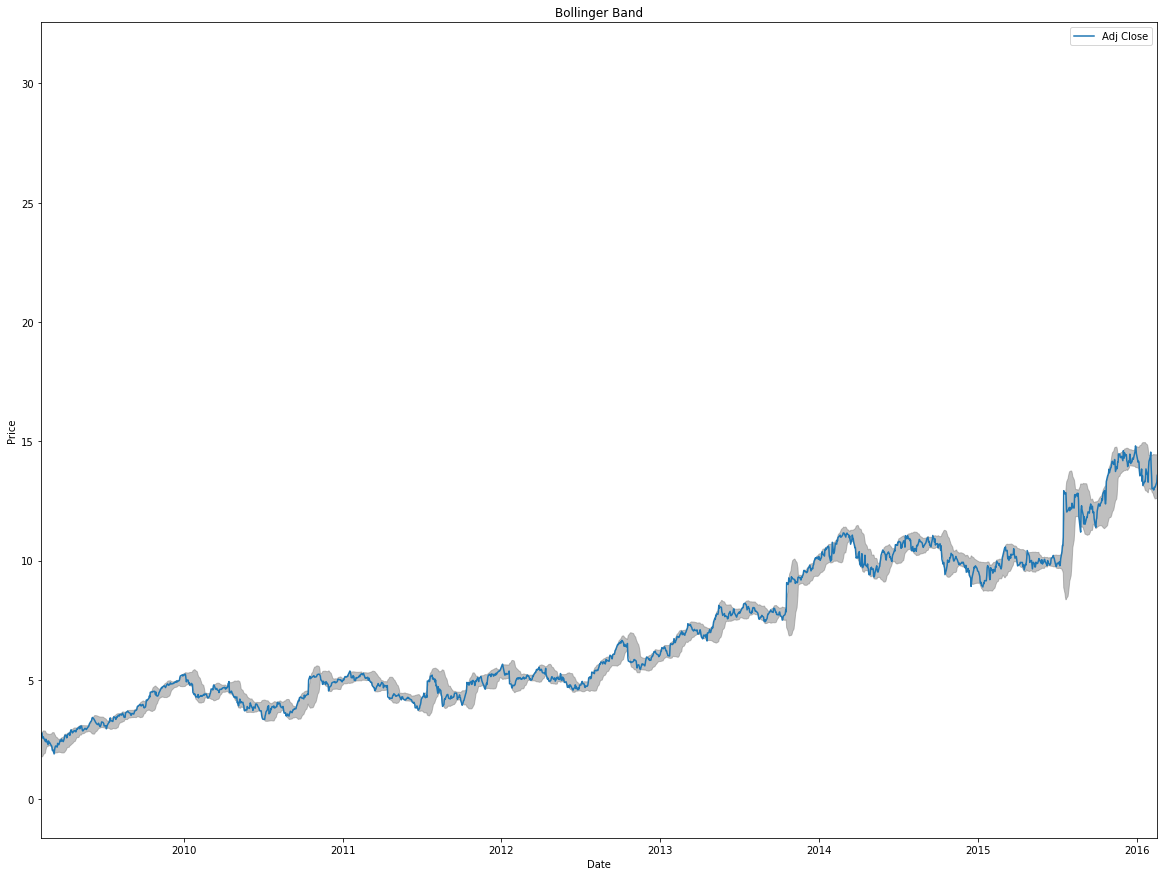

In [23]:
#Plotting Bollinger Band 
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
x_axis = df.index
plt.fill_between(x_axis,df['Bollinger High'],df['Bollinger Low'],color='grey',alpha=.5)
ax.plot(x_axis,df['Adj Close'],label='Adj Close')
ax.set_title('Bollinger Band')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.xaxis.zoom(3)
ax.legend()

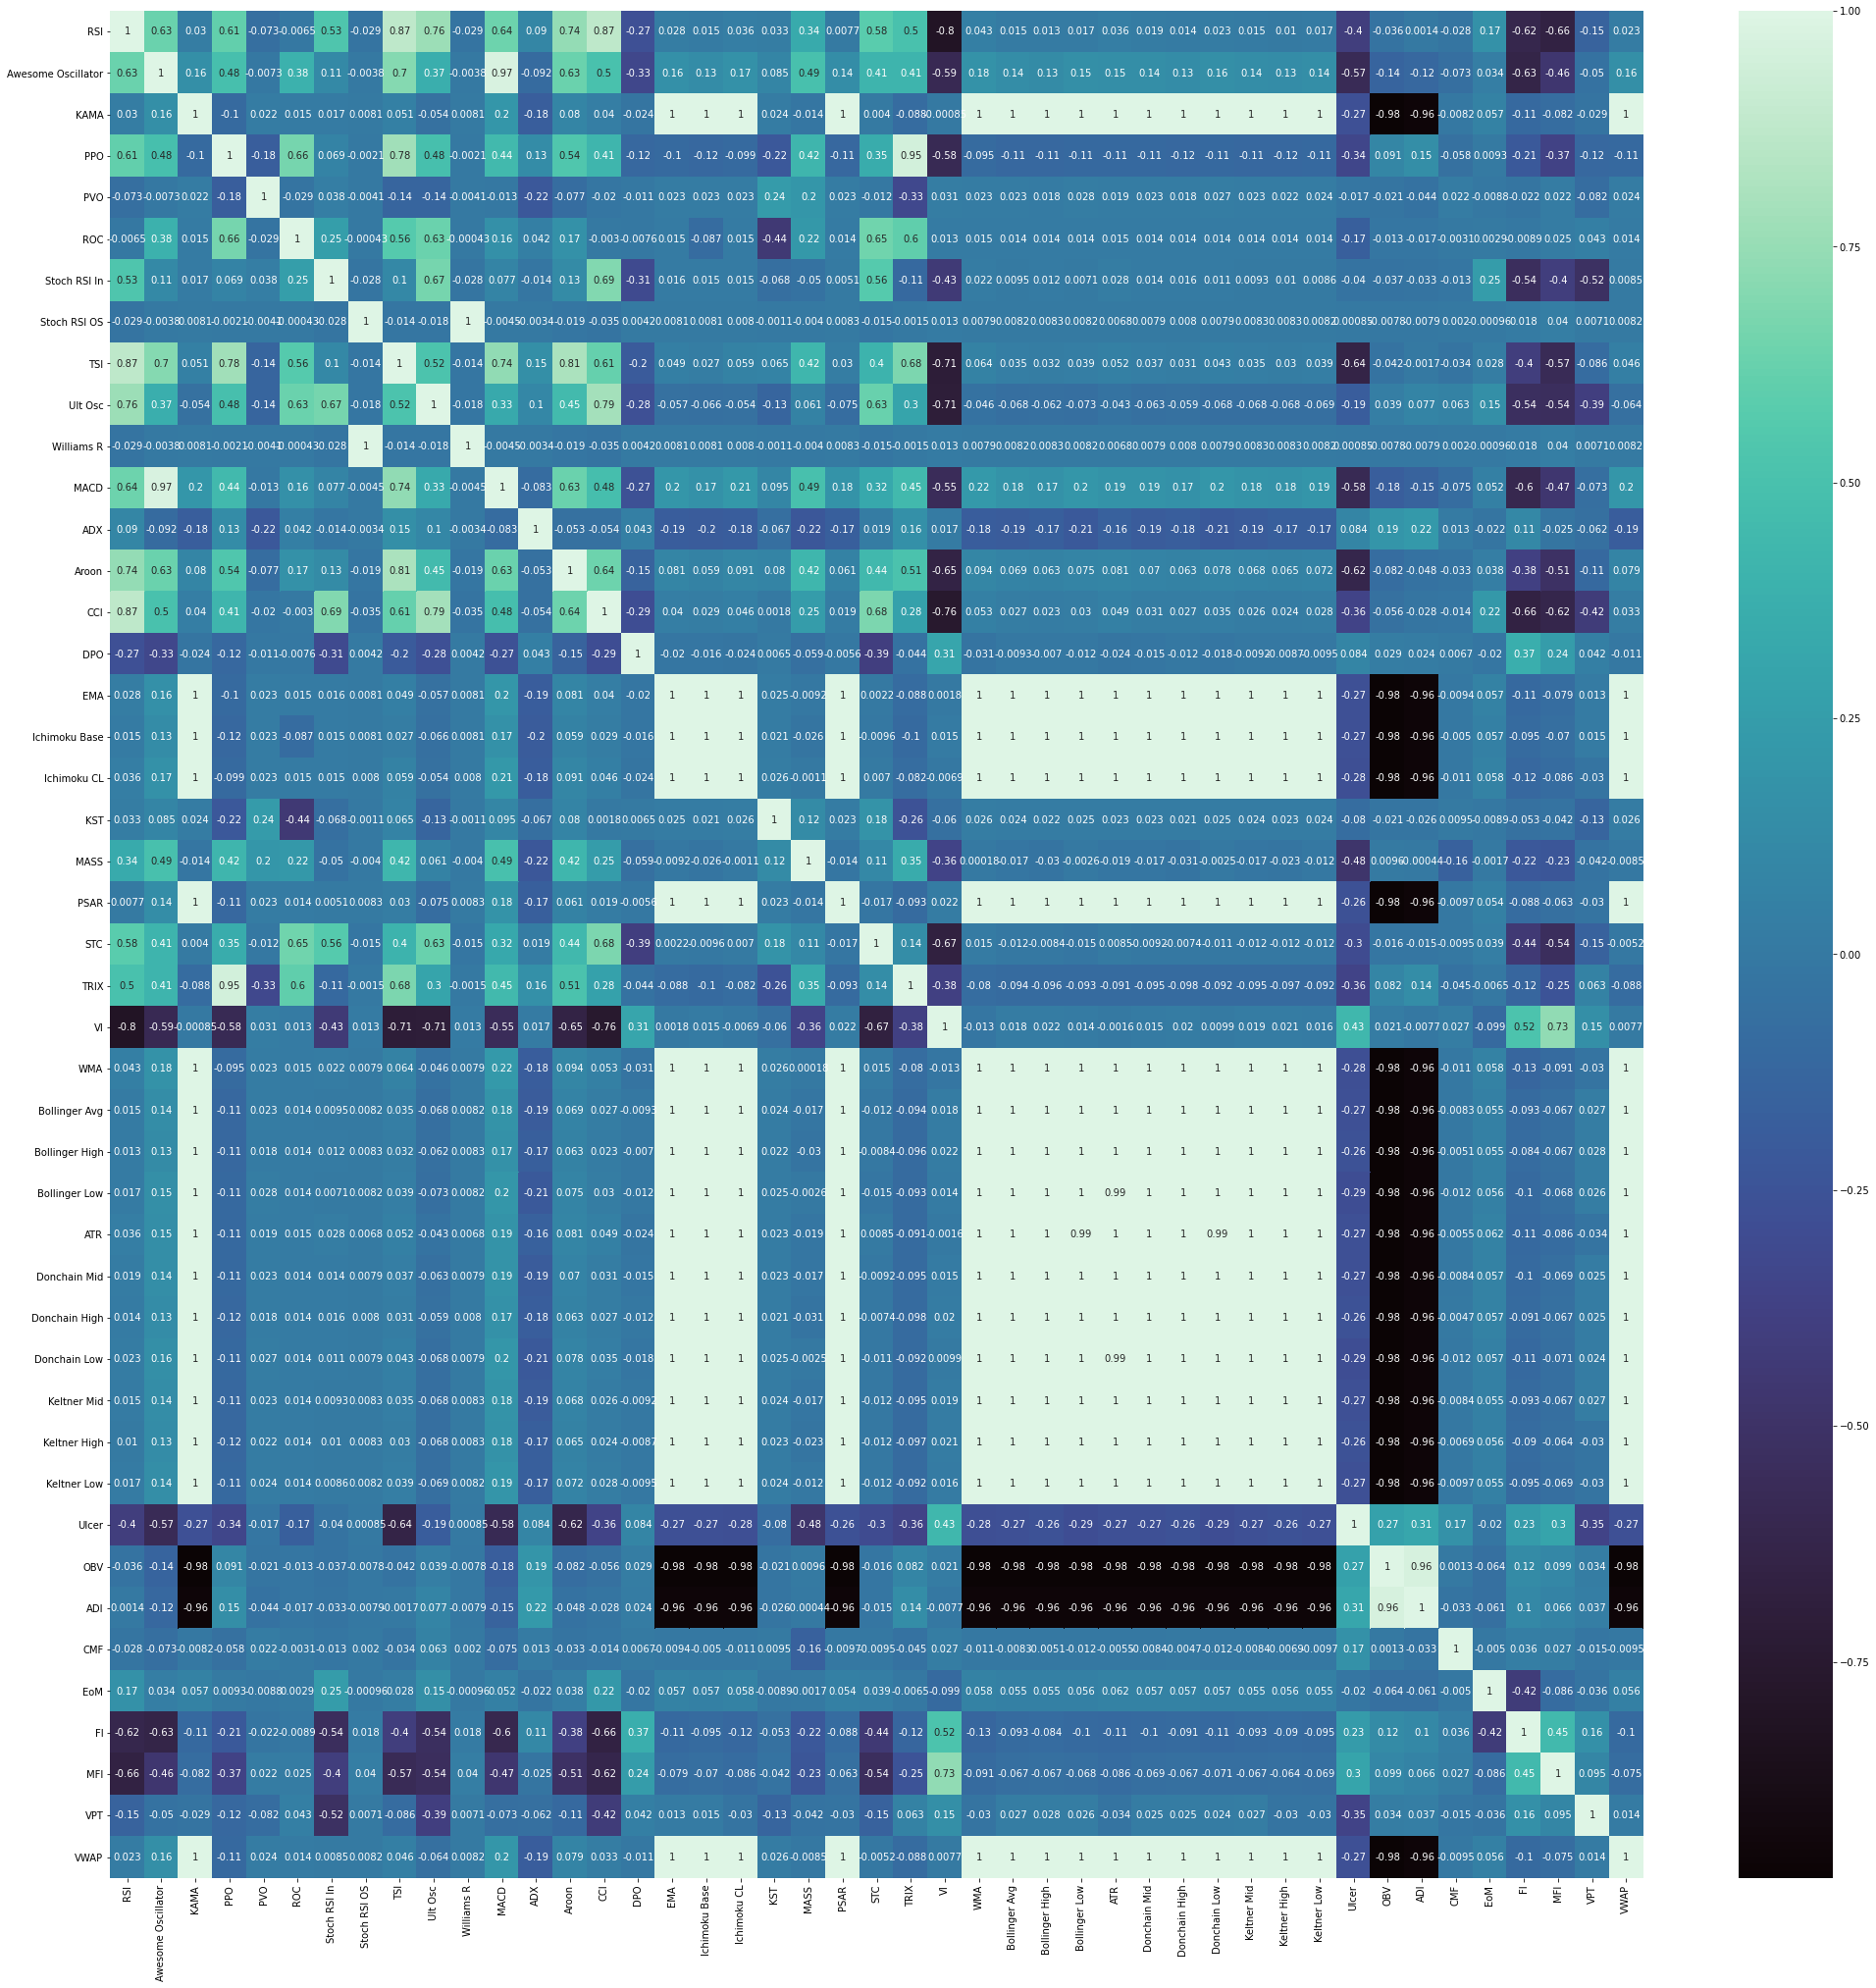

In [24]:
#Checking Corr
fig, ax = plt.subplots(figsize=(35,35))
sns.heatmap(df.drop(columns=['Open','Close','High','Low','Adj Close','Volume']).corr(),annot=True,cmap='mako')

In [25]:
#We will be predicting the next day price. We are shifting the data by 1 day
df['Adj Close Shift'] = df['Adj Close'].shift(-1)
df.dropna(inplace=True)

In [26]:
#Checking data before we split it into training and testing 
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3948 entries, 2004-11-30 to 2020-08-05
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                3948 non-null   float64
 1   High                3948 non-null   float64
 2   Low                 3948 non-null   float64
 3   Close               3948 non-null   float64
 4   Adj Close           3948 non-null   float64
 5   Volume              3948 non-null   float64
 6   RSI                 3948 non-null   float64
 7   Awesome Oscillator  3948 non-null   float64
 8   KAMA                3948 non-null   float64
 9   PPO                 3948 non-null   float64
 10  PVO                 3948 non-null   float64
 11  ROC                 3948 non-null   float64
 12  Stoch RSI In        3948 non-null   float64
 13  Stoch RSI OS        3948 non-null   float64
 14  TSI                 3948 non-null   float64
 15  Ult Osc             3948 non-null   f

Open      High       Low     Close  Adj Close    Volume  \
Date                                                                    
2004-11-30  0.8071  0.758601  0.878387  0.813634   0.813634 -0.655510   
2004-12-01  0.8195  0.753796  0.871092  0.793502   0.793502 -0.648169   
2004-12-02  0.7990  0.744282  0.860671  0.787921   0.787921 -0.719895   
2004-12-03  0.7995  0.739958  0.850771  0.797887   0.797887 -0.737419   
2004-12-06  0.7913  0.736498  0.834306  0.756926   0.756926 -0.720204   

                  RSI  Awesome Oscillator      KAMA       PPO  ...      Ulcer  \
Date                                                           ...              
2004-11-30  59.376760            0.042434  0.784841  6.046950  ...  20.190168   
2004-12-01  57.383357            0.055695  0.785235  6.008174  ...  18.658772   
2004-12-02  56.813906            0.054463  0.785343  5.844640  ...  18.383068   
2004-12-03  57.622635            0.047340  0.786927  5.749704  ...  18.016088   
2004-12-06  53.212079            0.033839  0.785627  5.180134  ...  17.841905   

                  OBV        ADI       CMF            EoM        FI  \
Date                                                                  
2004-11-30 -11.962288 -49.817761  1.093280  265281.248044 -0.007233   
2004-12-01 -11.314118 -50.027104  1.071035 -109481.022346 -0.004335   
2004-12-02 -10.594223 -50.207165  0.958414 -161147.110625 -0.003142   
2004-12-03 -11.331642 -50.173588  0.885322 -106877.228776 -0.003743   
2004-12-06 -10.611438 -50.592947  0.533645 -135294.513831  0.001006   

                  MFI       VPT      VWAP  Adj Close Shift  
Date                                                        
2004-11-30  32.974943 -0.018531  0.749826         0.793502  
2004-12-01  35.389875  0.008484  0.761480         0.787921  
2004-12-02  44.977180  0.021101  0.764710         0.797887  
2004-12-03  52.993616 -0.004264  0.765764         0.756926  
2004-12-06  61.764353  0.027645  0.761983         0.708491  

[5 rows x 52 columns]

In [27]:
#Spliting the dta into training and testing
#X = df.drop(columns=['Adj Close Shift','Open','High','Low','Close','Volume'])
#y = df['Adj Close Shift']
#X_train = X[:int(X.shape[0]*0.7)]
#X_test = X[int(X.shape[0]*0.7):]
#y_train = y[:int(X.shape[0]*0.7)]
#y_test = y[int(X.shape[0]*0.7):]

In [28]:
#Spliting the dta into training and testing with 5 months
X = df.drop(columns=['Adj Close Shift','Open','High','Low','Close','Volume'])
y = df['Adj Close Shift']
X_train = X['2019-04-01':'2019-07-31']
X_test = X['2019-08-01':'2019-08-31']
y_train = y['2019-04-01':'2019-07-31']
y_test = y['2019-08-01':'2019-08-31']

In [29]:
X_train_columns= X_train.columns
print(X.shape,y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3948, 46) (3948,)
(85, 46)
(85,)
(22, 46)
(22,)


R^2 Score: 0.962489027986565
LM Mean Absolute Error: 3.3856786579424663
LM Mean Squared Error: 12.983079303189015


Text(0, 0.5, 'y_pred')

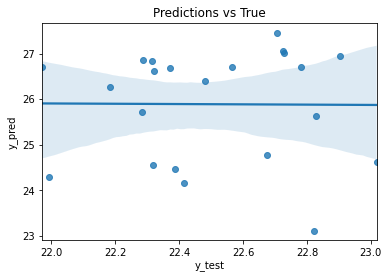

In [30]:
#OLS Linear Model
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
rModel = linear_model.LinearRegression()
rModel.fit(X_train,y_train)
y_pred = rModel.predict(X_test)
#R-Squared coefficent
r2 = rModel.score(X_train,y_train)
lm_mean_abs_error = mean_absolute_error(y_test,y_pred)
lm_mean_squared_error = mean_squared_error(y_test,y_pred)
print('R^2 Score:',r2)
print('LM Mean Absolute Error:',lm_mean_abs_error)
print('LM Mean Squared Error:',lm_mean_squared_error)
#check to see how prediction repersnt true results
sns.regplot(x=y_test,y=y_pred)
plt.title('Predictions vs True')
plt.xlabel('y_test')
plt.ylabel('y_pred')



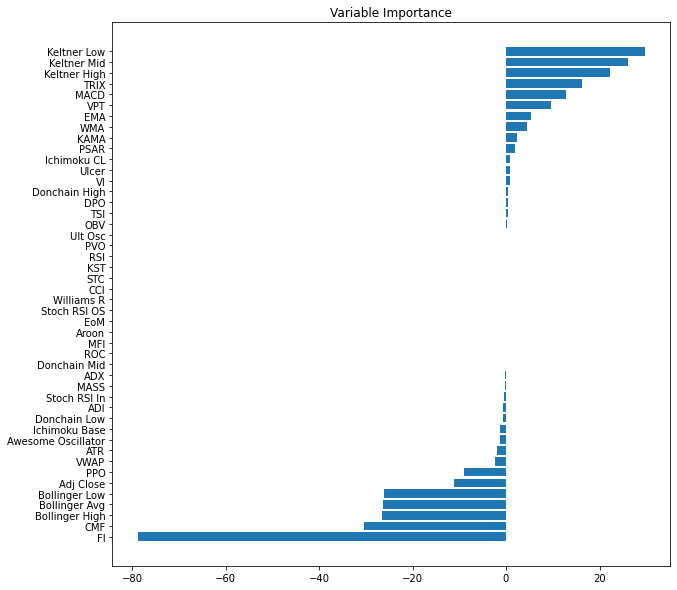

In [31]:
#Feature Importance
lm_imp = rModel.coef_
sorted_idx = np.argsort(lm_imp)
num_features = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(10,10))
plt.barh(num_features,lm_imp[sorted_idx],align='center')
plt.yticks(num_features, X_train_columns[sorted_idx])
#plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

R^2 Score: 0.9262398354999346
Ridge Mean Absolute Error: 0.6703669657945303
Ridge Mean Squared Error: 0.6150920359613964


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43789e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Text(0, 0.5, 'y_pred_ridge')

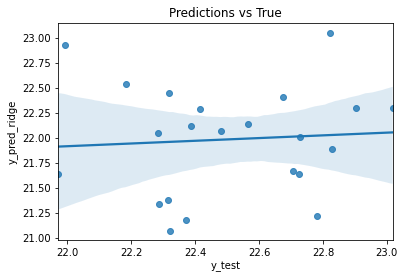

In [32]:
#Ridge Model
ridge_model = linear_model.Ridge()
ridge_model.fit(X_train,y_train)
y_pred_ridge = ridge_model.predict(X_test)
#R-Squared coefficent
r2 = ridge_model.score(X_train,y_train)
ridge_mean_abs_error = mean_absolute_error(y_test,y_pred_ridge)
ridge_mean_squared_error = mean_squared_error(y_test,y_pred_ridge)
print('R^2 Score:',r2)
print('Ridge Mean Absolute Error:',ridge_mean_abs_error)
print('Ridge Mean Squared Error:',ridge_mean_squared_error)
sns.regplot(x=y_test,y=y_pred_ridge)
plt.title('Predictions vs True')
plt.xlabel('y_test')
plt.ylabel('y_pred_ridge')


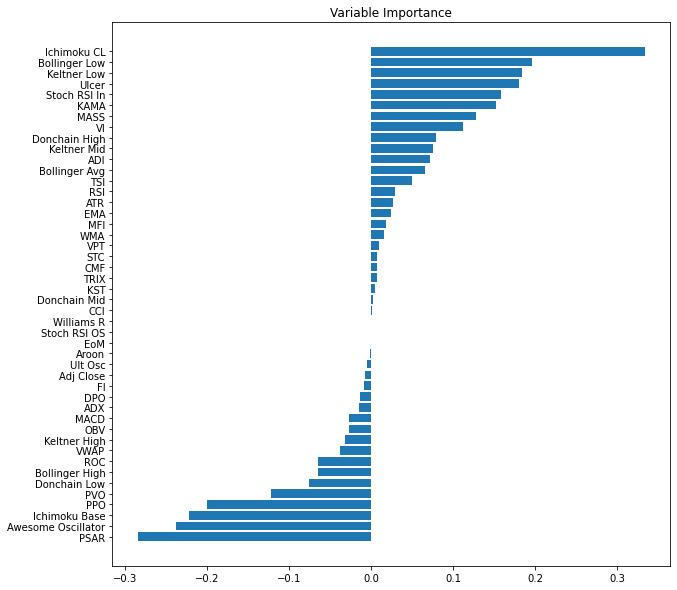

In [33]:
#Feature Importance
ridge_imp = ridge_model.coef_
sorted_idx = np.argsort(ridge_imp)
num_features = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(10,10))
plt.barh(num_features,ridge_imp[sorted_idx],align='center')
plt.yticks(num_features, X_train_columns[sorted_idx])
#plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

random_grid = {'n_estimators':np.arange(1,5),'max_depth':np.arange(1,5)}
rfr = RandomForestRegressor(random_state=49)
rfr_cv = GridSearchCV(rfr,random_grid,cv=5)
rfr_cv.fit(X_train,y_train)

print("Best Parameters: " + str(rfr_cv.best_params_))

rfr = RandomForestRegressor(n_estimators = rfr_cv.best_params_['n_estimators'],max_depth = rfr_cv.best_params_['max_depth'],random_state=49)
rfr.fit(X_train,y_train)

y_pred_rfr = rfr.predict(X_test)

mean_abs_error = mean_absolute_error(y_test,y_pred_rfr)
mean_sqrd_error = mean_squared_error(y_test,y_pred_rfr)
print('R^2:',rfr.score(X_train,y_train))
print('Mean Absolute Error:',mean_abs_error)
print('Mean Squared Error:',mean_sqrd_error)



Best Parameters: {'max_depth': 3, 'n_estimators': 4}
R^2: 0.9315780030631771
Mean Absolute Error: 0.590085211475898
Mean Squared Error: 0.4826495650704796


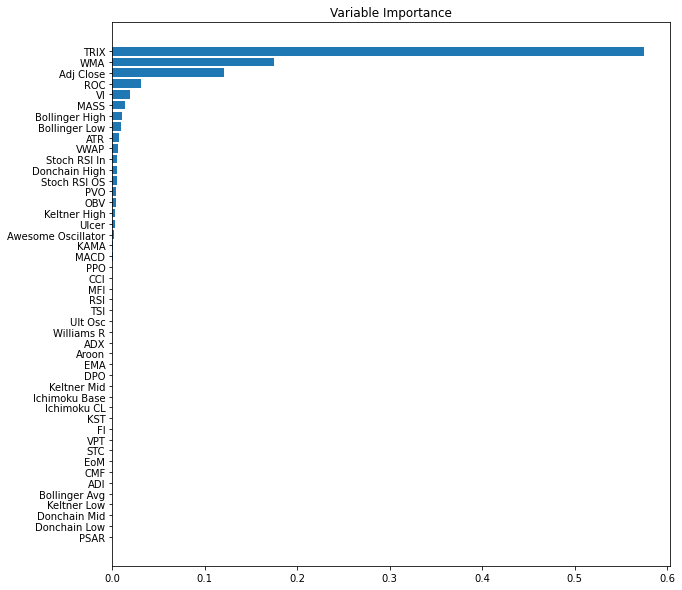

In [35]:
rfr_imp = rfr.feature_importances_
sorted_idx = np.argsort(rfr_imp)
num_features = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(10,10))
plt.barh(num_features,rfr_imp[sorted_idx],align='center')
plt.yticks(num_features, X_train_columns[sorted_idx])
#plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Now we are going to make separate models for each Technical category and see which performs best and then see if mixing the best
does better

In [36]:
df_momentum = df[['Adj Close Shift','Adj Close','RSI','Awesome Oscillator','KAMA','PPO','PVO','ROC','Stoch RSI In','Stoch RSI OS','TSI','Ult Osc','Williams R']]

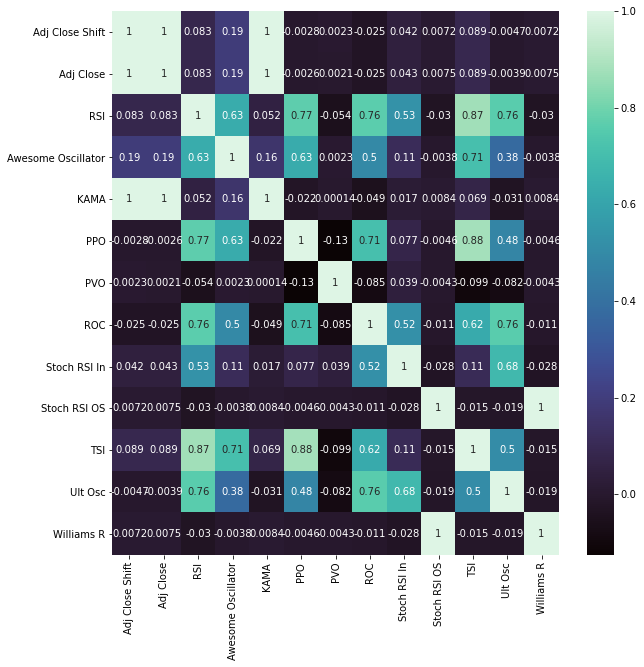

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_momentum.corr(),annot=True,cmap='mako')

In [38]:
#We can drop KAMA and Williams R as they have a perfect corr with other indicators
df_momentum.drop(columns=['KAMA','Williams R'],inplace=True)

C:\Users\Jonat\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
#Separating Data
X = df_momentum.drop(columns=['Adj Close Shift'])['2019-04-01':'2019-08-31']
y = df_momentum['Adj Close Shift']['2019-04-01':'2019-08-31']
X_train_columns = X.columns

R^2 Score: 0.9707264794671222
Mean Absolute Error: 1.4605799374126172
Mean Squared Error: 2.7921777376012167


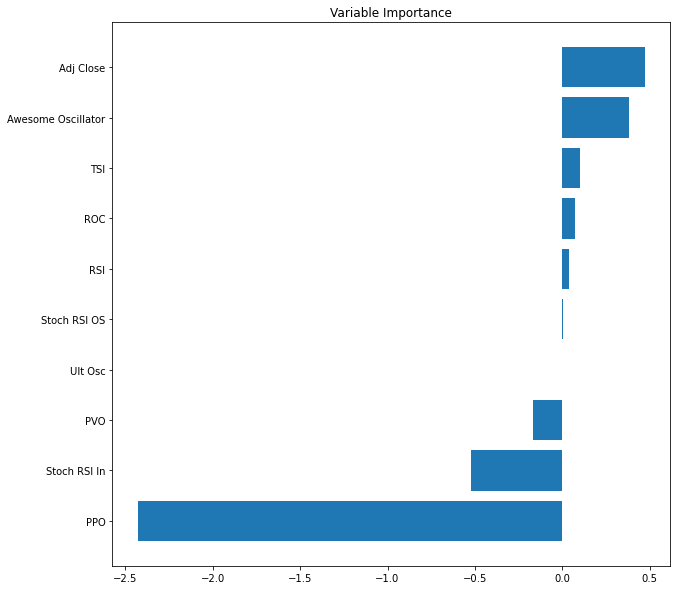

R^2 Score: 0.9567044140694232
Mean Absolute Error: 0.48868798611051184
Mean Squared Error: 0.981465698457464


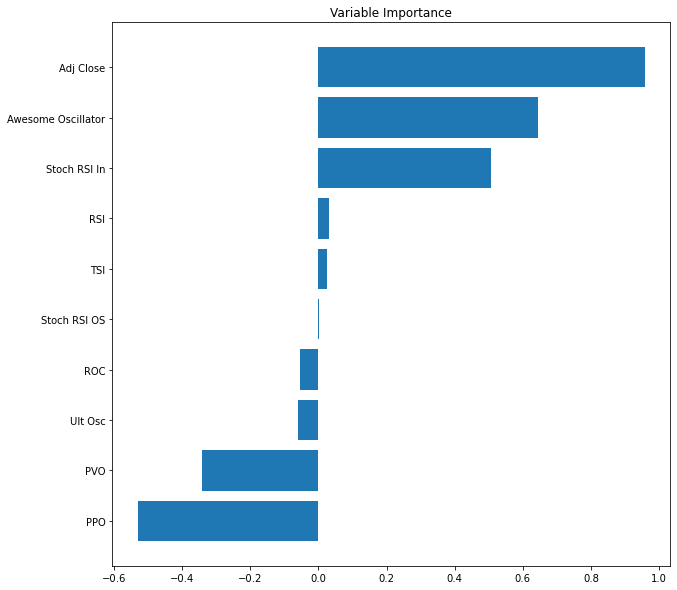

R^2 Score: 0.9316686069365223
Mean Absolute Error: 0.32290274318131357
Mean Squared Error: 0.14261817113431025


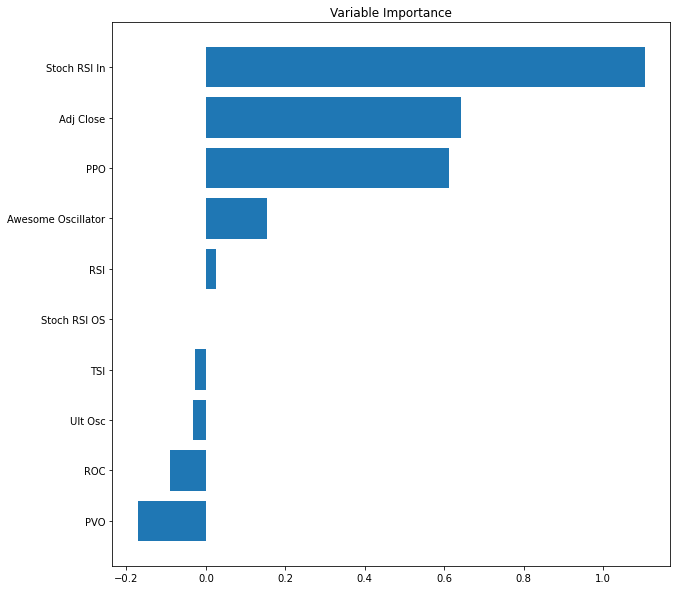

R^2 Score: 0.9289158795616823
Mean Absolute Error: 0.35475331823921363
Mean Squared Error: 0.36695852644304133


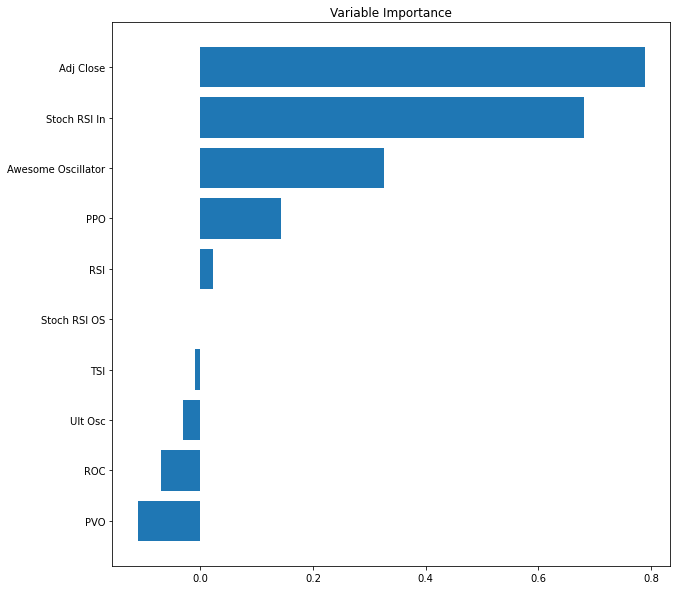

R^2 Score: 0.8916251251736192
Mean Absolute Error: 0.28077978618671506
Mean Squared Error: 0.1362300328850115


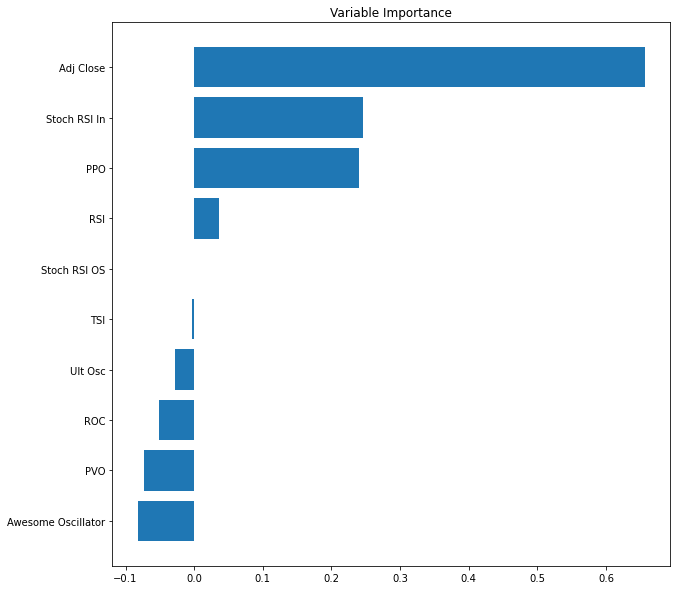

In [40]:
#OLS
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    rModel = linear_model.LinearRegression()
    rModel.fit(X_tr,y_tr)
    
    y_pred = rModel.predict(X_ts)
    
    r2 = rModel.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred)
    mean_sqr_error =  mean_squared_error(y_ts,y_pred)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Squared Error:',mean_sqr_error)

    lm_imp = rModel.coef_
    sorted_idx = np.argsort(lm_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,lm_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()


Alpha is: 0.01
R^2 Score: 0.9692533278776508
Mean Absolute Error: 0.7537957046528914
Mean Squared Error: 0.7990478050699419


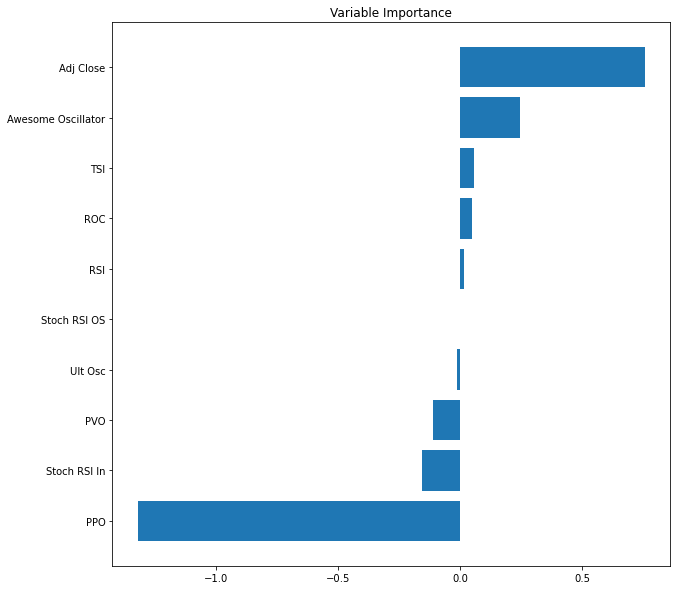

Alpha is: 0.12
R^2 Score: 0.9618748366243071
Mean Absolute Error: 0.5733754405837739
Mean Squared Error: 0.508314957674069


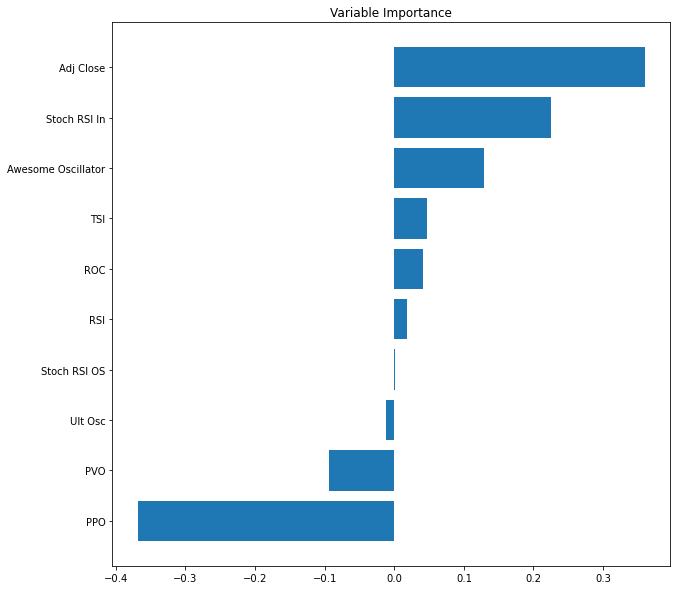

Alpha is: 0.23
R^2 Score: 0.9590492938836693
Mean Absolute Error: 0.7557858629282898
Mean Squared Error: 0.7740919590283522


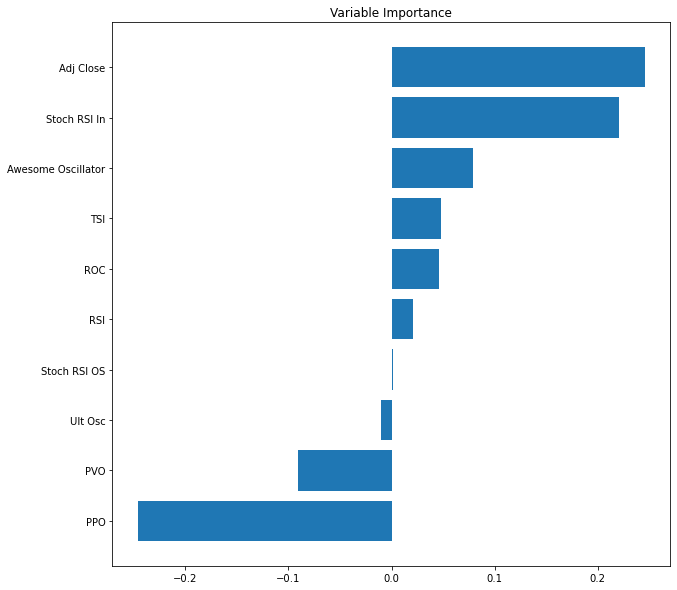

Alpha is: 0.34
R^2 Score: 0.9571955268145266
Mean Absolute Error: 0.8475832347195803
Mean Squared Error: 0.9306491828909418


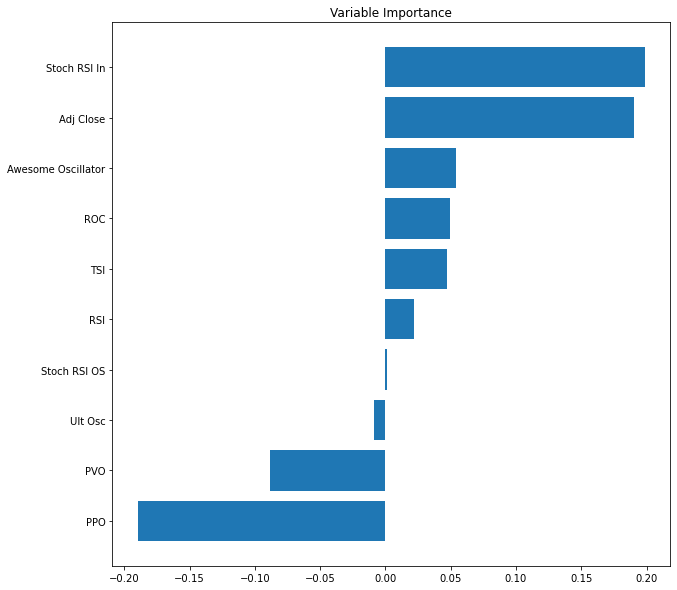

Alpha is: 0.45
R^2 Score: 0.9558119062840529
Mean Absolute Error: 0.9044025768272976
Mean Squared Error: 1.0377394070969381


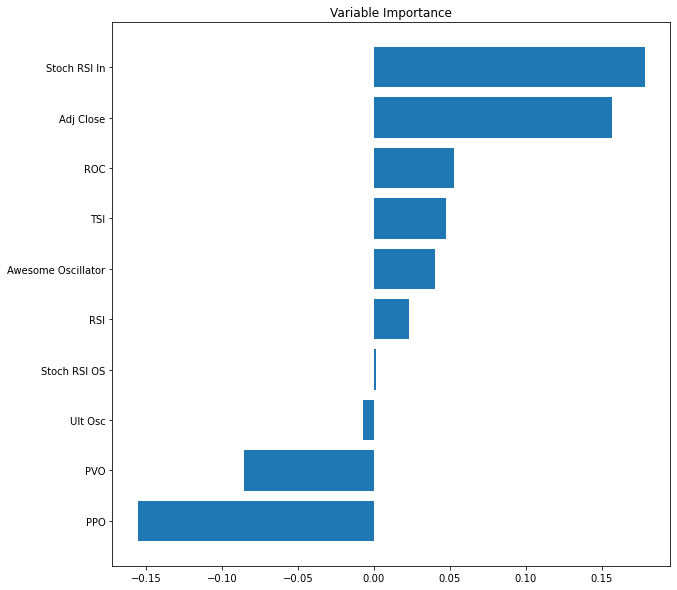

Alpha is: 0.56
R^2 Score: 0.9547175200327963
Mean Absolute Error: 0.9443422819613273
Mean Squared Error: 1.1175884235048539


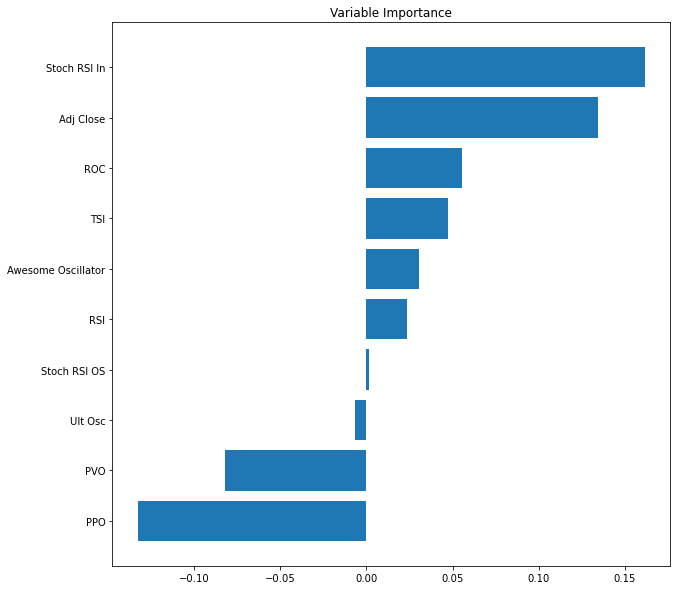

Alpha is: 0.67
R^2 Score: 0.9538209357061067
Mean Absolute Error: 0.9745261134592837
Mean Squared Error: 1.180353271506083


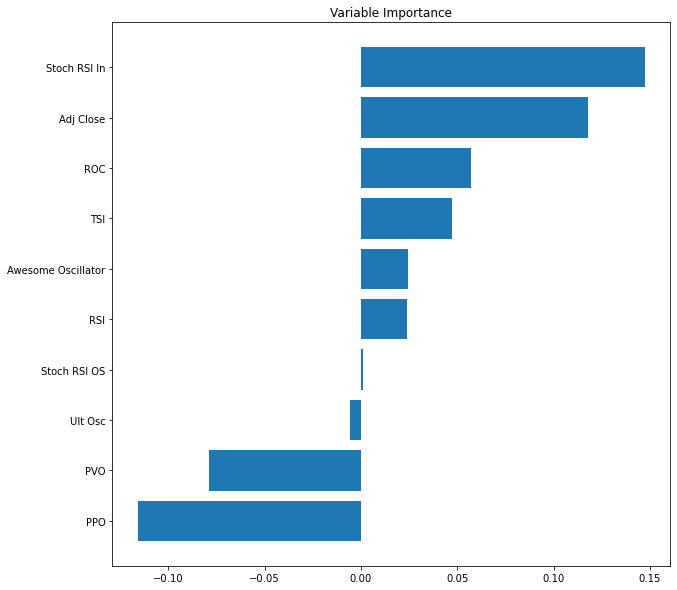

Alpha is: 0.78
R^2 Score: 0.9530681445399165
Mean Absolute Error: 0.9984186407062136
Mean Squared Error: 1.2314529494444615


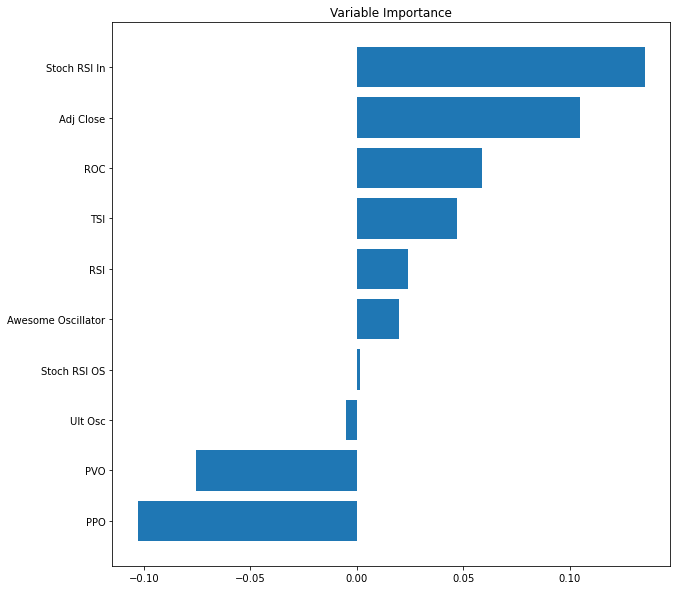

Alpha is: 0.89
R^2 Score: 0.9524242912852949
Mean Absolute Error: 1.0179469310656784
Mean Squared Error: 1.274106614682486


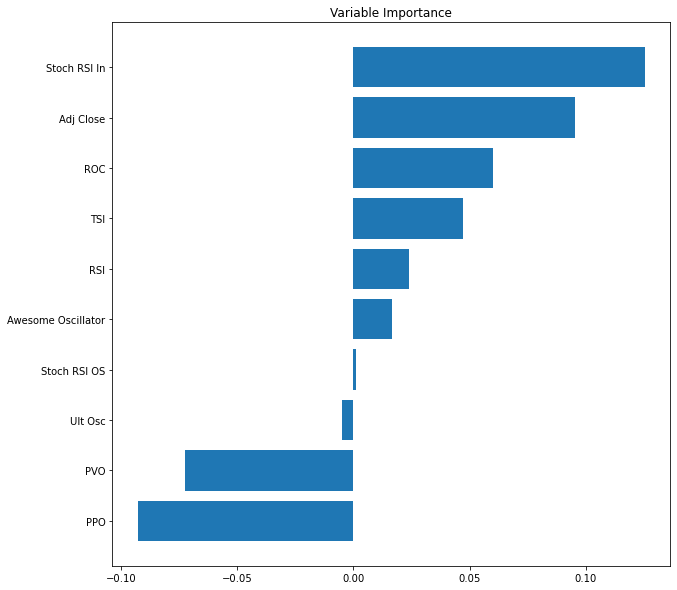

Alpha is: 1.0
R^2 Score: 0.9518655248683913
Mean Absolute Error: 1.034287051268595
Mean Squared Error: 1.3103801422408206


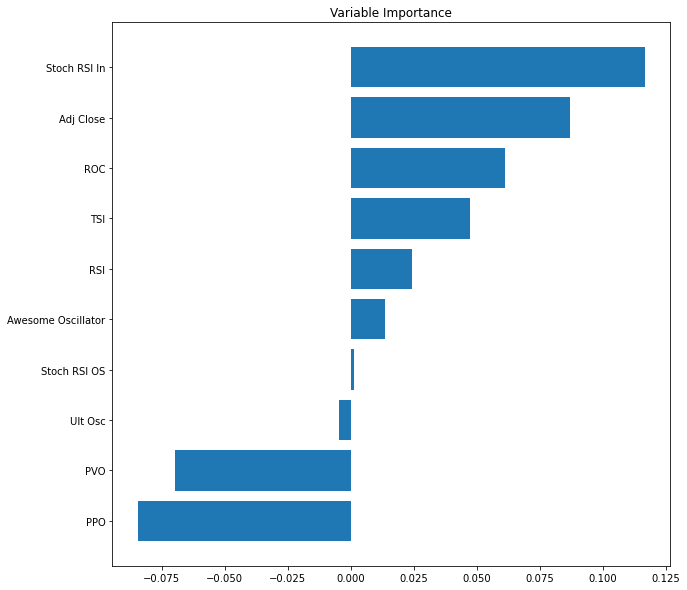

Alpha is: 0.01
R^2 Score: 0.9566778225756722
Mean Absolute Error: 0.4956727070517871
Mean Squared Error: 0.9837690731765122


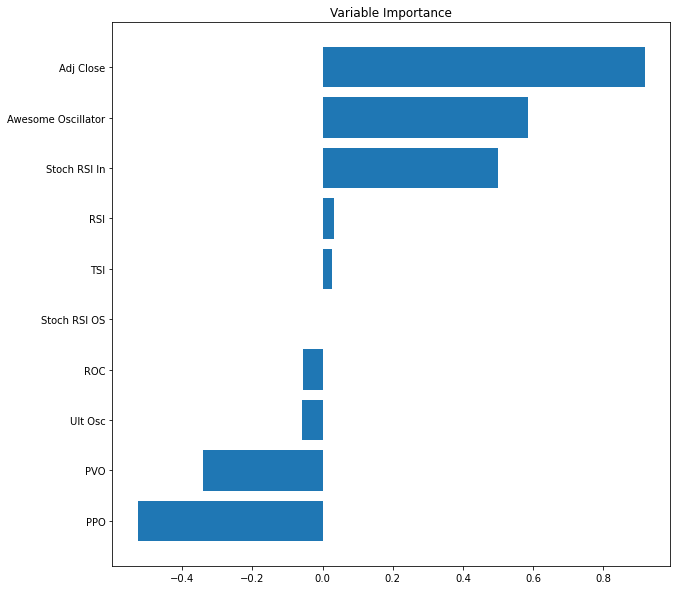

Alpha is: 0.12
R^2 Score: 0.9552641379187147
Mean Absolute Error: 0.6149251487230465
Mean Squared Error: 1.0751494557272088


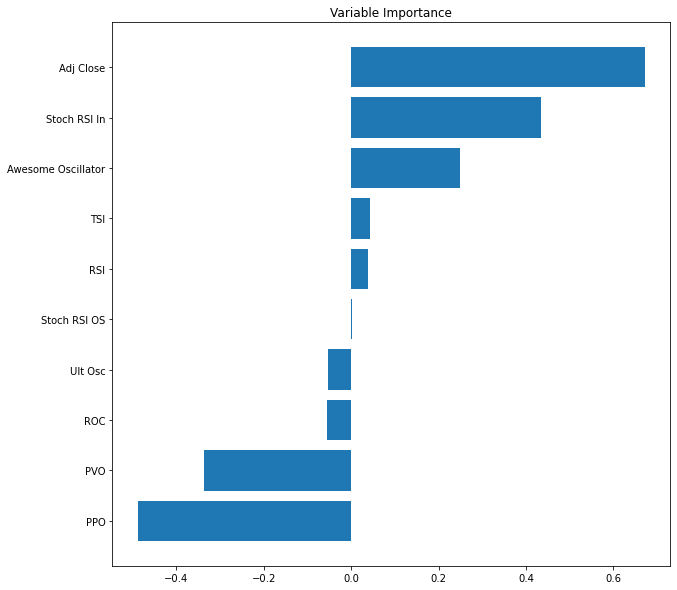

Alpha is: 0.23
R^2 Score: 0.9537510016049955
Mean Absolute Error: 0.6719207810439753
Mean Squared Error: 1.1467857043117164


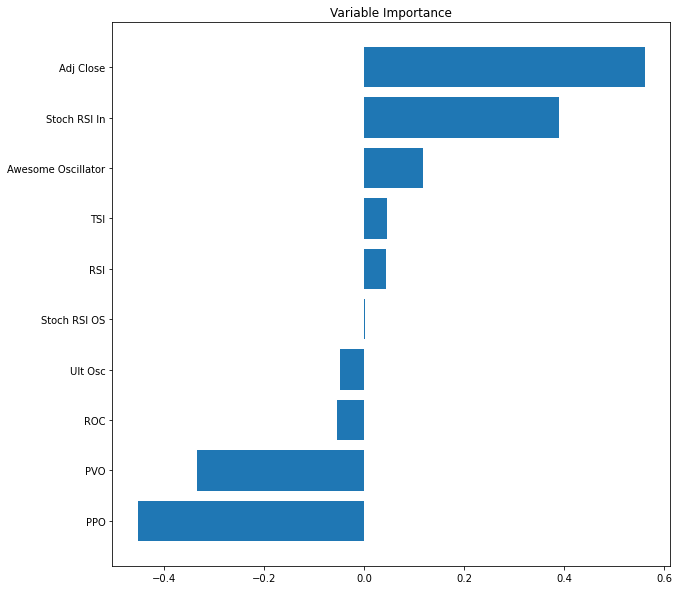

Alpha is: 0.34
R^2 Score: 0.9524020843361584
Mean Absolute Error: 0.7023865559859528
Mean Squared Error: 1.1910172515386972


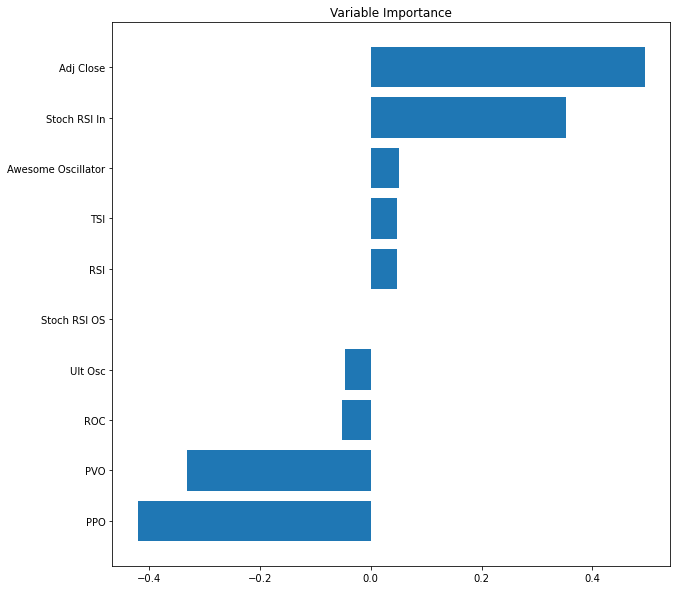

Alpha is: 0.45
R^2 Score: 0.9511654544994061
Mean Absolute Error: 0.7262382020222778
Mean Squared Error: 1.2192121386199108


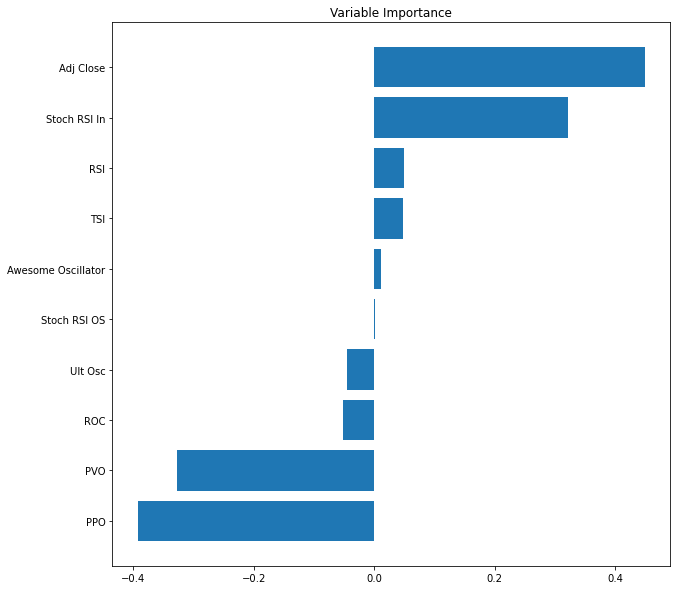

Alpha is: 0.56
R^2 Score: 0.9500081838833857
Mean Absolute Error: 0.7451217999666186
Mean Squared Error: 1.2380016565664527


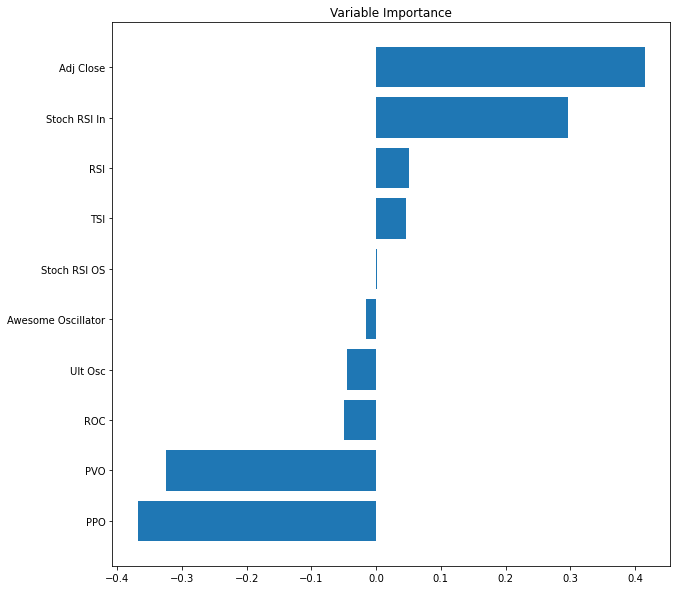

Alpha is: 0.67
R^2 Score: 0.9489131037514688
Mean Absolute Error: 0.7600793381111633
Mean Squared Error: 1.251025968242716


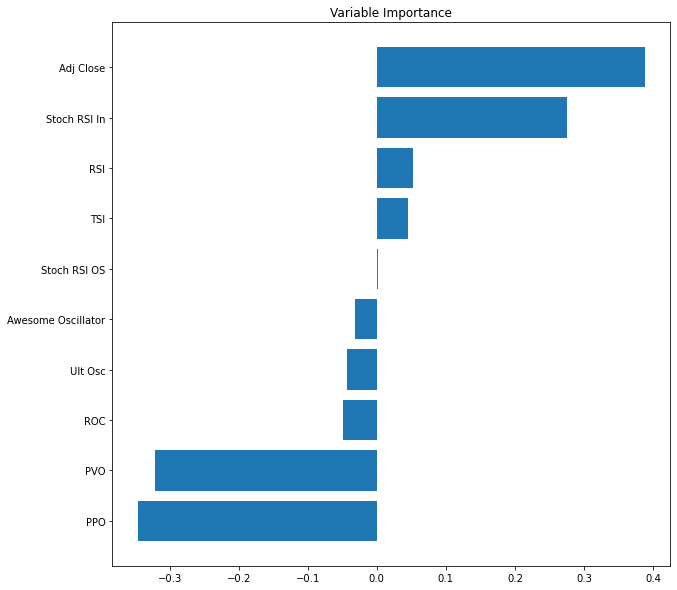

Alpha is: 0.78
R^2 Score: 0.9478704898301041
Mean Absolute Error: 0.7728832102016159
Mean Squared Error: 1.2603624467770054


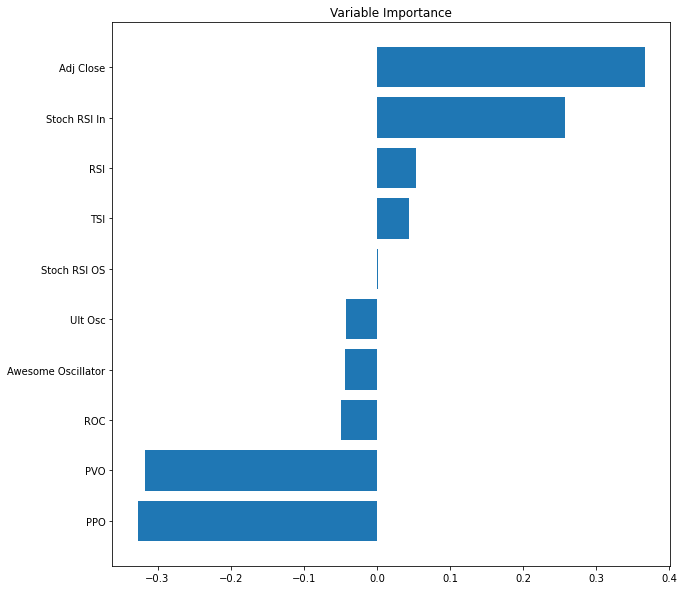

Alpha is: 0.89
R^2 Score: 0.9468740799332591
Mean Absolute Error: 0.7832641133696832
Mean Squared Error: 1.267253010269001


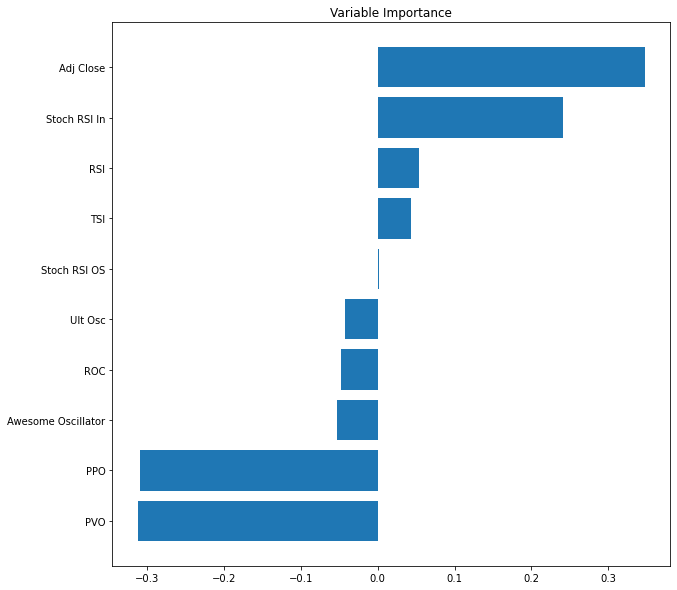

Alpha is: 1.0
R^2 Score: 0.9459193297195356
Mean Absolute Error: 0.7919326791607084
Mean Squared Error: 1.2724717833583403


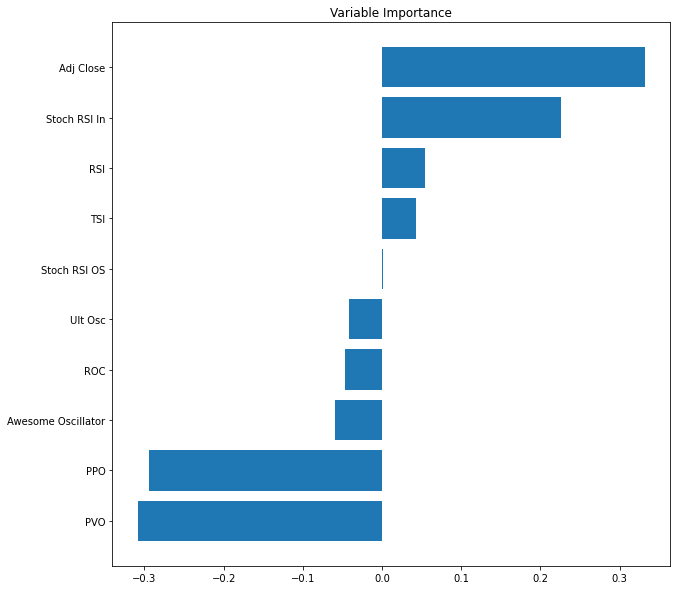

Alpha is: 0.01
R^2 Score: 0.9316661037922598
Mean Absolute Error: 0.32160936259164324
Mean Squared Error: 0.14139217866477108


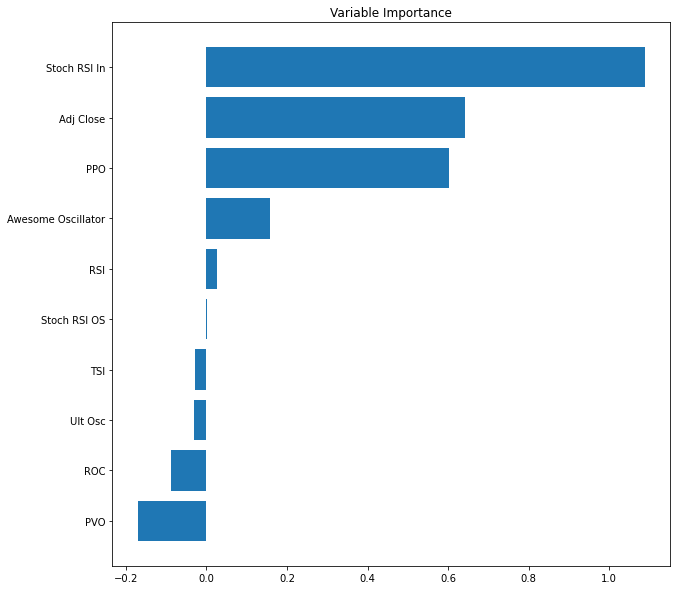

Alpha is: 0.12
R^2 Score: 0.9314034423714567
Mean Absolute Error: 0.3102314516750448
Mean Squared Error: 0.13145976145982538


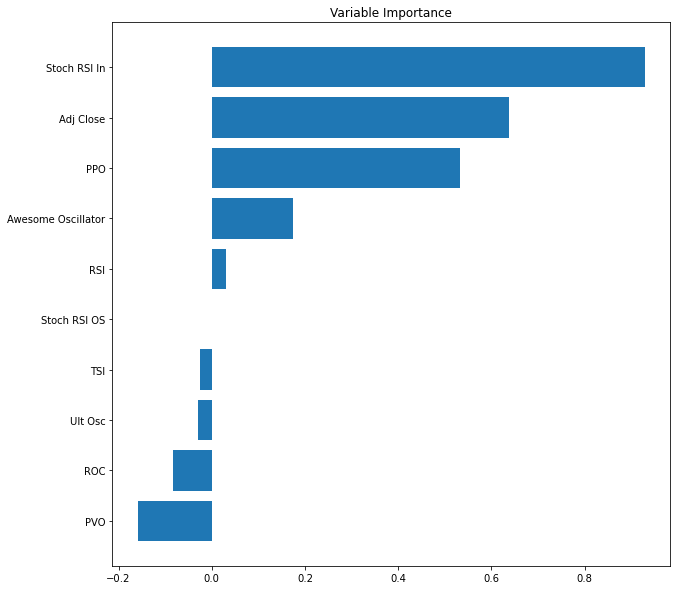

Alpha is: 0.23
R^2 Score: 0.93091407110963
Mean Absolute Error: 0.30241502203507553
Mean Squared Error: 0.125648305080603


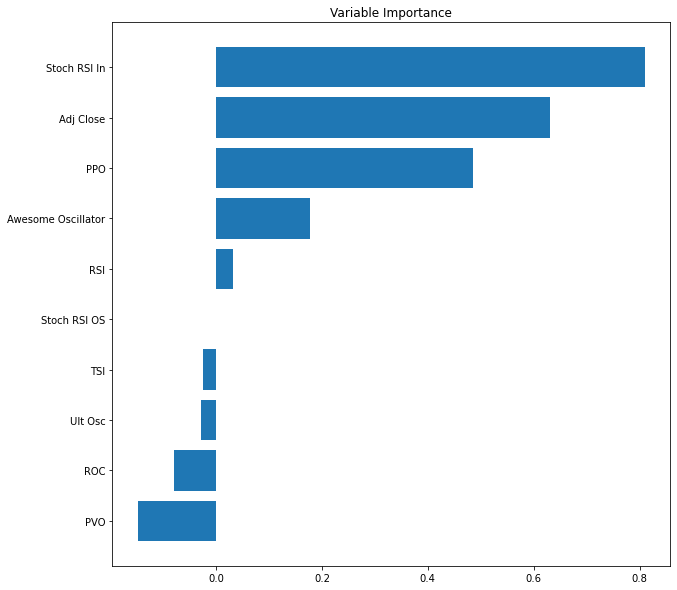

Alpha is: 0.34
R^2 Score: 0.930345586201825
Mean Absolute Error: 0.2967917430761942
Mean Squared Error: 0.12210351132086933


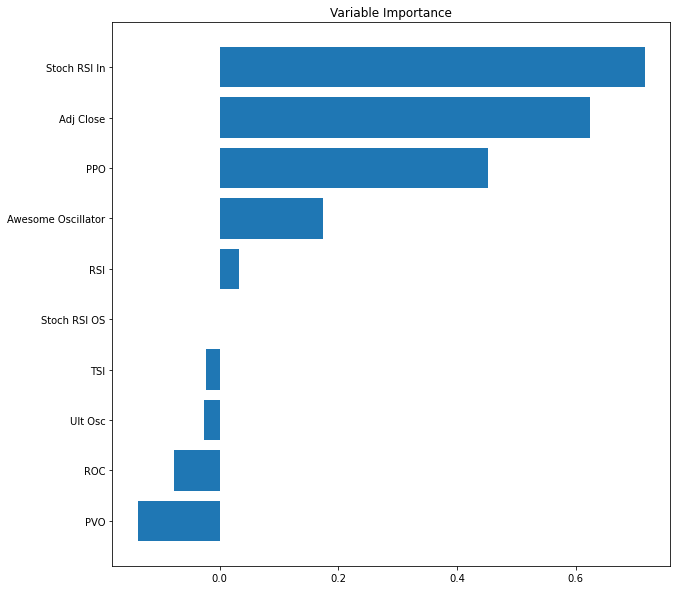

Alpha is: 0.45
R^2 Score: 0.9297597511093759
Mean Absolute Error: 0.2926407444734564
Mean Squared Error: 0.11993211900372094


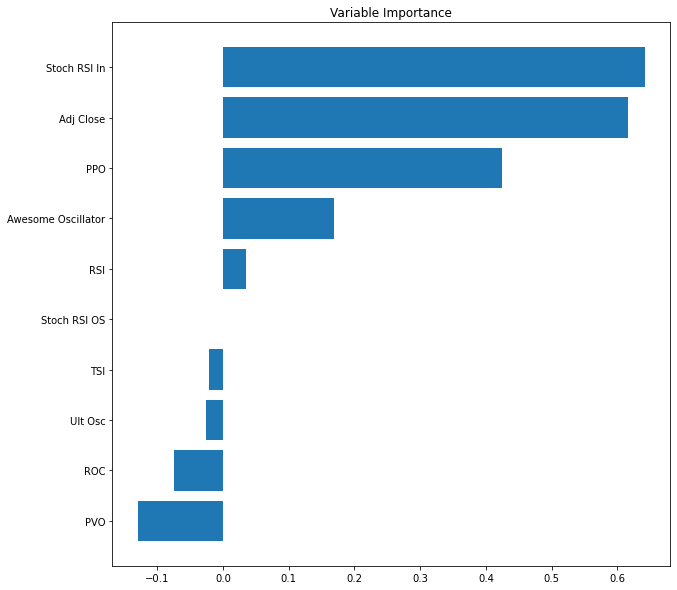

Alpha is: 0.56
R^2 Score: 0.9291836101475949
Mean Absolute Error: 0.28991397540743147
Mean Squared Error: 0.1186518902083705


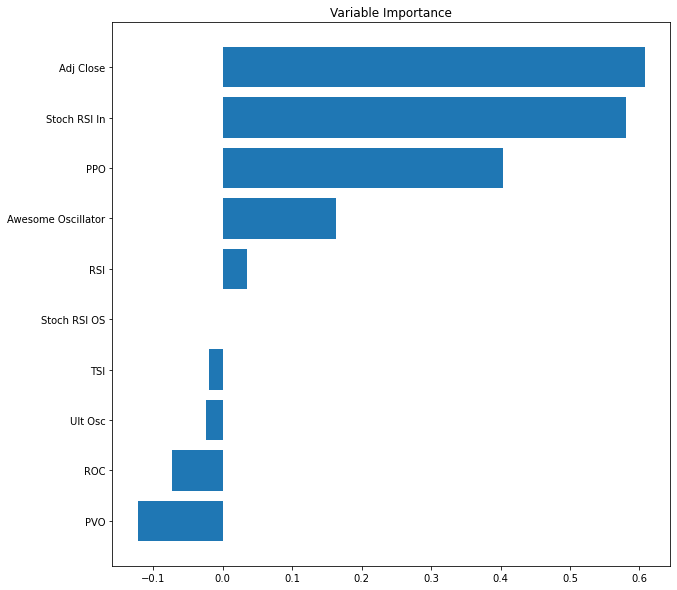

Alpha is: 0.67
R^2 Score: 0.9286286807232916
Mean Absolute Error: 0.2884824931042371
Mean Squared Error: 0.11798051048583584


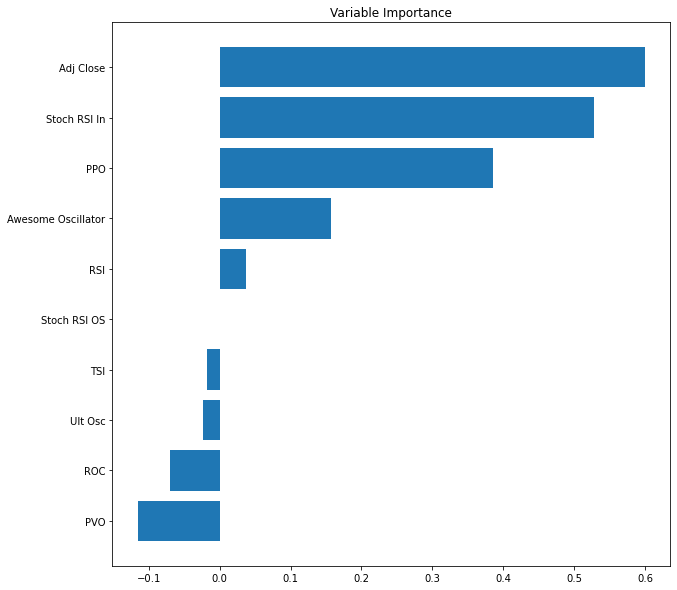

Alpha is: 0.78
R^2 Score: 0.9280991599760975
Mean Absolute Error: 0.2893030153676236
Mean Squared Error: 0.11774222652279417


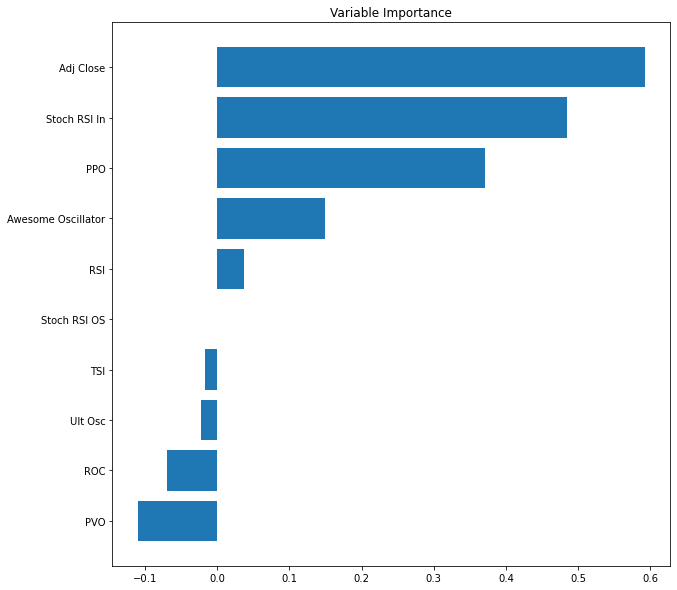

Alpha is: 0.89
R^2 Score: 0.9275957272587988
Mean Absolute Error: 0.29091524875326596
Mean Squared Error: 0.11782215556692176


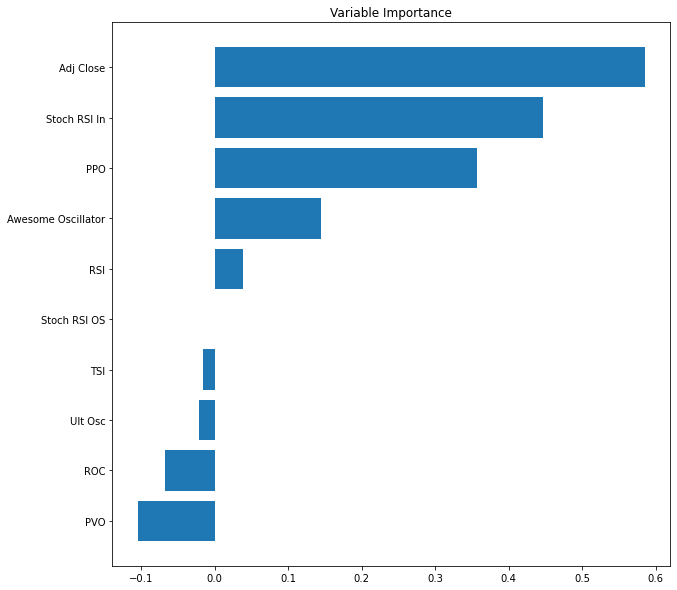

Alpha is: 1.0
R^2 Score: 0.9271173984661906
Mean Absolute Error: 0.292572421493531
Mean Squared Error: 0.11814214350689116


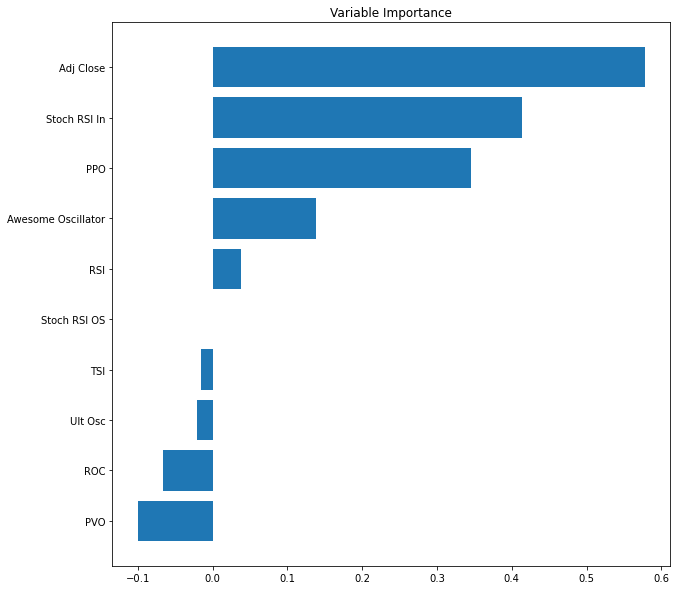

Alpha is: 0.01
R^2 Score: 0.9289151654295825
Mean Absolute Error: 0.35429638823256226
Mean Squared Error: 0.36611281233972165


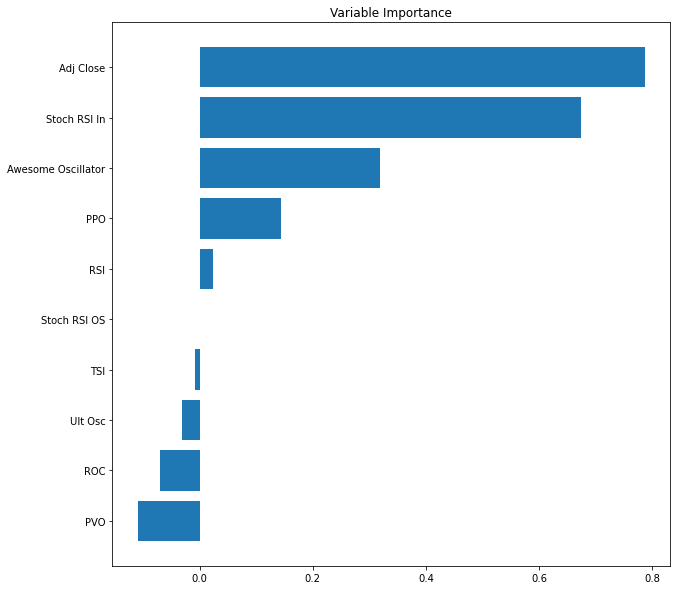

Alpha is: 0.12
R^2 Score: 0.9288336004268359
Mean Absolute Error: 0.35107451857555755
Mean Squared Error: 0.35806697573445845


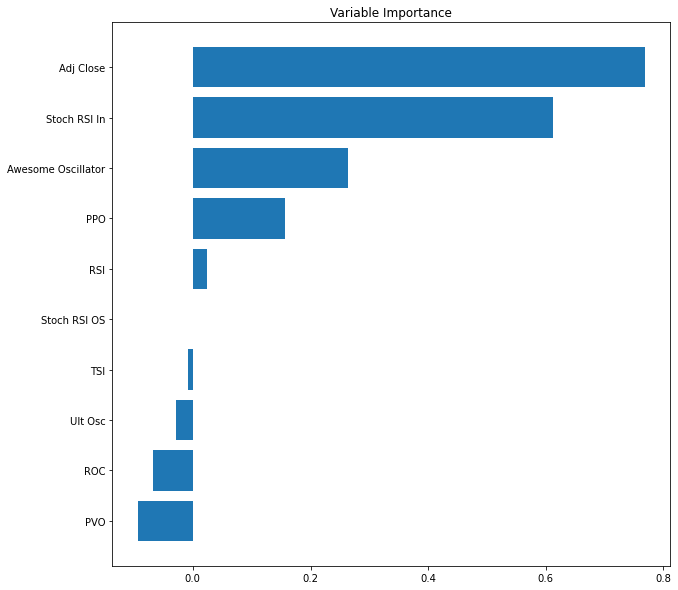

Alpha is: 0.23
R^2 Score: 0.9286660663475417
Mean Absolute Error: 0.3501370361787552
Mean Squared Error: 0.3517562084050124


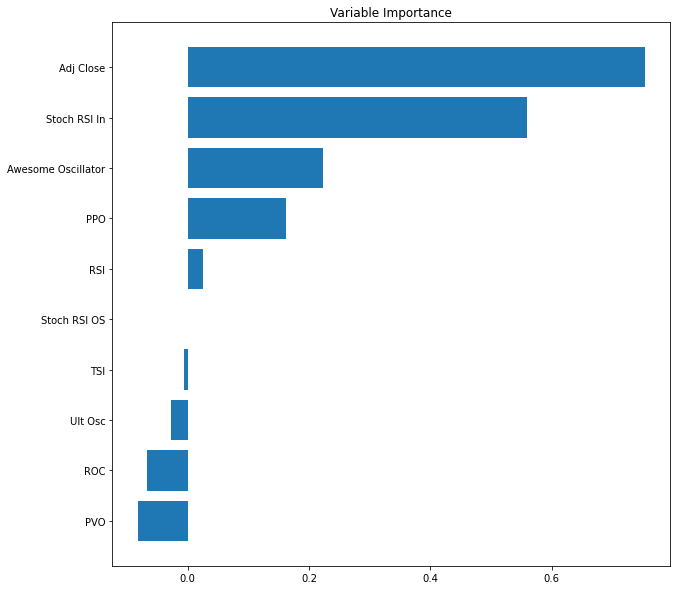

Alpha is: 0.34
R^2 Score: 0.9284541203870059
Mean Absolute Error: 0.35051956364745607
Mean Squared Error: 0.3466482433671987


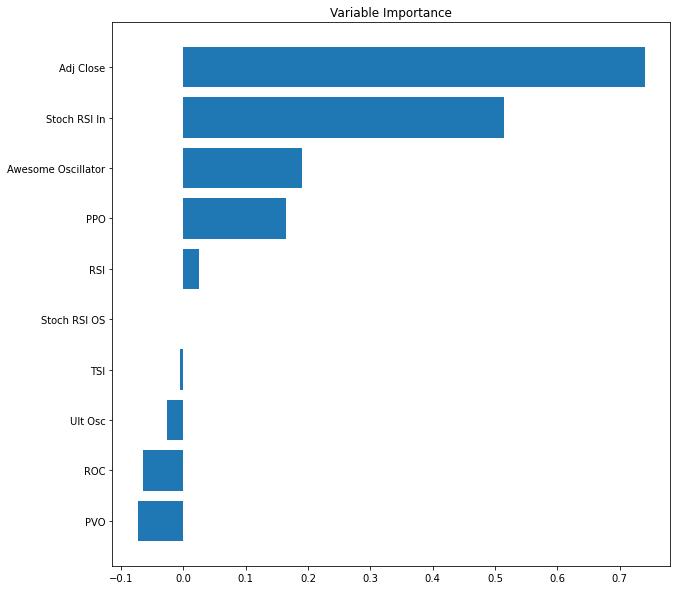

Alpha is: 0.45
R^2 Score: 0.9282194516973893
Mean Absolute Error: 0.3511400993332137
Mean Squared Error: 0.3424194441374601


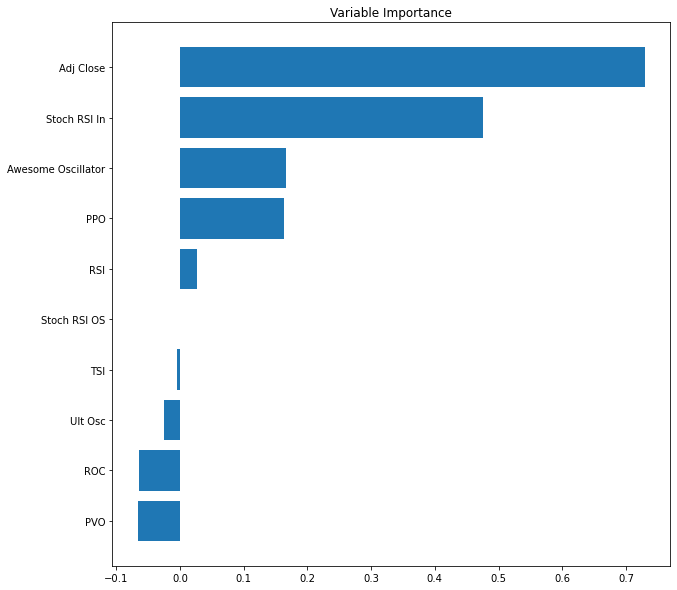

Alpha is: 0.56
R^2 Score: 0.9279740479008783
Mean Absolute Error: 0.35191705486942626
Mean Squared Error: 0.33885790199044985


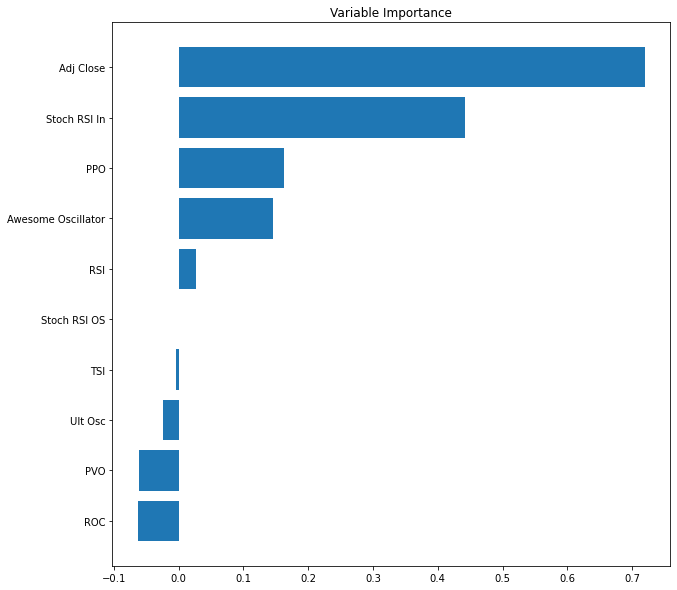

Alpha is: 0.67
R^2 Score: 0.9277247274750217
Mean Absolute Error: 0.3528004665214161
Mean Squared Error: 0.33581751420517747


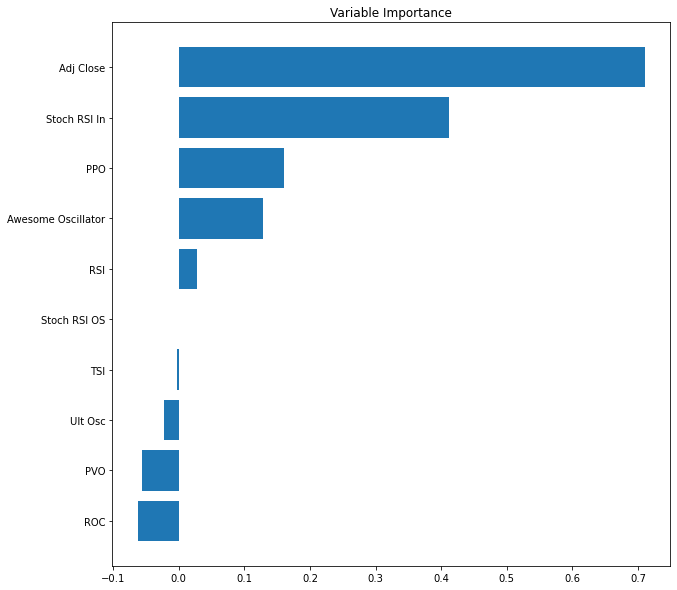

Alpha is: 0.78
R^2 Score: 0.9274754002584055
Mean Absolute Error: 0.35375813299485304
Mean Squared Error: 0.3331935971979081


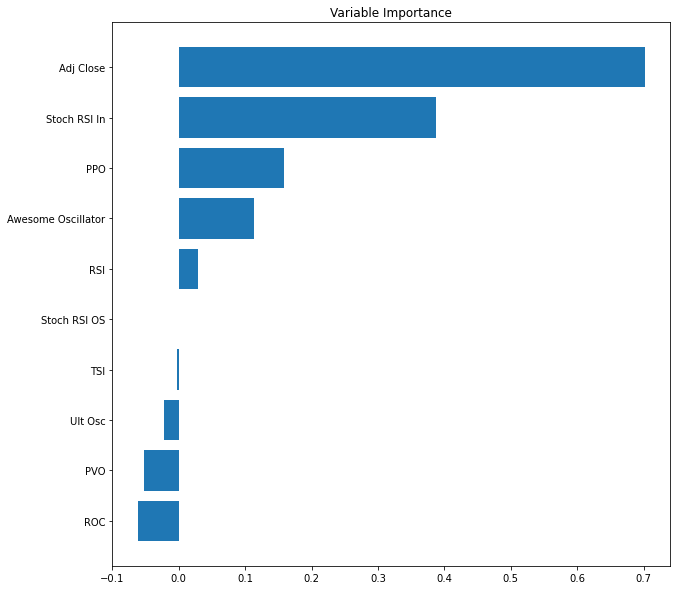

Alpha is: 0.89
R^2 Score: 0.9272282806539847
Mean Absolute Error: 0.3547684304133006
Mean Squared Error: 0.3309088479988748


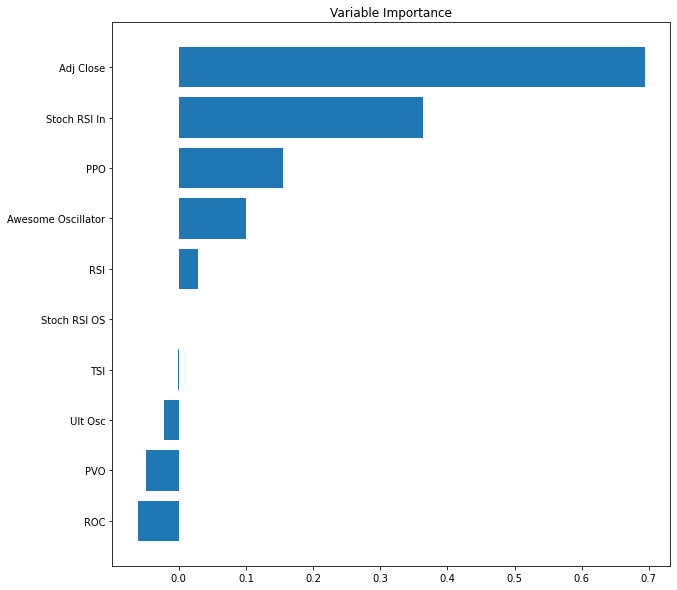

Alpha is: 1.0
R^2 Score: 0.9269845724802587
Mean Absolute Error: 0.3558163398718349
Mean Squared Error: 0.32890476471335284


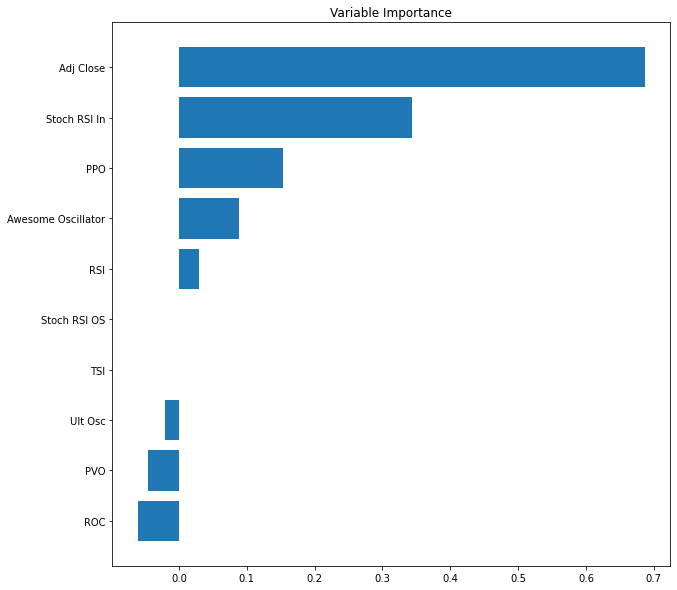

Alpha is: 0.01
R^2 Score: 0.891625043799332
Mean Absolute Error: 0.28062694064352767
Mean Squared Error: 0.13608950523279897


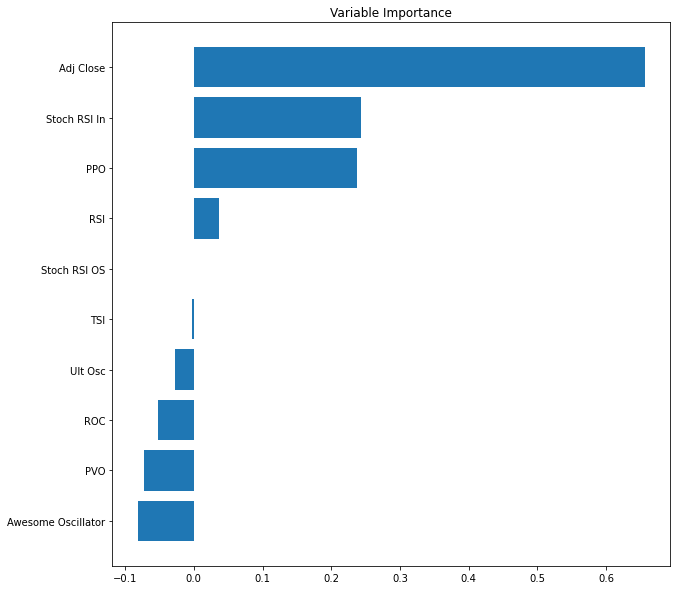

Alpha is: 0.12
R^2 Score: 0.8916148917250513
Mean Absolute Error: 0.27908751196295567
Mean Squared Error: 0.1346807607940997


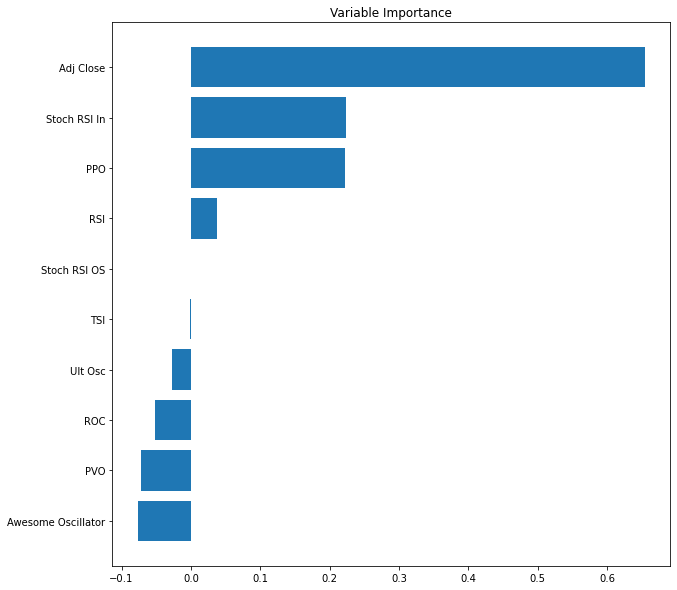

Alpha is: 0.23
R^2 Score: 0.8915916533624064
Mean Absolute Error: 0.2777540877540493
Mean Squared Error: 0.13347077112164987


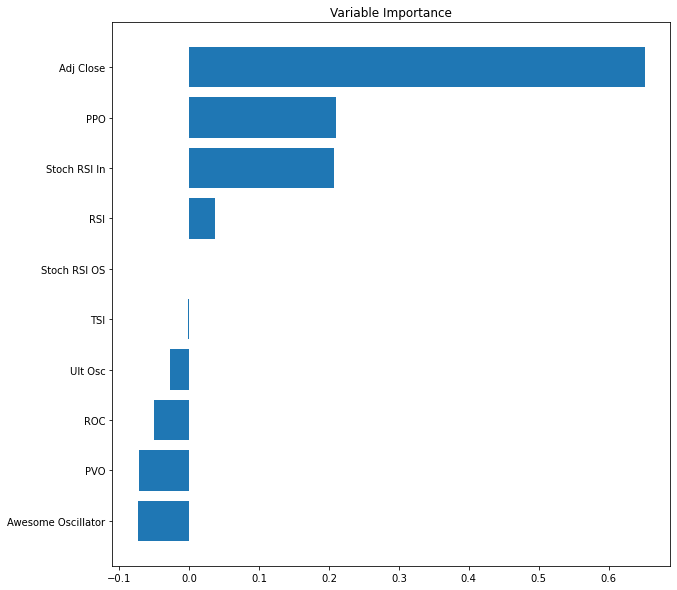

Alpha is: 0.34
R^2 Score: 0.8915590448709945
Mean Absolute Error: 0.27657309428295584
Mean Squared Error: 0.13240816183116078


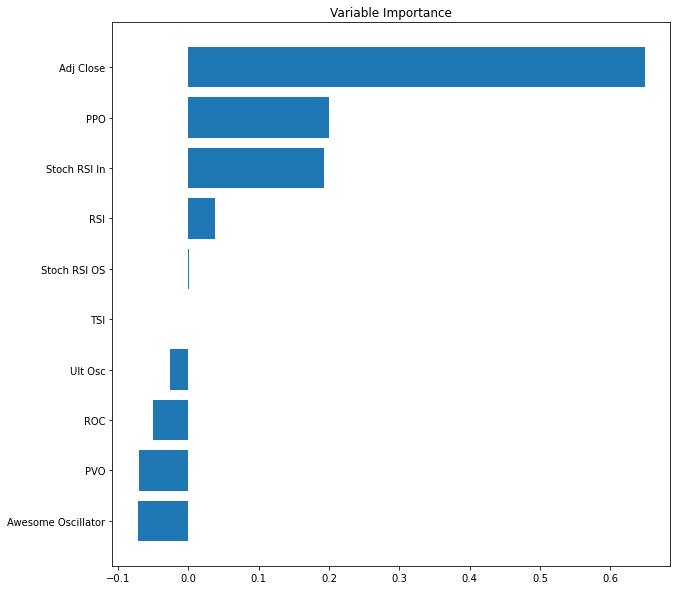

Alpha is: 0.45
R^2 Score: 0.8915193462704152
Mean Absolute Error: 0.27551003424556614
Mean Squared Error: 0.13146022964524462


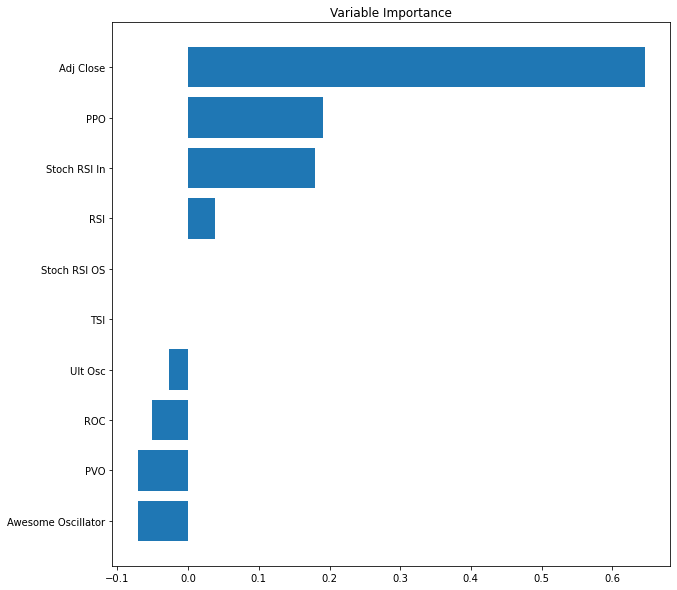

Alpha is: 0.56
R^2 Score: 0.8914740377719633
Mean Absolute Error: 0.2745413635518054
Mean Squared Error: 0.1306047827539416


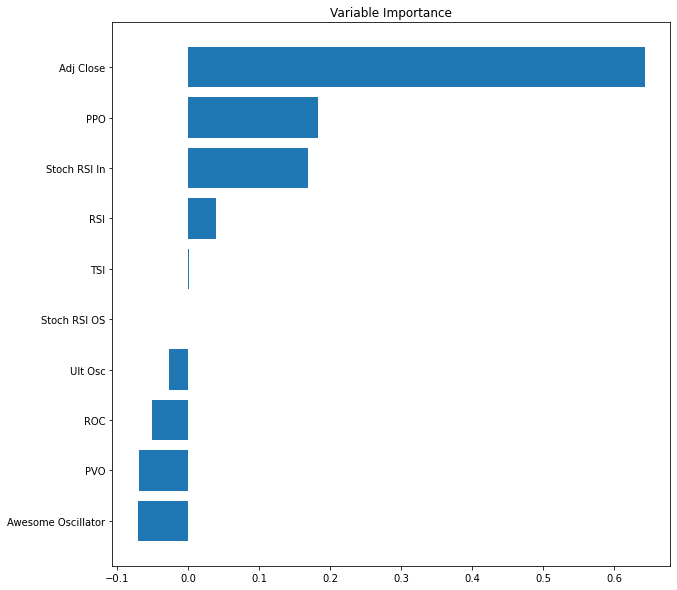

Alpha is: 0.67
R^2 Score: 0.8914241233540312
Mean Absolute Error: 0.2736502705238674
Mean Squared Error: 0.1298259990896412


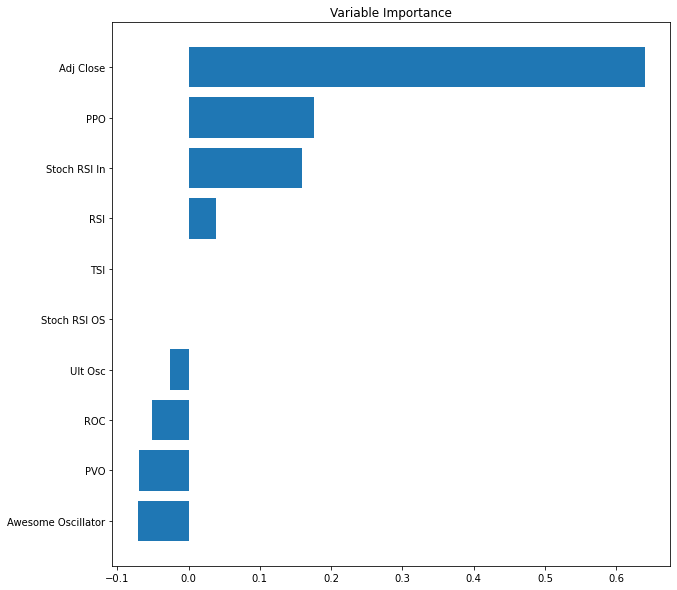

Alpha is: 0.78
R^2 Score: 0.8913703093426115
Mean Absolute Error: 0.27282430933834334
Mean Squared Error: 0.1291121453668803


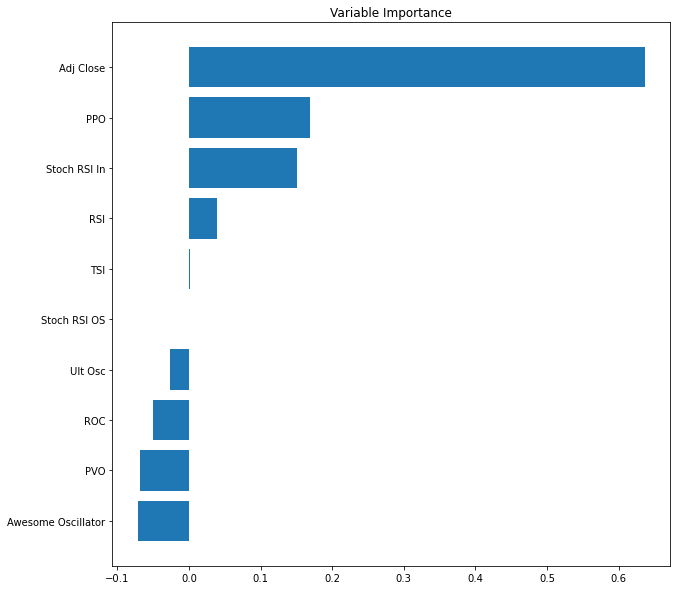

Alpha is: 0.89
R^2 Score: 0.8913131089809156
Mean Absolute Error: 0.27205399026703
Mean Squared Error: 0.12845423736254197


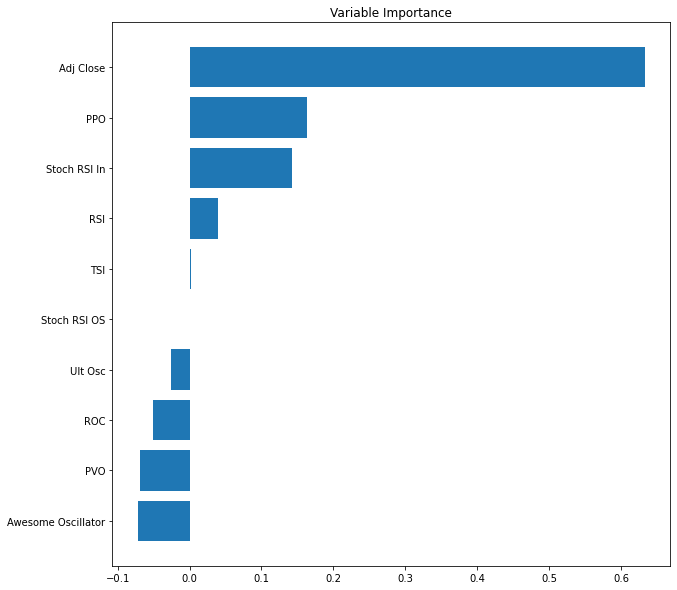

Alpha is: 1.0
R^2 Score: 0.8912529064452666
Mean Absolute Error: 0.2713318974818874
Mean Squared Error: 0.12784521098131355


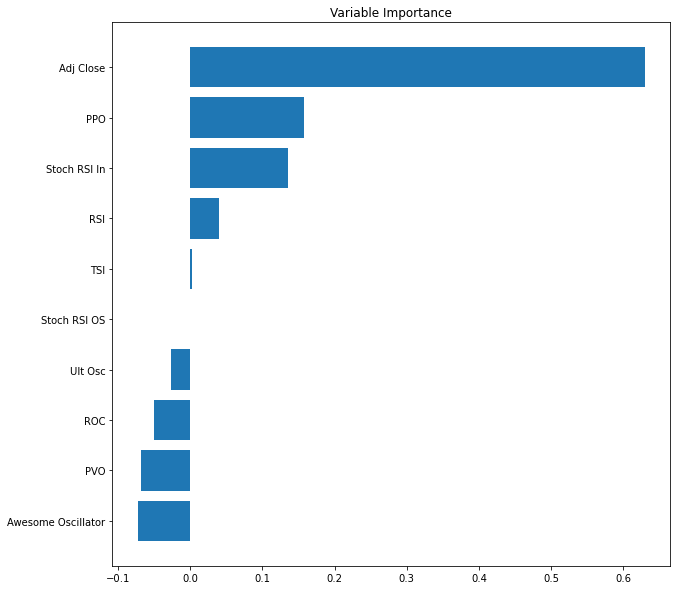

In [41]:
#Ridge Model

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    

    for alpha in np.linspace(.01, 1, 10):
        print('Alpha is:',alpha)
        ridge_model = linear_model.Ridge(alpha)
        ridge_model.fit(X_tr,y_tr)
        
        ridge_y_pred = ridge_model.predict(X_ts)

        r2 = ridge_model.score(X_tr,y_tr)
        mean_abs_error = mean_absolute_error(y_ts,ridge_y_pred)
        mean_sqr_error =  mean_squared_error(y_ts,ridge_y_pred)
        print('R^2 Score:',r2)
        print('Mean Absolute Error:',mean_abs_error)
        print('Mean Squared Error:',mean_sqr_error)


        lm_imp = ridge_model.coef_
        sorted_idx = np.argsort(lm_imp)
        num_features = np.arange(sorted_idx.shape[0])
        plt.figure(figsize=(10,10))
        plt.barh(num_features,lm_imp[sorted_idx],align='center')
        plt.yticks(num_features, X_train_columns[sorted_idx])
        plt.title('Variable Importance')
        plt.show()


Best Parameters:{'max_depth': 1, 'n_estimators': 2}
R^2 Score: 0.5677068896678024
Mean Absolute Error: 0.9721674082966748
Mean Squared Error: 1.097371578283563


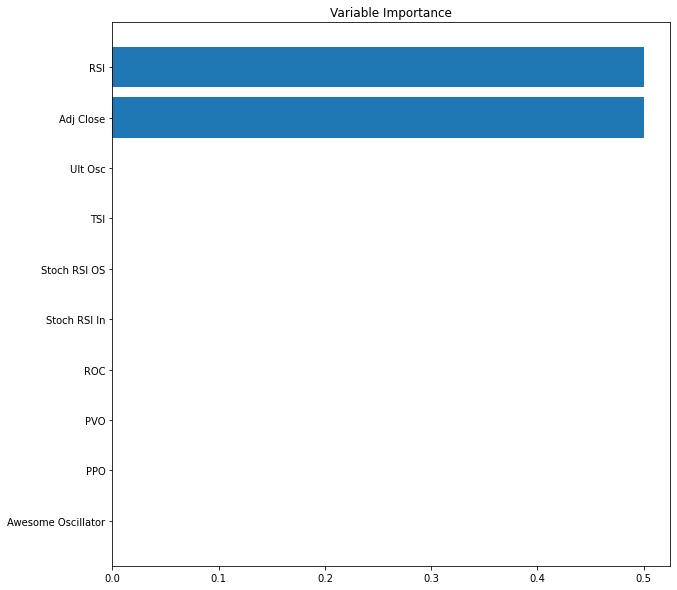

Best Parameters:{'max_depth': 1, 'n_estimators': 2}
R^2 Score: 0.6737209597533176
Mean Absolute Error: 1.5942847669451568
Mean Squared Error: 2.8012783437361803


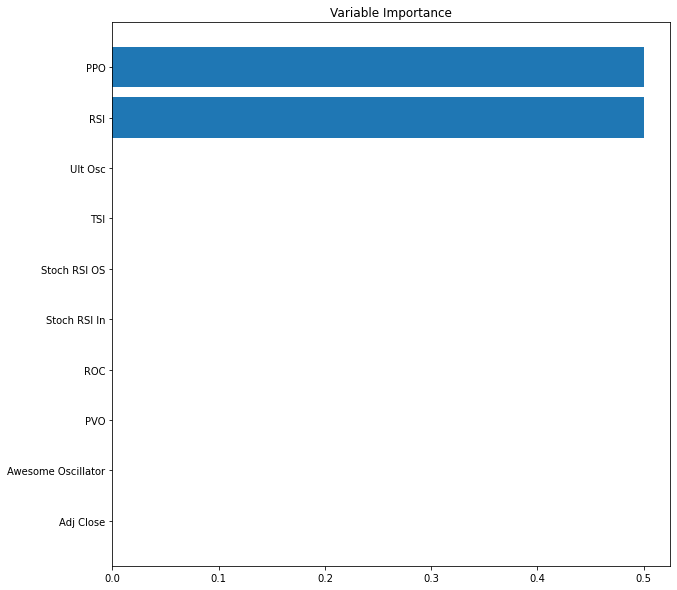

Best Parameters:{'max_depth': 2, 'n_estimators': 2}
R^2 Score: 0.8955253805699334
Mean Absolute Error: 0.42186139264575134
Mean Squared Error: 0.3028783488234622


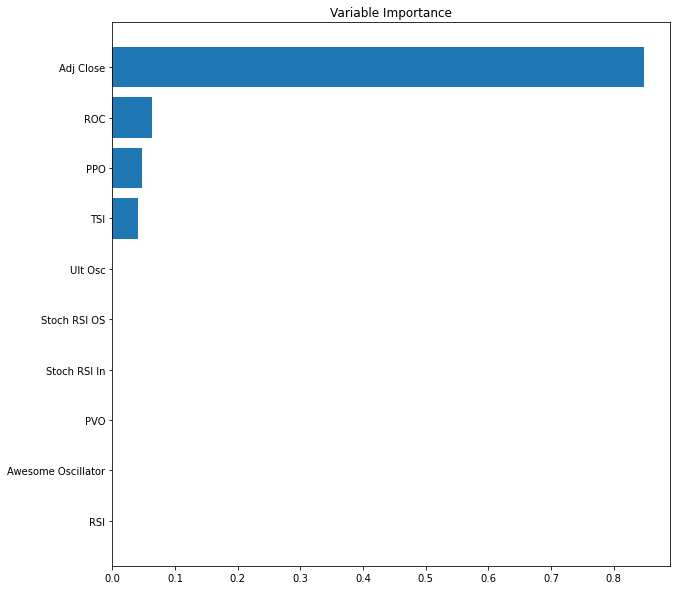

Best Parameters:{'max_depth': 2, 'n_estimators': 1}
R^2 Score: 0.8653283690944048
Mean Absolute Error: 0.47723150282265936
Mean Squared Error: 0.49987411192516795


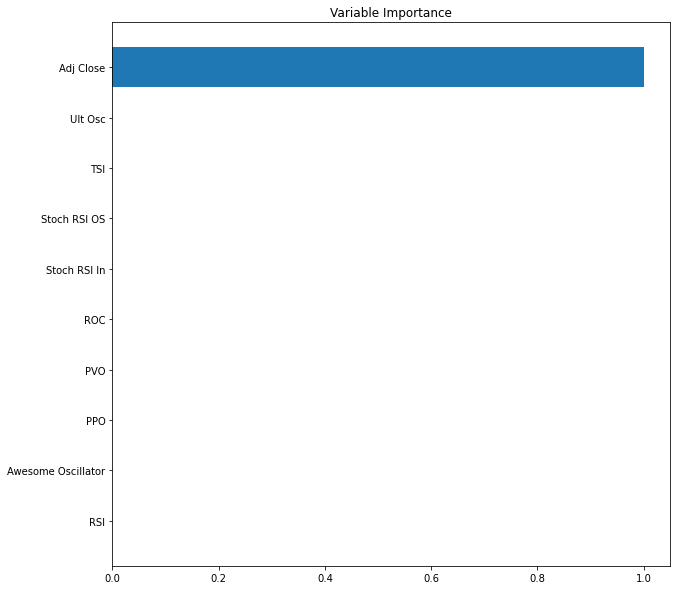

Best Parameters:{'max_depth': 2, 'n_estimators': 2}
R^2 Score: 0.8508895245023527
Mean Absolute Error: 0.2898746587531861
Mean Squared Error: 0.09787084564422177


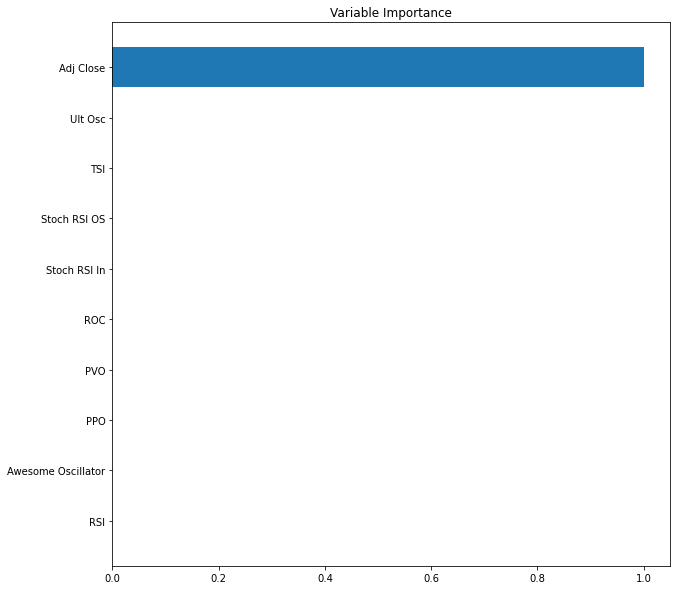

In [42]:
#Random Forest

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    random_grid = {'n_estimators':np.arange(1,3),'max_depth':np.arange(1,3)}
    rfr = RandomForestRegressor(random_state=49)
    rfr_cv = GridSearchCV(rfr,random_grid,cv=5)
    rfr_cv.fit(X_tr,y_tr)
    print('Best Parameters:' + str(rfr_cv.best_params_))
    
    
    rfr = RandomForestRegressor(n_estimators = rfr_cv.best_params_['n_estimators'],max_depth = rfr_cv.best_params_['max_depth'],random_state=49)
    rfr.fit(X_tr,y_tr)
    
    y_pred_rfr = rfr.predict(X_ts)
    
    r2 = rfr.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred_rfr)
    mean_sqr_error =  mean_squared_error(y_ts,y_pred_rfr)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Squared Error:',mean_sqr_error)

    rfr_imp = rfr.feature_importances_
    sorted_idx = np.argsort(rfr_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,rfr_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()


In [43]:
df_trend = df[['Adj Close Shift','Adj Close','MACD','ADX','Aroon','CCI','DPO','EMA','Ichimoku Base','Ichimoku CL','KST','MASS','PSAR','STC','TRIX','VI','WMA']]

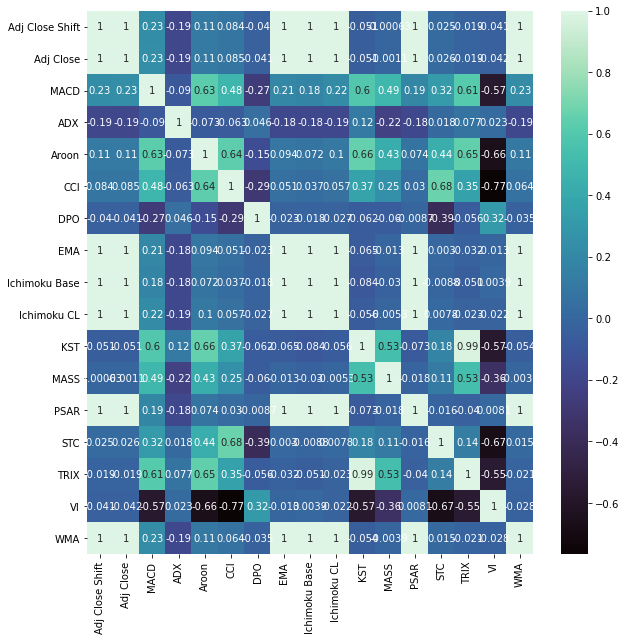

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_trend.corr(),annot=True,cmap='mako')

In [45]:
#We can drop Ichimoku Base, Ichimoku CL,EMA and PSAR, WMA as they have a perfect corr with other indicators
df_trend.drop(columns=['Ichimoku Base','Ichimoku CL','PSAR','EMA','WMA'],inplace=True)

C:\Users\Jonat\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [46]:
#Separating Data
X = df_trend.drop(columns=['Adj Close Shift'])['2019-04-01':'2019-08-31']
y = df_trend['Adj Close Shift']['2019-04-01':'2019-08-31']
X_train_columns = X.columns

R^2 Score: 0.844510740691051
Mean Absolute Error: 4.264195968217643
Mean Squared Error: 23.956136802942968


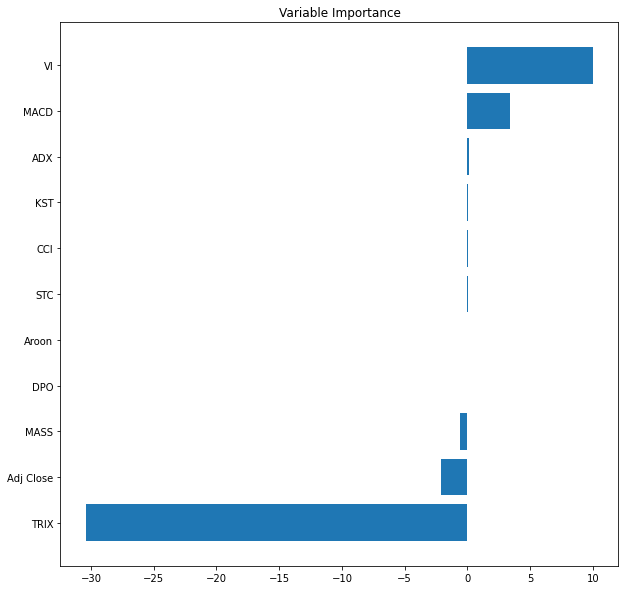

R^2 Score: 0.8596093160264001
Mean Absolute Error: 1.6836299668335182
Mean Squared Error: 3.3181911336919105


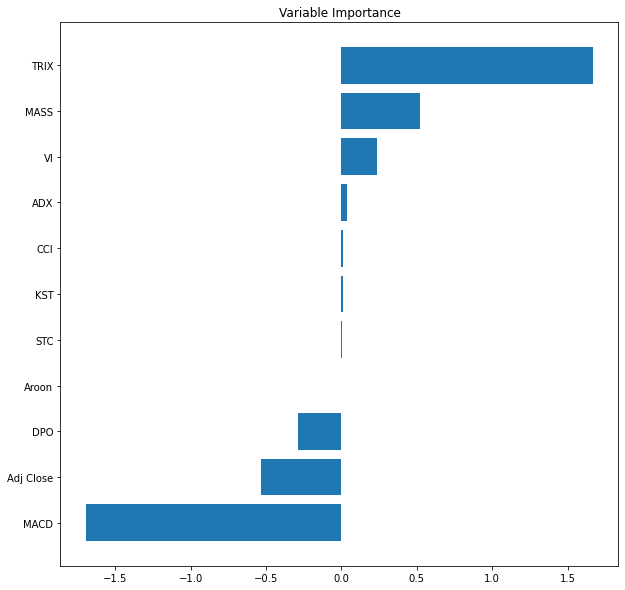

R^2 Score: 0.9358885538570157
Mean Absolute Error: 0.2497039704006569
Mean Squared Error: 0.08539640941590187


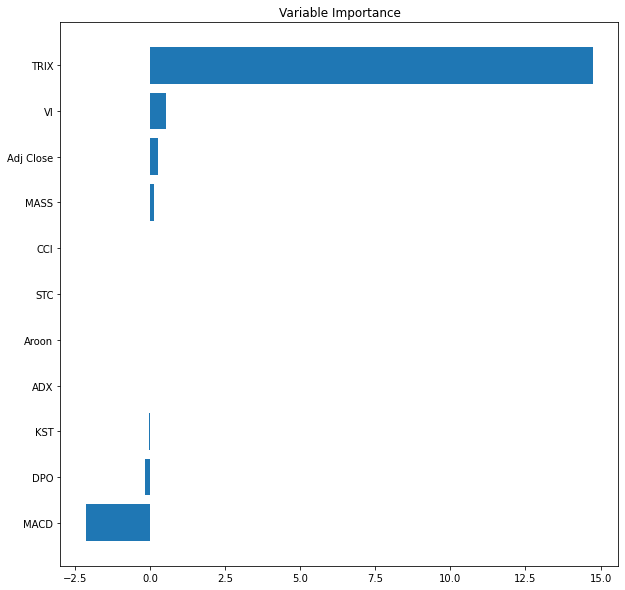

R^2 Score: 0.9364762305079329
Mean Absolute Error: 0.39393835994105997
Mean Squared Error: 0.31299220883178147


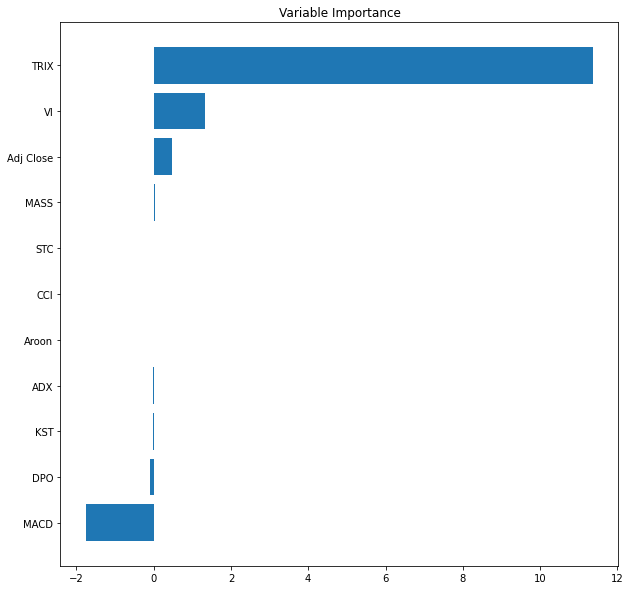

R^2 Score: 0.9026223506958455
Mean Absolute Error: 0.2654597864999495
Mean Squared Error: 0.11929233225949565


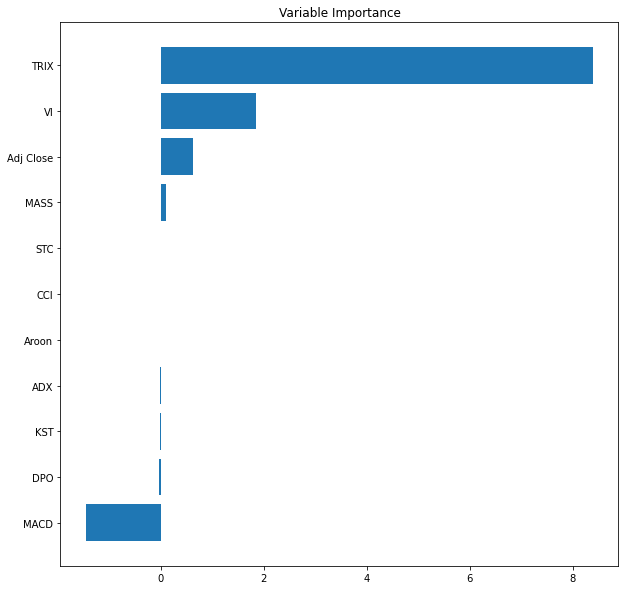

In [47]:
#OLS

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    rModel = linear_model.LinearRegression()
    rModel.fit(X_tr,y_tr)
    
    y_pred = rModel.predict(X_ts)
    
    r2 = rModel.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred)
    mean_sqr_error =  mean_squared_error(y_ts,y_pred)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Squared Error:',mean_sqr_error)

    lm_imp = rModel.coef_
    sorted_idx = np.argsort(lm_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,lm_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

Alpha is: 0.01
R^2 Score: 0.810219568707372
Mean Absolute Error: 3.3274144261905114
Mean Squared Error: 15.496068335795997


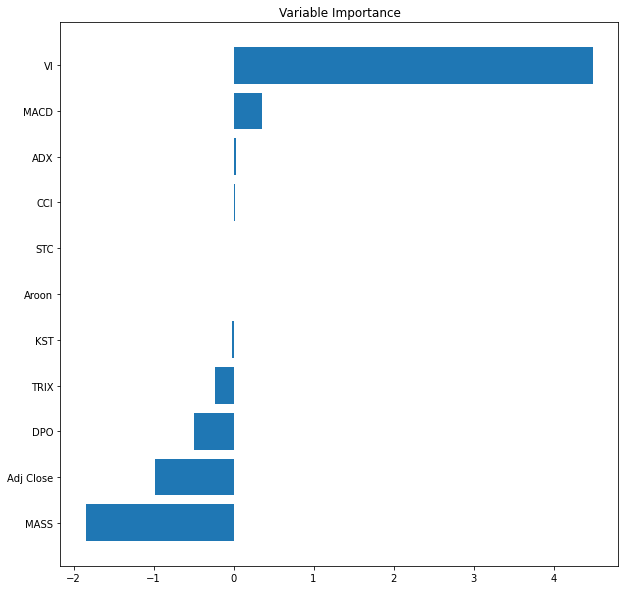

Alpha is: 0.12
R^2 Score: 0.7433408556037109
Mean Absolute Error: 1.2349748162572185
Mean Squared Error: 2.1923159883688874


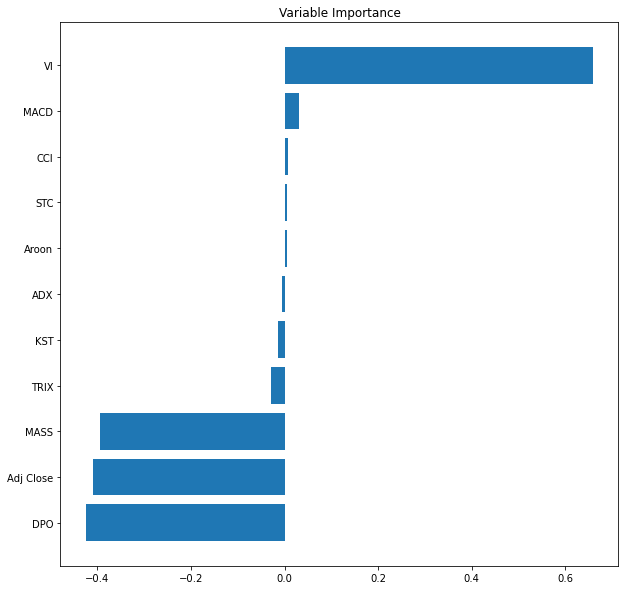

Alpha is: 0.23
R^2 Score: 0.7335919138133628
Mean Absolute Error: 0.9977403540333536
Mean Squared Error: 1.4244710411026258


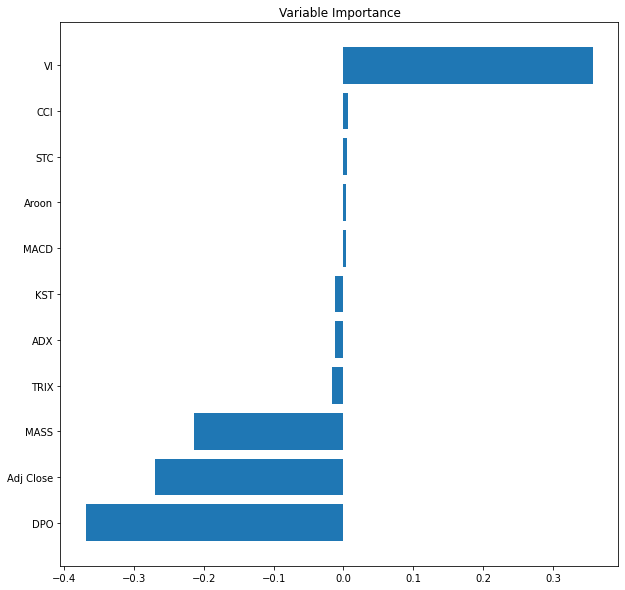

Alpha is: 0.34
R^2 Score: 0.7290106600871882
Mean Absolute Error: 0.9125926210665426
Mean Squared Error: 1.1644528974701156


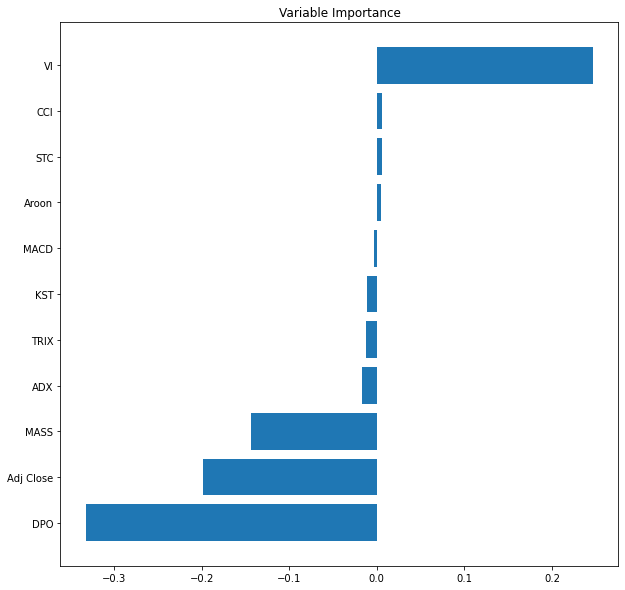

Alpha is: 0.45
R^2 Score: 0.7261443831190677
Mean Absolute Error: 0.865700180511823
Mean Squared Error: 1.0332866688885238


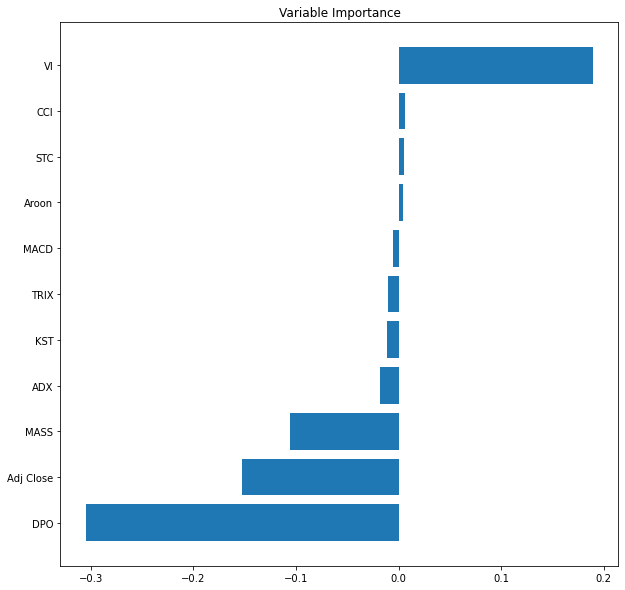

Alpha is: 0.56
R^2 Score: 0.7240914607936719
Mean Absolute Error: 0.8344073298538767
Mean Squared Error: 0.9538285335197946


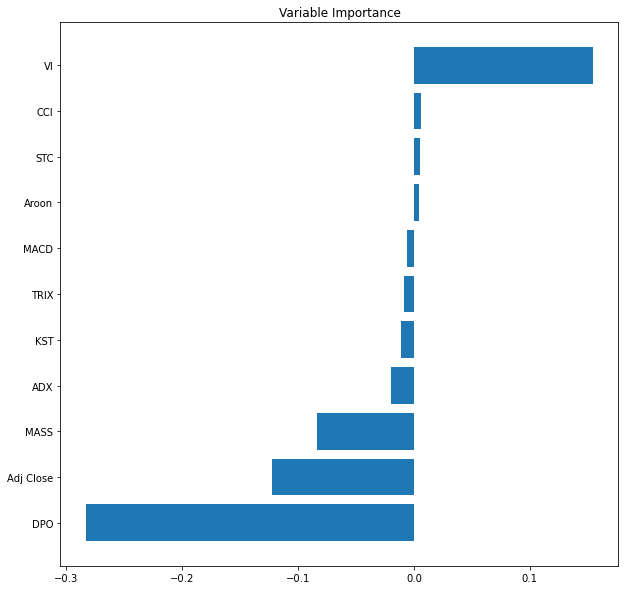

Alpha is: 0.67
R^2 Score: 0.7224991295405212
Mean Absolute Error: 0.8116935654255528
Mean Squared Error: 0.9003468188205354


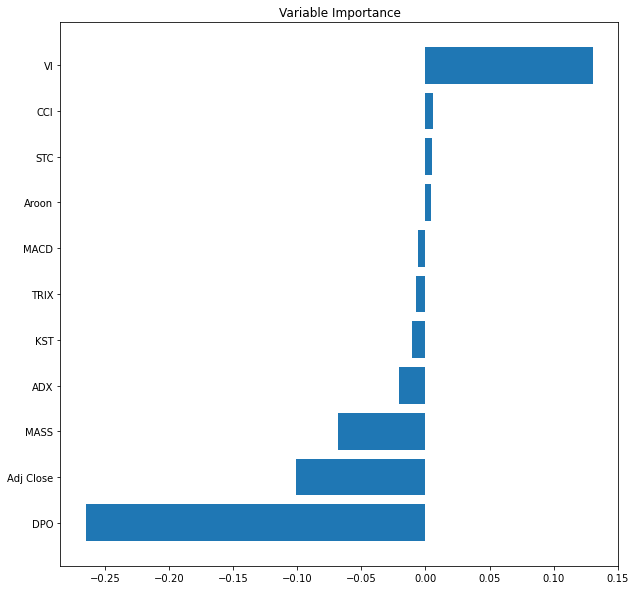

Alpha is: 0.78
R^2 Score: 0.7211980968489556
Mean Absolute Error: 0.7942669517327337
Mean Squared Error: 0.8618109673533257


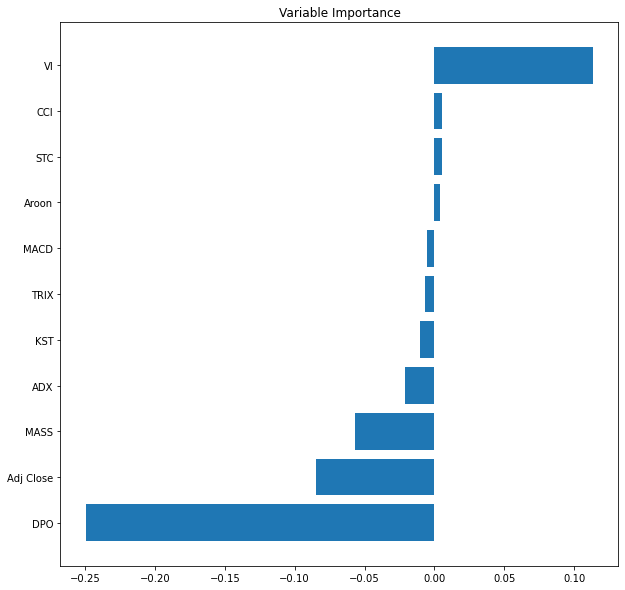

Alpha is: 0.89
R^2 Score: 0.7200961679856139
Mean Absolute Error: 0.780362747642671
Mean Squared Error: 0.83269533579486


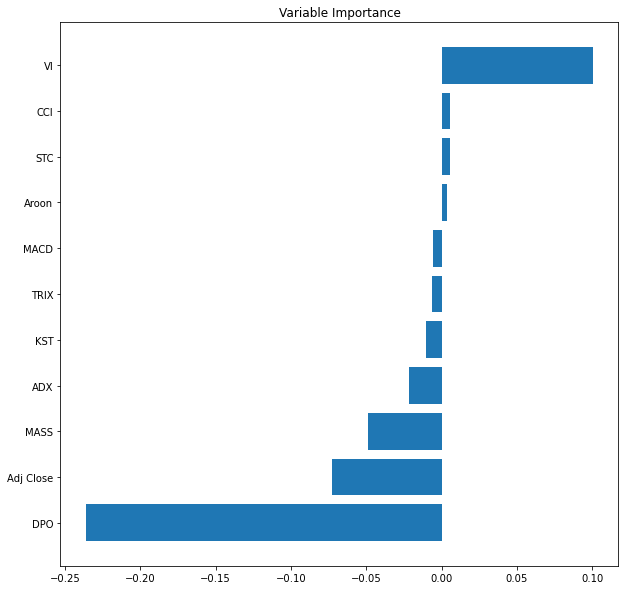

Alpha is: 1.0
R^2 Score: 0.7191385035292444
Mean Absolute Error: 0.7689423854672047
Mean Squared Error: 0.8099188216636669


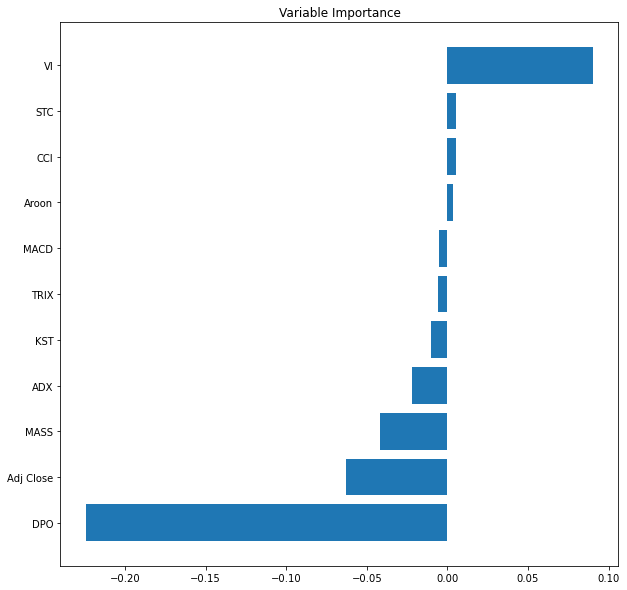

Alpha is: 0.01
R^2 Score: 0.8594196438342923
Mean Absolute Error: 1.7821769832111944
Mean Squared Error: 3.6898606403008314


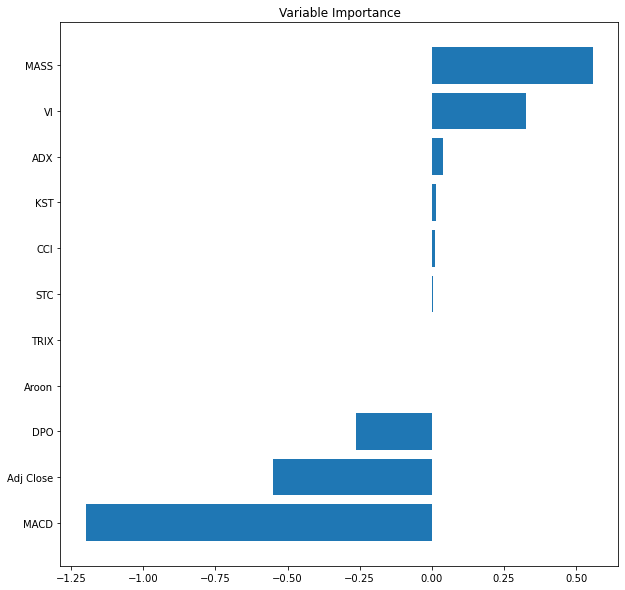

Alpha is: 0.12
R^2 Score: 0.8570675632758636
Mean Absolute Error: 1.5870735890070837
Mean Squared Error: 2.8739317004665823


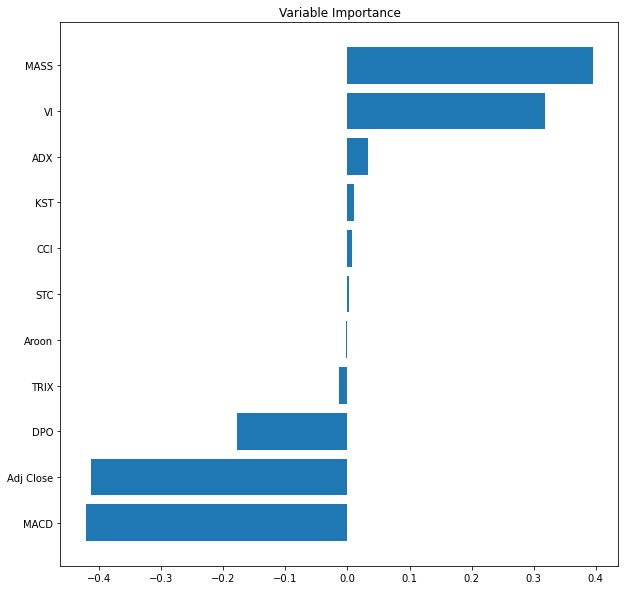

Alpha is: 0.23
R^2 Score: 0.8554194029318106
Mean Absolute Error: 1.480274289010342
Mean Squared Error: 2.4788261078291725


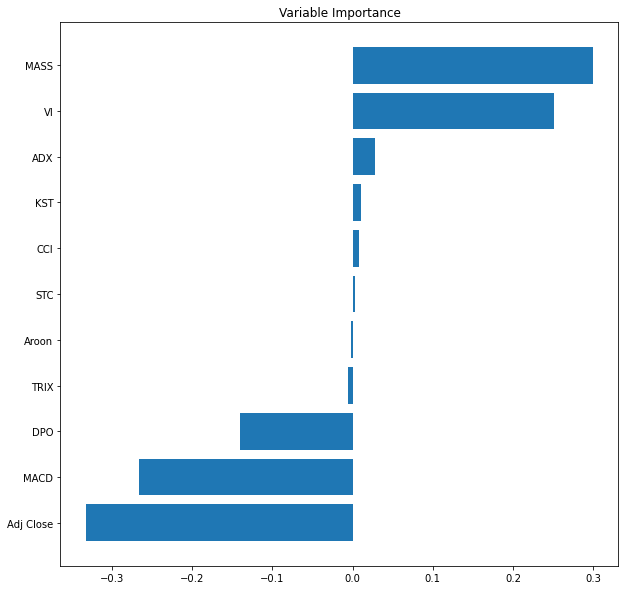

Alpha is: 0.34
R^2 Score: 0.8542062788383796
Mean Absolute Error: 1.410728887578843
Mean Squared Error: 2.2403683098771103


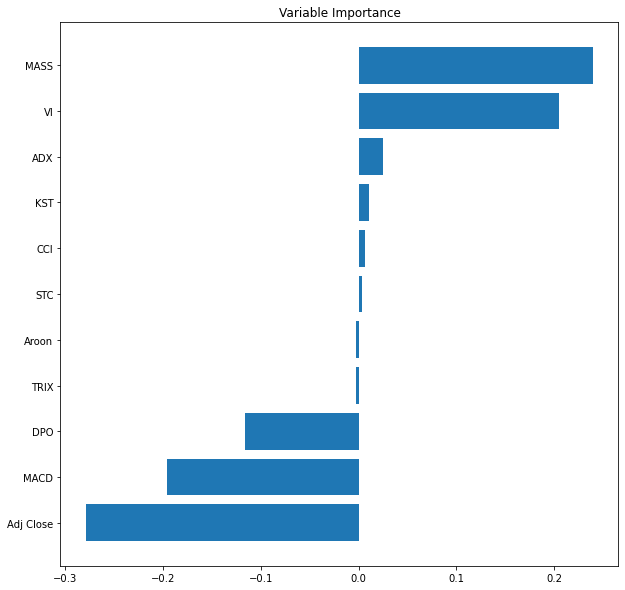

Alpha is: 0.45
R^2 Score: 0.8532825238260601
Mean Absolute Error: 1.361533609548625
Mean Squared Error: 2.0805345279314458


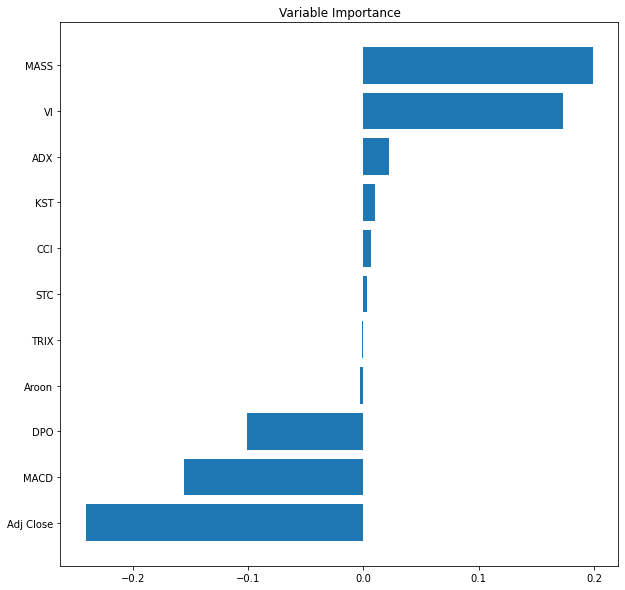

Alpha is: 0.56
R^2 Score: 0.852558602753249
Mean Absolute Error: 1.324793952163016
Mean Squared Error: 1.9659061284220827


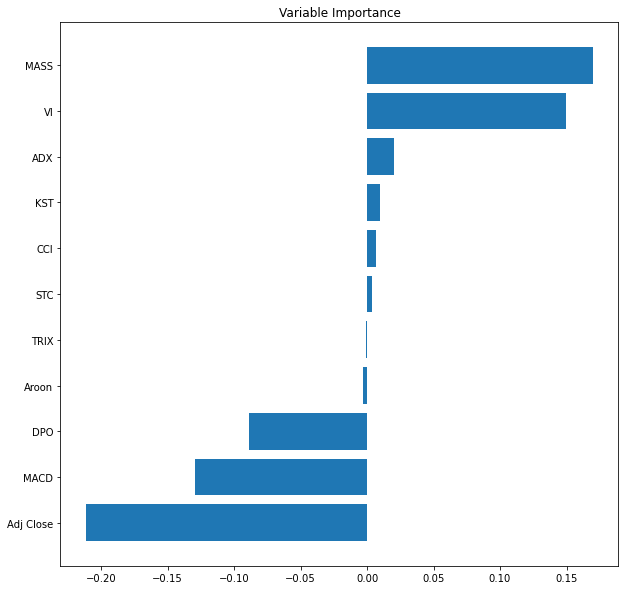

Alpha is: 0.67
R^2 Score: 0.8519771728415177
Mean Absolute Error: 1.2962665740656218
Mean Squared Error: 1.8796747528035977


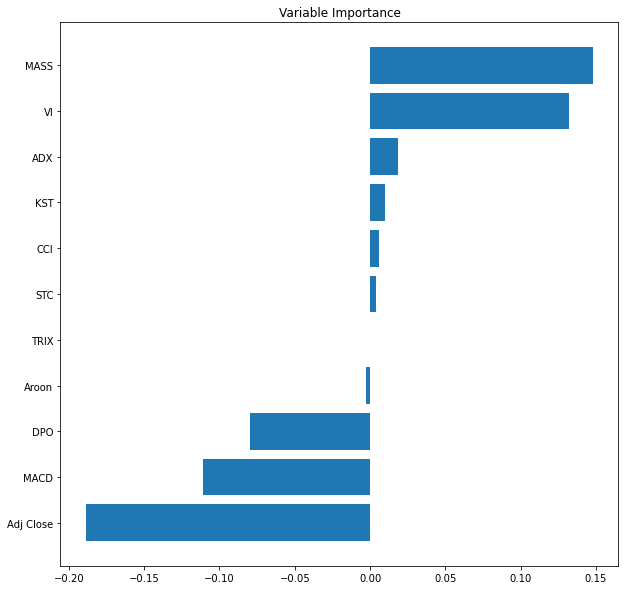

Alpha is: 0.78
R^2 Score: 0.8515004197639306
Mean Absolute Error: 1.2734532960825276
Mean Squared Error: 1.8124517810412262


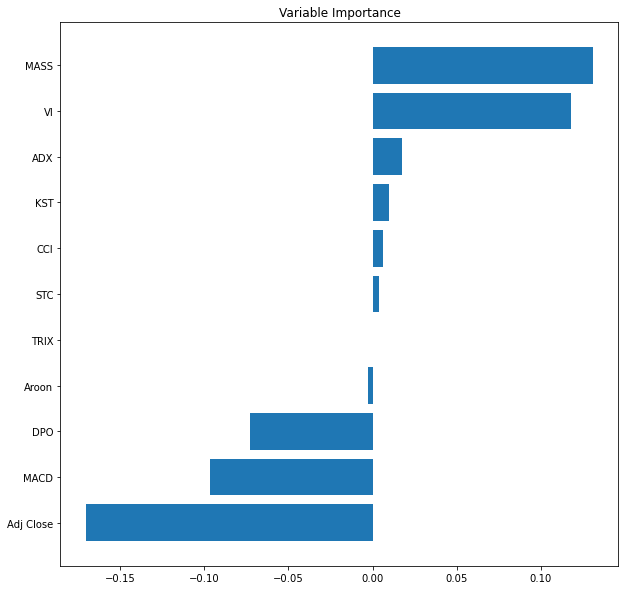

Alpha is: 0.89
R^2 Score: 0.8511026240374591
Mean Absolute Error: 1.25478256199767
Mean Squared Error: 1.7585786576442315


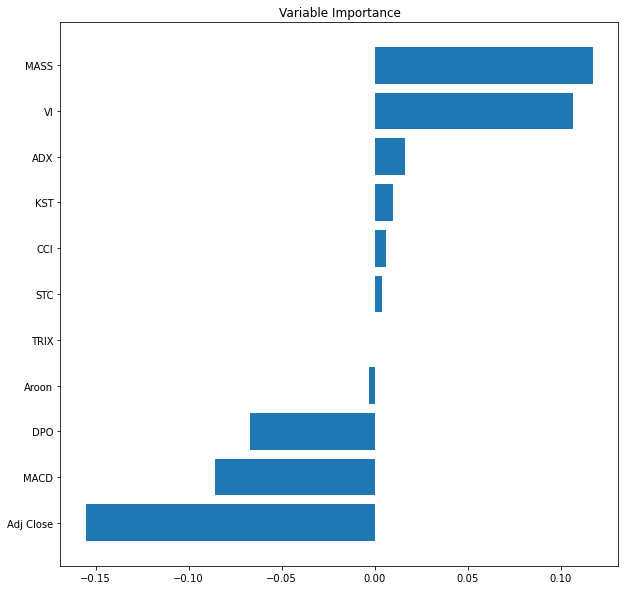

Alpha is: 1.0
R^2 Score: 0.8507657693762285
Mean Absolute Error: 1.2392140967769767
Mean Squared Error: 1.714440989859264


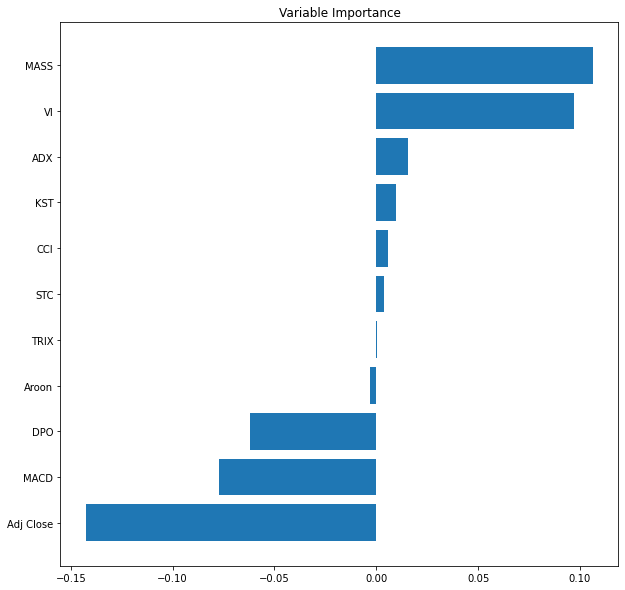

Alpha is: 0.01
R^2 Score: 0.931095915764069
Mean Absolute Error: 0.3948533067173017
Mean Squared Error: 0.19081165212330298


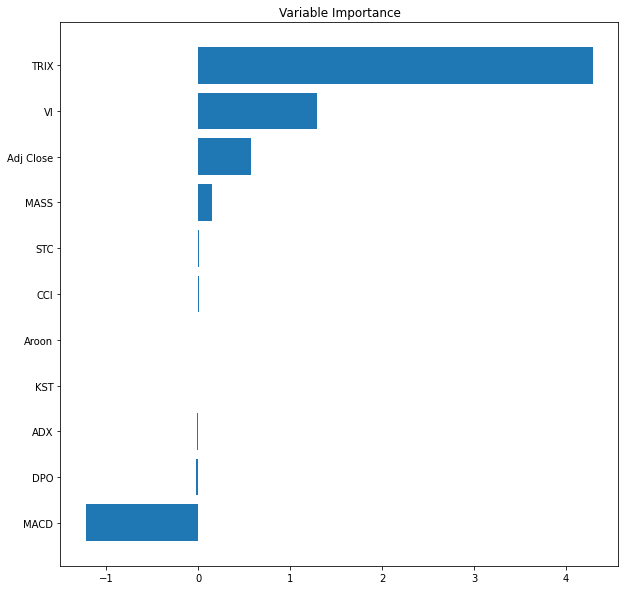

Alpha is: 0.12
R^2 Score: 0.9258796564169406
Mean Absolute Error: 0.4693732705704984
Mean Squared Error: 0.2574613376737531


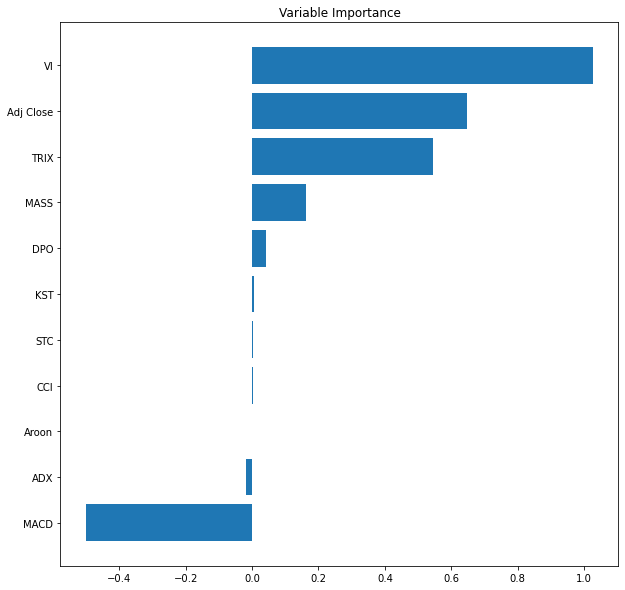

Alpha is: 0.23
R^2 Score: 0.9244095019573699
Mean Absolute Error: 0.4793127473288512
Mean Squared Error: 0.26815539166313407


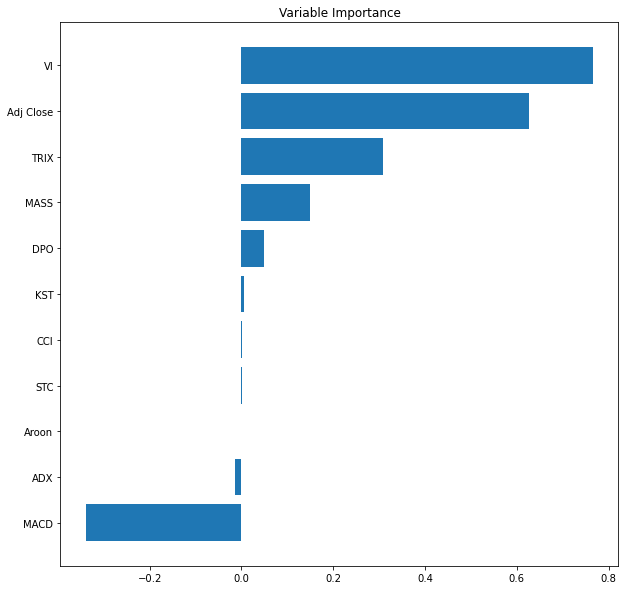

Alpha is: 0.34
R^2 Score: 0.9233991809173785
Mean Absolute Error: 0.488802406879647
Mean Squared Error: 0.2789926961177066


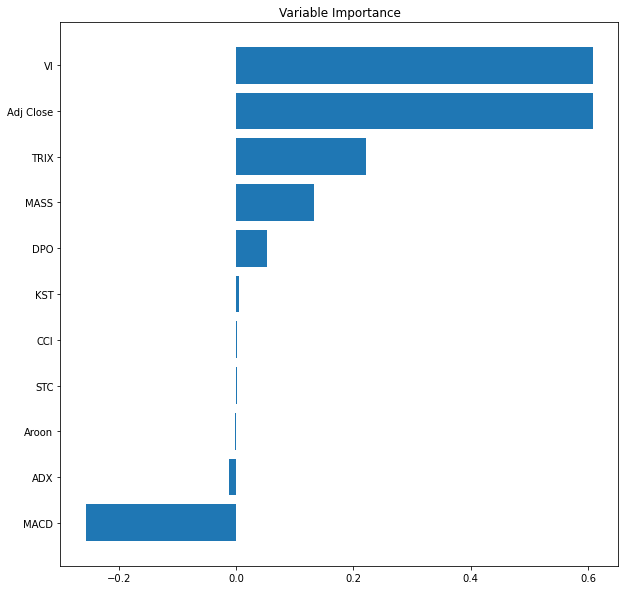

Alpha is: 0.45
R^2 Score: 0.9226422239768182
Mean Absolute Error: 0.49789812397249816
Mean Squared Error: 0.28946969328292166


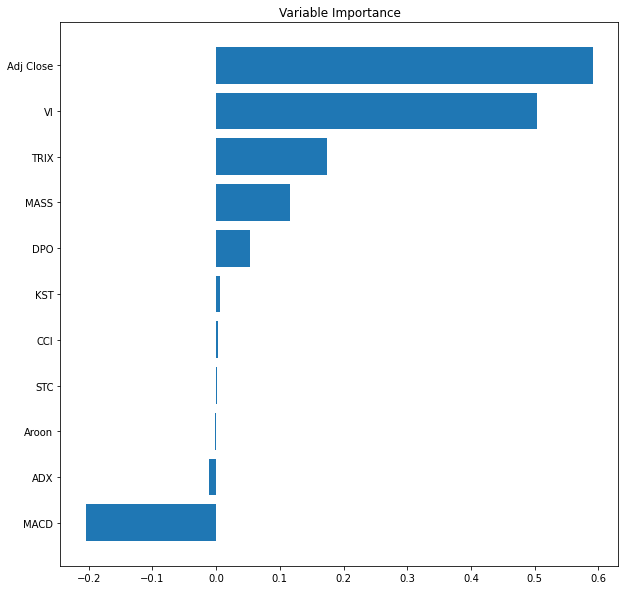

Alpha is: 0.56
R^2 Score: 0.9220435207313357
Mean Absolute Error: 0.5065202238771531
Mean Squared Error: 0.29944638334874263


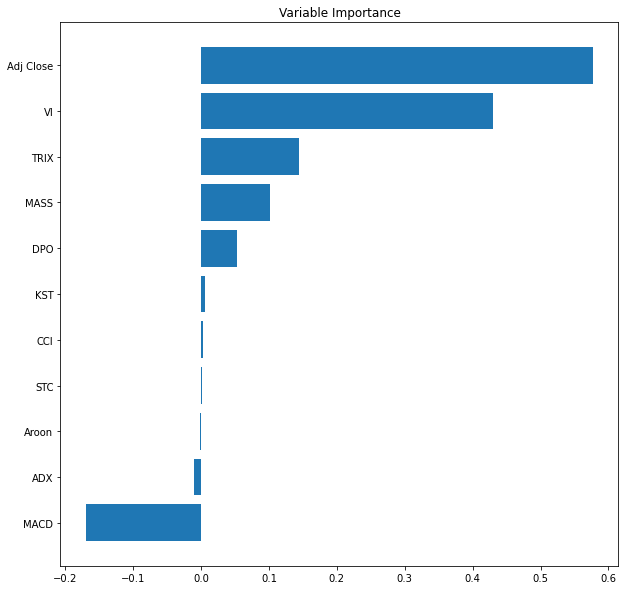

Alpha is: 0.67
R^2 Score: 0.9215500891076231
Mean Absolute Error: 0.5146713236914673
Mean Squared Error: 0.30893632676068006


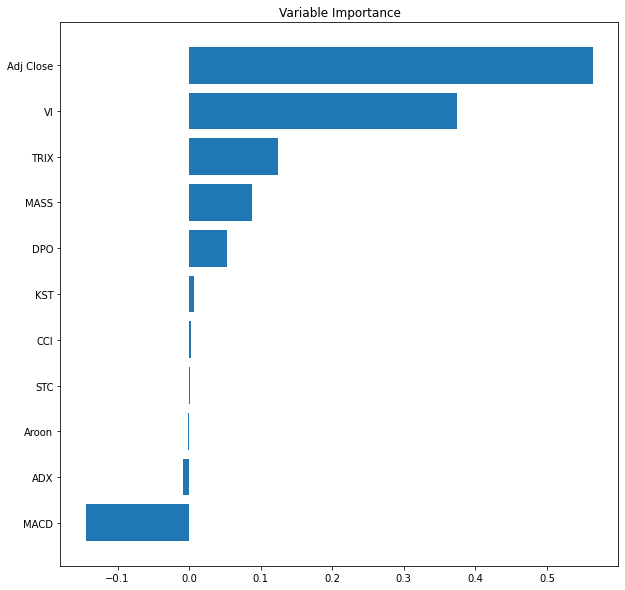

Alpha is: 0.78
R^2 Score: 0.921130009712861
Mean Absolute Error: 0.5223853550309291
Mean Squared Error: 0.31798884888087975


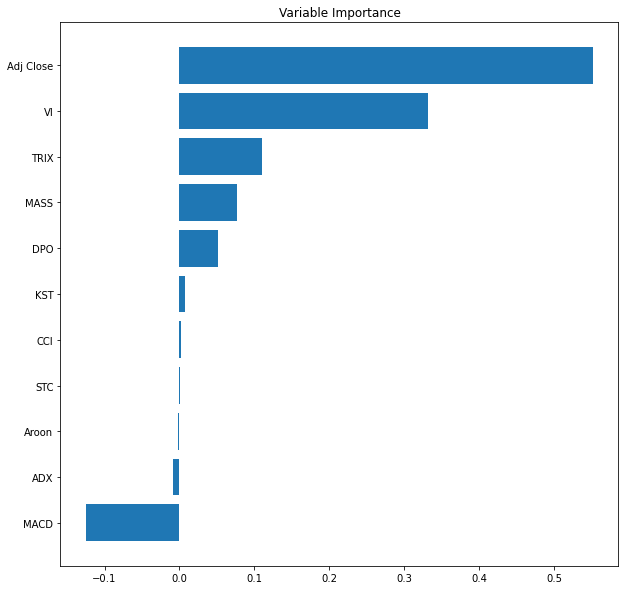

Alpha is: 0.89
R^2 Score: 0.9207629529375942
Mean Absolute Error: 0.5297035143670622
Mean Squared Error: 0.3266555689342457


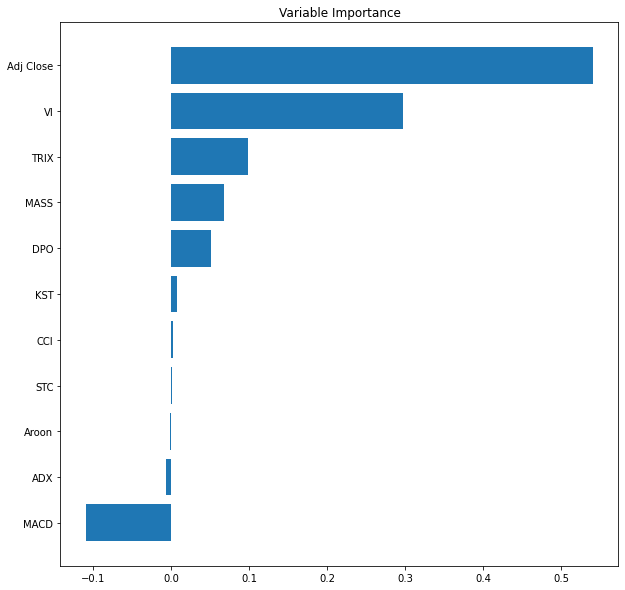

Alpha is: 1.0
R^2 Score: 0.9204353918321158
Mean Absolute Error: 0.5366655314131407
Mean Squared Error: 0.33498194709852014


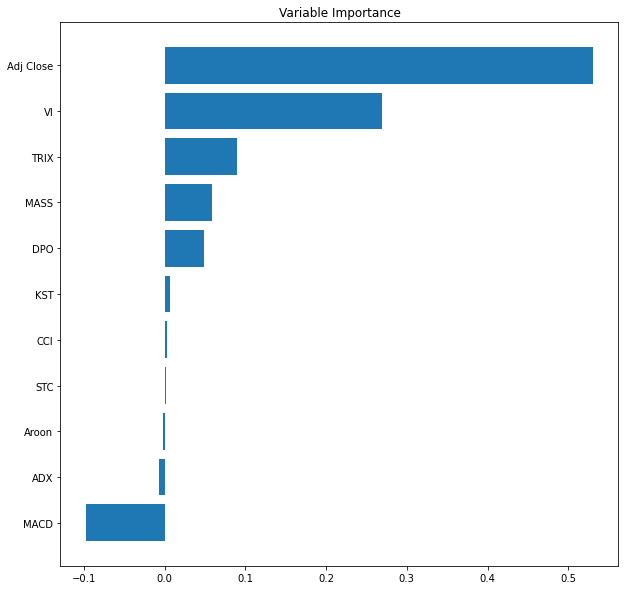

Alpha is: 0.01
R^2 Score: 0.9336417230500612
Mean Absolute Error: 0.3659791073003137
Mean Squared Error: 0.30929126239809385


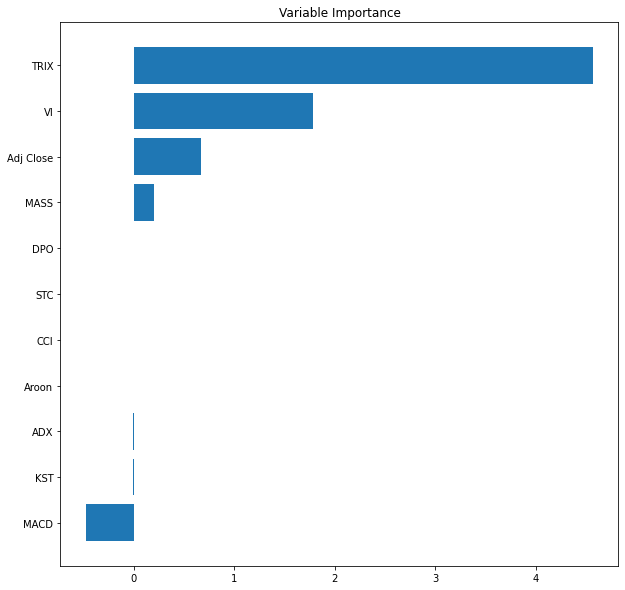

Alpha is: 0.12
R^2 Score: 0.9284142660102856
Mean Absolute Error: 0.38652061531831305
Mean Squared Error: 0.32615921440667


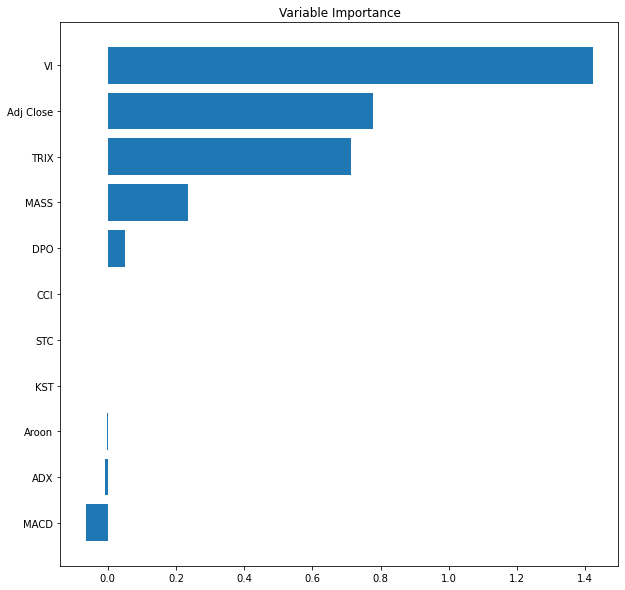

Alpha is: 0.23
R^2 Score: 0.9266389706333851
Mean Absolute Error: 0.4000344175243265
Mean Squared Error: 0.3363140216878156


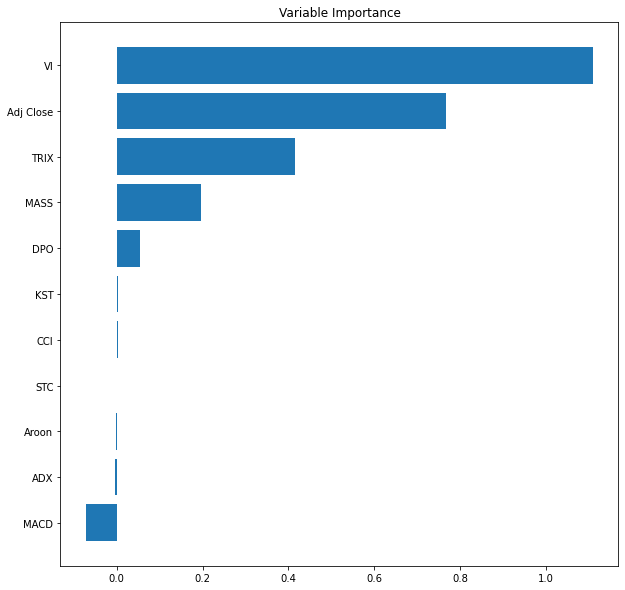

Alpha is: 0.34
R^2 Score: 0.9252969847875383
Mean Absolute Error: 0.4113598463715776
Mean Squared Error: 0.3451454846854371


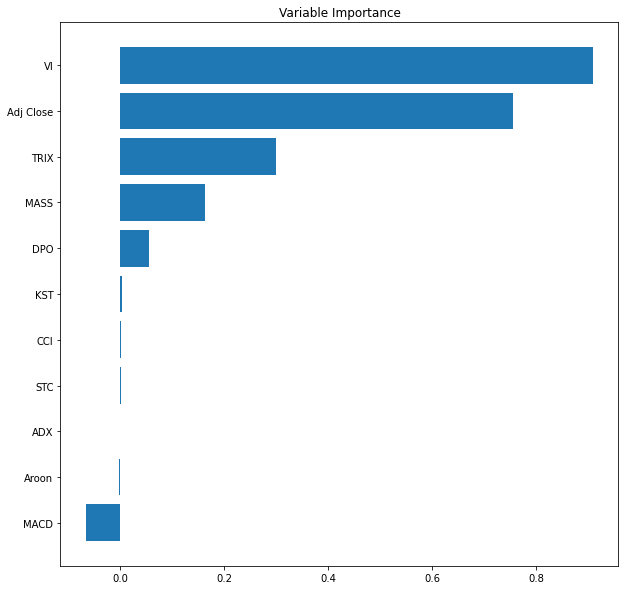

Alpha is: 0.45
R^2 Score: 0.9242282563879441
Mean Absolute Error: 0.42098428279384886
Mean Squared Error: 0.3529458380978914


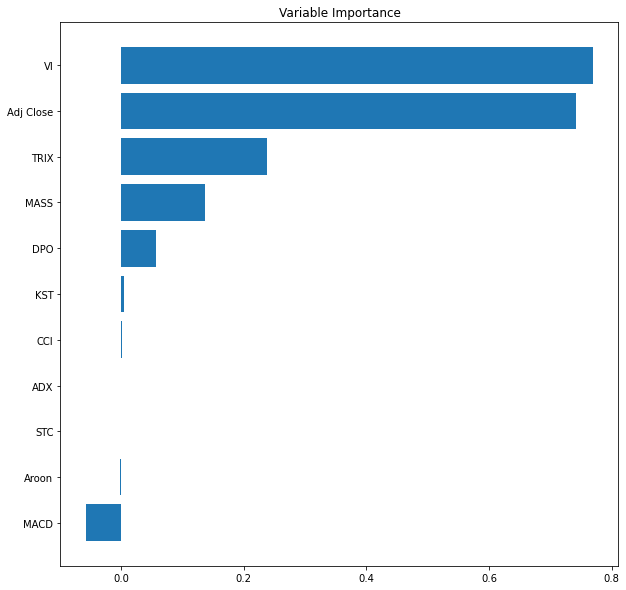

Alpha is: 0.56
R^2 Score: 0.9233529775423951
Mean Absolute Error: 0.42935394144165284
Mean Squared Error: 0.3599841720883762


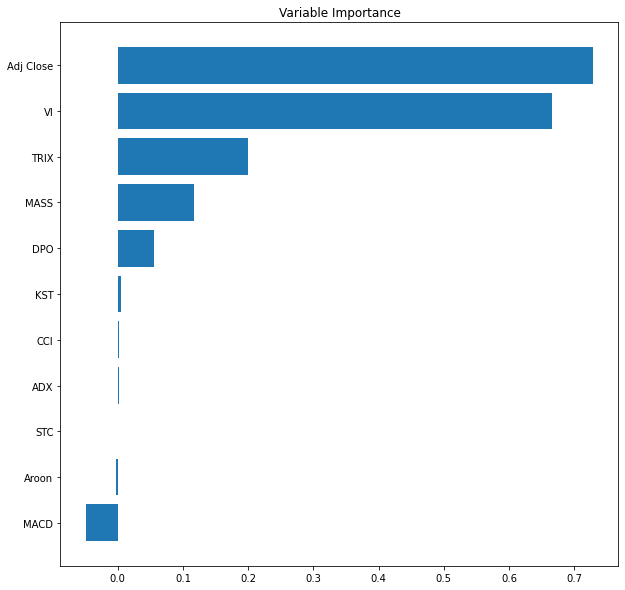

Alpha is: 0.67
R^2 Score: 0.9226187393998193
Mean Absolute Error: 0.4367819827160731
Mean Squared Error: 0.3664544972166786


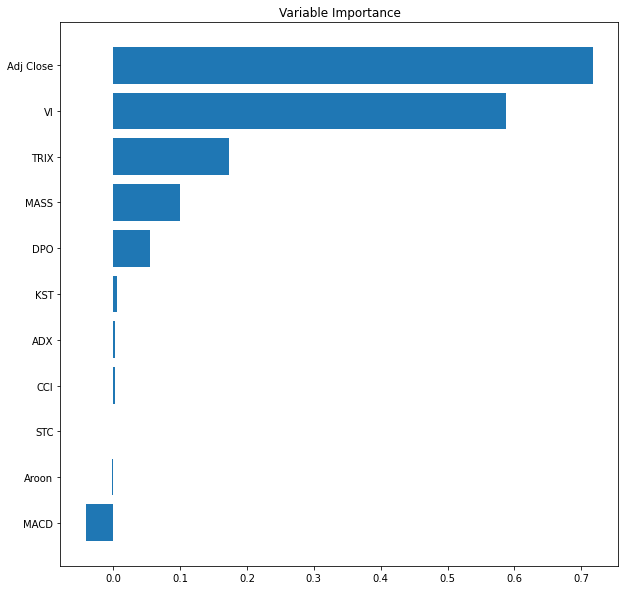

Alpha is: 0.78
R^2 Score: 0.9219895298252669
Mean Absolute Error: 0.4434835538127521
Mean Squared Error: 0.3724914828842018


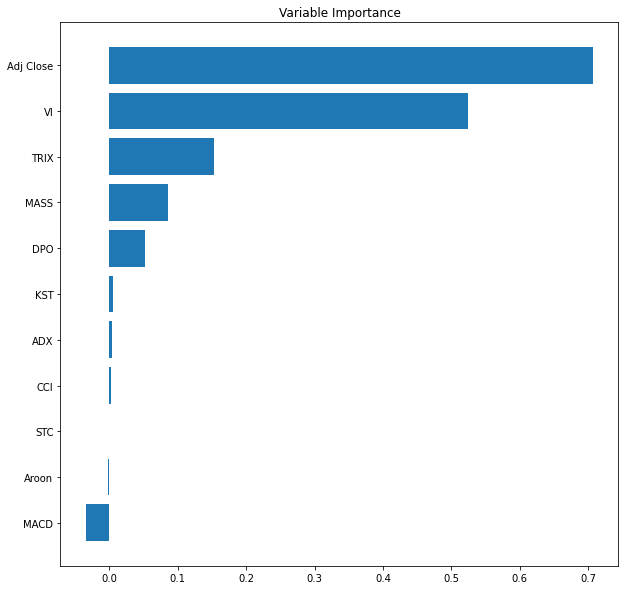

Alpha is: 0.89
R^2 Score: 0.9214400314728152
Mean Absolute Error: 0.4508461837038921
Mean Squared Error: 0.3781894642160799


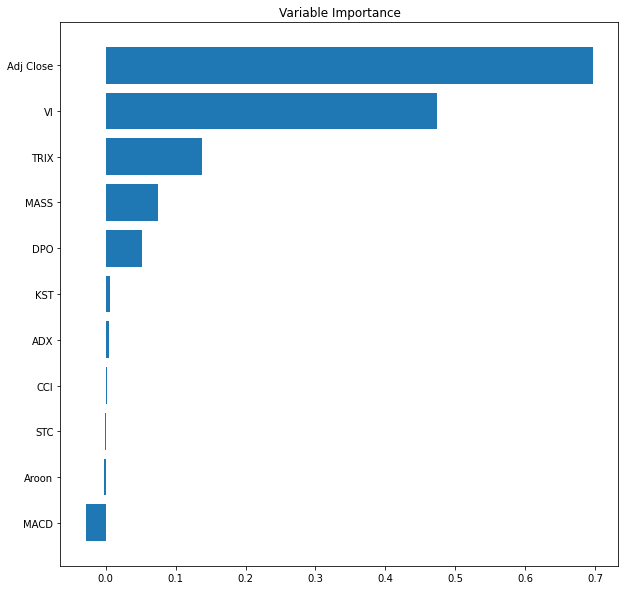

Alpha is: 1.0
R^2 Score: 0.920952081753124
Mean Absolute Error: 0.45808815787880686
Mean Squared Error: 0.383615859505585


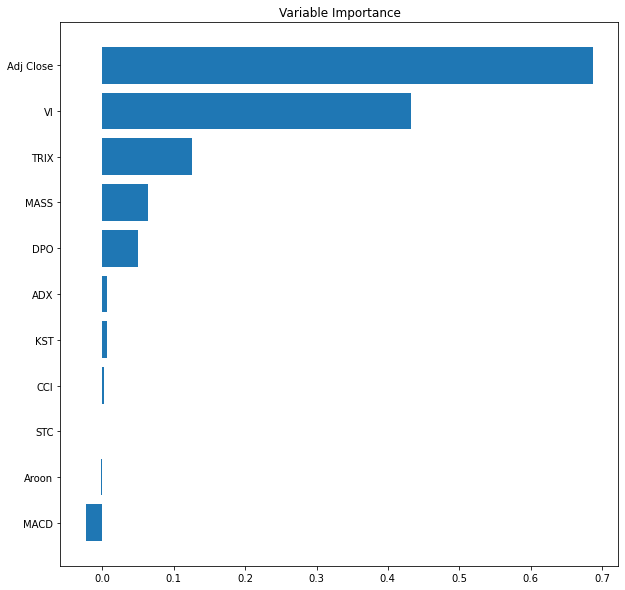

Alpha is: 0.01
R^2 Score: 0.901180303067014
Mean Absolute Error: 0.2715766552018985
Mean Squared Error: 0.12181550716005131


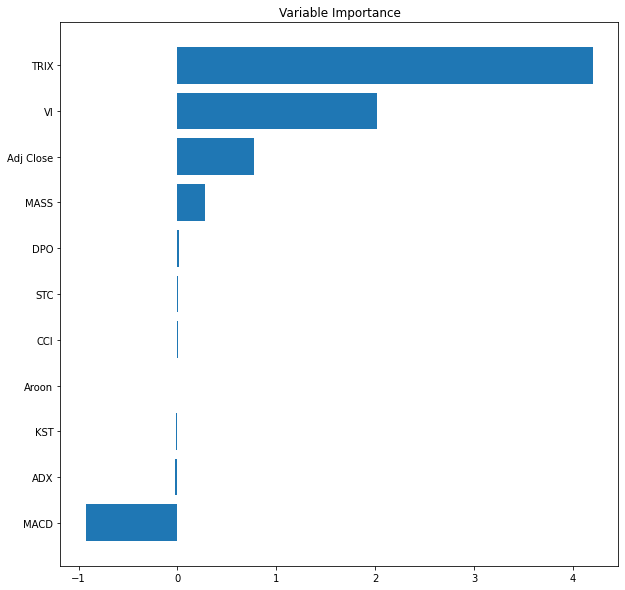

Alpha is: 0.12
R^2 Score: 0.8967026882512574
Mean Absolute Error: 0.26989493978379975
Mean Squared Error: 0.12124008051630011


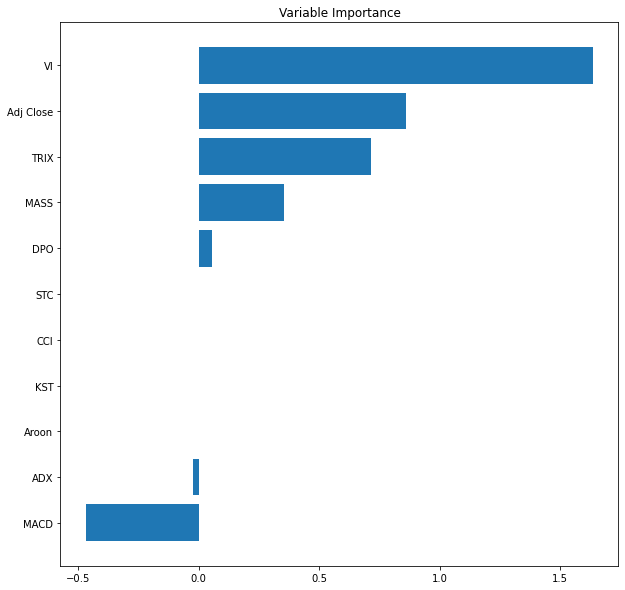

Alpha is: 0.23
R^2 Score: 0.8947585135419907
Mean Absolute Error: 0.2712645117510635
Mean Squared Error: 0.12080268144157662


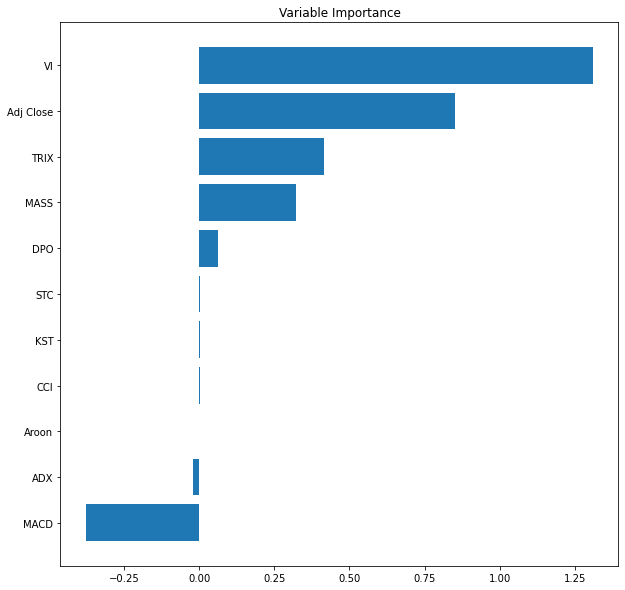

Alpha is: 0.34
R^2 Score: 0.89317121469092
Mean Absolute Error: 0.27249446469090927
Mean Squared Error: 0.1213933253069307


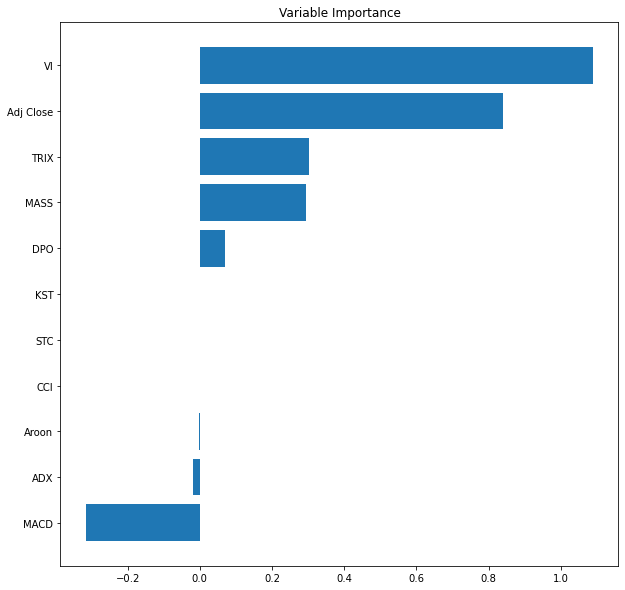

Alpha is: 0.45
R^2 Score: 0.891856498331453
Mean Absolute Error: 0.2735972572942374
Mean Squared Error: 0.1223509490562626


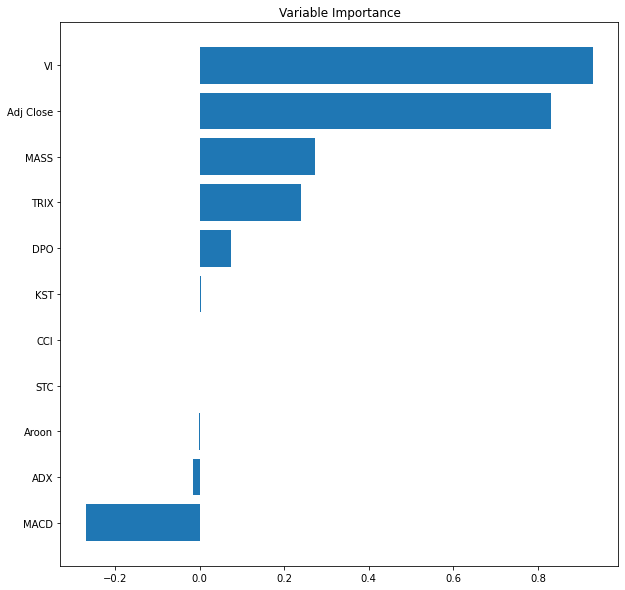

Alpha is: 0.56
R^2 Score: 0.8907579190741843
Mean Absolute Error: 0.274630299118029
Mean Squared Error: 0.12341983149996774


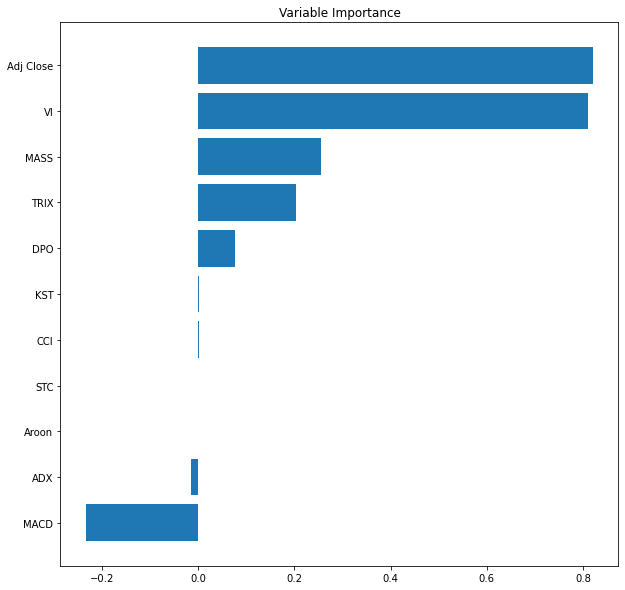

Alpha is: 0.67
R^2 Score: 0.8898284242142359
Mean Absolute Error: 0.2756156556047042
Mean Squared Error: 0.12449957383436878


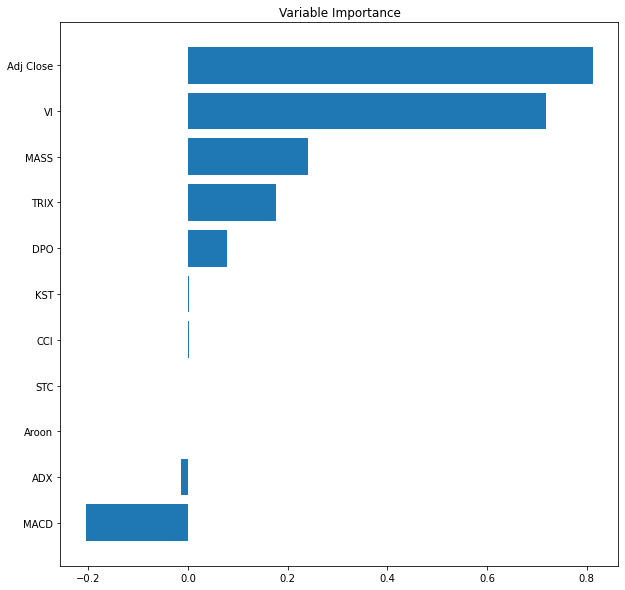

Alpha is: 0.78
R^2 Score: 0.8890311472603533
Mean Absolute Error: 0.2765641518538565
Mean Squared Error: 0.125550771275528


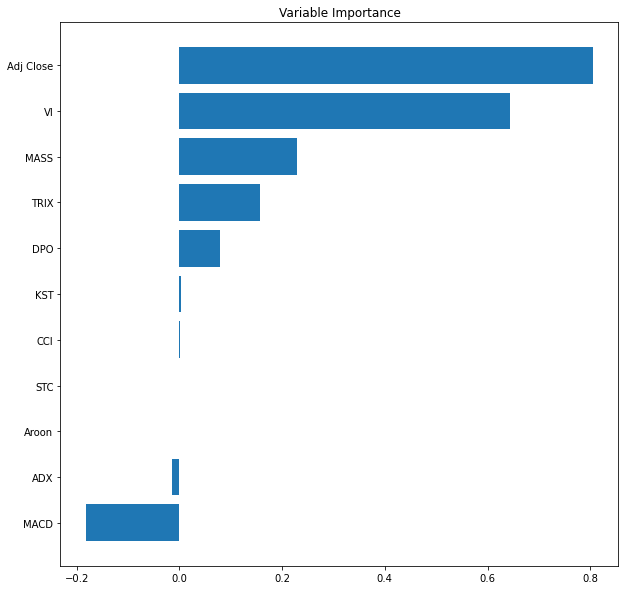

Alpha is: 0.89
R^2 Score: 0.8883379541900982
Mean Absolute Error: 0.2774820489228121
Mean Squared Error: 0.12655931976338863


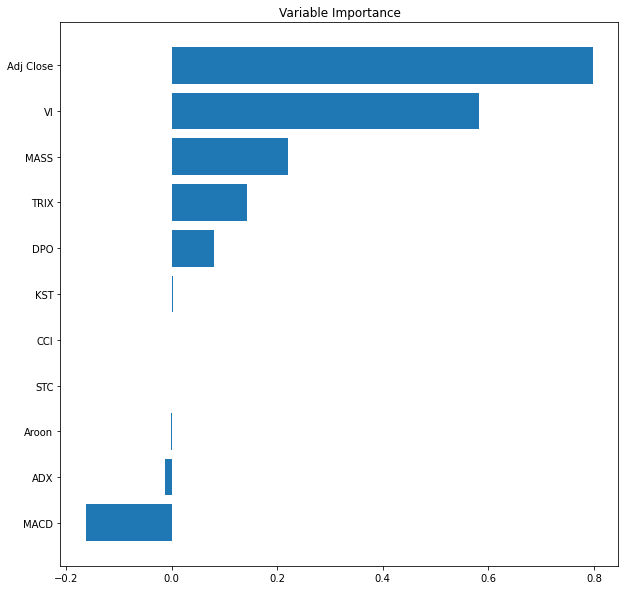

Alpha is: 1.0
R^2 Score: 0.8877274705142374
Mean Absolute Error: 0.27837342378435015
Mean Squared Error: 0.12752194878337694


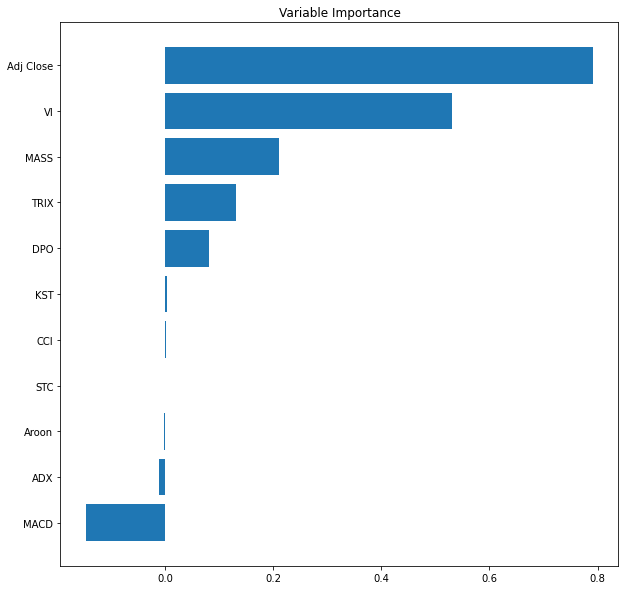

In [48]:
#Ridge Model

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    

    for alpha in np.linspace(.01, 1, 10):
        print('Alpha is:',alpha)
        ridge_model = linear_model.Ridge(alpha)
        ridge_model.fit(X_tr,y_tr)
        
        ridge_y_pred = ridge_model.predict(X_ts)
        
        r2 = ridge_model.score(X_tr,y_tr)
        mean_abs_error = mean_absolute_error(y_ts,ridge_y_pred)
        mean_sqr_error =  mean_squared_error(y_ts,ridge_y_pred)
        print('R^2 Score:',r2)
        print('Mean Absolute Error:',mean_abs_error)
        print('Mean Squared Error:',mean_sqr_error)
        
        lm_imp = ridge_model.coef_
        sorted_idx = np.argsort(lm_imp)
        num_features = np.arange(sorted_idx.shape[0])
        plt.figure(figsize=(10,10))
        plt.barh(num_features,lm_imp[sorted_idx],align='center')
        plt.yticks(num_features, X_train_columns[sorted_idx])
        plt.title('Variable Importance')
        plt.show()


Best Parameters:{'max_depth': 1, 'n_estimators': 2}
R^2 Score: 0.6680995126900411
Mean Absolute Error: 0.930313254509913
Mean Squared Error: 1.0177448600461156


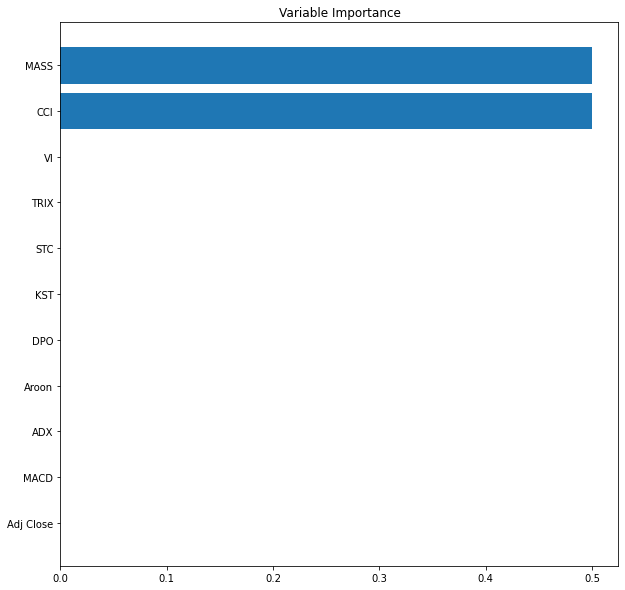

Best Parameters:{'max_depth': 2, 'n_estimators': 1}
R^2 Score: 0.7674338669125258
Mean Absolute Error: 1.490015733168247
Mean Squared Error: 2.4894111757401576


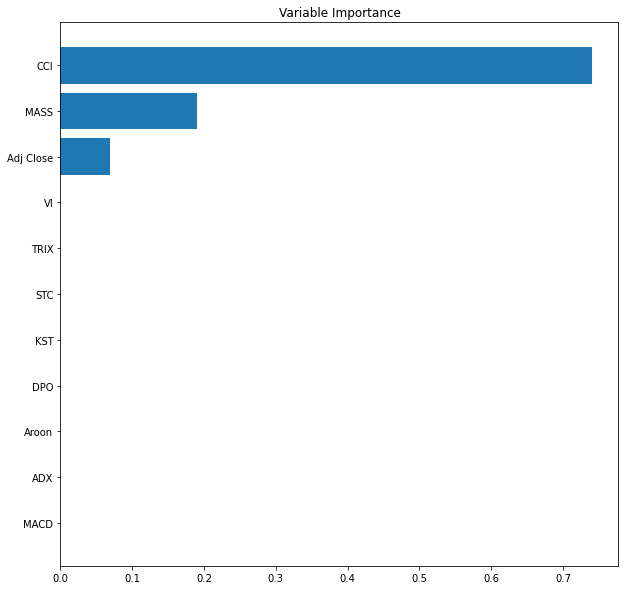

Best Parameters:{'max_depth': 2, 'n_estimators': 2}
R^2 Score: 0.8769421527492295
Mean Absolute Error: 0.43024780159429893
Mean Squared Error: 0.3040823437520655


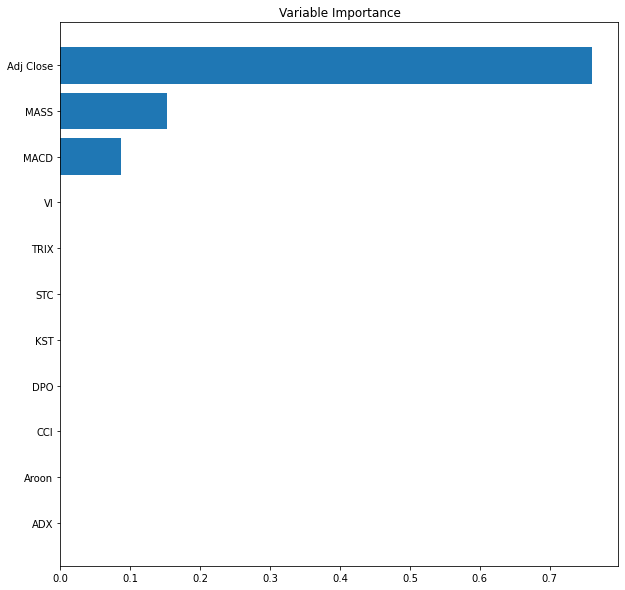

Best Parameters:{'max_depth': 2, 'n_estimators': 2}
R^2 Score: 0.8973616395793045
Mean Absolute Error: 0.6557828624569346
Mean Squared Error: 0.6589271562461999


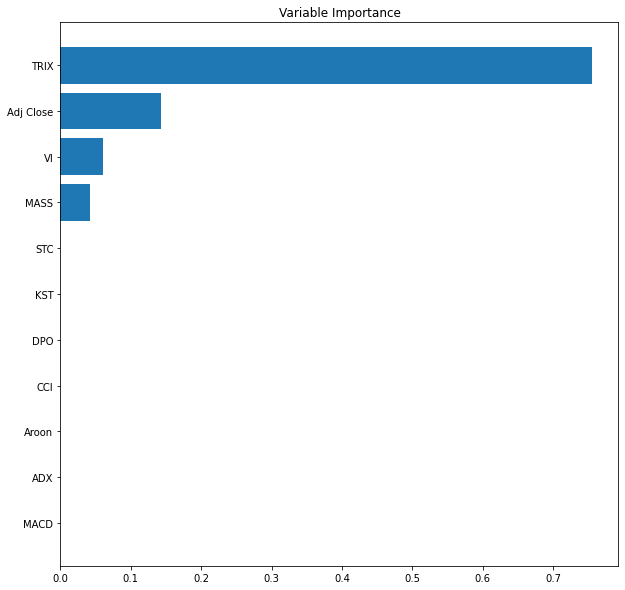

Best Parameters:{'max_depth': 2, 'n_estimators': 2}
R^2 Score: 0.8662311087262102
Mean Absolute Error: 0.5129719822913276
Mean Squared Error: 0.3447612546359301


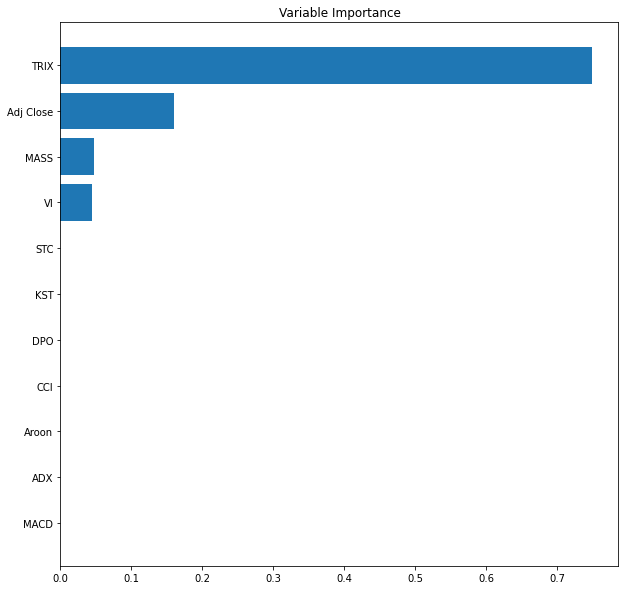

In [49]:
#Random Forest

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    random_grid = {'n_estimators':np.arange(1,3),'max_depth':np.arange(1,3)}
    rfr = RandomForestRegressor(random_state=49)
    rfr_cv = GridSearchCV(rfr,random_grid,cv=5)
    rfr_cv.fit(X_tr,y_tr)
    print('Best Parameters:' + str(rfr_cv.best_params_))
    
    rfr = RandomForestRegressor(n_estimators = rfr_cv.best_params_['n_estimators'],max_depth = rfr_cv.best_params_['max_depth'],random_state=49)
    rfr.fit(X_tr,y_tr)
    
    y_pred_rfr = rfr.predict(X_ts)
    
    r2 = rfr.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred_rfr)
    mean_sqr_error =  mean_squared_error(y_ts,y_pred_rfr)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Squared Error:',mean_sqr_error)

    
    rfr_imp = rfr.feature_importances_
    sorted_idx = np.argsort(rfr_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,rfr_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

In [50]:
df_volatility = df[['Adj Close Shift','Adj Close','Bollinger Avg','Bollinger High','Bollinger Low','ATR','Donchain Mid','Donchain High','Donchain Low','Keltner Mid','Keltner High','Keltner Low','Ulcer']]

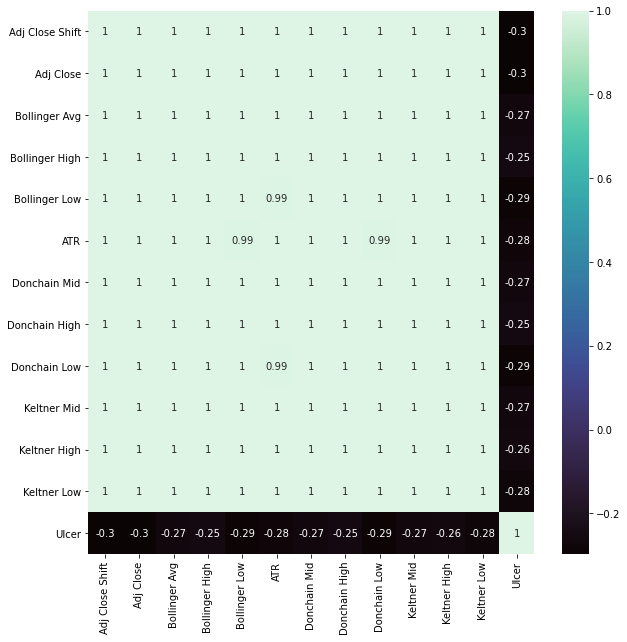

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_volatility.corr(),annot=True,cmap='mako')

In [52]:
#Drop all but Ulcer
df_volatility = df[['Adj Close Shift','Adj Close','Ulcer']]

In [53]:
#Separating Data
X = df_volatility.drop(columns=['Adj Close Shift'])['2019-04-01':'2019-08-31']
y = df_volatility['Adj Close Shift']['2019-04-01':'2019-08-31']
X_train_columns = X.columns

R^2 Score: 0.5345099058549215
Mean Absolute Error: 0.5127665753982361
Mean Squared Error: 0.3255101369171487


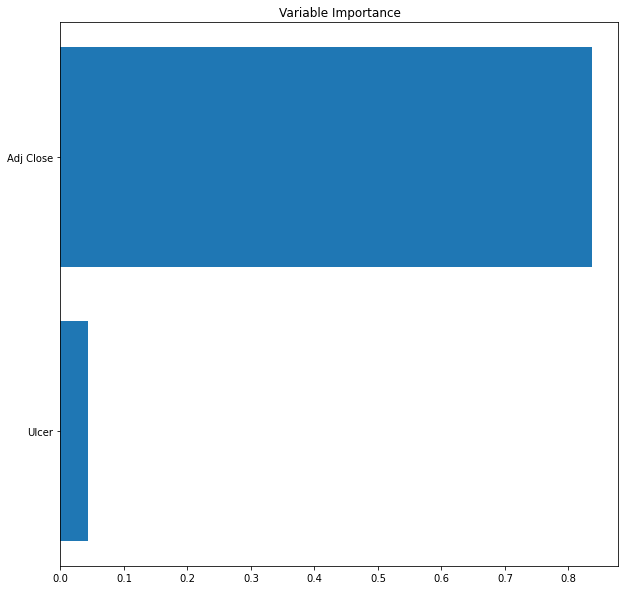

R^2 Score: 0.791635558338712
Mean Absolute Error: 0.5405909779594914
Mean Squared Error: 0.4236414479225582


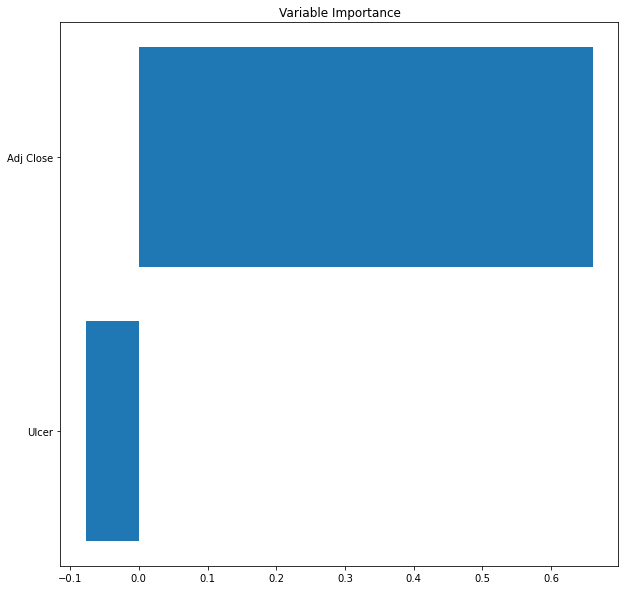

R^2 Score: 0.9042274400782451
Mean Absolute Error: 0.1676975299093082
Mean Squared Error: 0.054677054667348284


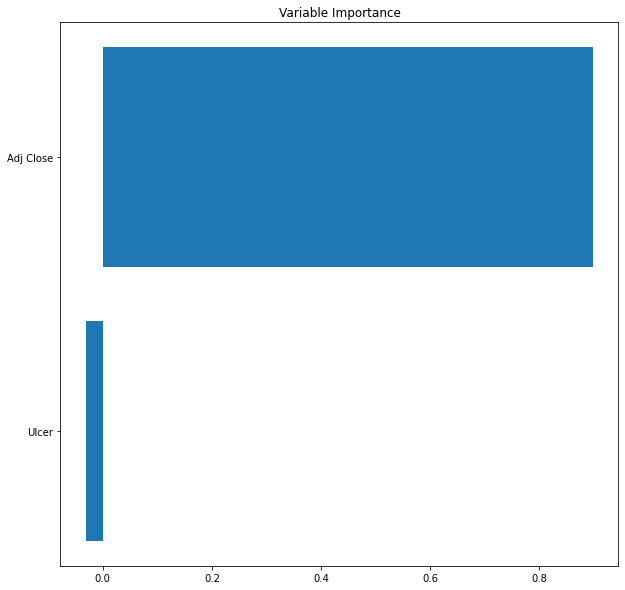

R^2 Score: 0.9091302782969012
Mean Absolute Error: 0.34659748369793003
Mean Squared Error: 0.3448994124955099


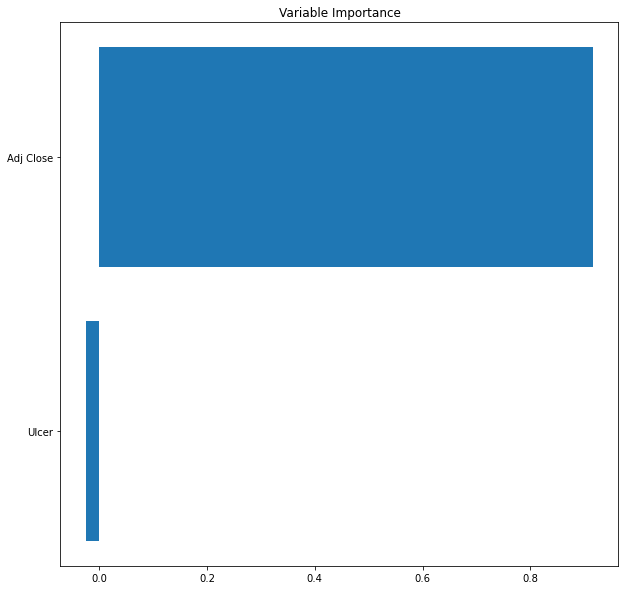

R^2 Score: 0.8716267466746748
Mean Absolute Error: 0.28477641001683635
Mean Squared Error: 0.11700561928937375


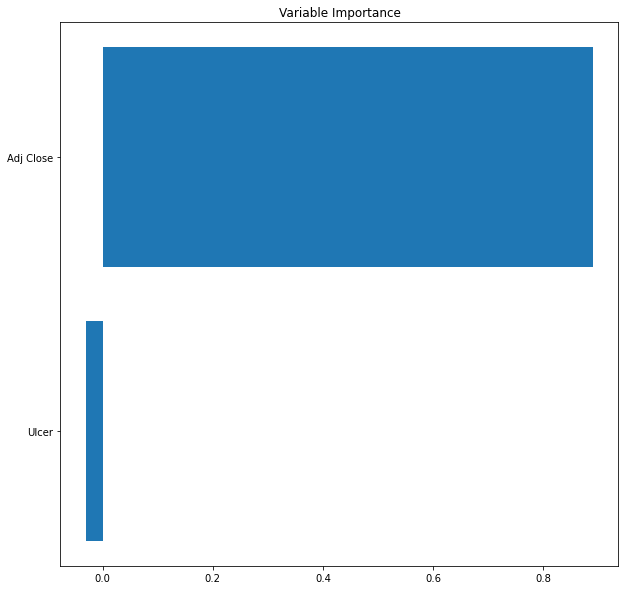

In [54]:
#OLS

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    rModel = linear_model.LinearRegression()
    rModel.fit(X_tr,y_tr)
    
    y_pred = rModel.predict(X_ts)
    
    r2 = rModel.score(X_tr,y_tr)
    test_score = rModel.score(X_ts,y_ts)
    mean_abs_error = mean_absolute_error(y_ts,y_pred)
    mean_sqr_error = mean_squared_error(y_ts,y_pred)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Squared Error:',mean_sqr_error)

    lm_imp = rModel.coef_
    sorted_idx = np.argsort(lm_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,lm_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

Alpha is: 0.01
R^2 Score: 0.5345044766474472
Mean Absolute Error: 0.5016779468023713
Mean Squared Error: 0.3124327411829872


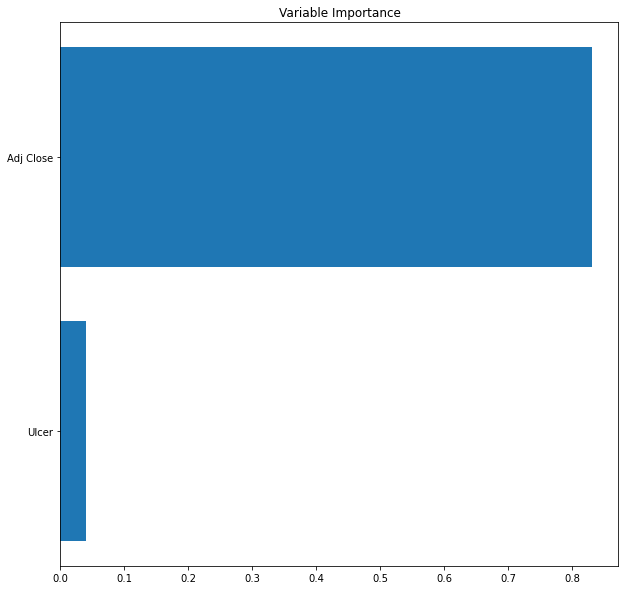

Alpha is: 0.12
R^2 Score: 0.5338687670955202
Mean Absolute Error: 0.39605034624072577
Mean Squared Error: 0.20495246803186531


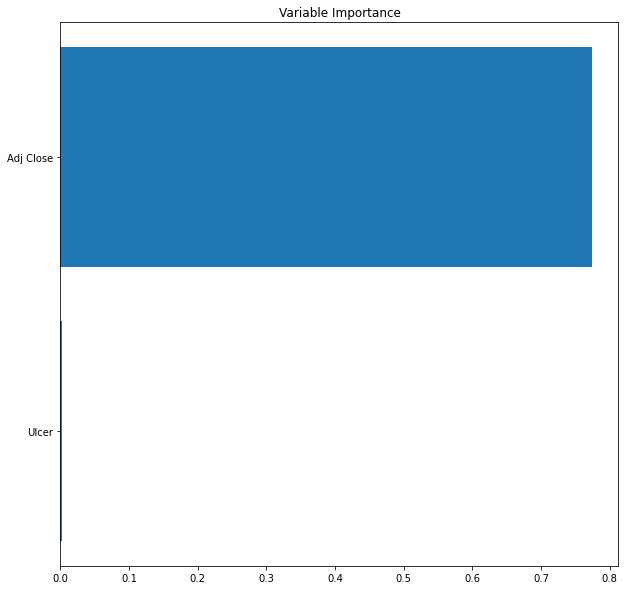

Alpha is: 0.23
R^2 Score: 0.5325417022907681
Mean Absolute Error: 0.3265938796162793
Mean Squared Error: 0.1447542855789895


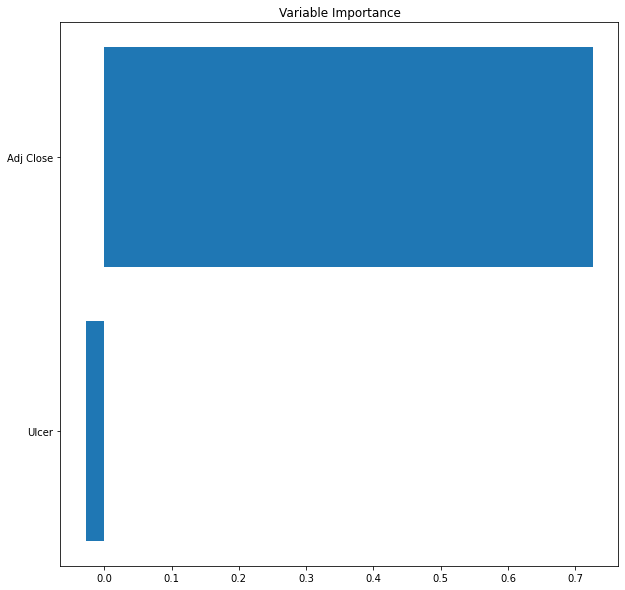

Alpha is: 0.34
R^2 Score: 0.5308589219402108
Mean Absolute Error: 0.27840575566098025
Mean Squared Error: 0.11332072892972701


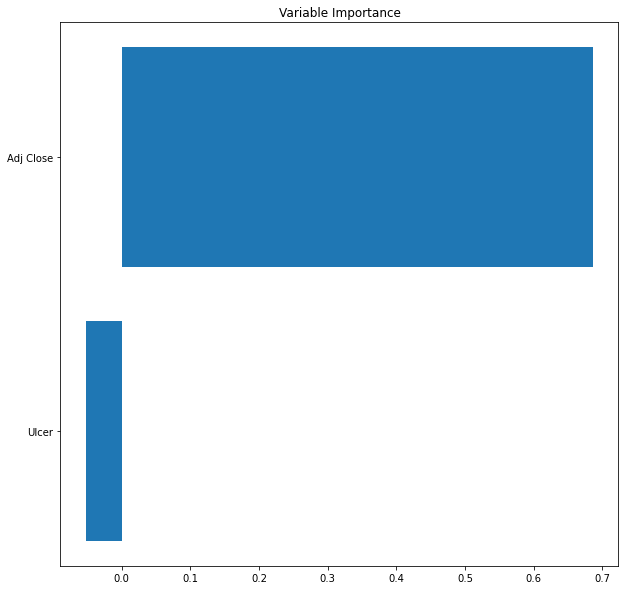

Alpha is: 0.45
R^2 Score: 0.5290083660920211
Mean Absolute Error: 0.24951494372823918
Mean Squared Error: 0.0996405076113859


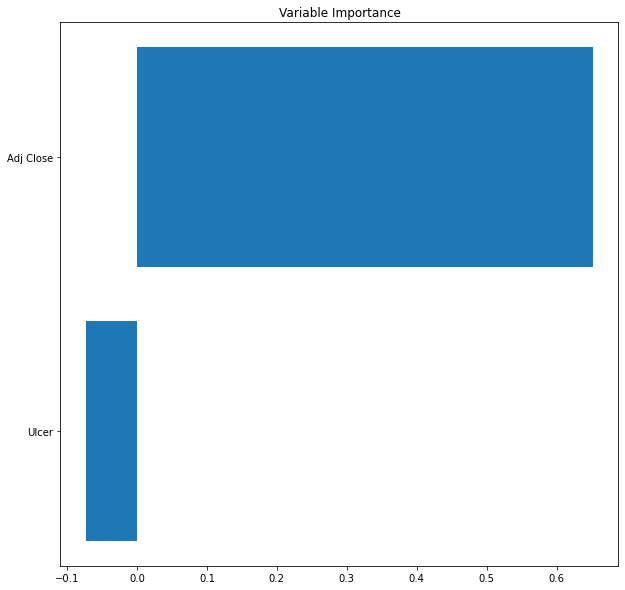

Alpha is: 0.56
R^2 Score: 0.5270969283997518
Mean Absolute Error: 0.23672363173827216
Mean Squared Error: 0.09696326568582488


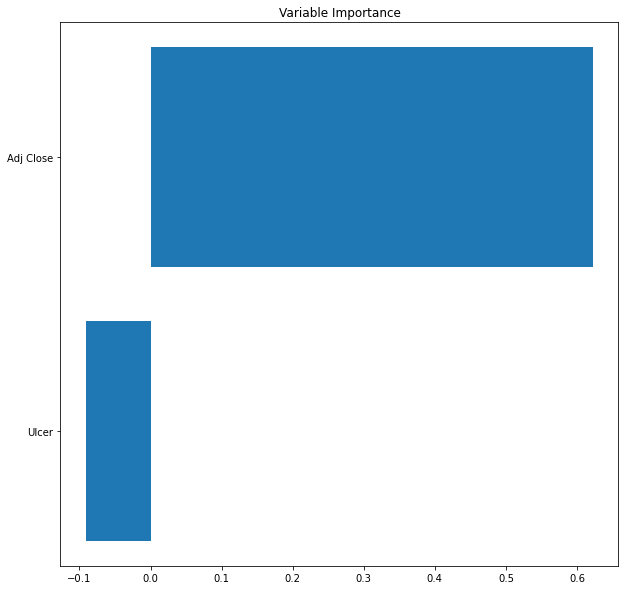

Alpha is: 0.67
R^2 Score: 0.5251855498579733
Mean Absolute Error: 0.23446379227841496
Mean Squared Error: 0.10105110128359096


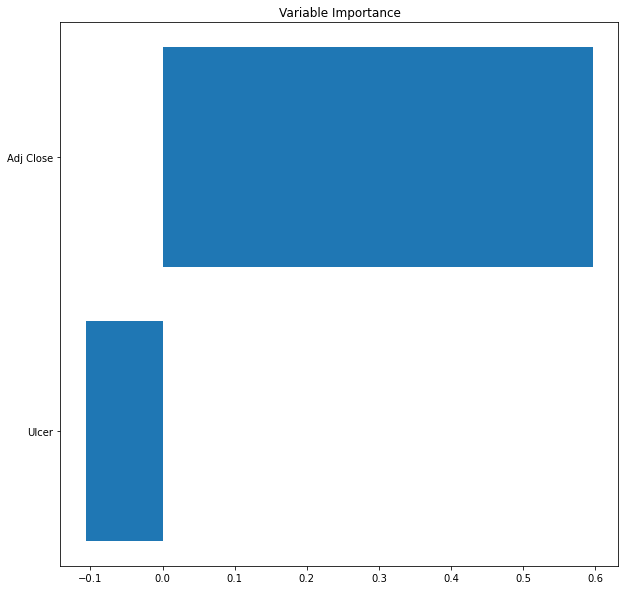

Alpha is: 0.78
R^2 Score: 0.5233084606167648
Mean Absolute Error: 0.23495418774204674
Mean Squared Error: 0.10919500189982297


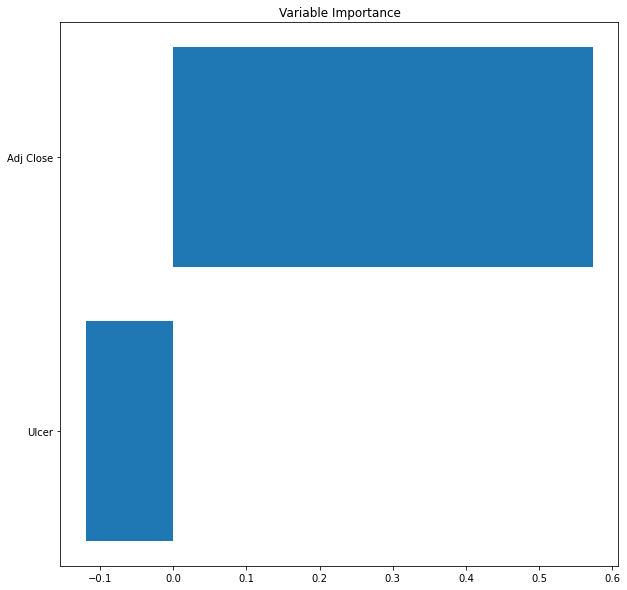

Alpha is: 0.89
R^2 Score: 0.5214840877002935
Mean Absolute Error: 0.24147081517954241
Mean Squared Error: 0.1196410615340235


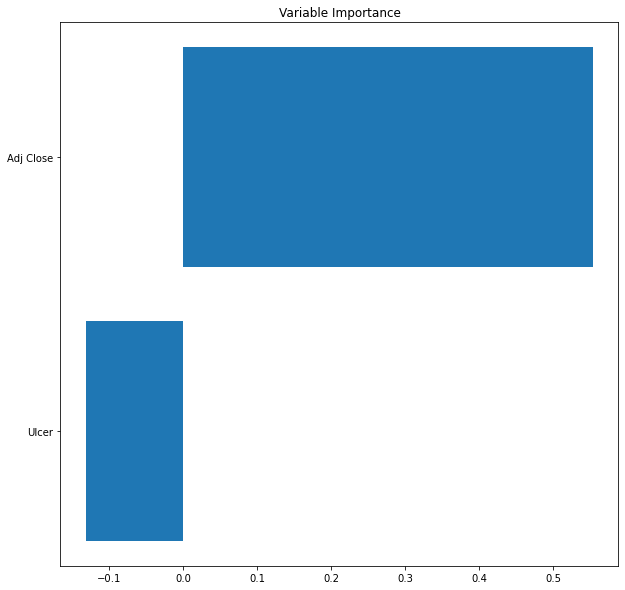

Alpha is: 1.0
R^2 Score: 0.5197214095686076
Mean Absolute Error: 0.25666706256072347
Mean Squared Error: 0.1312452150183262


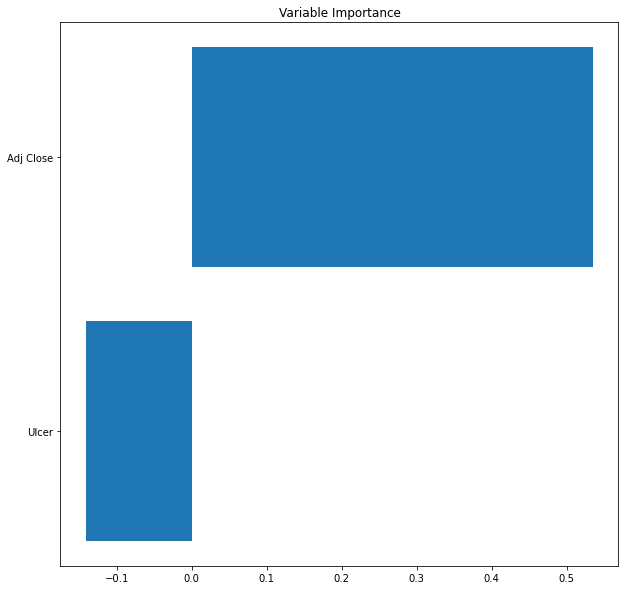

Alpha is: 0.01
R^2 Score: 0.791635343606174
Mean Absolute Error: 0.5420850855197343
Mean Squared Error: 0.4253187542964232


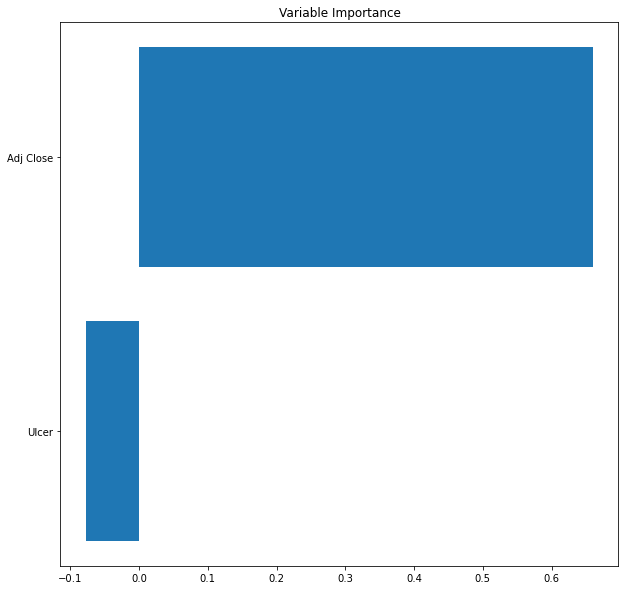

Alpha is: 0.12
R^2 Score: 0.7916056810610398
Mean Absolute Error: 0.5582184867980042
Mean Squared Error: 0.44375794021182235


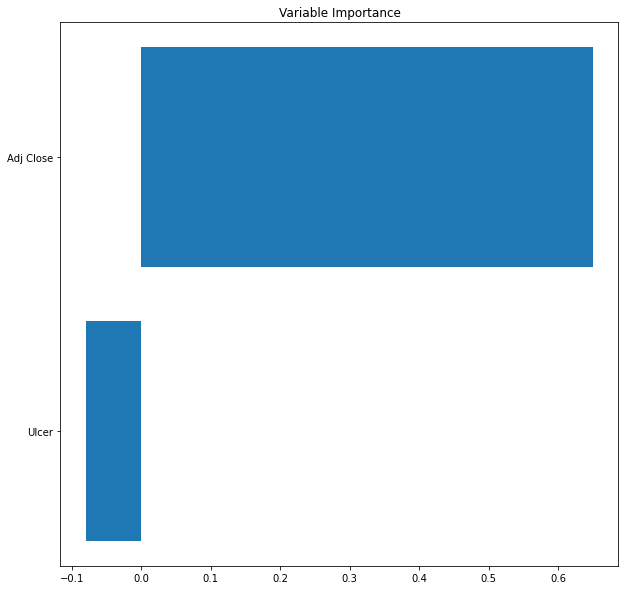

Alpha is: 0.23
R^2 Score: 0.7915294453410873
Mean Absolute Error: 0.5738180321810497
Mean Squared Error: 0.4621570955981892


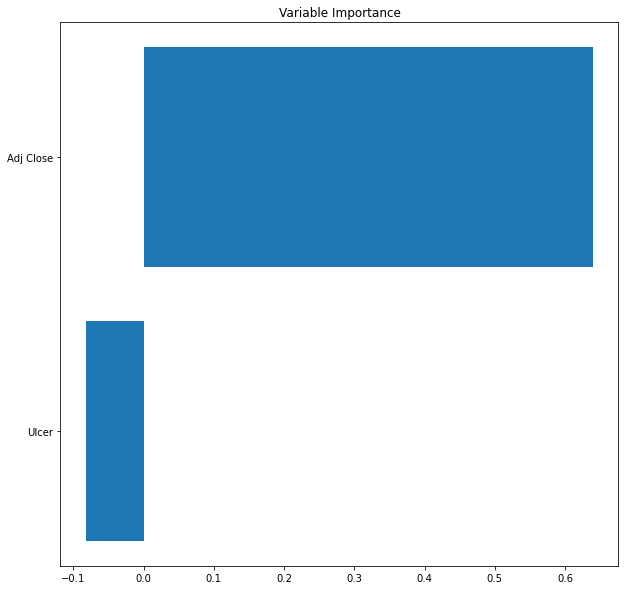

Alpha is: 0.34
R^2 Score: 0.7914112474256565
Mean Absolute Error: 0.588910151160424
Mean Squared Error: 0.48049109086729597


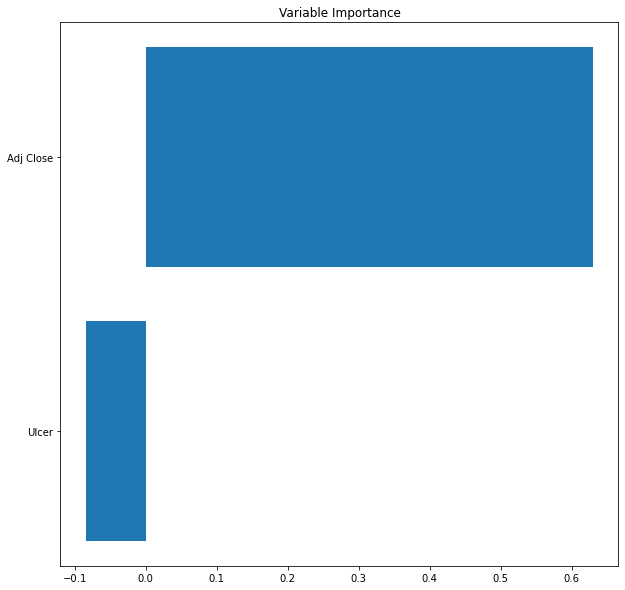

Alpha is: 0.45
R^2 Score: 0.7912552511642574
Mean Absolute Error: 0.6035195565437329
Mean Squared Error: 0.49873816020494877


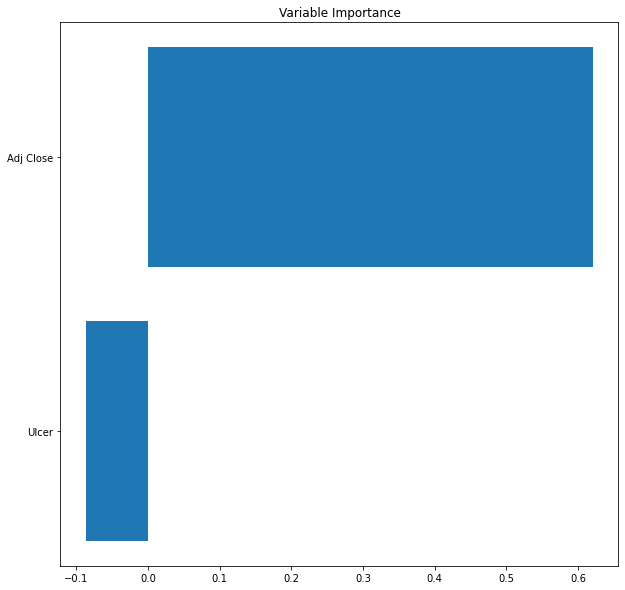

Alpha is: 0.56
R^2 Score: 0.7910652206072978
Mean Absolute Error: 0.6176693816085593
Mean Squared Error: 0.5168794966957212


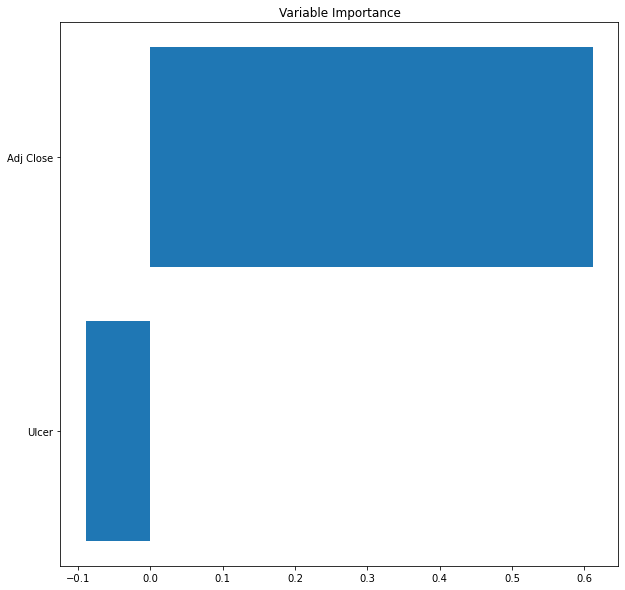

Alpha is: 0.67
R^2 Score: 0.790844561792301
Mean Absolute Error: 0.6313813043137491
Mean Squared Error: 0.5348988982977898


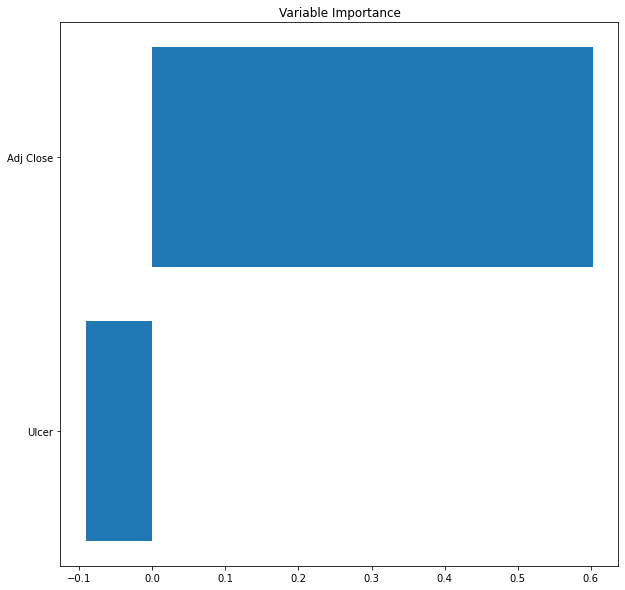

Alpha is: 0.78
R^2 Score: 0.7905963597015964
Mean Absolute Error: 0.6446756599708965
Mean Squared Error: 0.5527824578070923


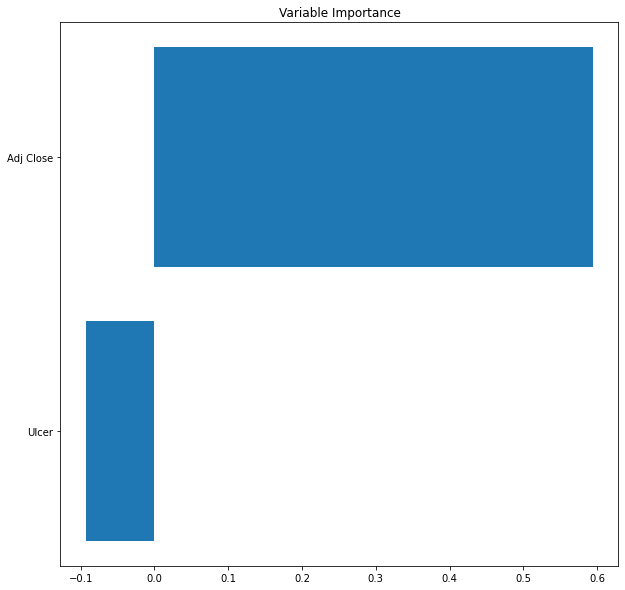

Alpha is: 0.89
R^2 Score: 0.7903234110063629
Mean Absolute Error: 0.6575715436077433
Mean Squared Error: 0.5705182909489802


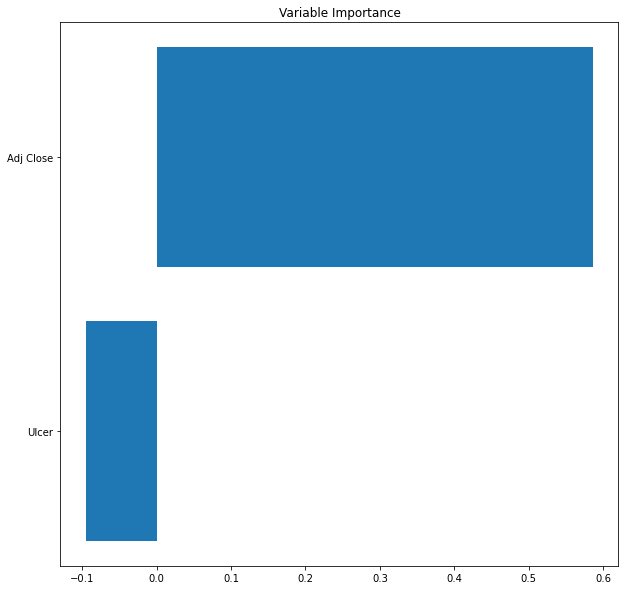

Alpha is: 1.0
R^2 Score: 0.7900282531262081
Mean Absolute Error: 0.6700869031072091
Mean Squared Error: 0.5880962975779355


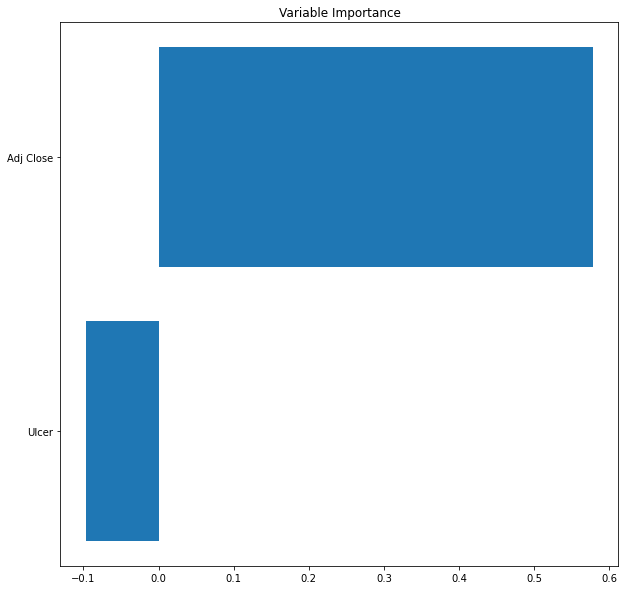

Alpha is: 0.01
R^2 Score: 0.9042274166104994
Mean Absolute Error: 0.16780104183805442
Mean Squared Error: 0.05473360289562862


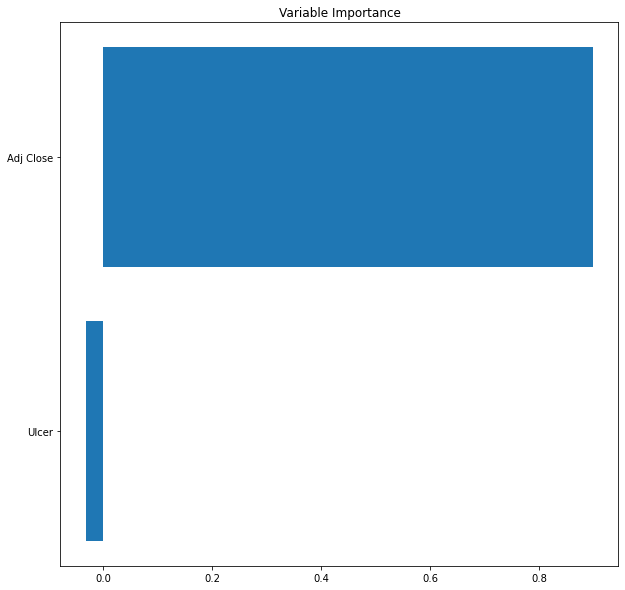

Alpha is: 0.12
R^2 Score: 0.9042240839178508
Mean Absolute Error: 0.1689352204064241
Mean Squared Error: 0.05537846911025945


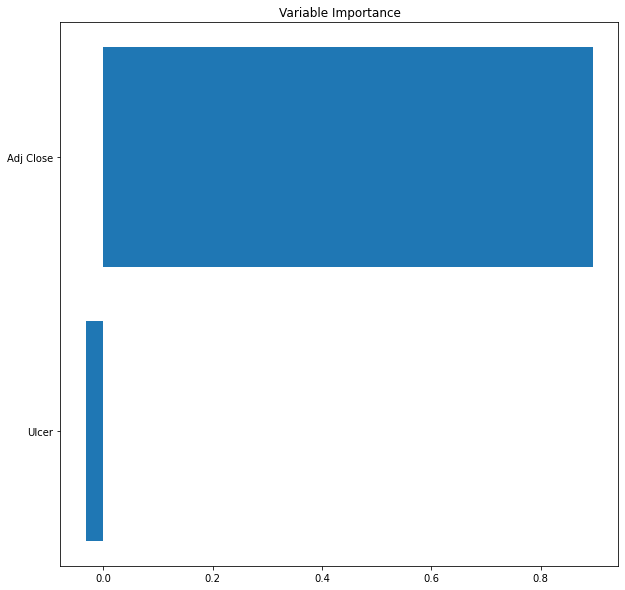

Alpha is: 0.23
R^2 Score: 0.9042151951768322
Mean Absolute Error: 0.17006129497057643
Mean Squared Error: 0.05606454758989677


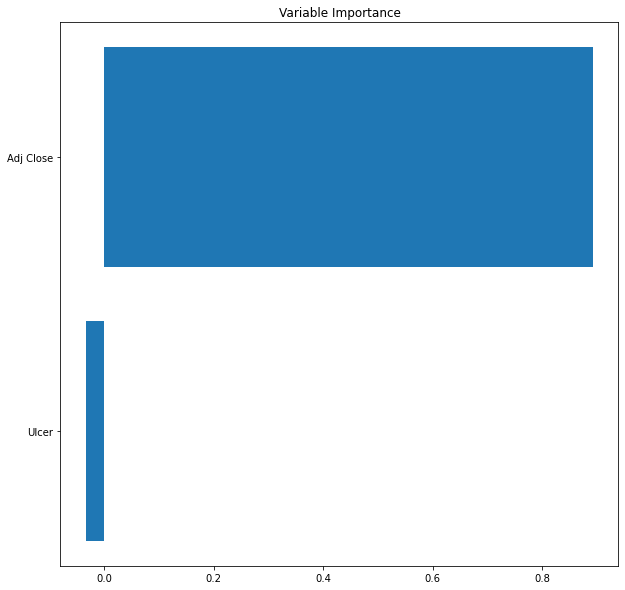

Alpha is: 0.34
R^2 Score: 0.904200864217009
Mean Absolute Error: 0.17117934954068012
Mean Squared Error: 0.05679091649710716


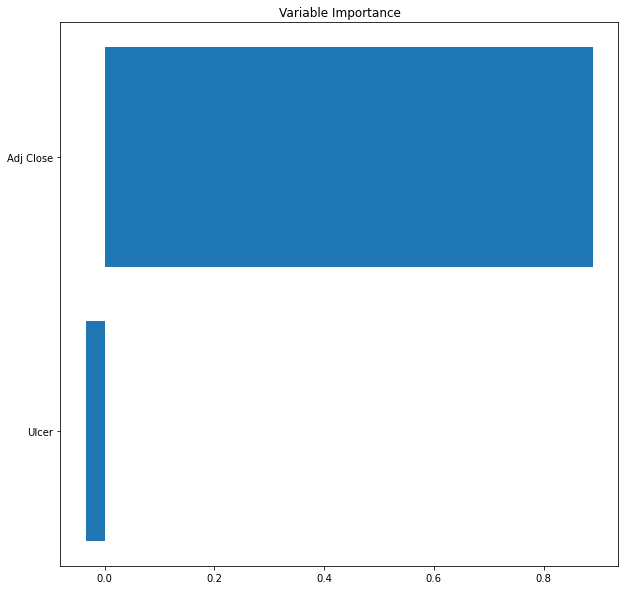

Alpha is: 0.45
R^2 Score: 0.9041812025244653
Mean Absolute Error: 0.1722894669717892
Mean Squared Error: 0.05755667348306143


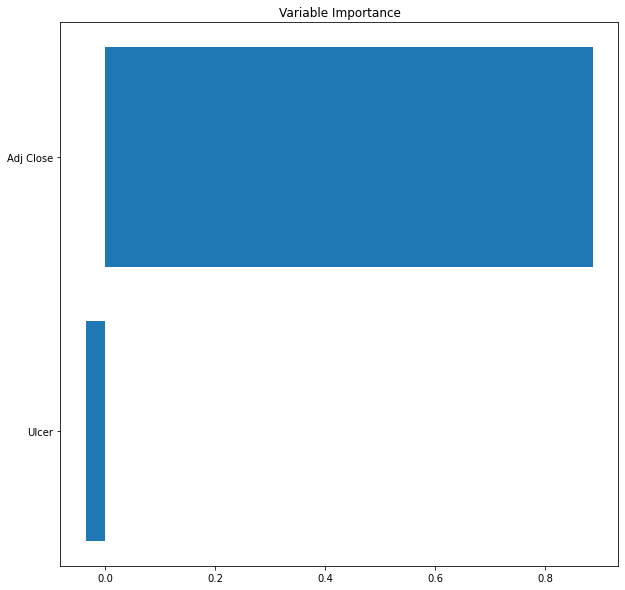

Alpha is: 0.56
R^2 Score: 0.904156319295245
Mean Absolute Error: 0.17339172898362692
Mean Squared Error: 0.05836093523741527


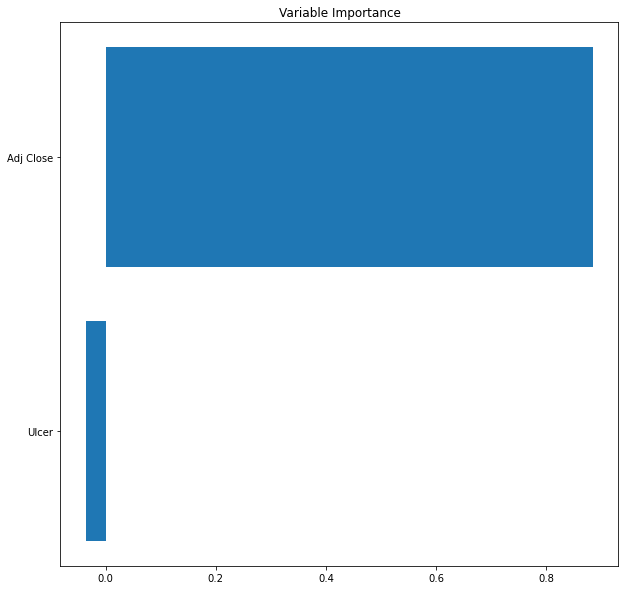

Alpha is: 0.67
R^2 Score: 0.9041263214874214
Mean Absolute Error: 0.17448621617996682
Mean Squared Error: 0.059202837049786024


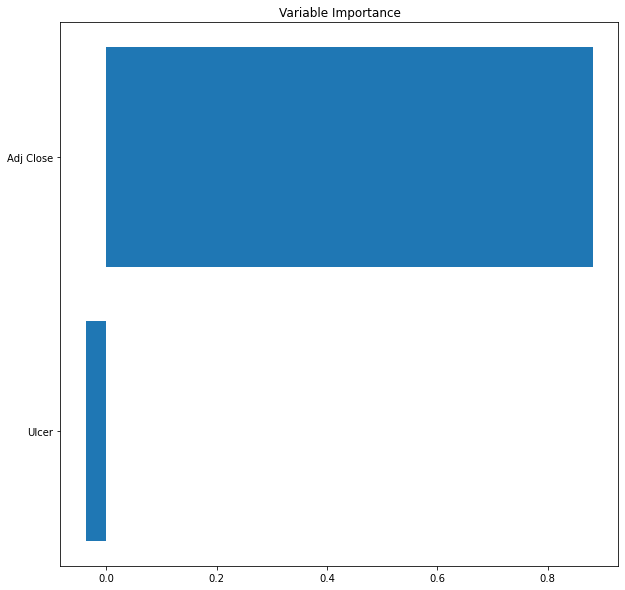

Alpha is: 0.78
R^2 Score: 0.9040913138718426
Mean Absolute Error: 0.17557300806761358
Mean Squared Error: 0.06008153238248896


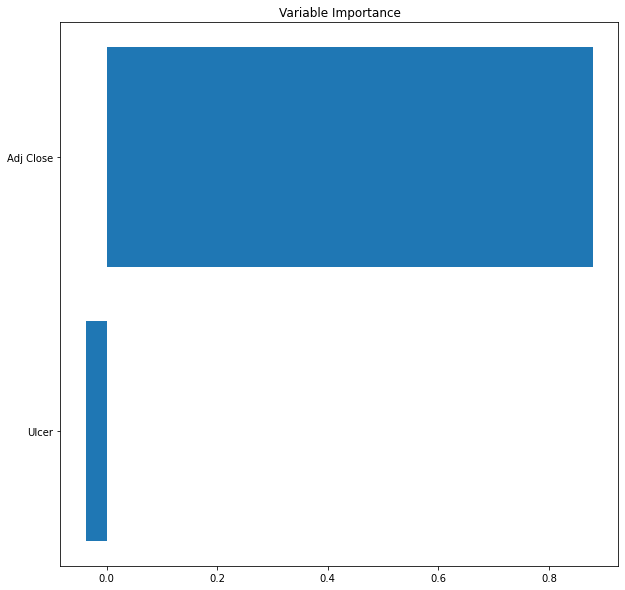

Alpha is: 0.89
R^2 Score: 0.9040513990815857
Mean Absolute Error: 0.17665218307499503
Mean Squared Error: 0.060996192454210056


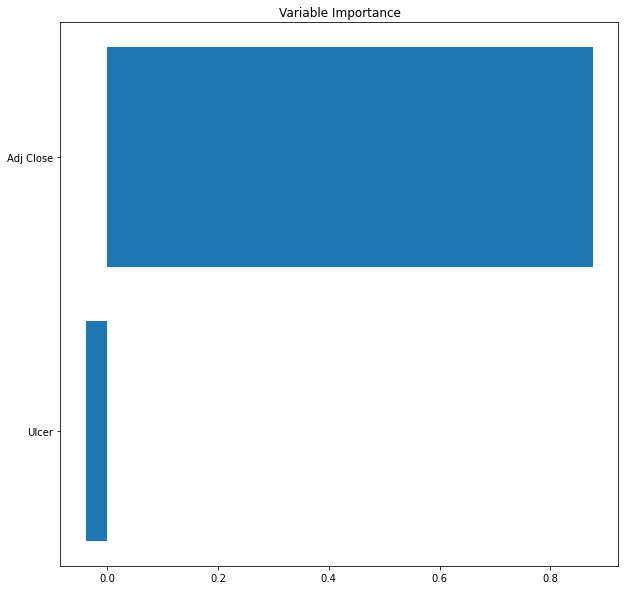

Alpha is: 1.0
R^2 Score: 0.9040066776601612
Mean Absolute Error: 0.17785663136107638
Mean Squared Error: 0.06194600583431315


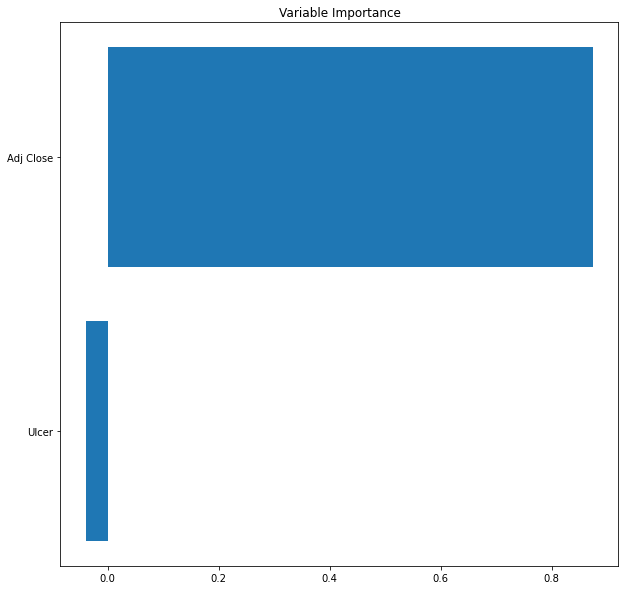

Alpha is: 0.01
R^2 Score: 0.9091302678324511
Mean Absolute Error: 0.3465843814027314
Mean Squared Error: 0.34486698062590665


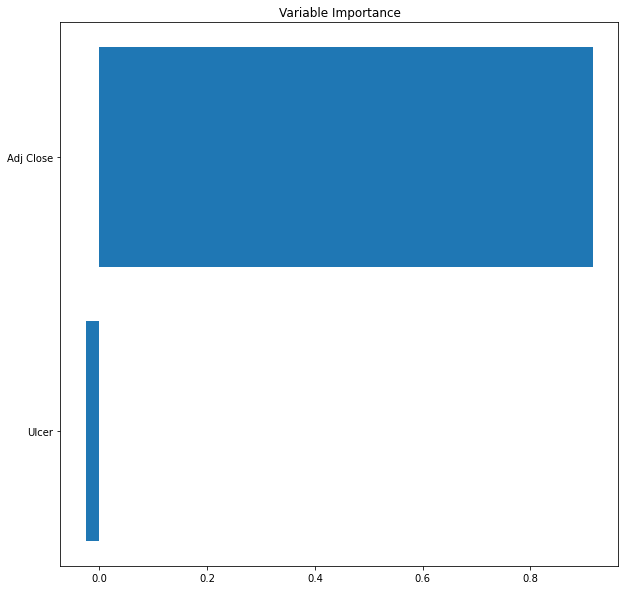

Alpha is: 0.12
R^2 Score: 0.909128776233865
Mean Absolute Error: 0.3464403878371117
Mean Squared Error: 0.3445125615369937


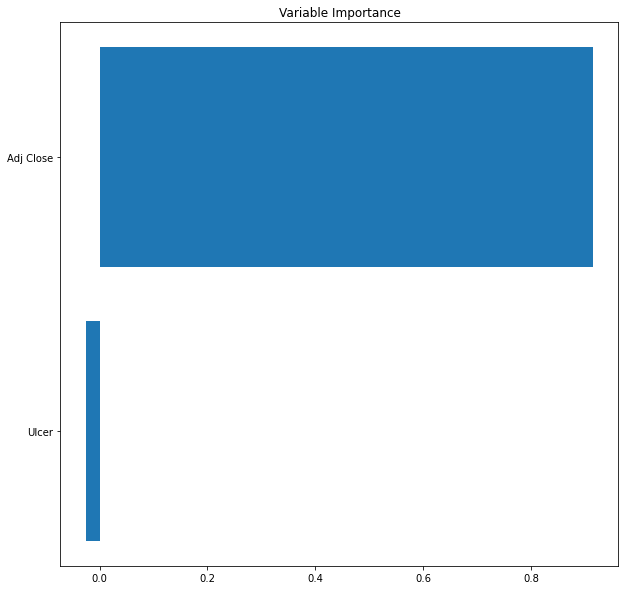

Alpha is: 0.23
R^2 Score: 0.9091247779145252
Mean Absolute Error: 0.34629663495976964
Mean Squared Error: 0.3441623903606849


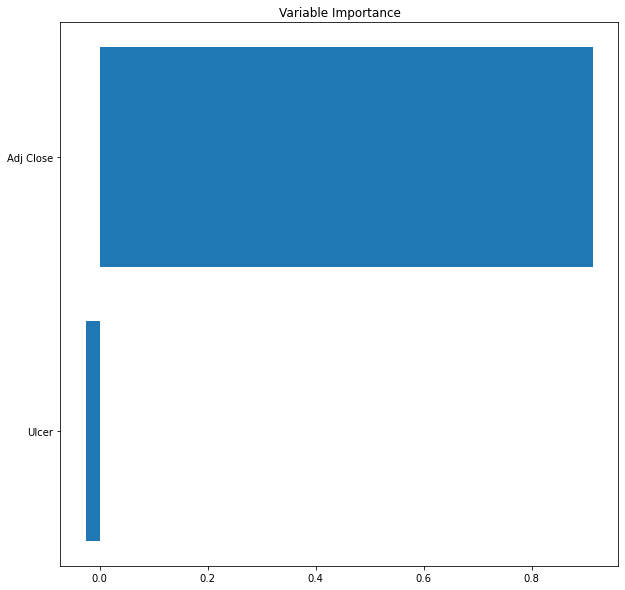

Alpha is: 0.34
R^2 Score: 0.9091182968611106
Mean Absolute Error: 0.34615312173141993
Mean Squared Error: 0.3438164294083201


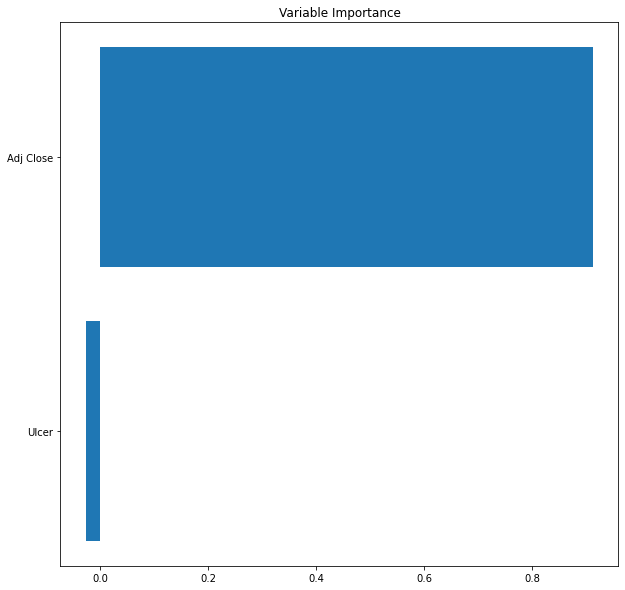

Alpha is: 0.45
R^2 Score: 0.9091093568291503
Mean Absolute Error: 0.34600984711938165
Mean Squared Error: 0.3434746413474588


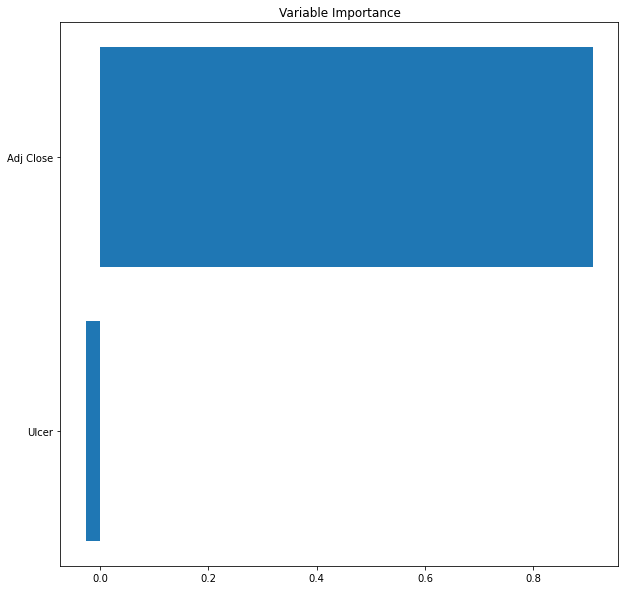

Alpha is: 0.56
R^2 Score: 0.9090979813454974
Mean Absolute Error: 0.3458668100975107
Mean Squared Error: 0.3431369891981005


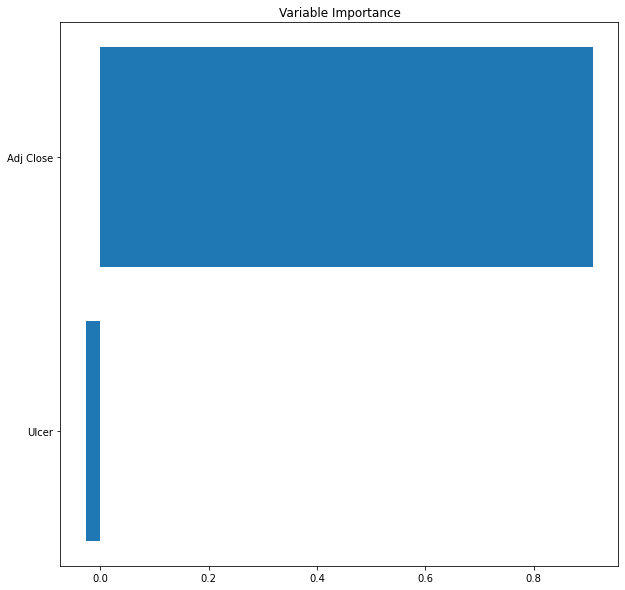

Alpha is: 0.67
R^2 Score: 0.9090841937107718
Mean Absolute Error: 0.34572400964615574
Mean Squared Error: 0.342803436328957


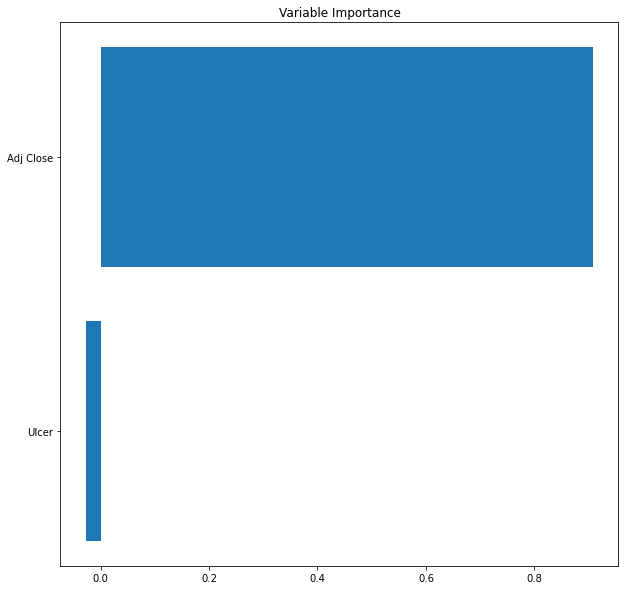

Alpha is: 0.78
R^2 Score: 0.9090680170017752
Mean Absolute Error: 0.34558144475210556
Mean Squared Error: 0.34247394645376306


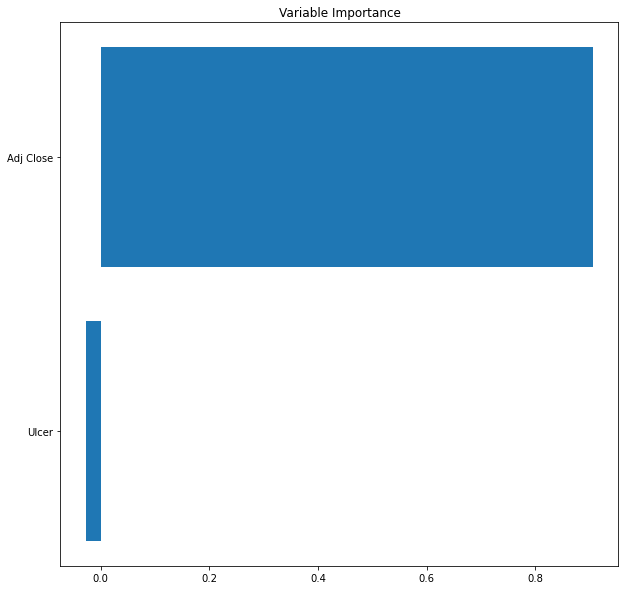

Alpha is: 0.89
R^2 Score: 0.9090494740738758
Mean Absolute Error: 0.3454391144085318
Mean Squared Error: 0.34214848362762806


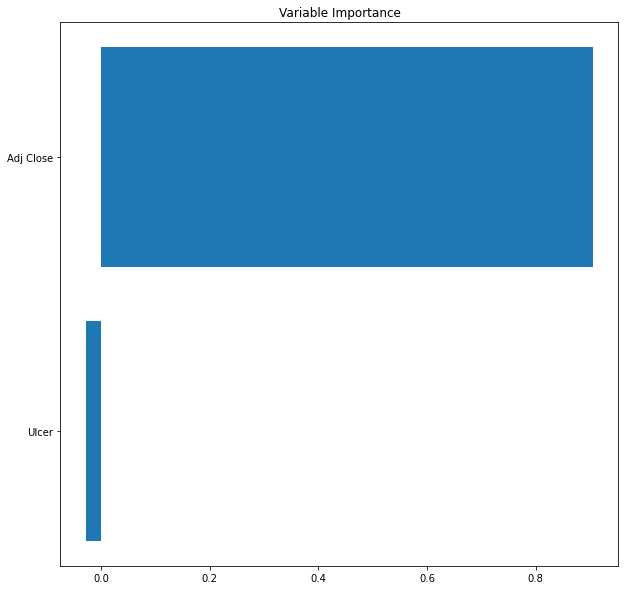

Alpha is: 1.0
R^2 Score: 0.9090285875633659
Mean Absolute Error: 0.34529701761495285
Mean Squared Error: 0.34182701224344686


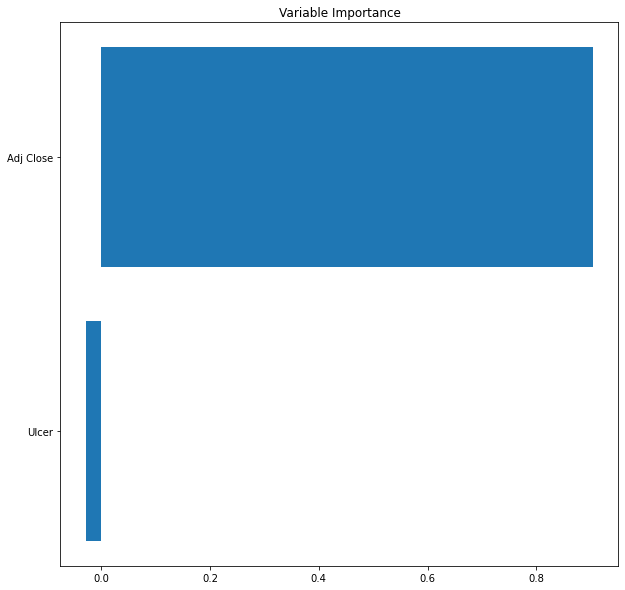

Alpha is: 0.01
R^2 Score: 0.8716267391834032
Mean Absolute Error: 0.28476697907986215
Mean Squared Error: 0.11699479693471217


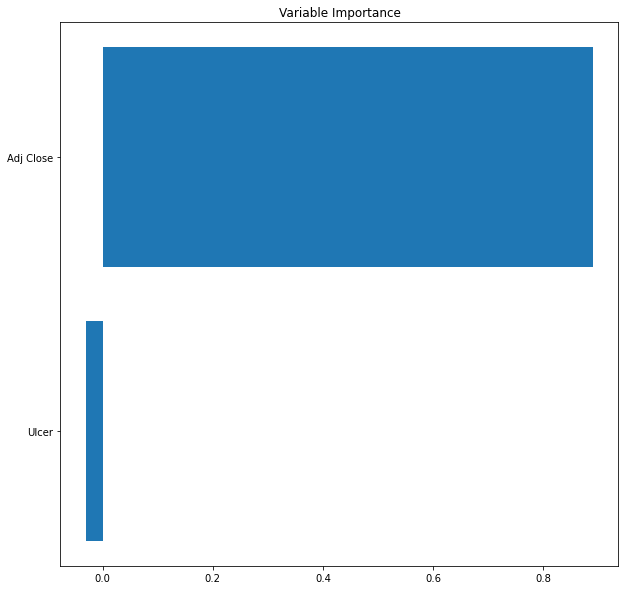

Alpha is: 0.12
R^2 Score: 0.8716256708271748
Mean Absolute Error: 0.28466338279805553
Mean Squared Error: 0.11687630693801287


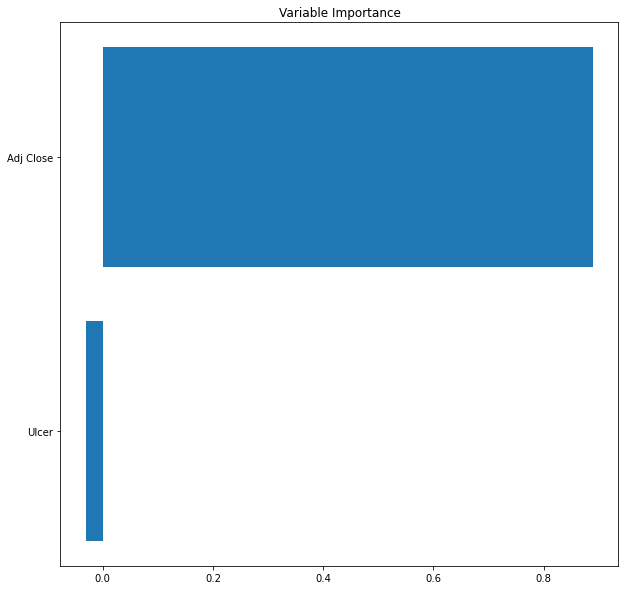

Alpha is: 0.23
R^2 Score: 0.871622805023589
Mean Absolute Error: 0.28456004982084004
Mean Squared Error: 0.11675883127989266


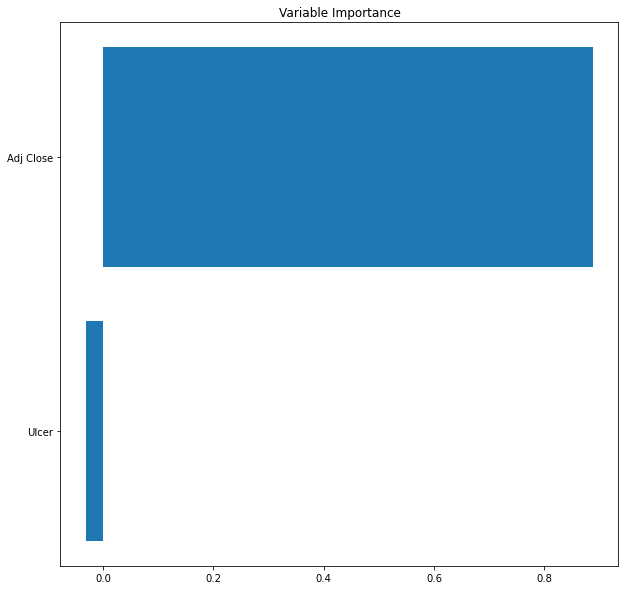

Alpha is: 0.34
R^2 Score: 0.8716181562187041
Mean Absolute Error: 0.2844569790893638
Mean Squared Error: 0.11664236308540661


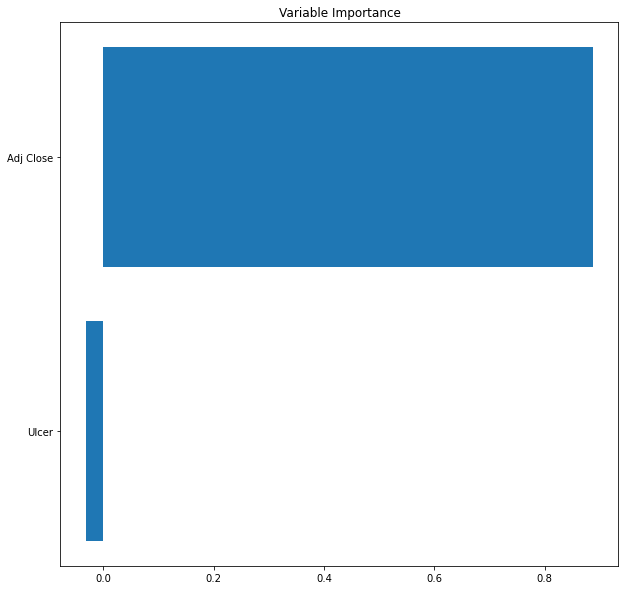

Alpha is: 0.45
R^2 Score: 0.8716117387419284
Mean Absolute Error: 0.2843541695504811
Mean Squared Error: 0.11652689553156356


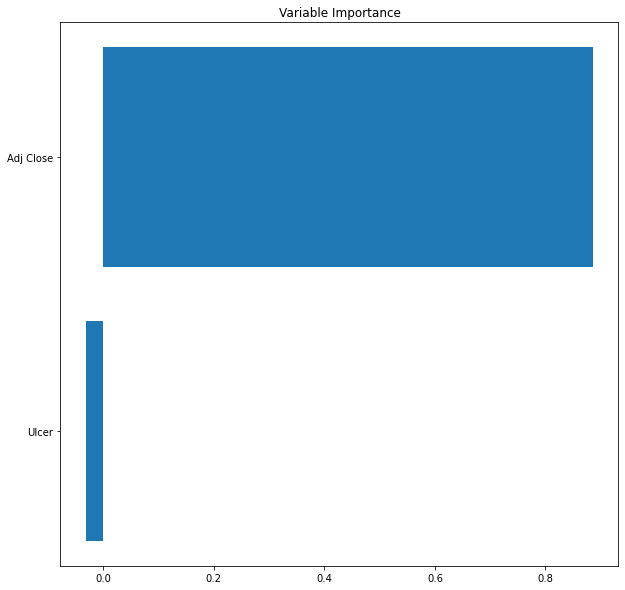

Alpha is: 0.56
R^2 Score: 0.8716035668070667
Mean Absolute Error: 0.2842516201567102
Mean Squared Error: 0.11641242184687123


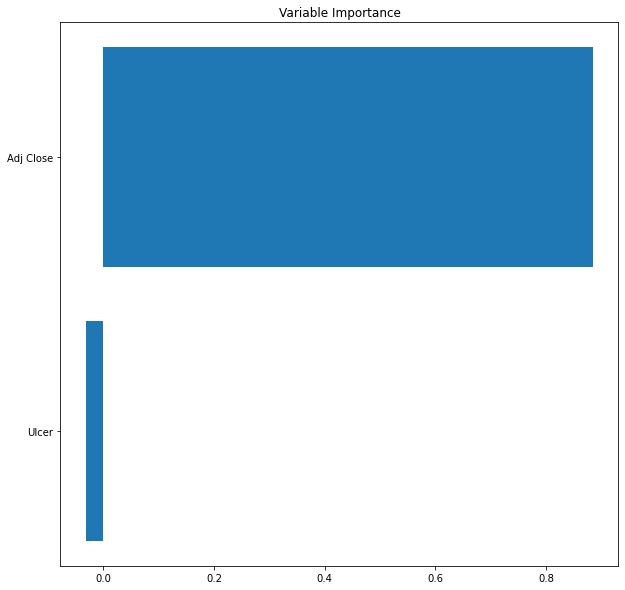

Alpha is: 0.67
R^2 Score: 0.871593654513354
Mean Absolute Error: 0.28414932986619174
Mean Squared Error: 0.11629893531089243


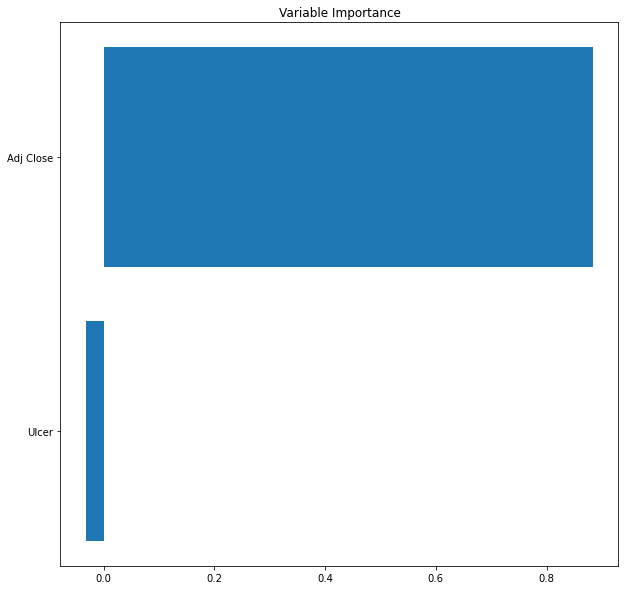

Alpha is: 0.78
R^2 Score: 0.8715820158464829
Mean Absolute Error: 0.2840472976426618
Mean Squared Error: 0.11618642925380777


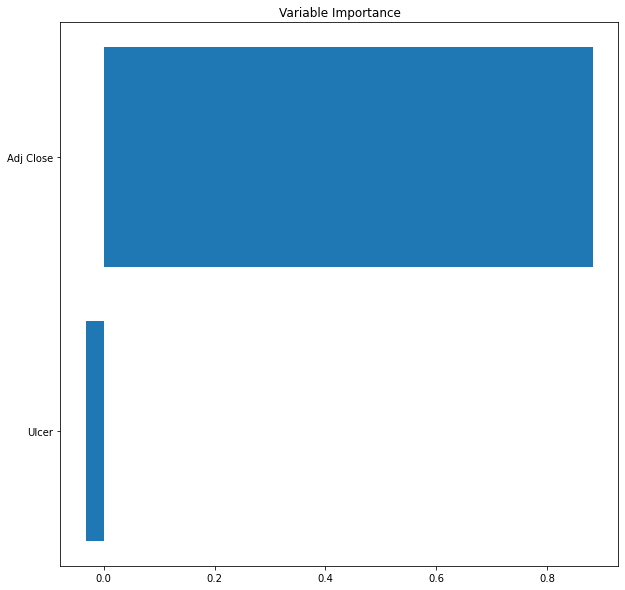

Alpha is: 0.89
R^2 Score: 0.8715686646796144
Mean Absolute Error: 0.2839455224554006
Mean Squared Error: 0.11607489705597333


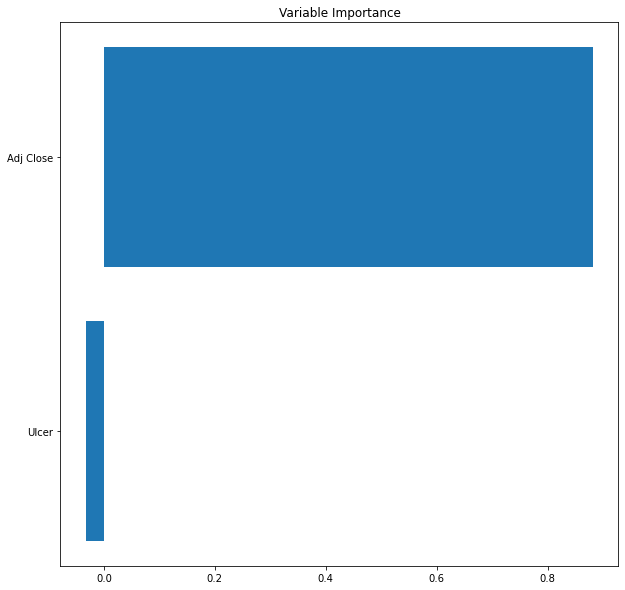

Alpha is: 1.0
R^2 Score: 0.8715536147743866
Mean Absolute Error: 0.28384400327920917
Mean Squared Error: 0.11596433214749431


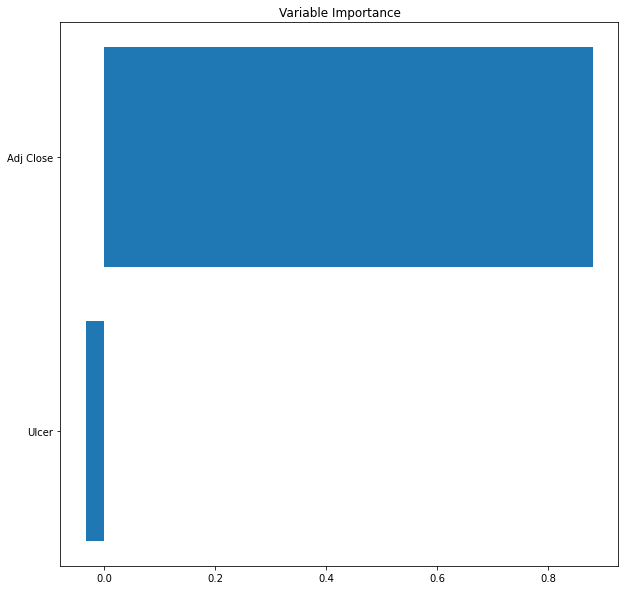

In [55]:
#Ridge Model

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    

    for alpha in np.linspace(.01, 1, 10):
        print('Alpha is:',alpha)
        ridge_model = linear_model.Ridge(alpha)
        ridge_model.fit(X_tr,y_tr)
        
        ridge_y_pred = ridge_model.predict(X_ts)
        
        r2 = ridge_model.score(X_tr,y_tr)
        mean_abs_error = mean_absolute_error(y_ts,ridge_y_pred)
        mean_sqr_error = mean_squared_error(y_ts,ridge_y_pred)
        print('R^2 Score:',r2)
        print('Mean Absolute Error:',mean_abs_error)
        print('Mean Squared Error:',mean_sqr_error)

        lm_imp = ridge_model.coef_
        sorted_idx = np.argsort(lm_imp)
        num_features = np.arange(sorted_idx.shape[0])
        plt.figure(figsize=(10,10))
        plt.barh(num_features,lm_imp[sorted_idx],align='center')
        plt.yticks(num_features, X_train_columns[sorted_idx])
        plt.title('Variable Importance')
        plt.show()

Best Parameters:{'max_depth': 3, 'n_estimators': 3}
R^2 Score: 0.7288466183618821
Mean Absolute Error: 0.6688424547963917
Mean Squared Error: 0.5996123378673527


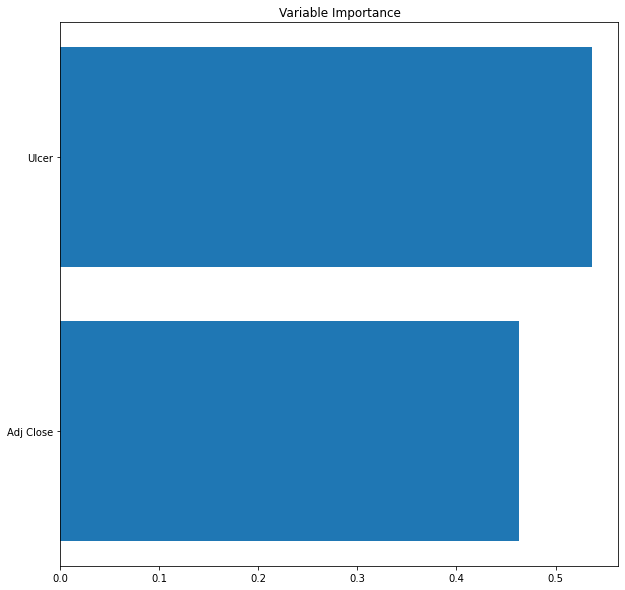

Best Parameters:{'max_depth': 4, 'n_estimators': 4}
R^2 Score: 0.9475149784969288
Mean Absolute Error: 1.2481506244702427
Mean Squared Error: 1.8332177851182283


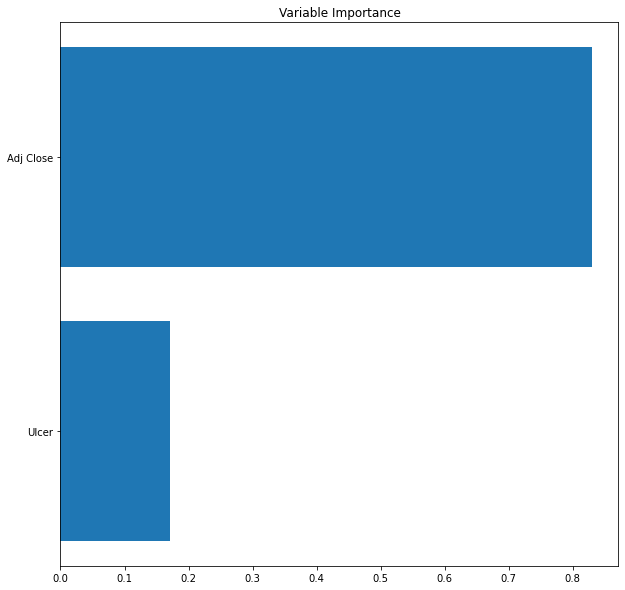

Best Parameters:{'max_depth': 3, 'n_estimators': 3}
R^2 Score: 0.945909098009176
Mean Absolute Error: 0.6740413889436162
Mean Squared Error: 0.5325167068920863


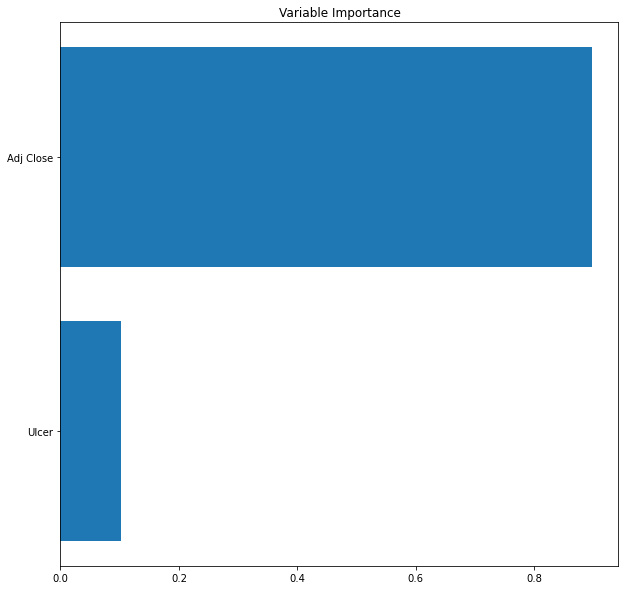

Best Parameters:{'max_depth': 3, 'n_estimators': 3}
R^2 Score: 0.9360062232248666
Mean Absolute Error: 0.4336297532208988
Mean Squared Error: 0.433109490858531


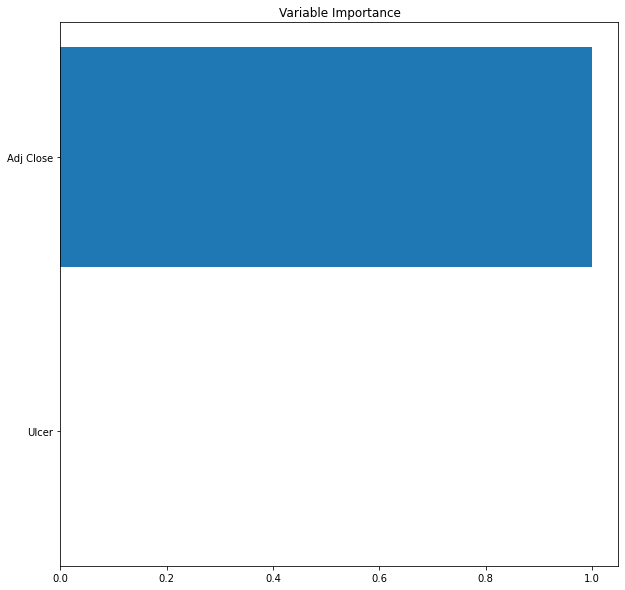

Best Parameters:{'max_depth': 3, 'n_estimators': 4}
R^2 Score: 0.9017772398410695
Mean Absolute Error: 0.3752030389701031
Mean Squared Error: 0.1747589231367638


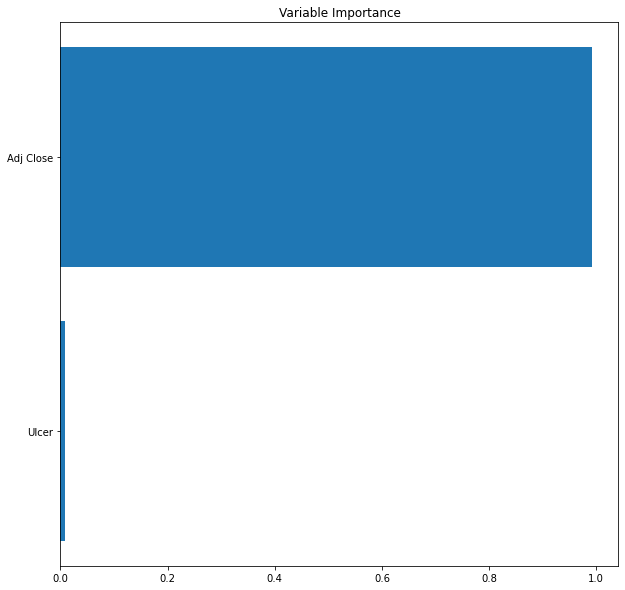

In [56]:
#Random Forest

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    random_grid = {'n_estimators':np.arange(1,5),'max_depth':np.arange(1,5)}
    rfr = RandomForestRegressor(random_state=49)
    rfr_cv = GridSearchCV(rfr,random_grid,cv=5)
    rfr_cv.fit(X_tr,y_tr)
    print('Best Parameters:' + str(rfr_cv.best_params_))
    
    rfr = RandomForestRegressor(n_estimators = rfr_cv.best_params_['n_estimators'],max_depth = rfr_cv.best_params_['max_depth'],random_state=49)
    rfr.fit(X_tr,y_tr)
    
    y_pred_rfr = rfr.predict(X_ts)
    
    r2 = rfr.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred_rfr)
    mean_sqr_error = mean_squared_error(y_ts,y_pred_rfr)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Squared Error:',mean_sqr_error)

    rfr_imp = rfr.feature_importances_
    sorted_idx = np.argsort(rfr_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,rfr_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

In [57]:
df_volume = df[['Adj Close Shift','Adj Close','OBV','ADI','CMF','EoM','FI','MFI','VPT','VWAP']]

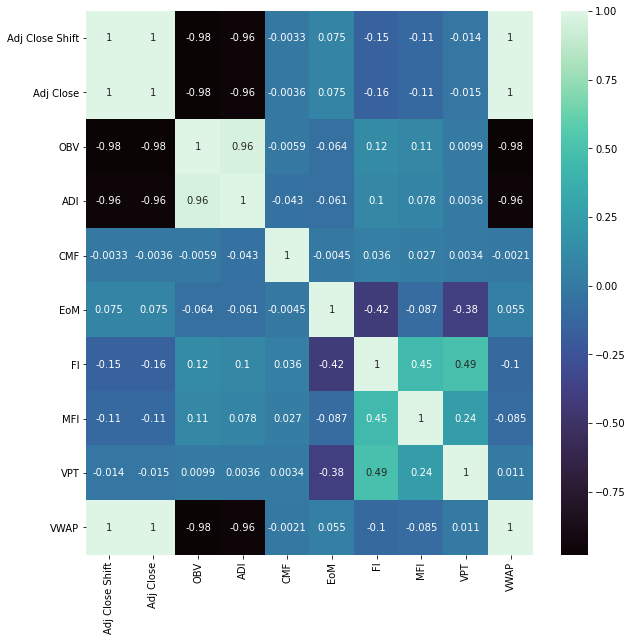

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_volume.corr(),annot=True,cmap='mako')

In [59]:
#Going to drop VWAP
df_volume.drop(columns=['VWAP'],inplace=True)

C:\Users\Jonat\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
#Separating Data
X = df_volume.drop(columns=['Adj Close Shift'])['2019-04-01':'2019-08-31']
y = df_volume['Adj Close Shift']['2019-04-01':'2019-08-31']
X_train_columns = X.columns

R^2 Score: 0.822374818085237
Mean Absolute Error: 6.069056731895532
Mean Squared Error: 43.33853680501043


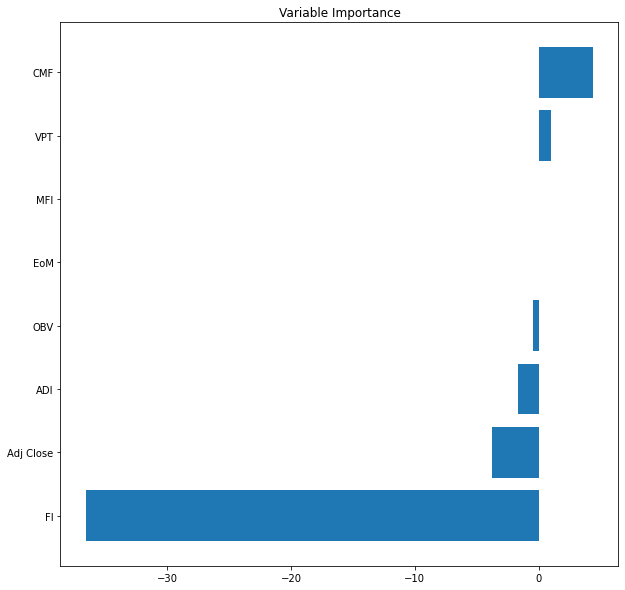

R^2 Score: 0.833117437133337
Mean Absolute Error: 1.2762002513373072
Mean Squared Error: 1.8116819645454685


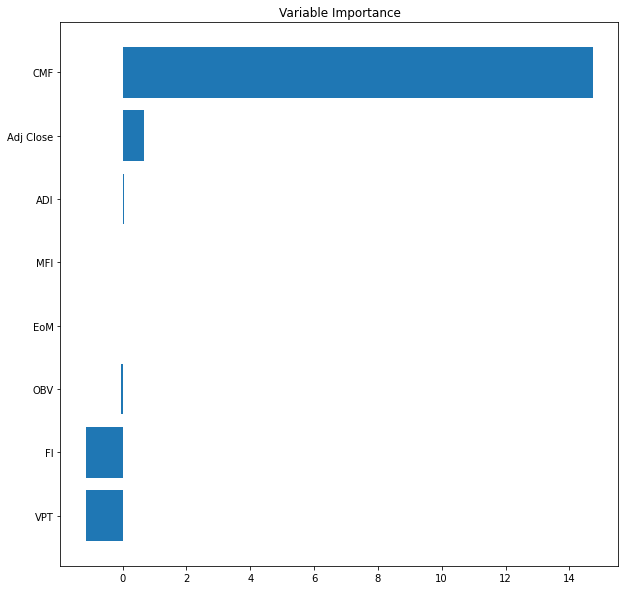

R^2 Score: 0.9195191698079116
Mean Absolute Error: 0.6466562340061607
Mean Squared Error: 0.5052253192923174


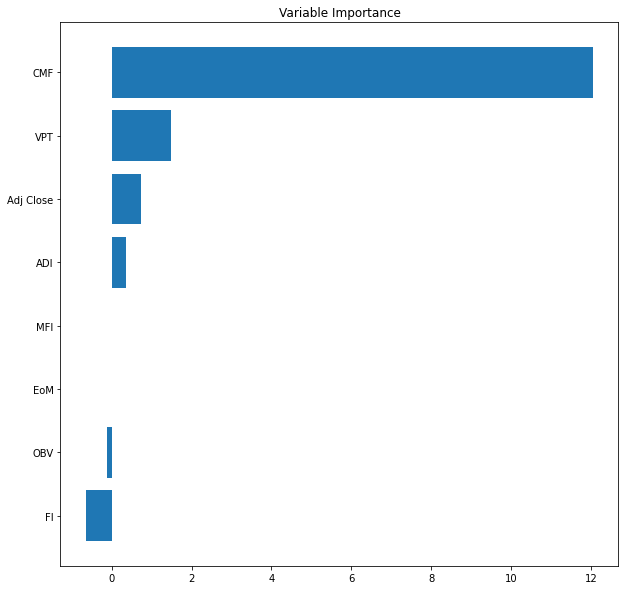

R^2 Score: 0.9176334179711423
Mean Absolute Error: 0.3596474574294704
Mean Squared Error: 0.4674180418632673


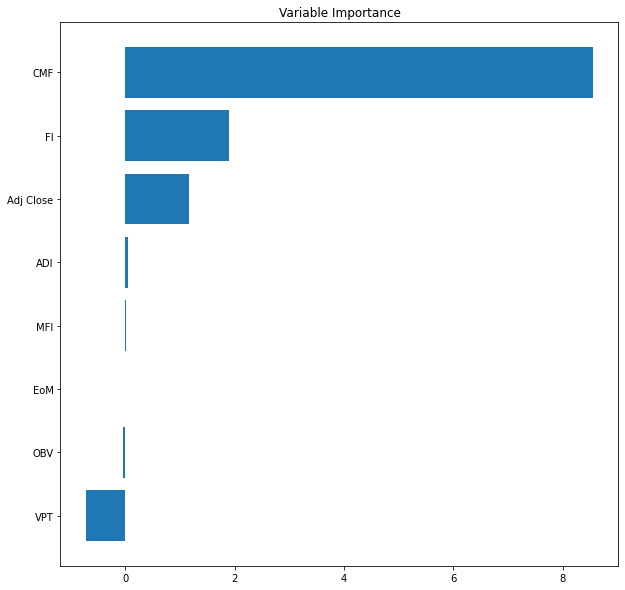

R^2 Score: 0.8716446242921329
Mean Absolute Error: 0.2788275566472766
Mean Squared Error: 0.11835220886093417


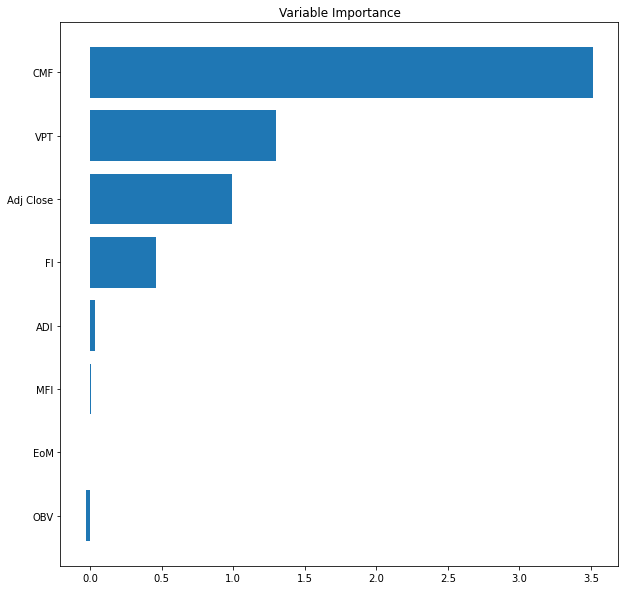

In [61]:
#OLS

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    rModel = linear_model.LinearRegression()
    rModel.fit(X_tr,y_tr)
    
    y_pred = rModel.predict(X_ts)
    
    r2 = rModel.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred)
    mean_sqr_error = mean_squared_error(y_ts,y_pred)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Squared Error:',mean_sqr_error)


    lm_imp = rModel.coef_
    sorted_idx = np.argsort(lm_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,lm_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

Alpha is: 0.01
R^2 Score: 0.6642328305940048
Mean Absolute Error: 1.548272113007758
Mean Squared Error: 2.8501894270045884


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.74685e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


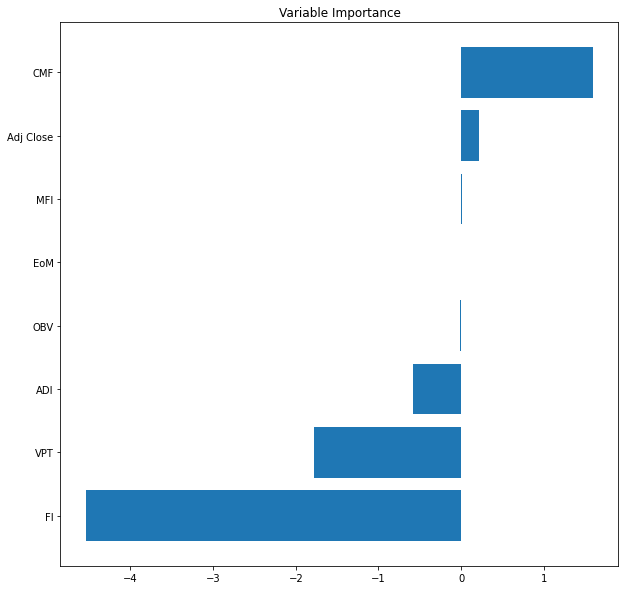

Alpha is: 0.12
R^2 Score: 0.6082987834651139
Mean Absolute Error: 0.8377362658127614
Mean Squared Error: 0.8773805679602535


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.72548e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


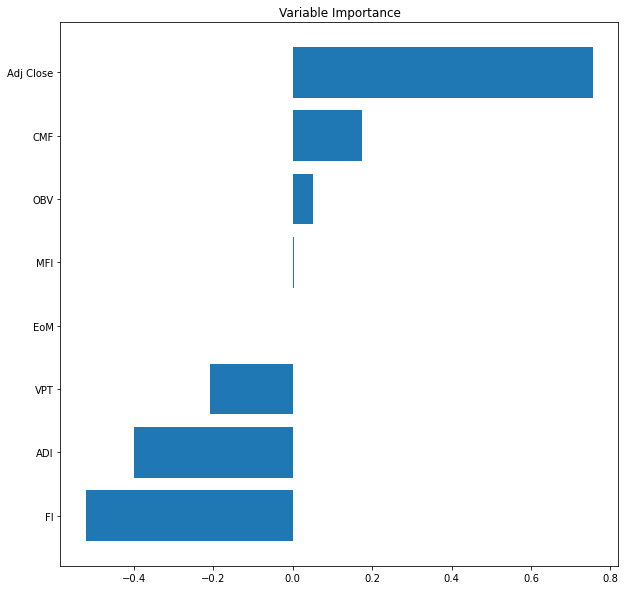

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.48408e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.23
R^2 Score: 0.6036524237528123
Mean Absolute Error: 0.8090881199069829
Mean Squared Error: 0.8169533787118768


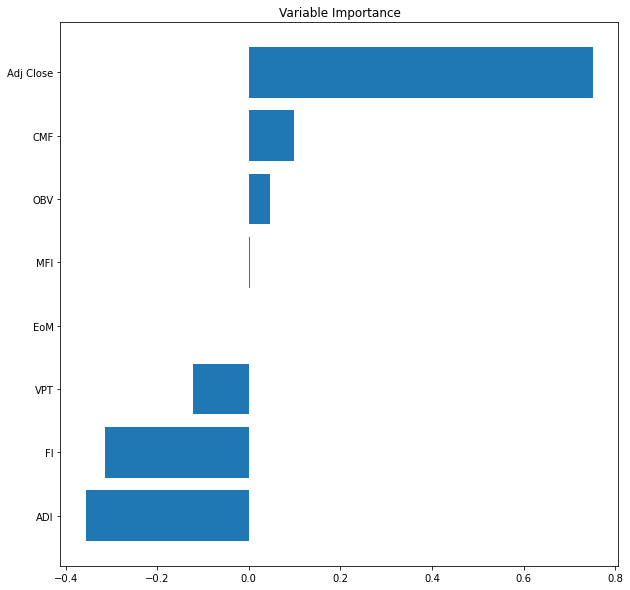

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.20158e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.34
R^2 Score: 0.6004123032576345
Mean Absolute Error: 0.805299669463758
Mean Squared Error: 0.8055439755149268


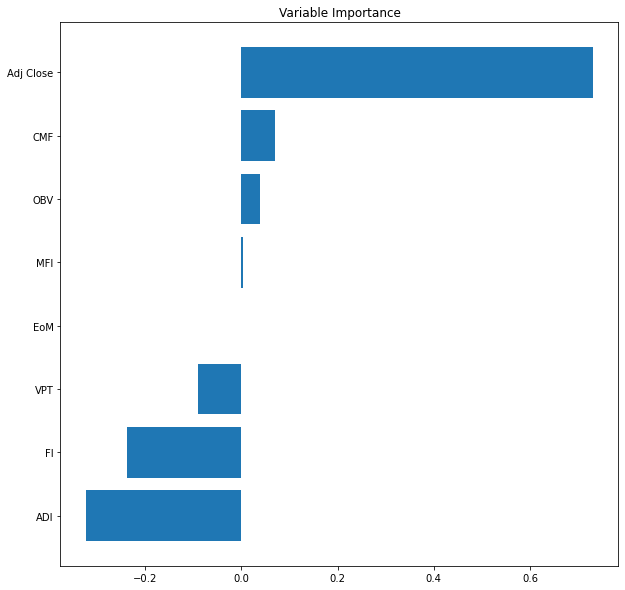

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.92456e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.45
R^2 Score: 0.5973244799832181
Mean Absolute Error: 0.8087284064782911
Mean Squared Error: 0.8085261351527222


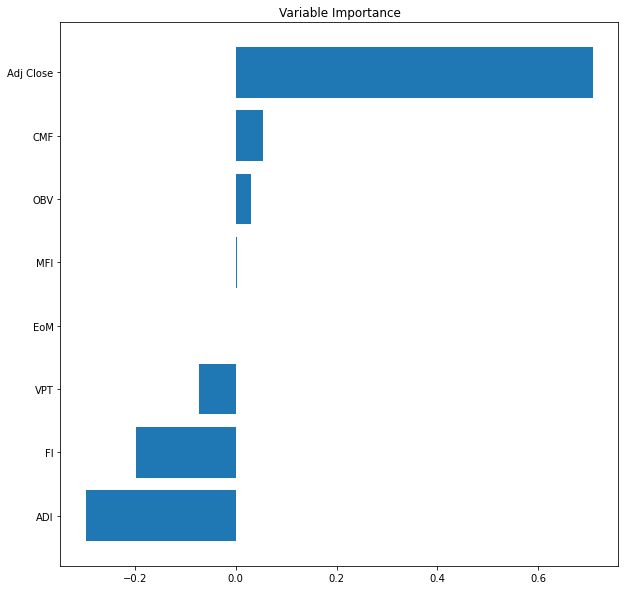

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.6526e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.56
R^2 Score: 0.5942048206069017
Mean Absolute Error: 0.8153019237316615
Mean Squared Error: 0.8181217449889708


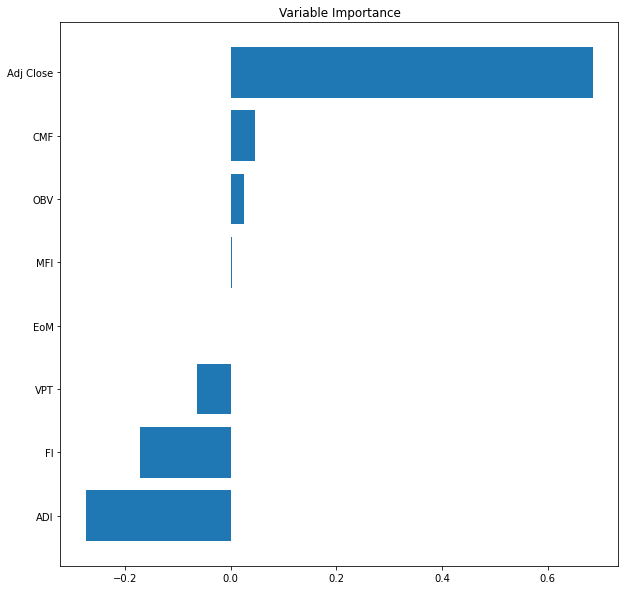

Alpha is: 0.67
R^2 Score: 0.5910358551010215
Mean Absolute Error: 0.8237321240117055
Mean Squared Error: 0.8313915303883798


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.38482e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


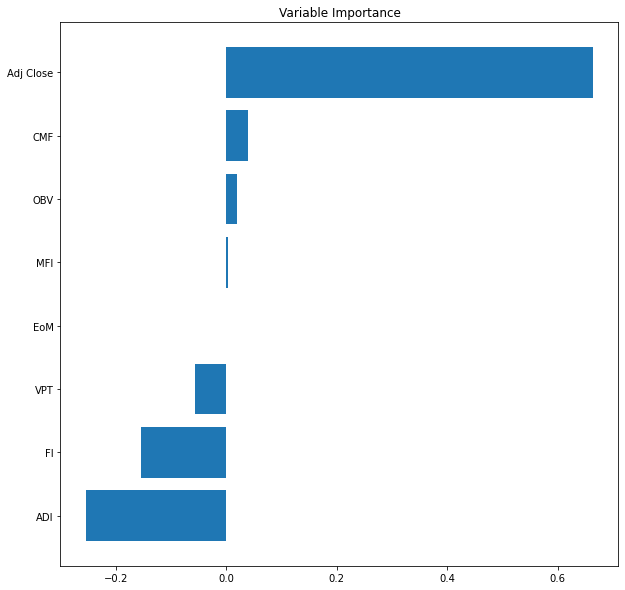

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.12123e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.78
R^2 Score: 0.5878346824708021
Mean Absolute Error: 0.8351258279904473
Mean Squared Error: 0.8468891174585551


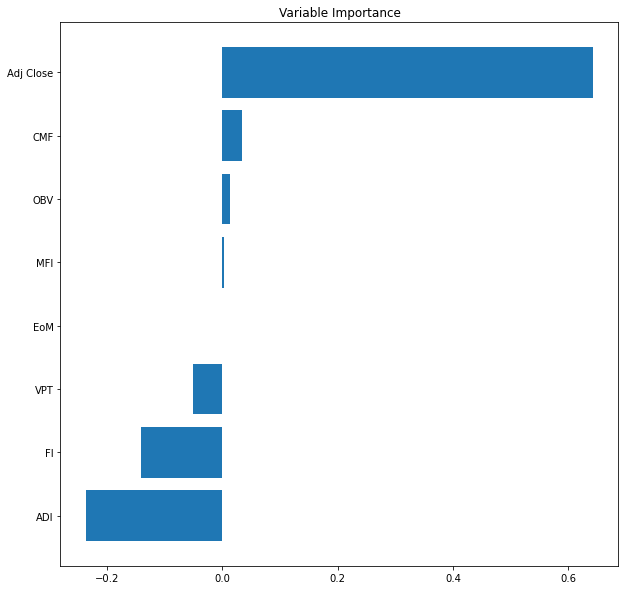

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.86168e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.89
R^2 Score: 0.5846235014352686
Mean Absolute Error: 0.8468747831169372
Mean Squared Error: 0.8637823937128155


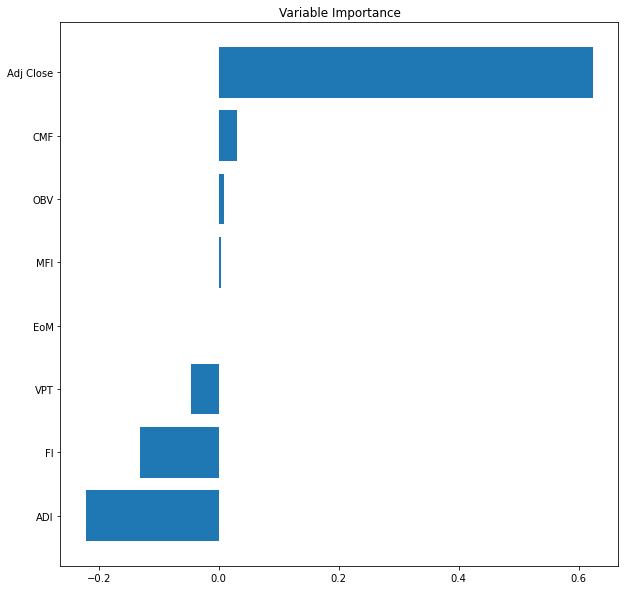

Alpha is: 1.0
R^2 Score: 0.5814222014041033
Mean Absolute Error: 0.8587268087131439
Mean Squared Error: 0.8815432995527224


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.60589e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


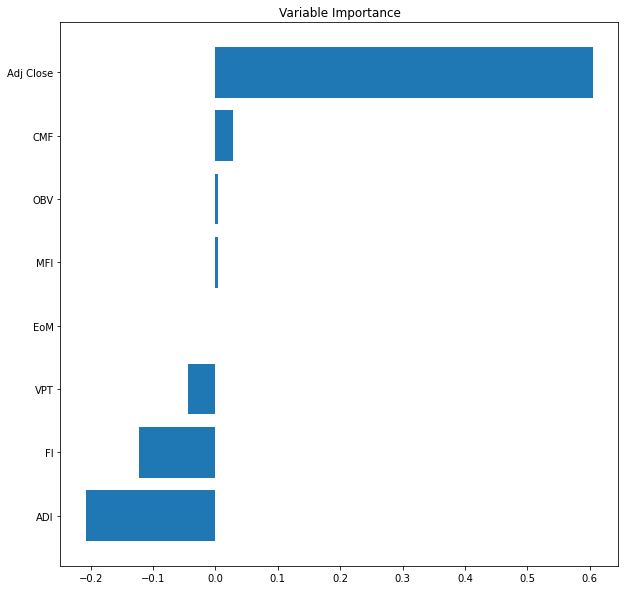

Alpha is: 0.01
R^2 Score: 0.8221162177115727
Mean Absolute Error: 0.9369073383600491
Mean Squared Error: 1.0015522120496363


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.15832e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


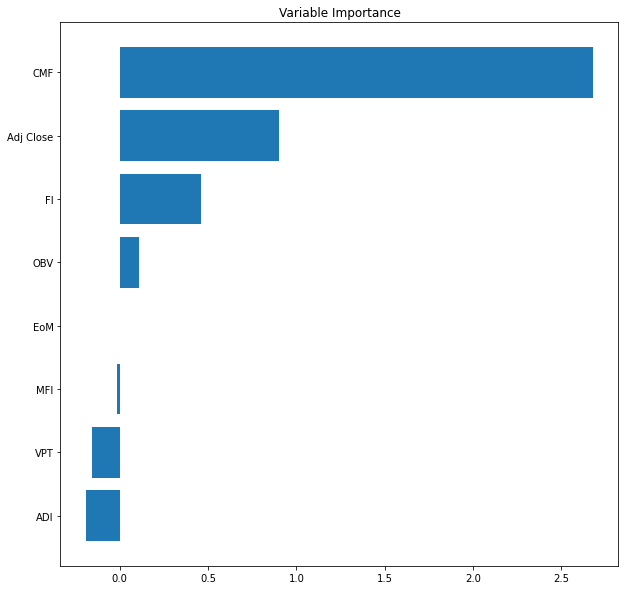

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.86174e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.12
R^2 Score: 0.8165844916535279
Mean Absolute Error: 0.9645626038190074
Mean Squared Error: 1.0560065742158171


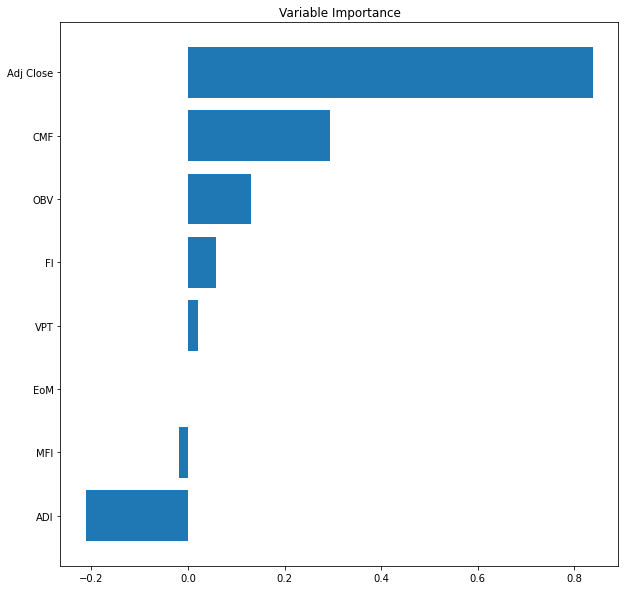

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.32281e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.23
R^2 Score: 0.815948488658828
Mean Absolute Error: 0.9588911111376064
Mean Squared Error: 1.044509325537548


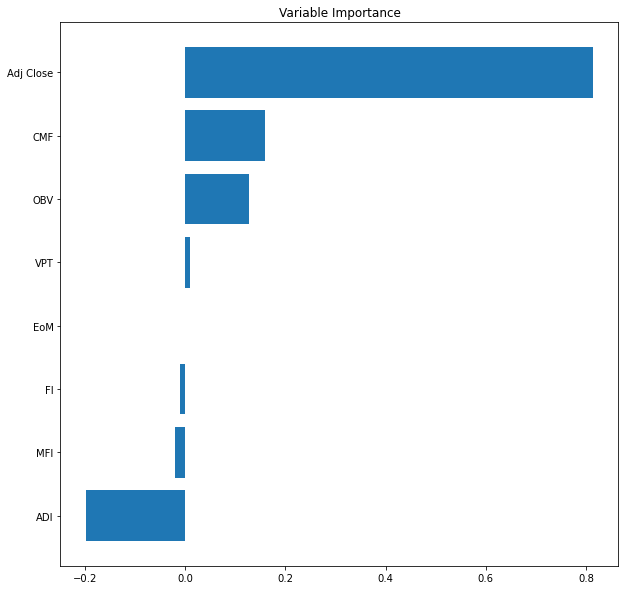

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.86947e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.34
R^2 Score: 0.8154769636026284
Mean Absolute Error: 0.9484105324226073
Mean Squared Error: 1.0240726554593749


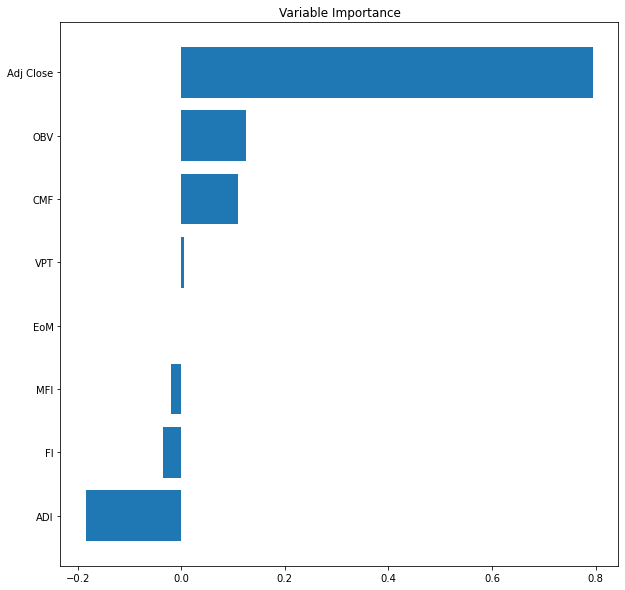

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.46807e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.45
R^2 Score: 0.8149983206874599
Mean Absolute Error: 0.9375312922016259
Mean Squared Error: 1.00332973720486


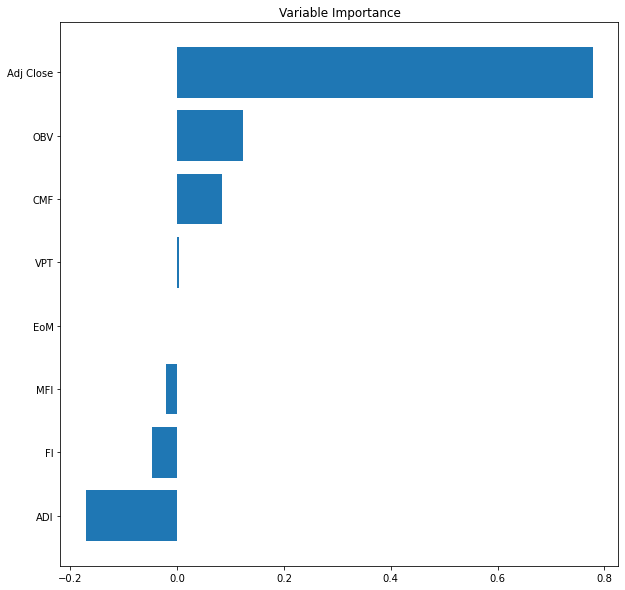

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.06947e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.56
R^2 Score: 0.8144828416758978
Mean Absolute Error: 0.9272452219456602
Mean Squared Error: 0.9841317470717453


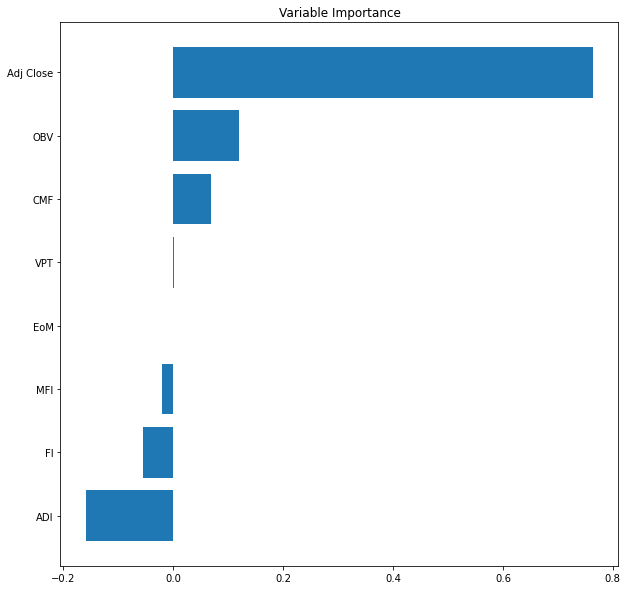

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.67349e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.67
R^2 Score: 0.8139266433692707
Mean Absolute Error: 0.9178294952023971
Mean Squared Error: 0.9669239015695771


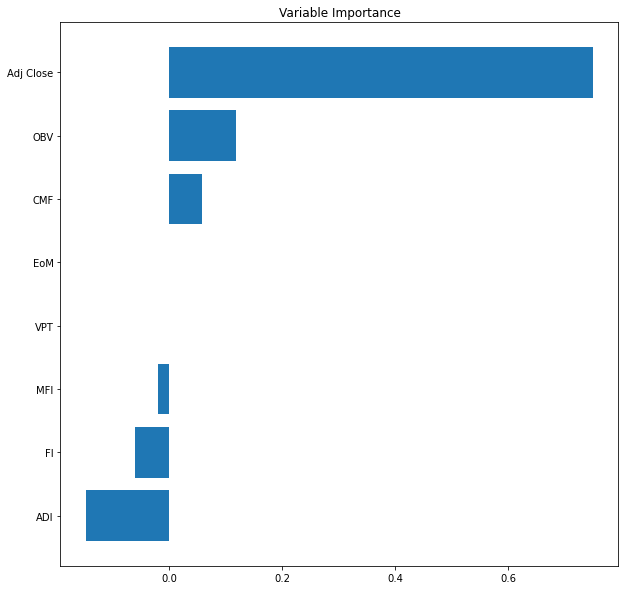

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.27993e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.78
R^2 Score: 0.8133325342898707
Mean Absolute Error: 0.9093446764713323
Mean Squared Error: 0.9517400597326686


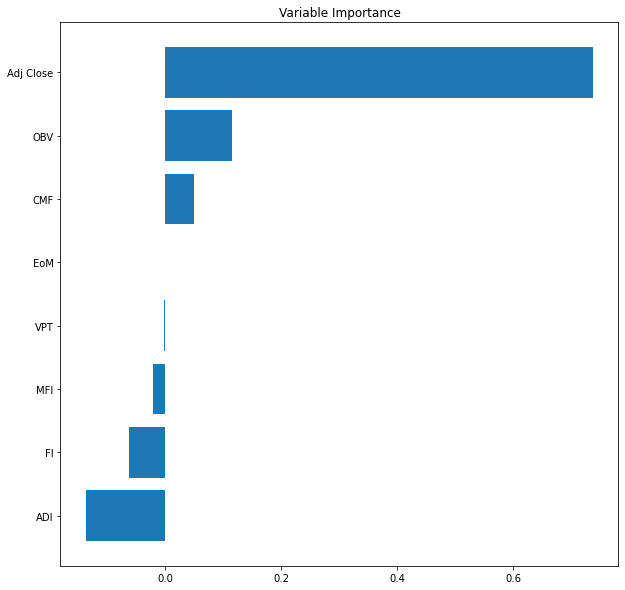

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.88372e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.89
R^2 Score: 0.8127050925617284
Mean Absolute Error: 0.9017731199515278
Mean Squared Error: 0.9384766438497715


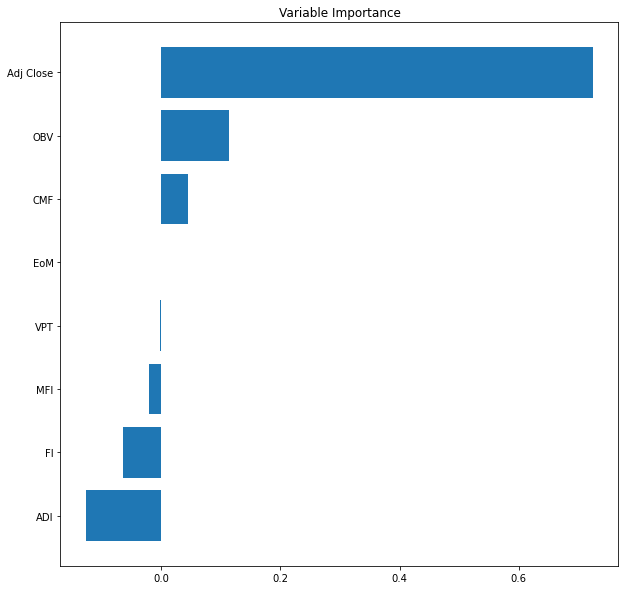

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.48479e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 1.0
R^2 Score: 0.8120491151574978
Mean Absolute Error: 0.8950672176011674
Mean Squared Error: 0.9269858332502445


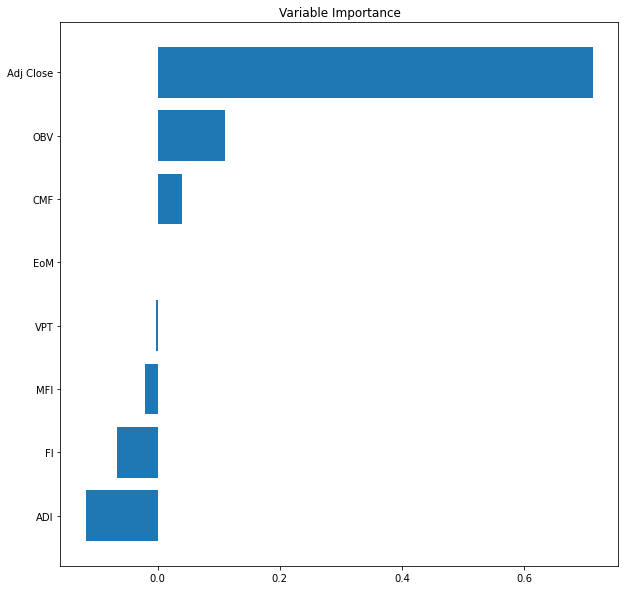

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.92116e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.01
R^2 Score: 0.915854983210009
Mean Absolute Error: 0.4141212109227895
Mean Squared Error: 0.22264451263125348


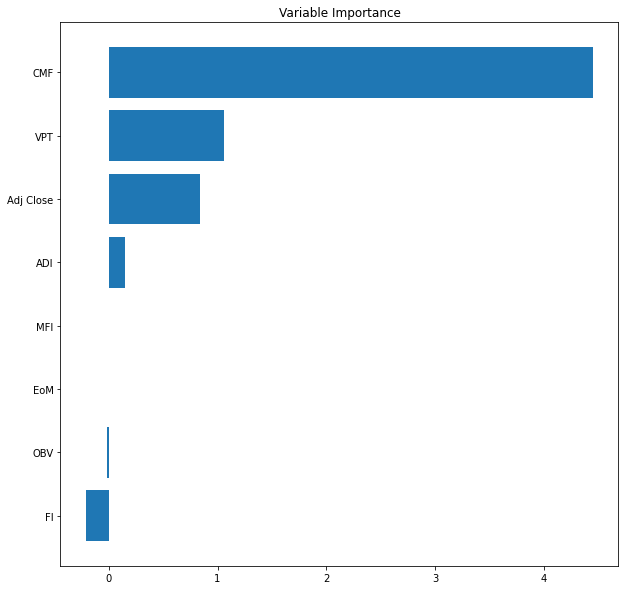

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.80756e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.12
R^2 Score: 0.9108640651678945
Mean Absolute Error: 0.34190549076221105
Mean Squared Error: 0.15334799594791035


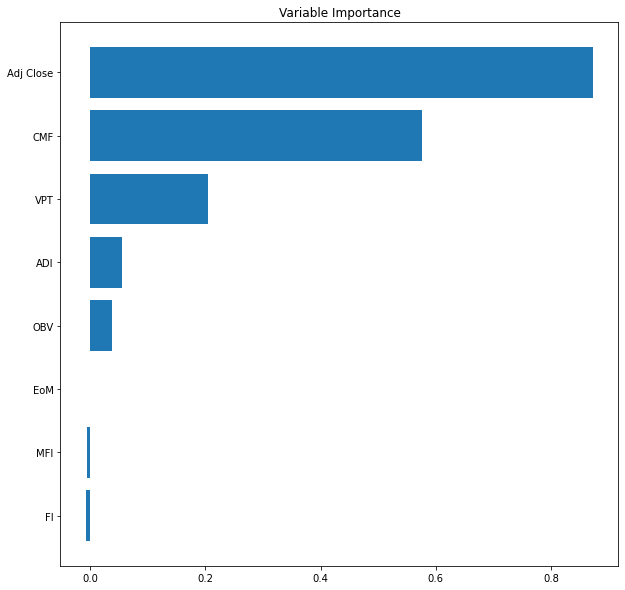

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09842e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.23
R^2 Score: 0.9103861009330054
Mean Absolute Error: 0.3474701368681829
Mean Squared Error: 0.15971796998995877


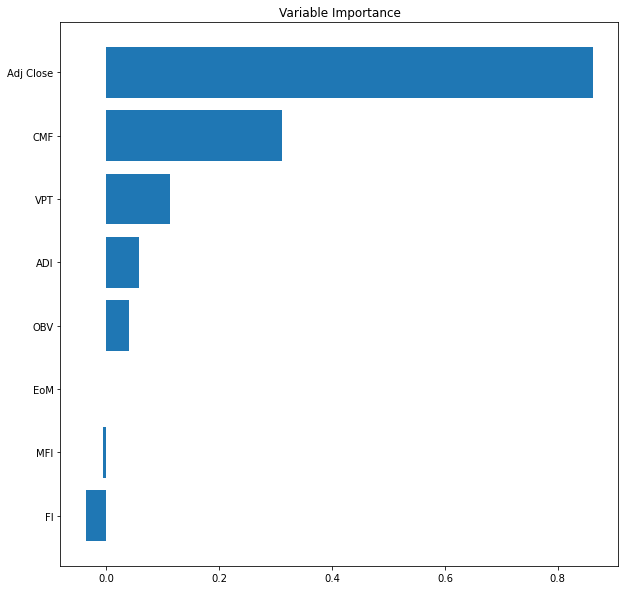

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.55864e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.34
R^2 Score: 0.9101748356307593
Mean Absolute Error: 0.3540215439502996
Mean Squared Error: 0.16745630526945843


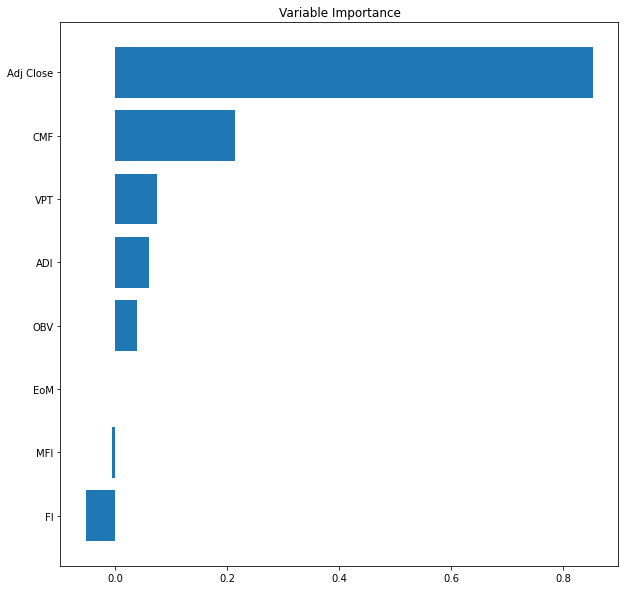

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.02363e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.45
R^2 Score: 0.9100328950310173
Mean Absolute Error: 0.3605558945428102
Mean Squared Error: 0.17547497313189564


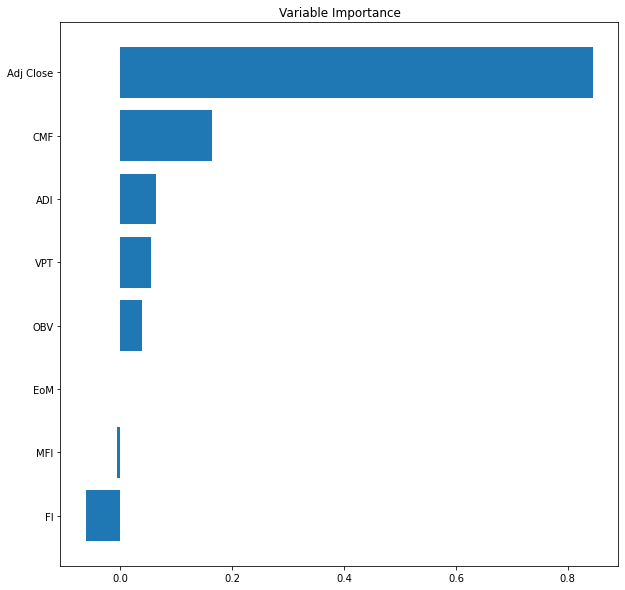

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.48951e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.56
R^2 Score: 0.9099145042808525
Mean Absolute Error: 0.3683358526745565
Mean Squared Error: 0.1836133345294718


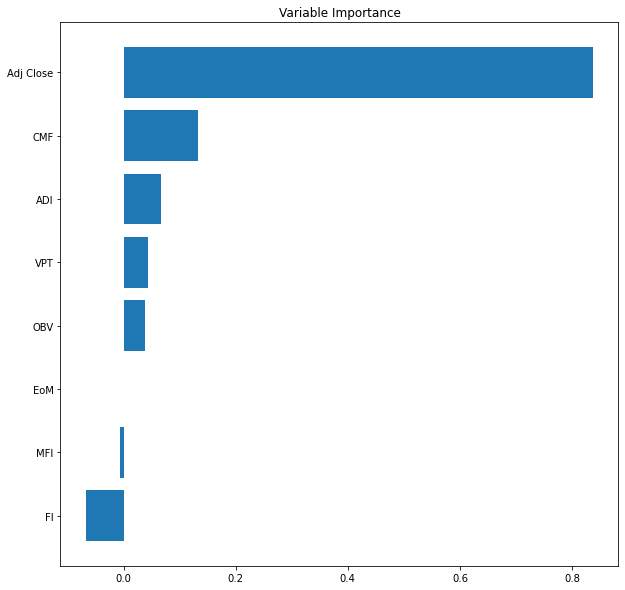

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.95655e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.67
R^2 Score: 0.9098036820516736
Mean Absolute Error: 0.3760921198198903
Mean Squared Error: 0.19182511419264012


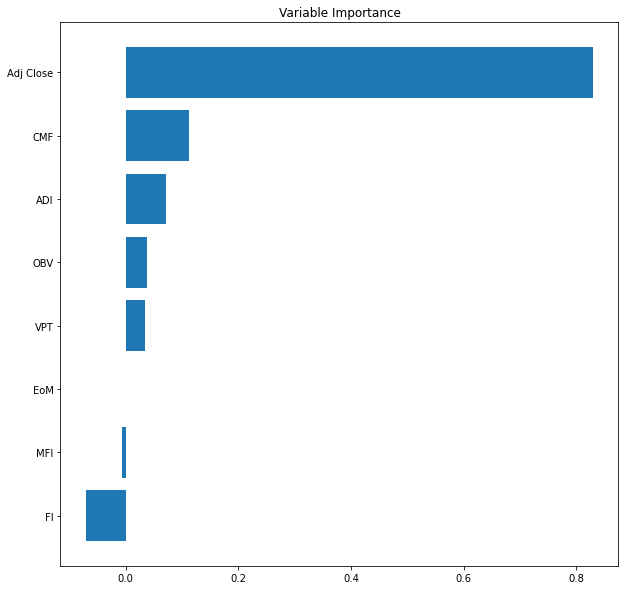

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.42352e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.78
R^2 Score: 0.9096936413581336
Mean Absolute Error: 0.3836584574820051
Mean Squared Error: 0.2000884759042784


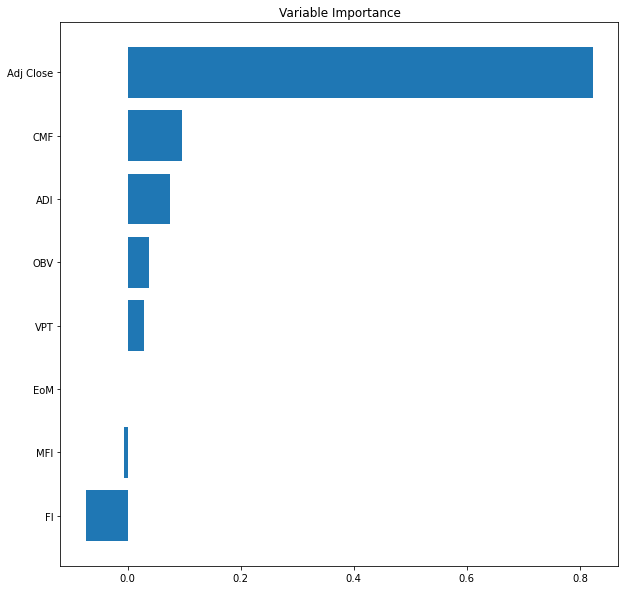

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.89133e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.89
R^2 Score: 0.909581192196395
Mean Absolute Error: 0.39103705474734424
Mean Squared Error: 0.2083888238274077


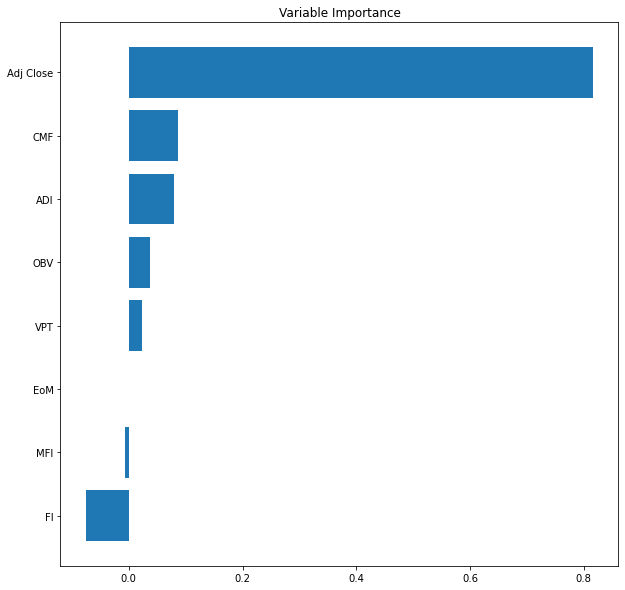

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.36047e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 1.0
R^2 Score: 0.9094647762117712
Mean Absolute Error: 0.39823287643909777
Mean Squared Error: 0.21671441813359565


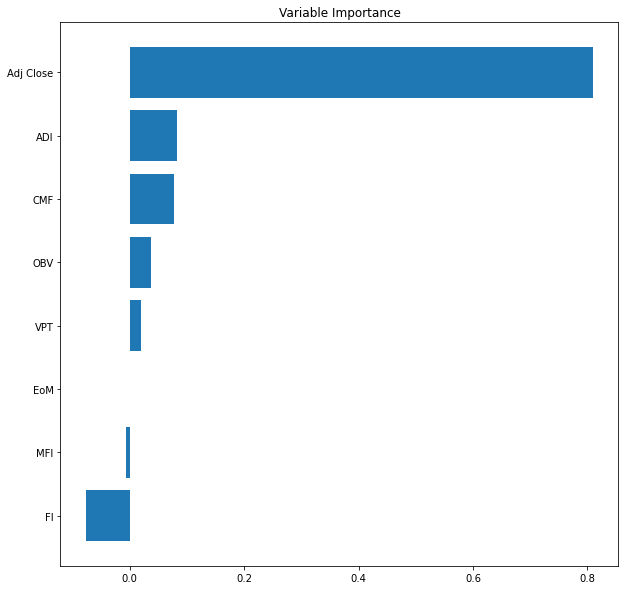

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.48953e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.01
R^2 Score: 0.9159173845764756
Mean Absolute Error: 0.33548401889984636
Mean Squared Error: 0.41702652255603323


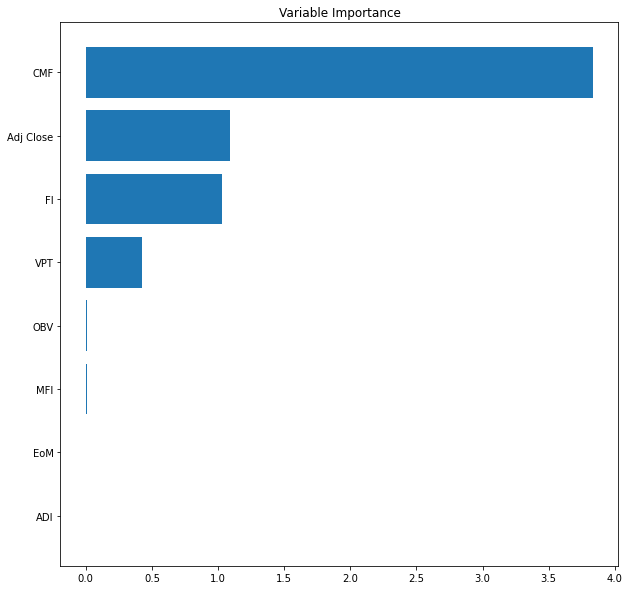

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.2795e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.12
R^2 Score: 0.9123013041123129
Mean Absolute Error: 0.3277944763248596
Mean Squared Error: 0.39627248805000176


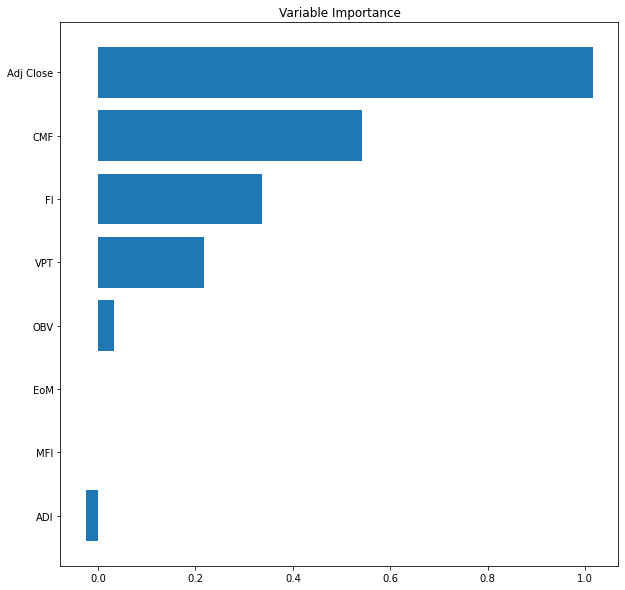

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01075e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.23
R^2 Score: 0.9117709180681823
Mean Absolute Error: 0.3239235491020608
Mean Squared Error: 0.3978246264681649


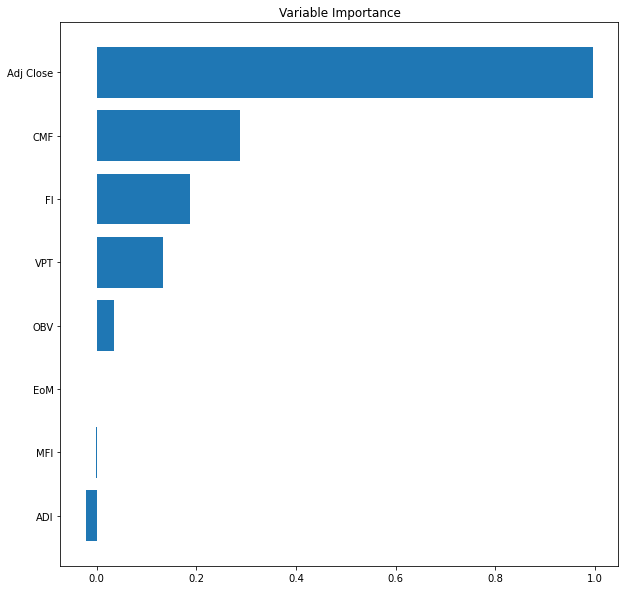

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.48731e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.34
R^2 Score: 0.9115194628782661
Mean Absolute Error: 0.32400583311189946
Mean Squared Error: 0.40007697923155766


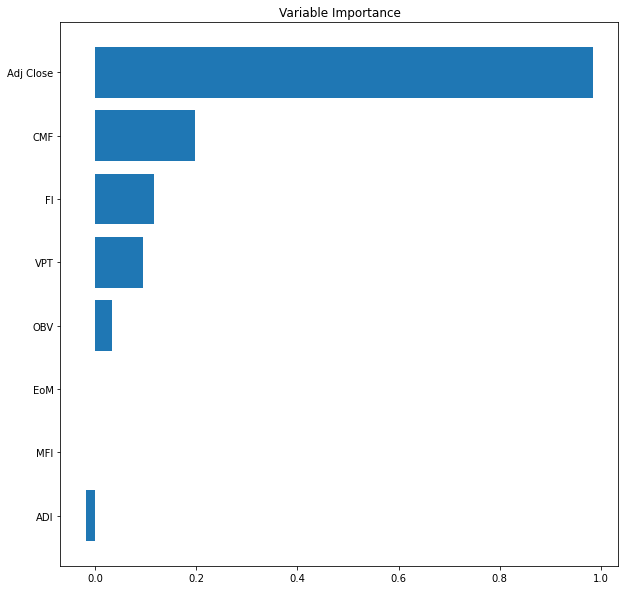

Alpha is: 0.45
R^2 Score: 0.9113576262695576
Mean Absolute Error: 0.32583677586079923
Mean Squared Error: 0.40244100523590953


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.96445e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


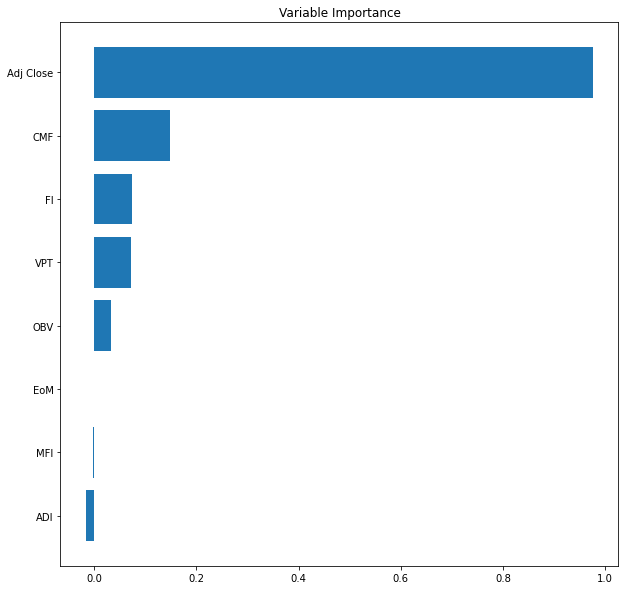

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.44187e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.56
R^2 Score: 0.9112340162561686
Mean Absolute Error: 0.32805113865844254
Mean Squared Error: 0.404884785431243


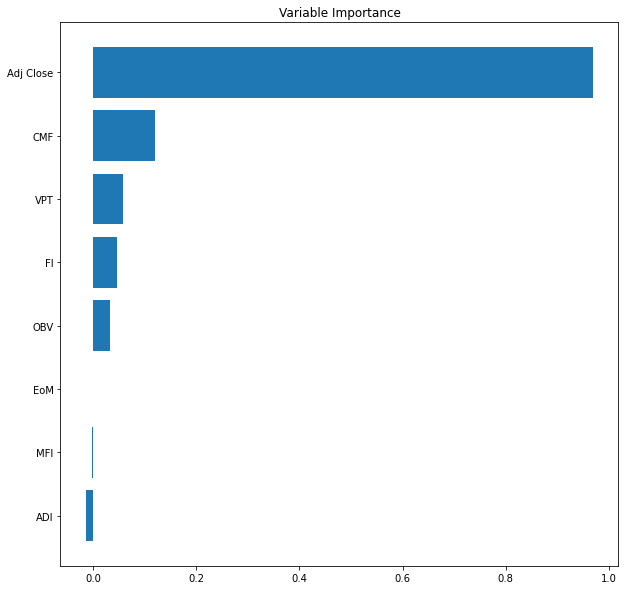

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.86487e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.67
R^2 Score: 0.911128420894984
Mean Absolute Error: 0.33114910725471997
Mean Squared Error: 0.40742708705361147


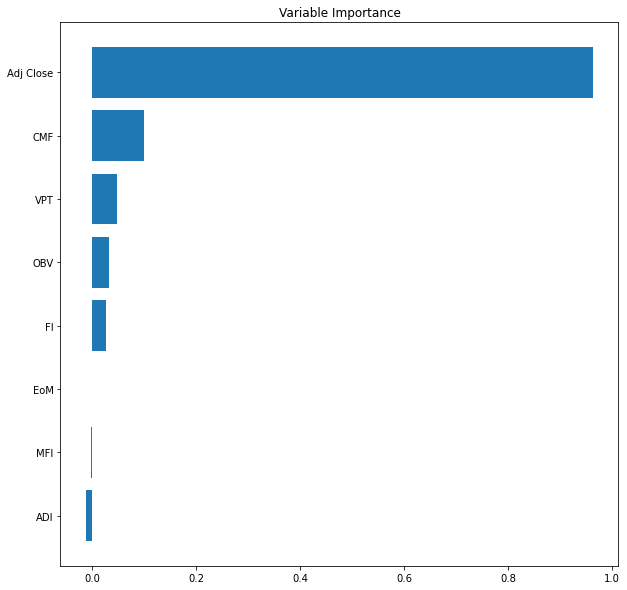

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.30154e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.78
R^2 Score: 0.9110312449621305
Mean Absolute Error: 0.33395824893857845
Mean Squared Error: 0.41008558591880323


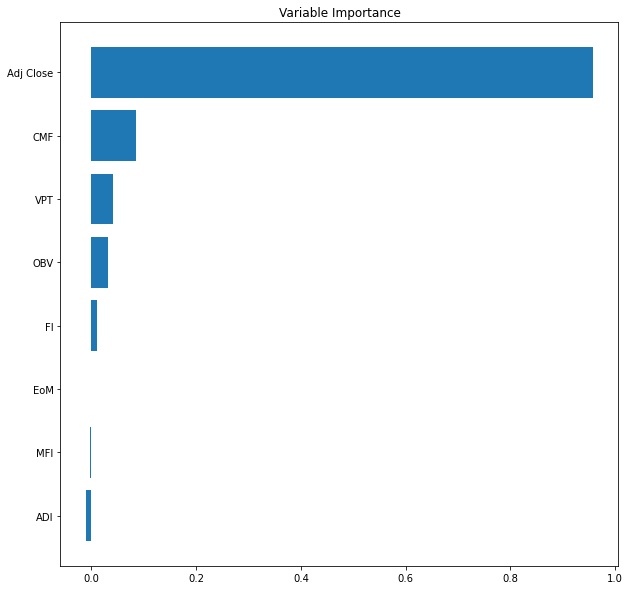

Alpha is: 0.89
R^2 Score: 0.910937376264112
Mean Absolute Error: 0.33718401370458506
Mean Squared Error: 0.41287197355959354


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.73834e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


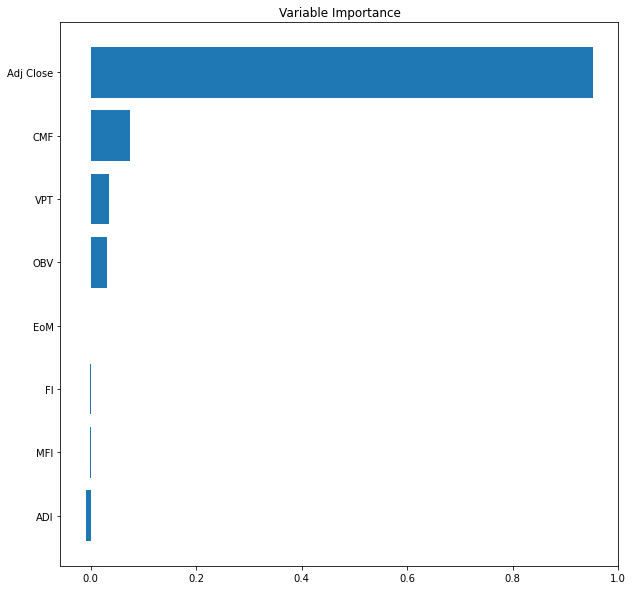

Alpha is: 1.0
R^2 Score: 0.910843874298043
Mean Absolute Error: 0.3414587360591791
Mean Squared Error: 0.4157930912128197


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.17536e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


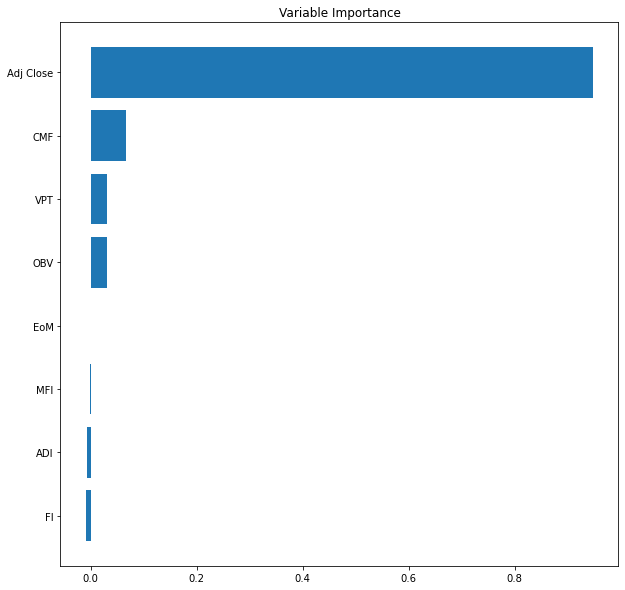

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.7176e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.01
R^2 Score: 0.8713702795452521
Mean Absolute Error: 0.28771112985680686
Mean Squared Error: 0.12606506268858783


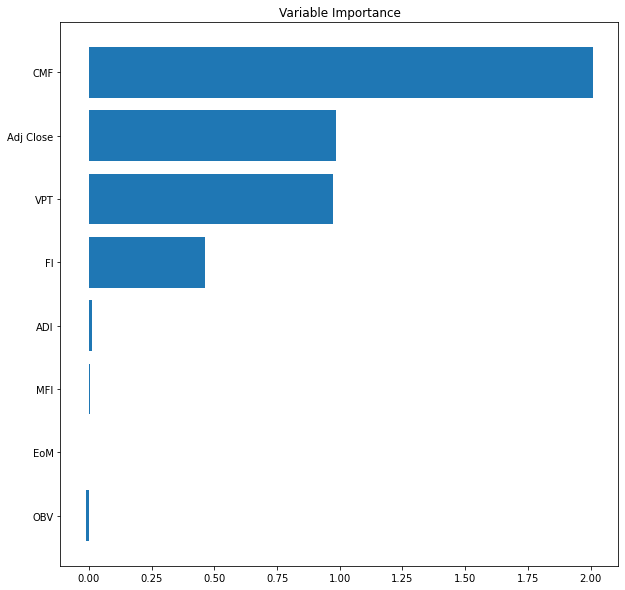

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.44891e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.12
R^2 Score: 0.8702214889064527
Mean Absolute Error: 0.2952758765378814
Mean Squared Error: 0.13368508797173248


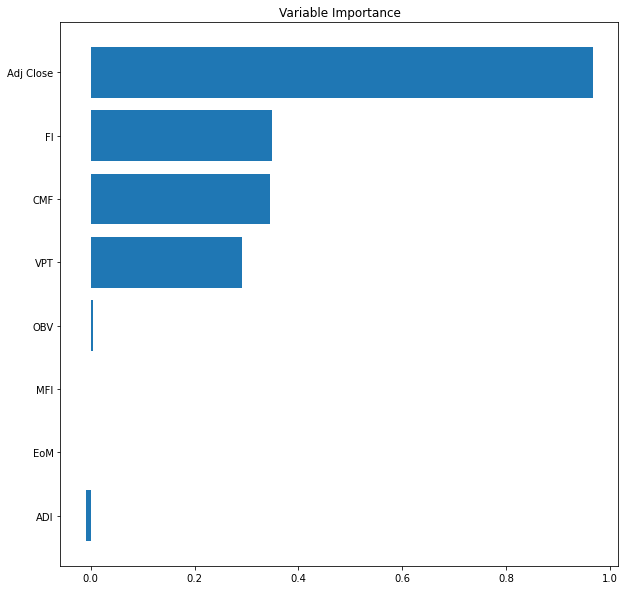

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.44558e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.23
R^2 Score: 0.8699416534871087
Mean Absolute Error: 0.29320262847007034
Mean Squared Error: 0.13189013864142188


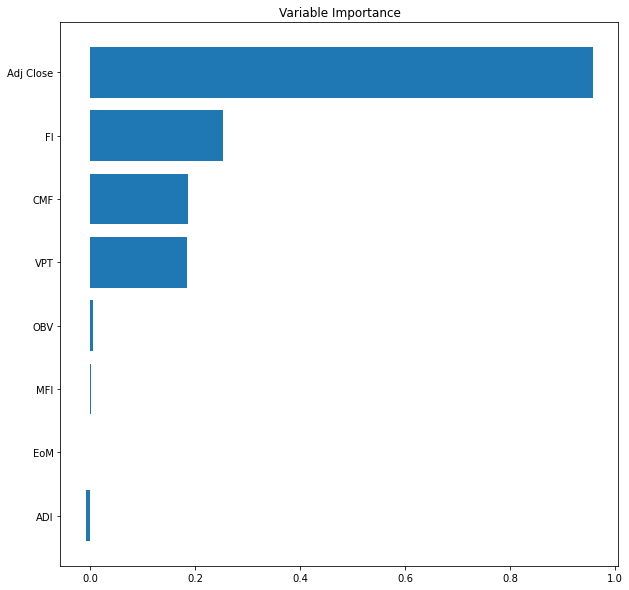

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.50312e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.34
R^2 Score: 0.8697785549992127
Mean Absolute Error: 0.2913918265634261
Mean Squared Error: 0.13052790885706175


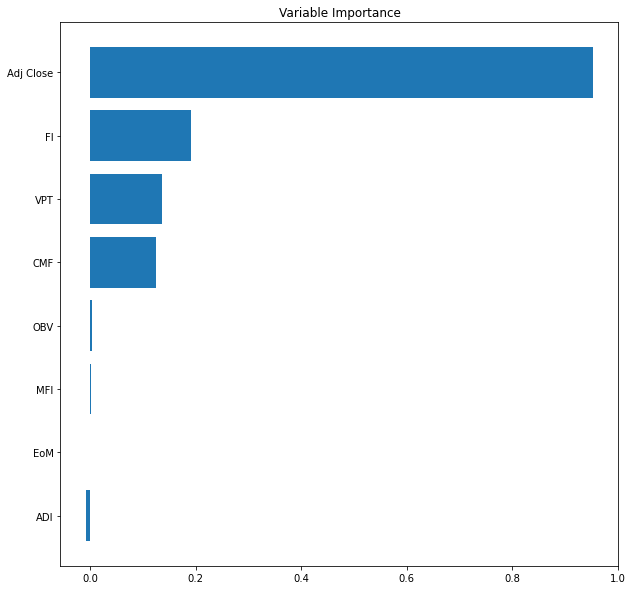

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.25927e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.45
R^2 Score: 0.8696639525477703
Mean Absolute Error: 0.289907631523515
Mean Squared Error: 0.1295321068792473


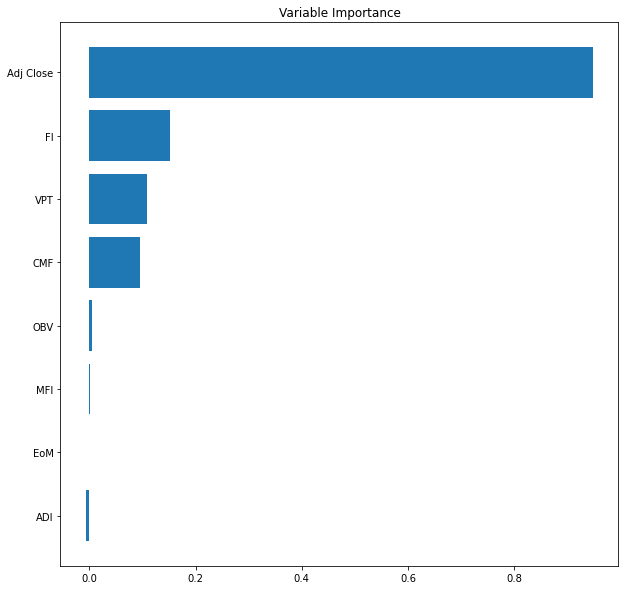

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.57228e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.56
R^2 Score: 0.869575554585162
Mean Absolute Error: 0.2886501739367041
Mean Squared Error: 0.12876278656502507


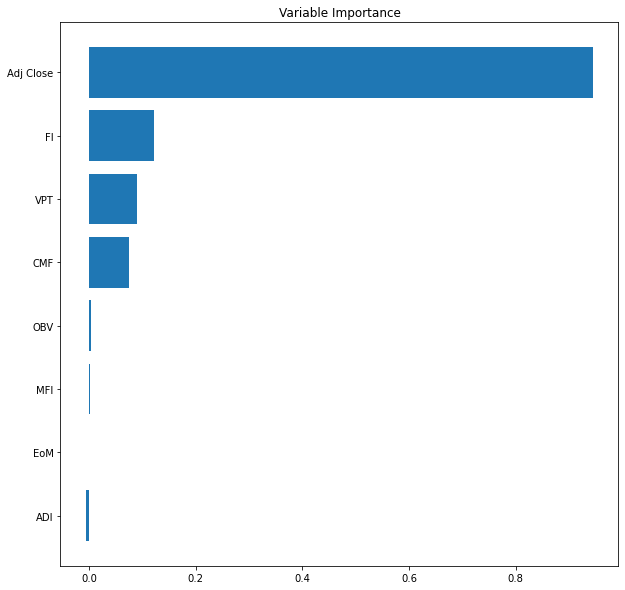

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.87664e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.67
R^2 Score: 0.8695028585091067
Mean Absolute Error: 0.28877333341946565
Mean Squared Error: 0.1281387689025293


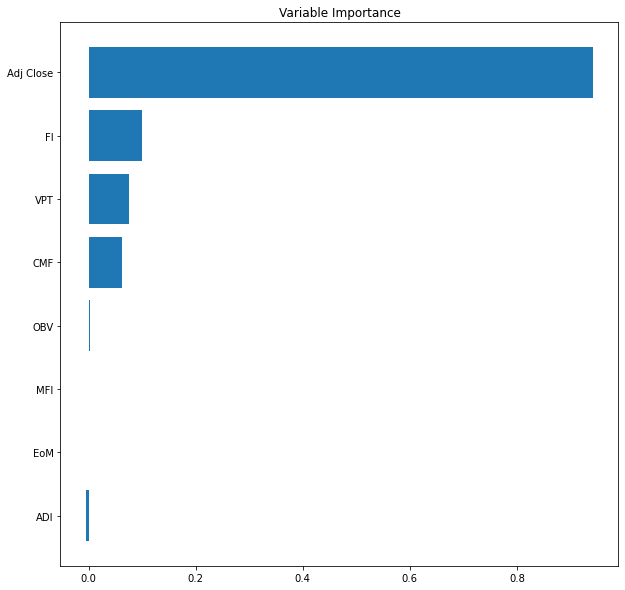

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.18109e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.78
R^2 Score: 0.8694400577386597
Mean Absolute Error: 0.28921053455072504
Mean Squared Error: 0.12761401199757683


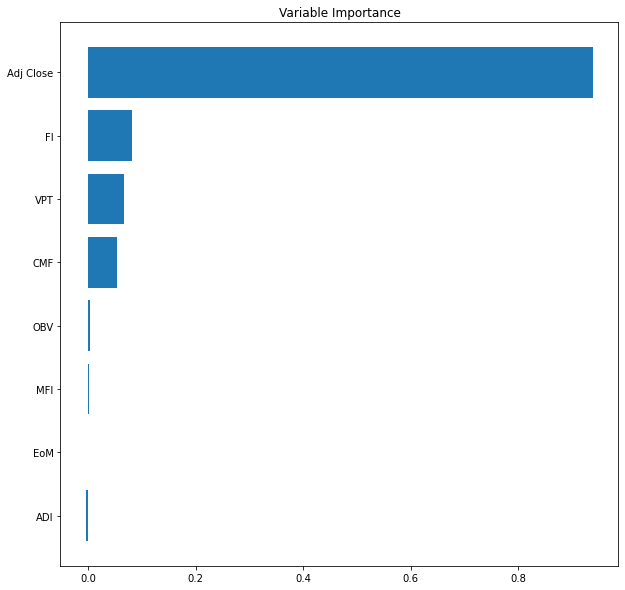

C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.48561e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Alpha is: 0.89
R^2 Score: 0.8693836342772963
Mean Absolute Error: 0.28957694142989904
Mean Squared Error: 0.1271612146622098


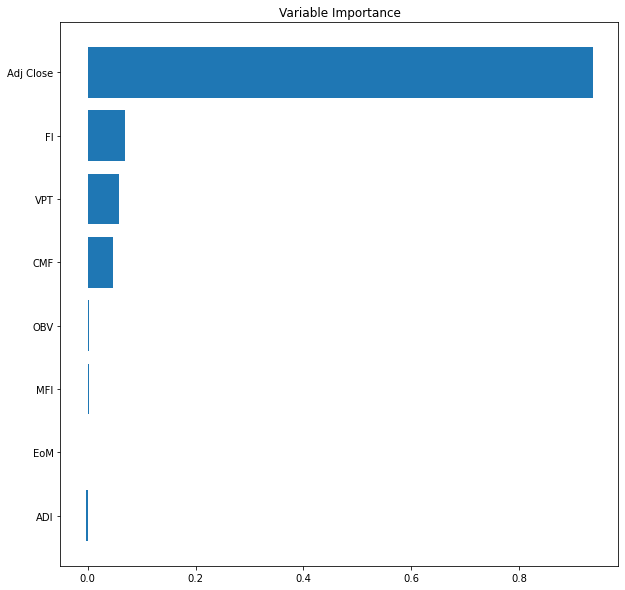

Alpha is: 1.0
R^2 Score: 0.8693313216200867
Mean Absolute Error: 0.28989186538326805
Mean Squared Error: 0.1267633629602316


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.79019e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


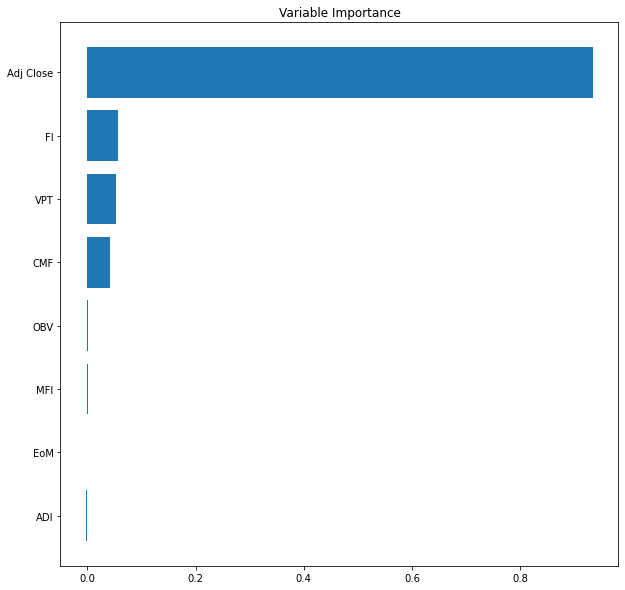

In [62]:
#Ridge Model

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    

    for alpha in np.linspace(.01, 1, 10):
        print('Alpha is:',alpha)
        ridge_model = linear_model.Ridge(alpha)
        ridge_model.fit(X_tr,y_tr)
        
        ridge_y_pred = ridge_model.predict(X_ts)

        r2 = ridge_model.score(X_tr,y_tr)
        mean_abs_error = mean_absolute_error(y_ts,ridge_y_pred)
        mean_sqr_error = mean_squared_error(y_ts,ridge_y_pred)
        print('R^2 Score:',r2)
        print('Mean Absolute Error:',mean_abs_error)
        print('Mean Squared Error:',mean_sqr_error)

        lm_imp = ridge_model.coef_
        sorted_idx = np.argsort(lm_imp)
        num_features = np.arange(sorted_idx.shape[0])
        plt.figure(figsize=(10,10))
        plt.barh(num_features,lm_imp[sorted_idx],align='center')
        plt.yticks(num_features, X_train_columns[sorted_idx])
        plt.title('Variable Importance')
        plt.show()

Best Parameters:{'max_depth': 2, 'n_estimators': 4}
R^2 Score: 0.7852698354268917
Mean Absolute Error: 1.415985937617014
Mean Squared Error: 0.38818884274768345


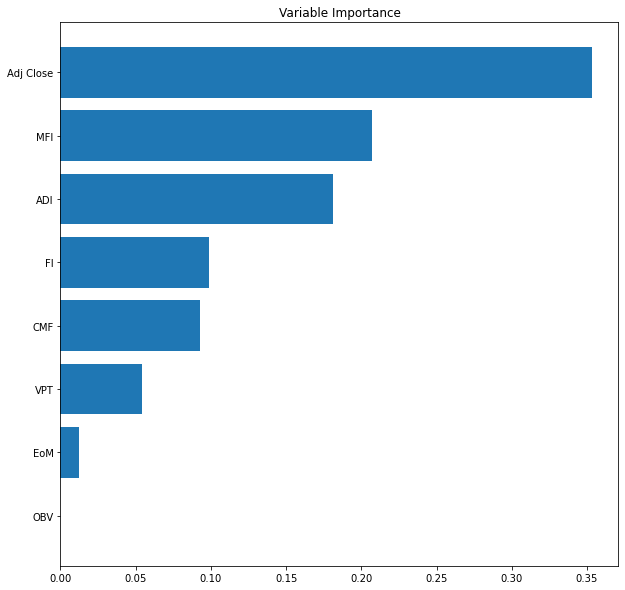

Best Parameters:{'max_depth': 2, 'n_estimators': 4}
R^2 Score: 0.8478695904503555
Mean Absolute Error: 1.4646693582581478
Mean Squared Error: 4.114373556556821


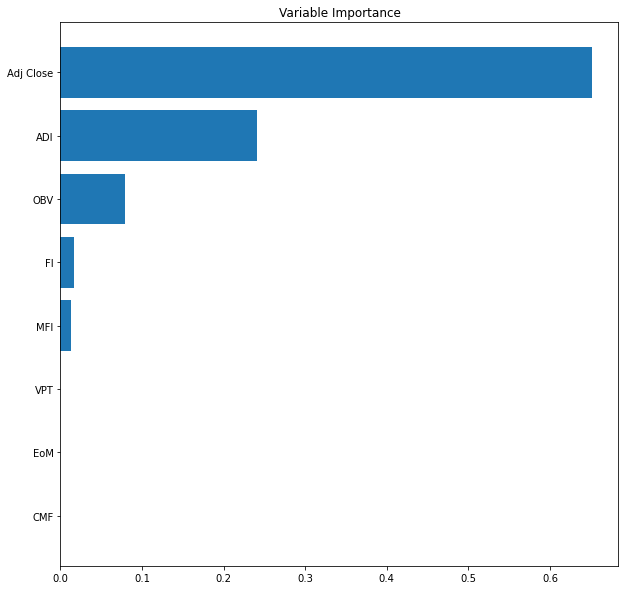

Best Parameters:{'max_depth': 4, 'n_estimators': 4}
R^2 Score: 0.9791311387323401
Mean Absolute Error: 0.27342209947533314
Mean Squared Error: 1.926640072063699


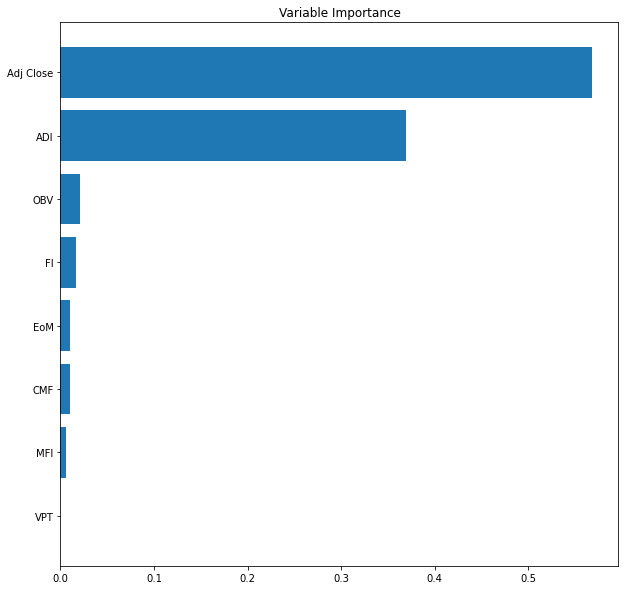

Best Parameters:{'max_depth': 4, 'n_estimators': 4}
R^2 Score: 0.9538721874125194
Mean Absolute Error: 0.5928729766834547
Mean Squared Error: 0.6229966832285241


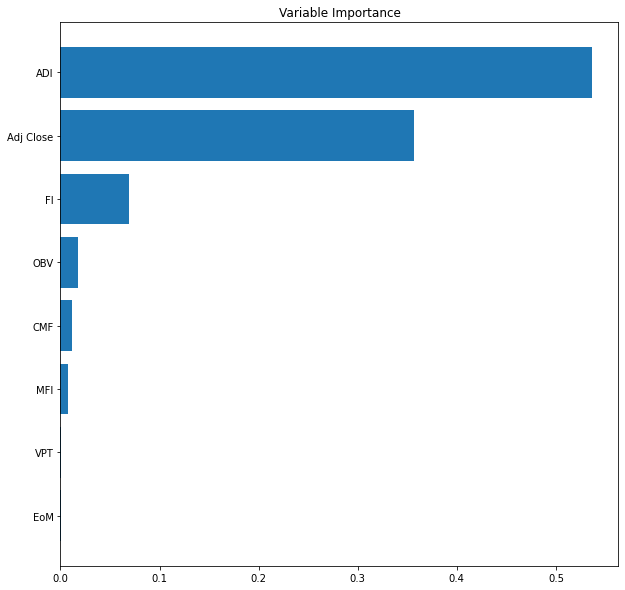

Best Parameters:{'max_depth': 4, 'n_estimators': 3}
R^2 Score: 0.9323496144923882
Mean Absolute Error: 0.32546485538660974
Mean Squared Error: 0.1267633629602316


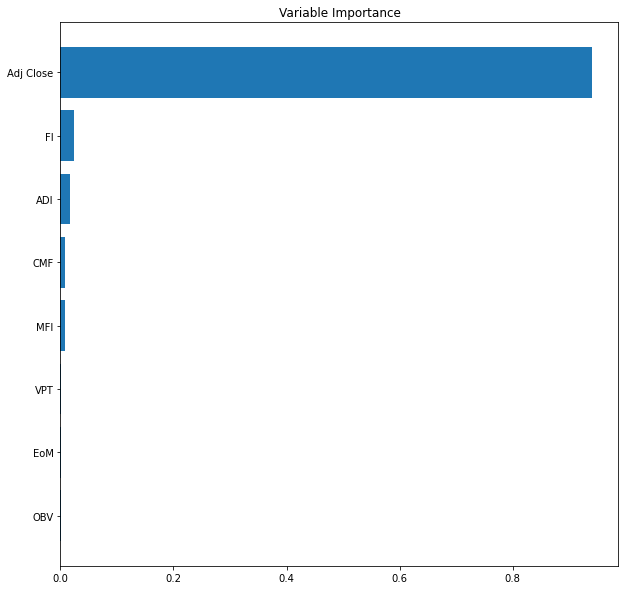

In [63]:
#Random Forest

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    random_grid = {'n_estimators':np.arange(1,5),'max_depth':np.arange(1,5)}
    rfr = RandomForestRegressor(random_state=49)
    rfr_cv = GridSearchCV(rfr,random_grid,cv=5)
    rfr_cv.fit(X_tr,y_tr)
    print('Best Parameters:' + str(rfr_cv.best_params_))
    
    rfr = RandomForestRegressor(n_estimators = rfr_cv.best_params_['n_estimators'],max_depth = rfr_cv.best_params_['max_depth'],random_state=49)
    rfr.fit(X_tr,y_tr)
    
    y_pred_rfr = rfr.predict(X_ts)
    
    r2 = rfr.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred_rfr)
    mean_sqr_error = mean_squared_error(y_ts,ridge_y_pred)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Squared Error:',mean_sqr_error)

    rfr_imp = rfr.feature_importances_
    sorted_idx = np.argsort(rfr_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,rfr_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

Now let's combined the best of each into a df and see how it performs

In [64]:
#taking the best 1 or 2 indicators from each model
df_combined = df[['Adj Close Shift','Adj Close','Stoch RSI In','TRIX','Ulcer','CMF','VI','RSI','CCI','ADI','MFI']]

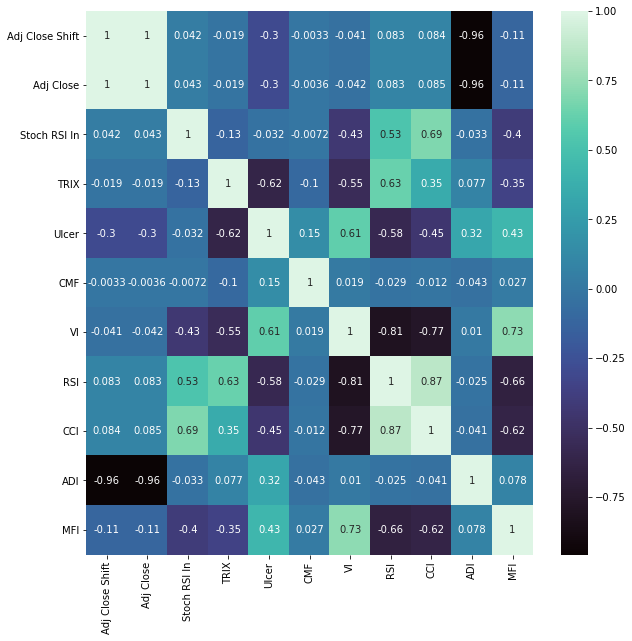

In [65]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_combined.corr(),annot=True,cmap='mako')

In [66]:
#Separating Data
X = df_combined.drop(columns=['Adj Close Shift'])['2019-04-01':'2019-08-31']
y = df_combined['Adj Close Shift']['2019-04-01':'2019-08-31']
X_train_columns = X.columns

R^2 Score: 0.8881880872863223
Mean Absolute Error: 1.8763210974955125
Mean Sqaured Error: 5.813078168477913


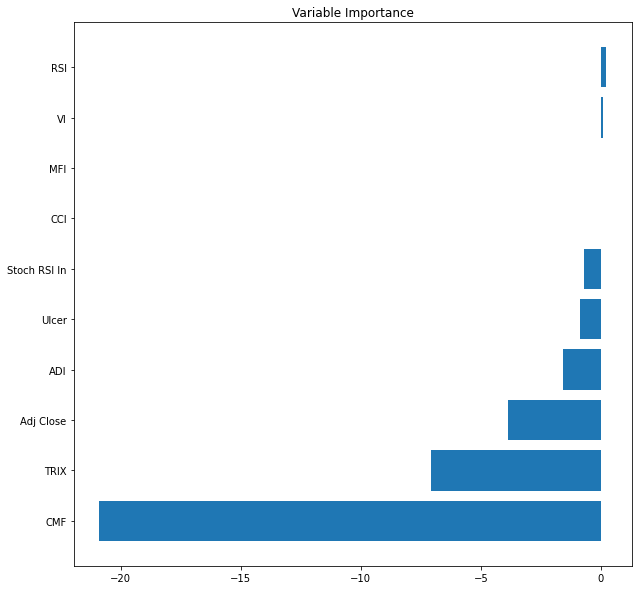

R^2 Score: 0.8716098855322113
Mean Absolute Error: 3.4082117311277176
Mean Sqaured Error: 12.738515659336551


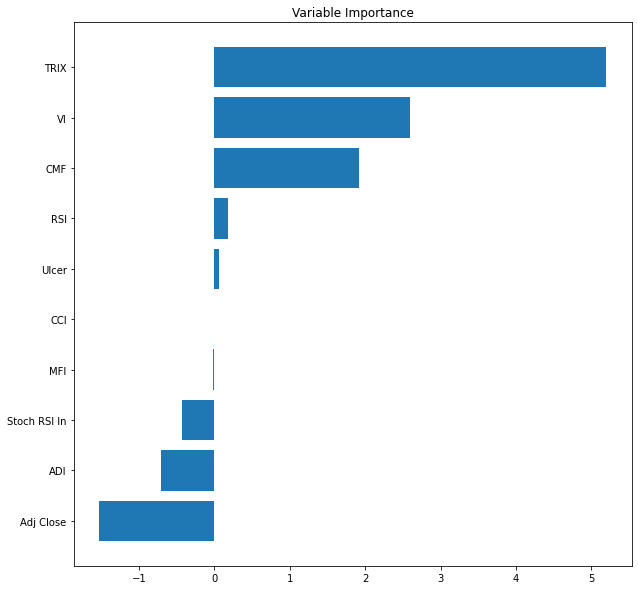

R^2 Score: 0.9299757453263028
Mean Absolute Error: 0.38756523785238195
Mean Sqaured Error: 0.23524352531269088


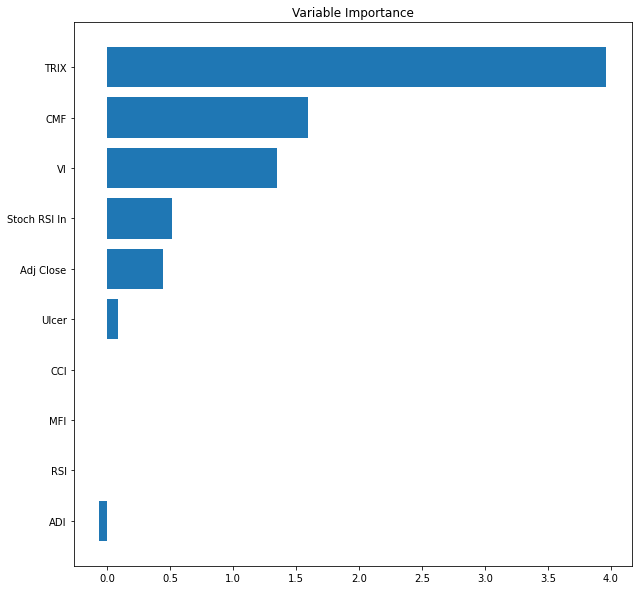

R^2 Score: 0.9330097437608984
Mean Absolute Error: 0.327781559381188
Mean Sqaured Error: 0.4262504310012473


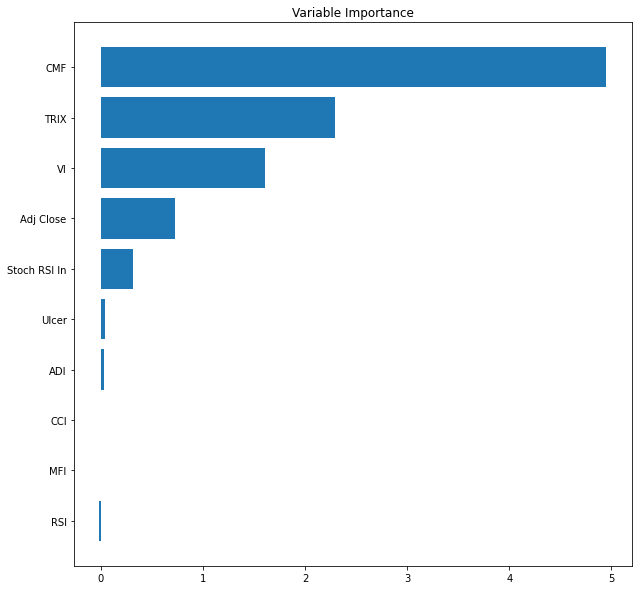

R^2 Score: 0.8926255865537849
Mean Absolute Error: 0.33408129666975794
Mean Sqaured Error: 0.15535208144551316


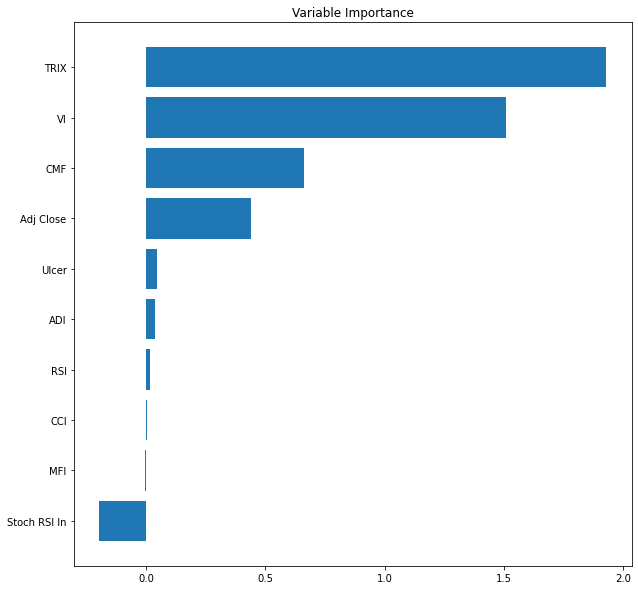

In [67]:
#OLS

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    rModel = linear_model.LinearRegression()
    rModel.fit(X_tr,y_tr)
    
    y_pred = rModel.predict(X_ts)
    
    r2 = rModel.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred)
    mean_sqr_error = mean_squared_error(y_ts,y_pred)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Sqaured Error:',mean_sqr_error)

    lm_imp = rModel.coef_
    sorted_idx = np.argsort(lm_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,lm_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()

Alpha is: 0.01
R^2 Score: 0.8476479167270263
Mean Absolute Error: 0.28178557926367925
Mean Sqaured Error: 0.10794730977594573


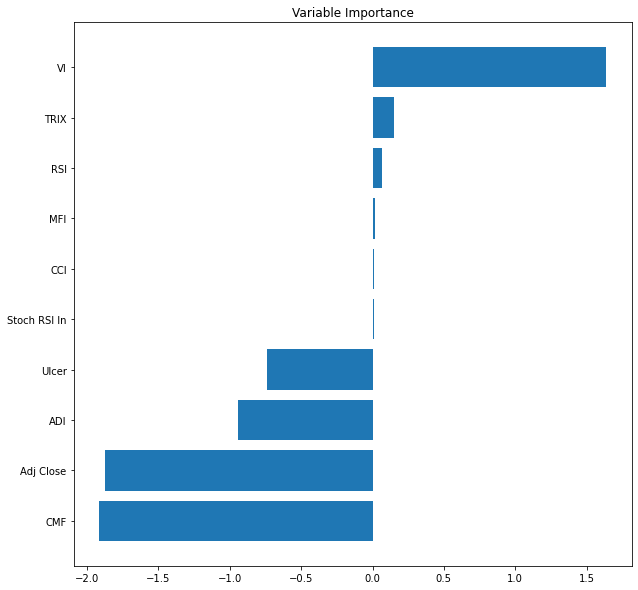

Alpha is: 0.12
R^2 Score: 0.8182901385336676
Mean Absolute Error: 0.28178557926367925
Mean Sqaured Error: 0.10794730977594573


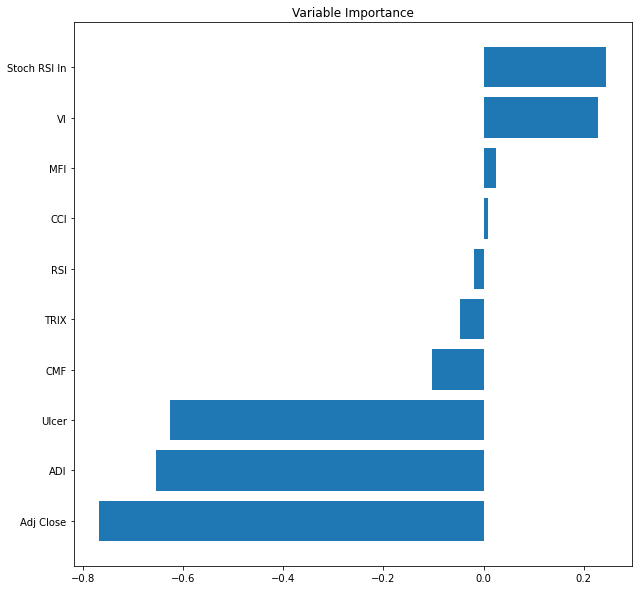

Alpha is: 0.23
R^2 Score: 0.8076813609267428
Mean Absolute Error: 0.28178557926367925
Mean Sqaured Error: 0.10794730977594573


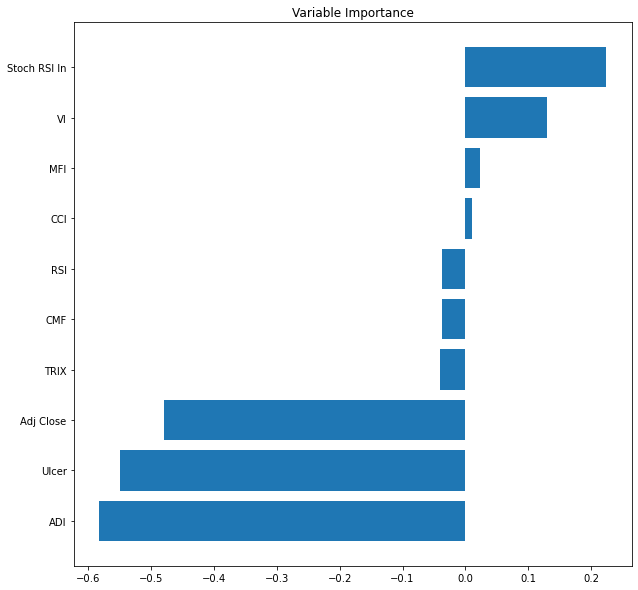

Alpha is: 0.34
R^2 Score: 0.8003939655481245
Mean Absolute Error: 0.28178557926367925
Mean Sqaured Error: 0.10794730977594573


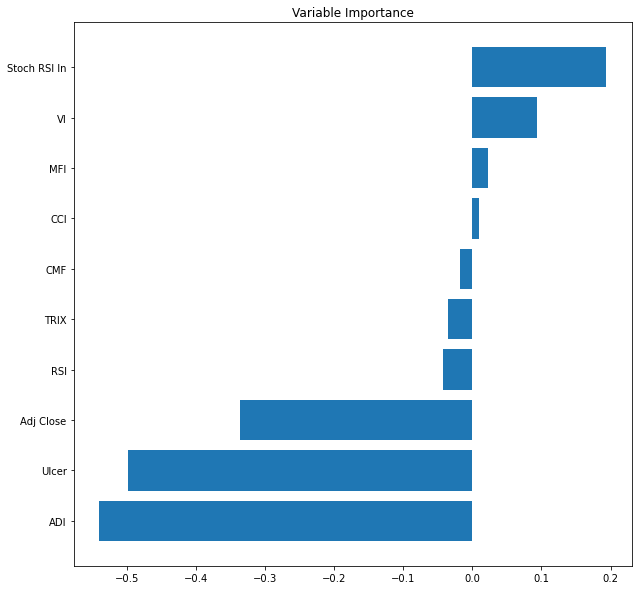

Alpha is: 0.45
R^2 Score: 0.7947289345393552
Mean Absolute Error: 0.28178557926367925
Mean Sqaured Error: 0.10794730977594573


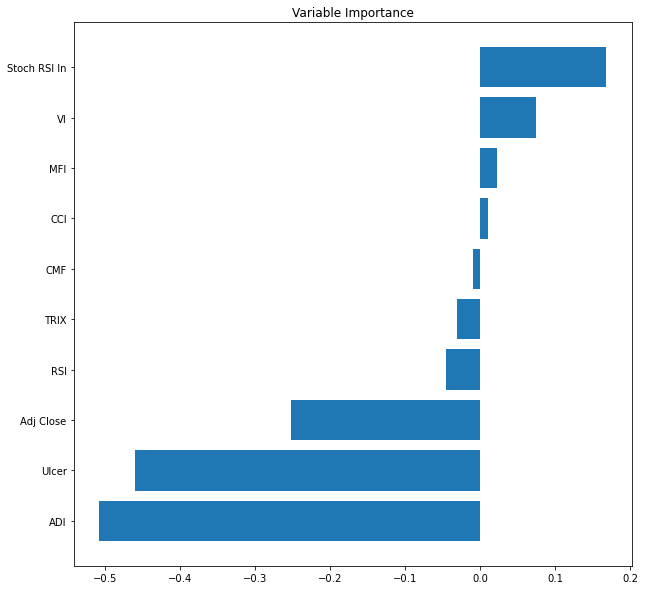

Alpha is: 0.56
R^2 Score: 0.7899996195082009
Mean Absolute Error: 0.28178557926367925
Mean Sqaured Error: 0.10794730977594573


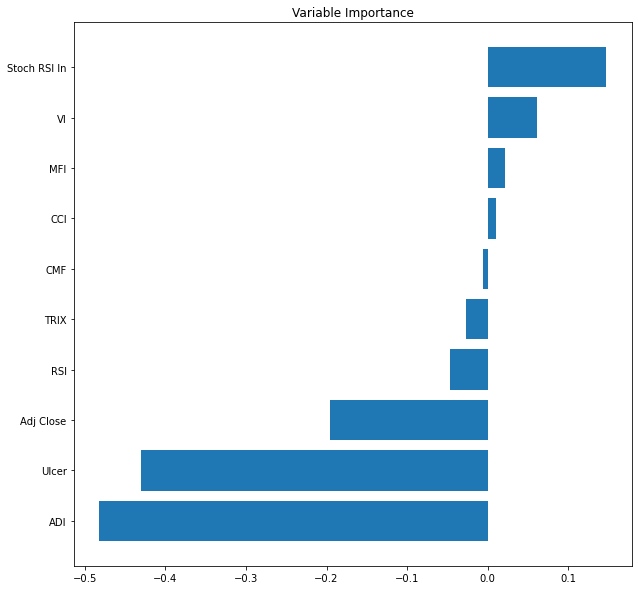

Alpha is: 0.67
R^2 Score: 0.7858684525320897
Mean Absolute Error: 0.28178557926367925
Mean Sqaured Error: 0.10794730977594573


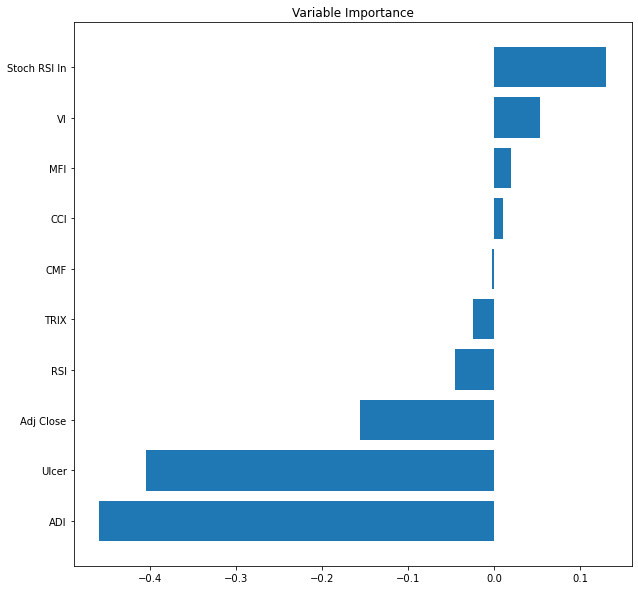

Alpha is: 0.78
R^2 Score: 0.7821508795292305
Mean Absolute Error: 0.28178557926367925
Mean Sqaured Error: 0.10794730977594573


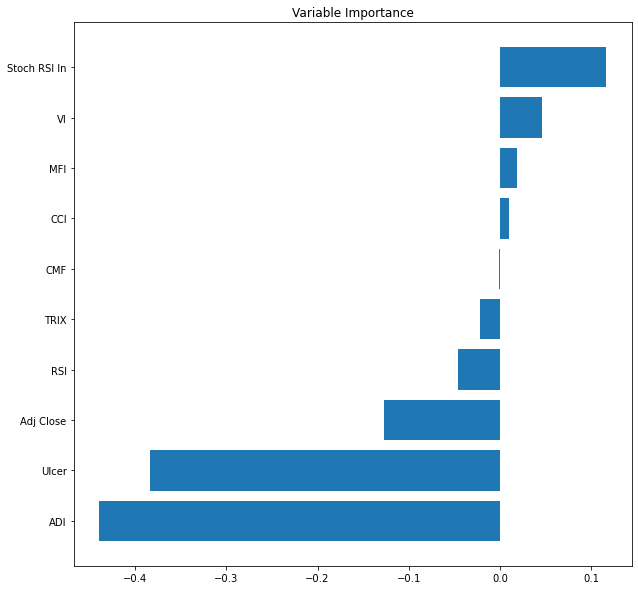

Alpha is: 0.89
R^2 Score: 0.7787382787474584
Mean Absolute Error: 0.28178557926367925
Mean Sqaured Error: 0.10794730977594573


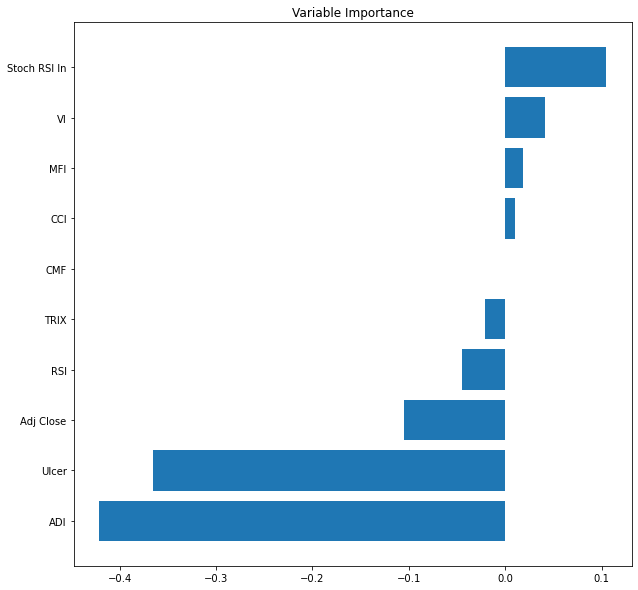

Alpha is: 1.0
R^2 Score: 0.7755629021926402
Mean Absolute Error: 0.28178557926367925
Mean Sqaured Error: 0.10794730977594573


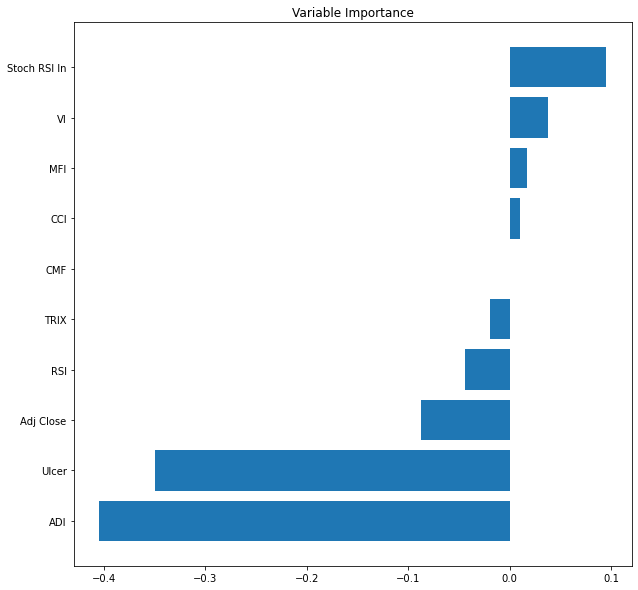

Alpha is: 0.01
R^2 Score: 0.8687180284997754
Mean Absolute Error: 0.19319923298642797
Mean Sqaured Error: 0.0964779434082401


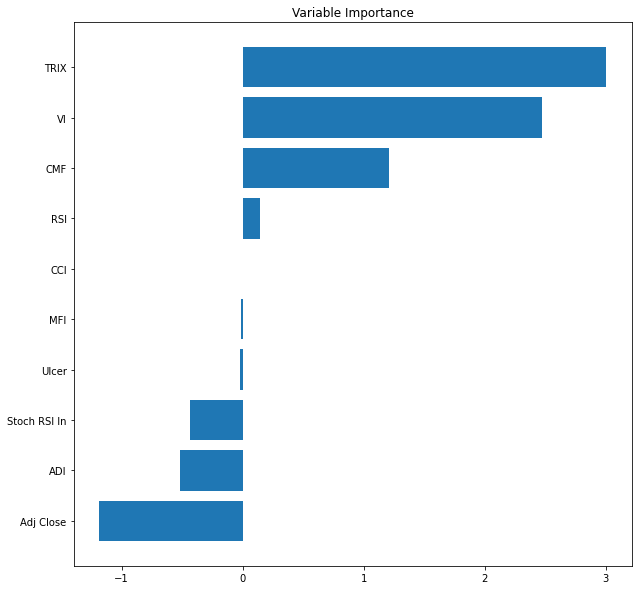

Alpha is: 0.12
R^2 Score: 0.8492053898471525
Mean Absolute Error: 0.19319923298642797
Mean Sqaured Error: 0.0964779434082401


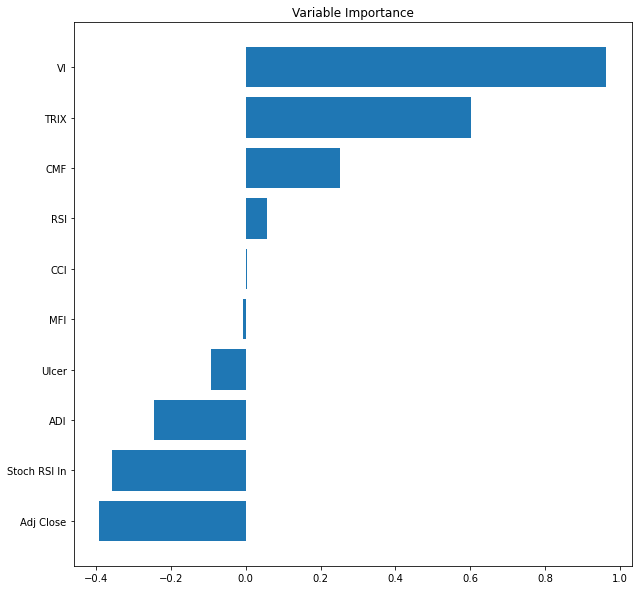

Alpha is: 0.23
R^2 Score: 0.8433843997197135
Mean Absolute Error: 0.19319923298642797
Mean Sqaured Error: 0.0964779434082401


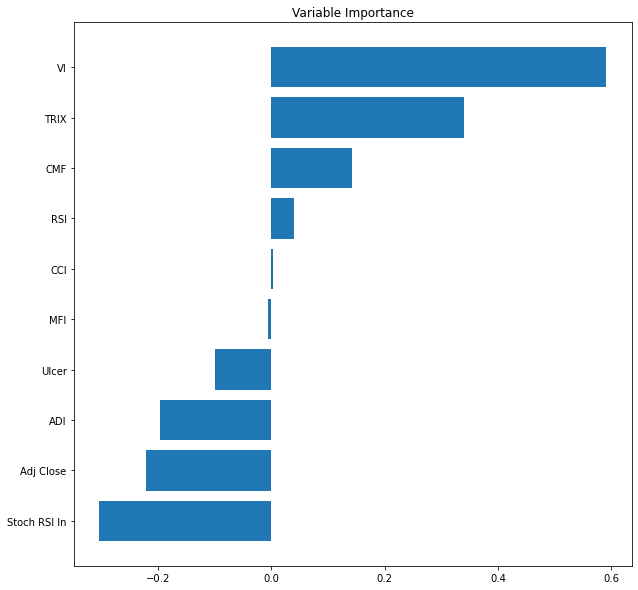

Alpha is: 0.34
R^2 Score: 0.8405407548011207
Mean Absolute Error: 0.19319923298642797
Mean Sqaured Error: 0.0964779434082401


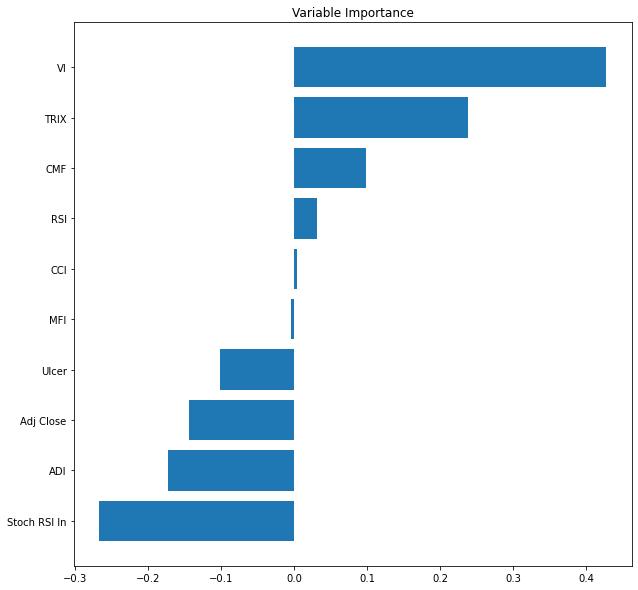

Alpha is: 0.45
R^2 Score: 0.8388154405222809
Mean Absolute Error: 0.19319923298642797
Mean Sqaured Error: 0.0964779434082401


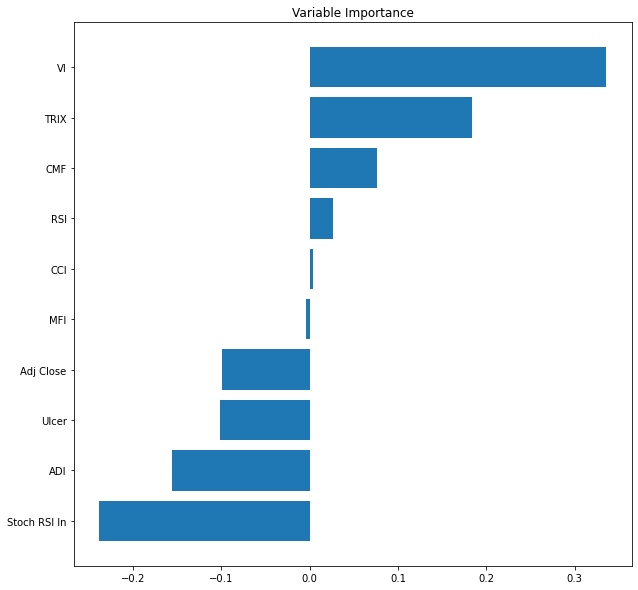

Alpha is: 0.56
R^2 Score: 0.8376343351526936
Mean Absolute Error: 0.19319923298642797
Mean Sqaured Error: 0.0964779434082401


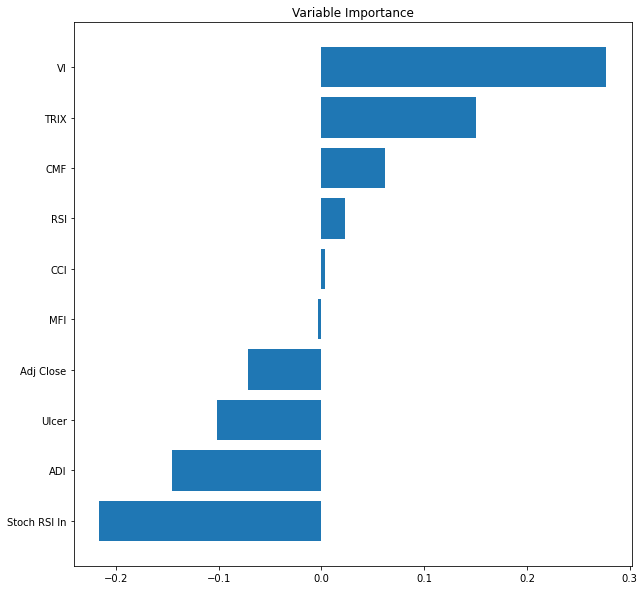

Alpha is: 0.67
R^2 Score: 0.836761228901421
Mean Absolute Error: 0.19319923298642797
Mean Sqaured Error: 0.0964779434082401


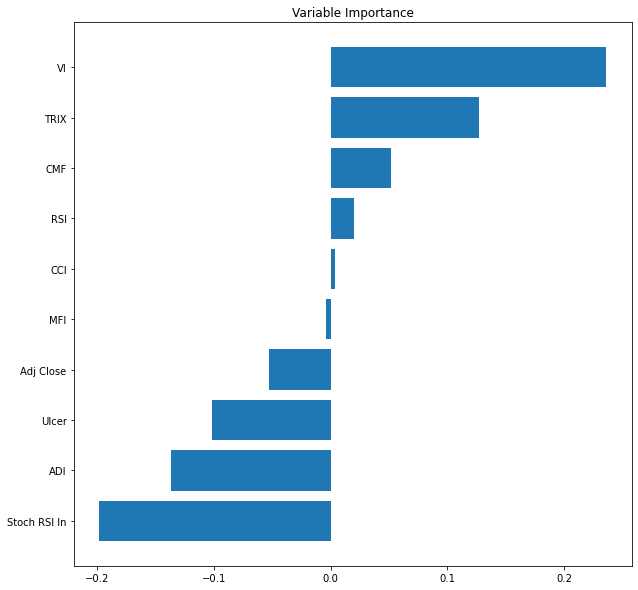

Alpha is: 0.78
R^2 Score: 0.8360807240672123
Mean Absolute Error: 0.19319923298642797
Mean Sqaured Error: 0.0964779434082401


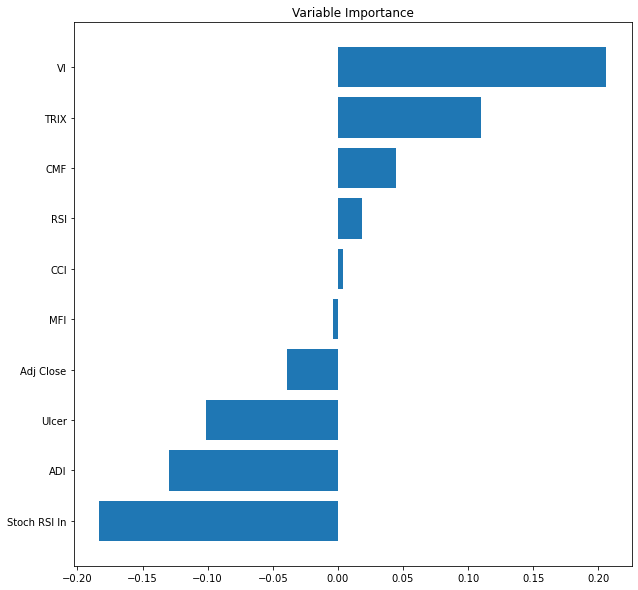

Alpha is: 0.89
R^2 Score: 0.8355295379236705
Mean Absolute Error: 0.19319923298642797
Mean Sqaured Error: 0.0964779434082401


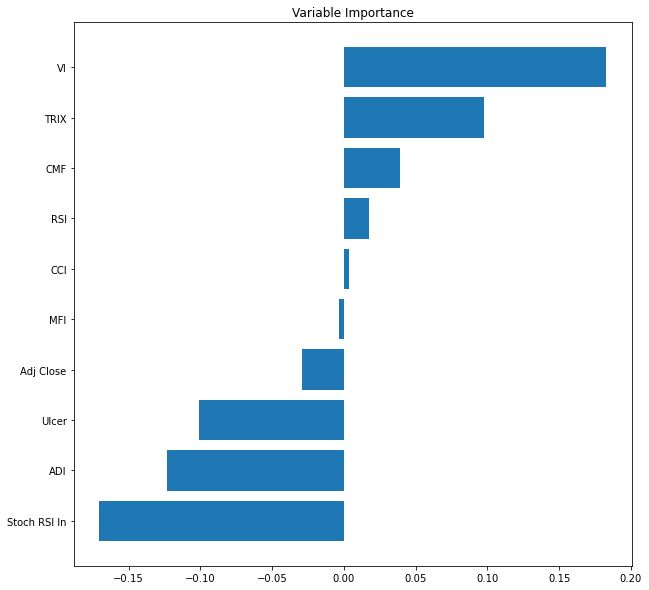

Alpha is: 1.0
R^2 Score: 0.8350699398473712
Mean Absolute Error: 0.19319923298642797
Mean Sqaured Error: 0.0964779434082401


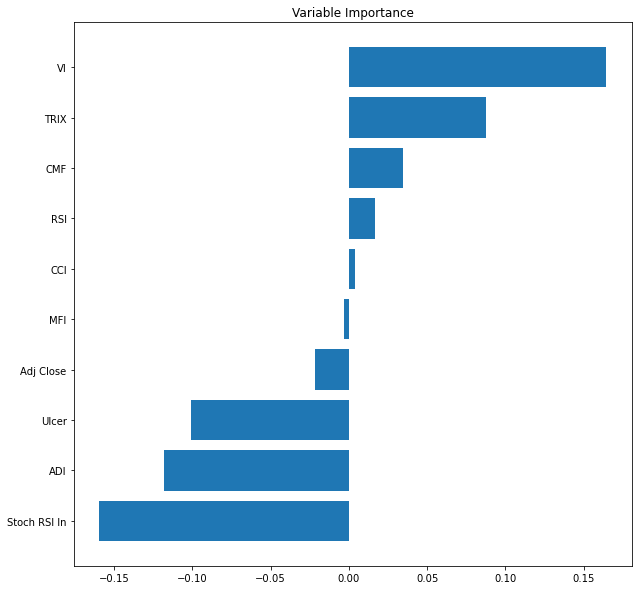

Alpha is: 0.01
R^2 Score: 0.9296928220079089
Mean Absolute Error: 0.15150194090290578
Mean Sqaured Error: 0.033292916276910466


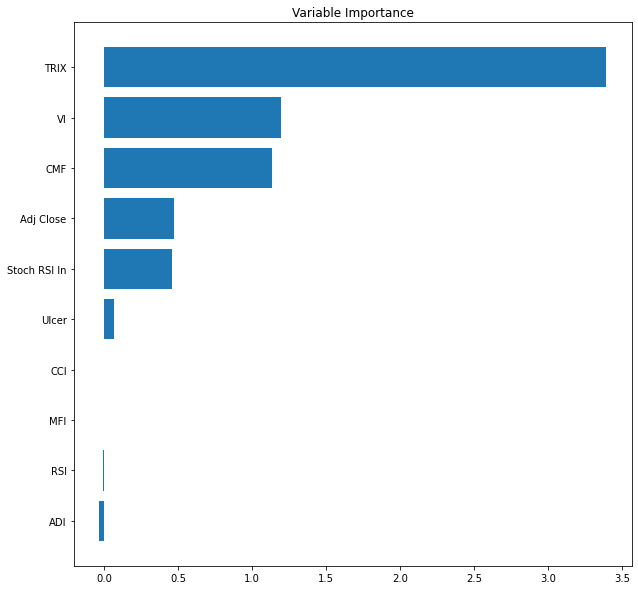

Alpha is: 0.12
R^2 Score: 0.9245309697309749
Mean Absolute Error: 0.15150194090290578
Mean Sqaured Error: 0.033292916276910466


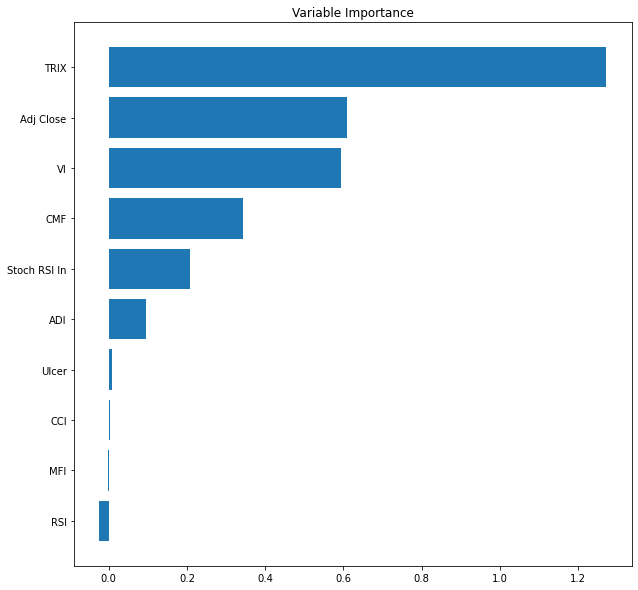

Alpha is: 0.23
R^2 Score: 0.9223545355699136
Mean Absolute Error: 0.15150194090290578
Mean Sqaured Error: 0.033292916276910466


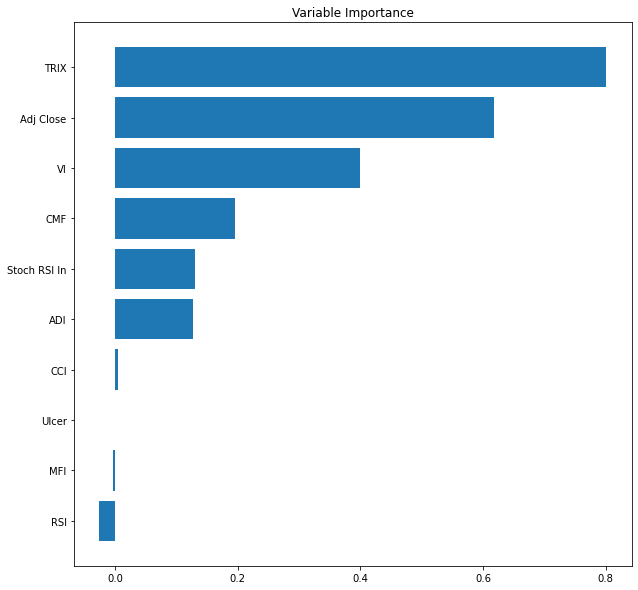

Alpha is: 0.34
R^2 Score: 0.921198551451064
Mean Absolute Error: 0.15150194090290578
Mean Sqaured Error: 0.033292916276910466


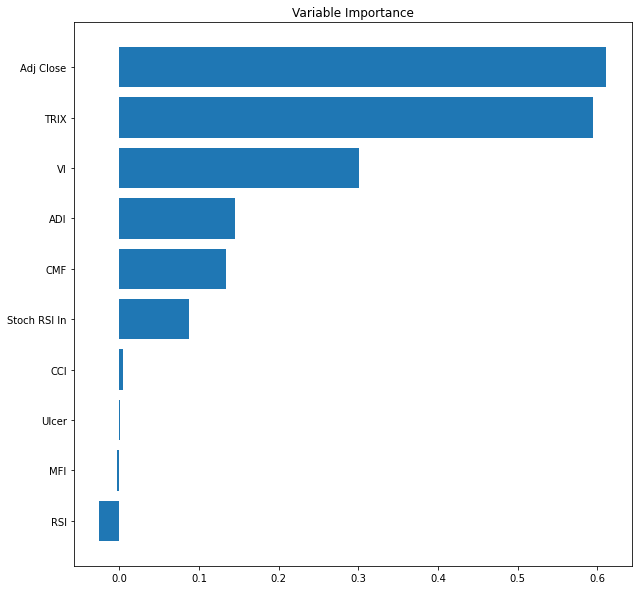

Alpha is: 0.45
R^2 Score: 0.9204537816765616
Mean Absolute Error: 0.15150194090290578
Mean Sqaured Error: 0.033292916276910466


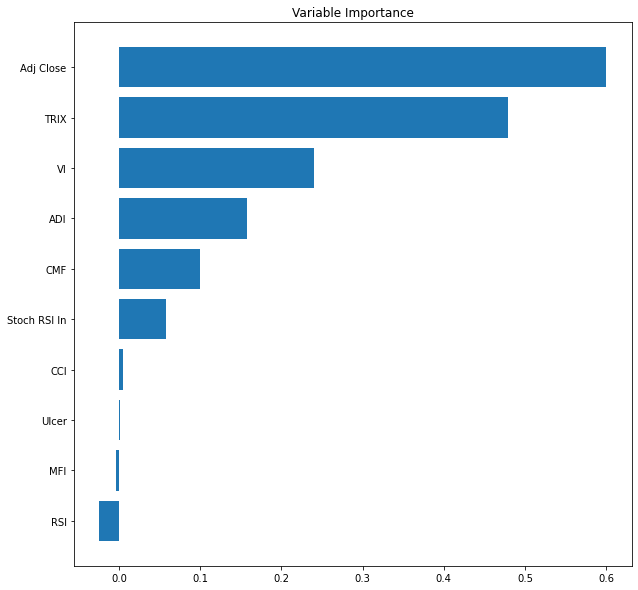

Alpha is: 0.56
R^2 Score: 0.9199136272134021
Mean Absolute Error: 0.15150194090290578
Mean Sqaured Error: 0.033292916276910466


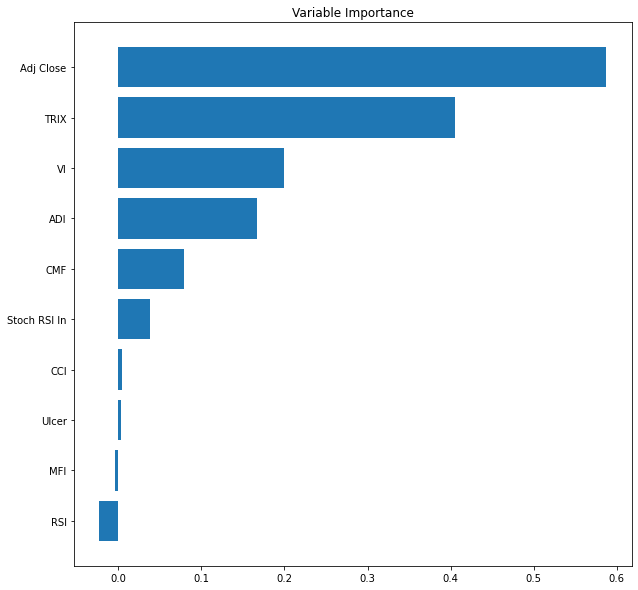

Alpha is: 0.67
R^2 Score: 0.9194897751840778
Mean Absolute Error: 0.15150194090290578
Mean Sqaured Error: 0.033292916276910466


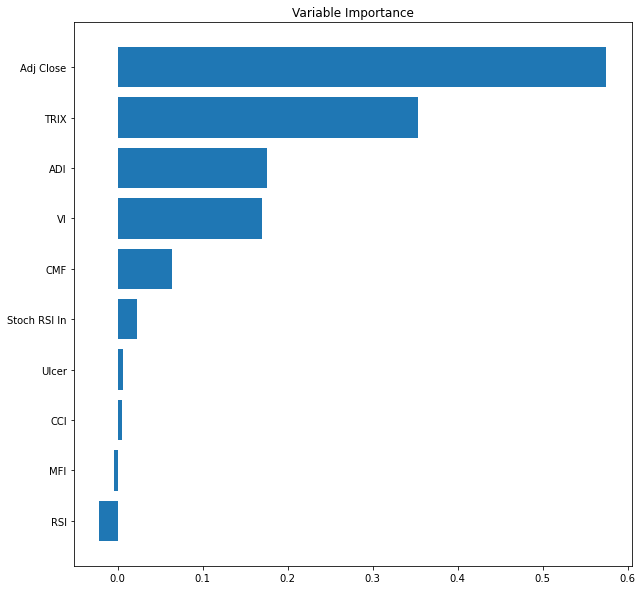

Alpha is: 0.78
R^2 Score: 0.9191384032122558
Mean Absolute Error: 0.15150194090290578
Mean Sqaured Error: 0.033292916276910466


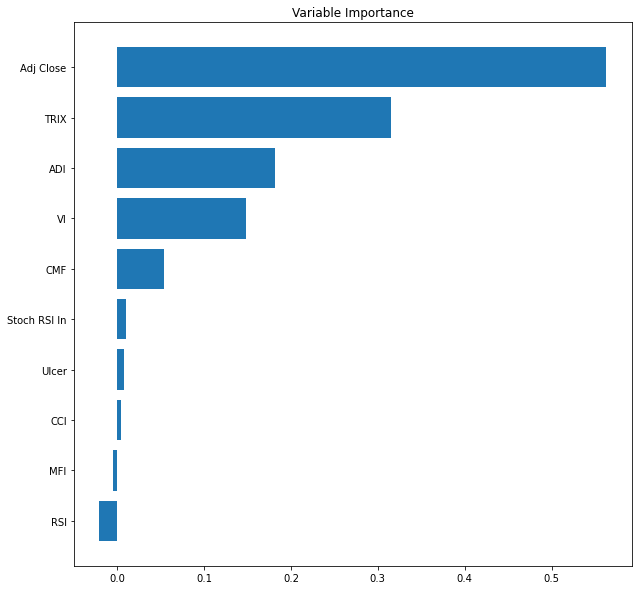

Alpha is: 0.89
R^2 Score: 0.9188354100804038
Mean Absolute Error: 0.15150194090290578
Mean Sqaured Error: 0.033292916276910466


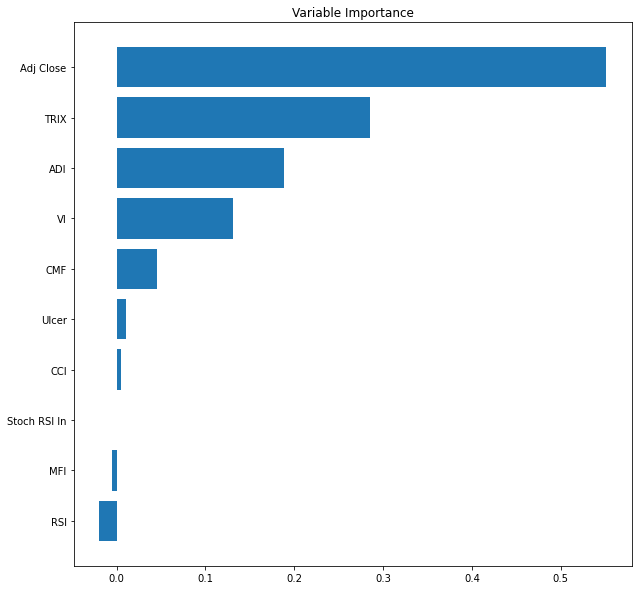

Alpha is: 1.0
R^2 Score: 0.9185665015903943
Mean Absolute Error: 0.15150194090290578
Mean Sqaured Error: 0.033292916276910466


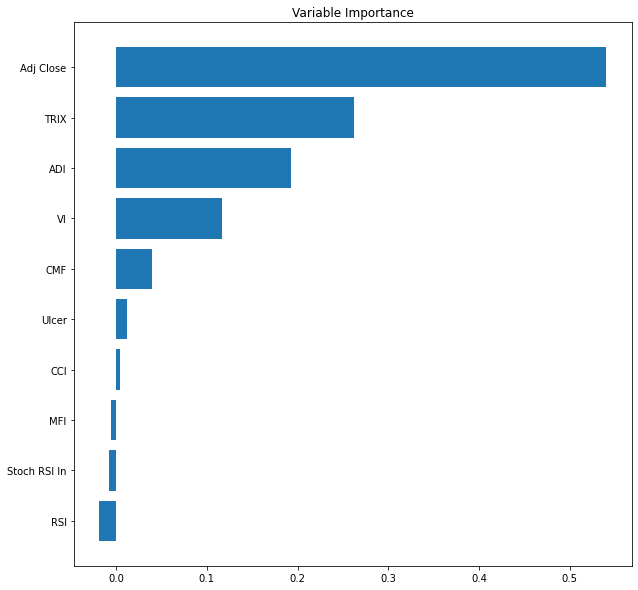

Alpha is: 0.01
R^2 Score: 0.9324020751048318
Mean Absolute Error: 0.3001899122329732
Mean Sqaured Error: 0.30149482861401394


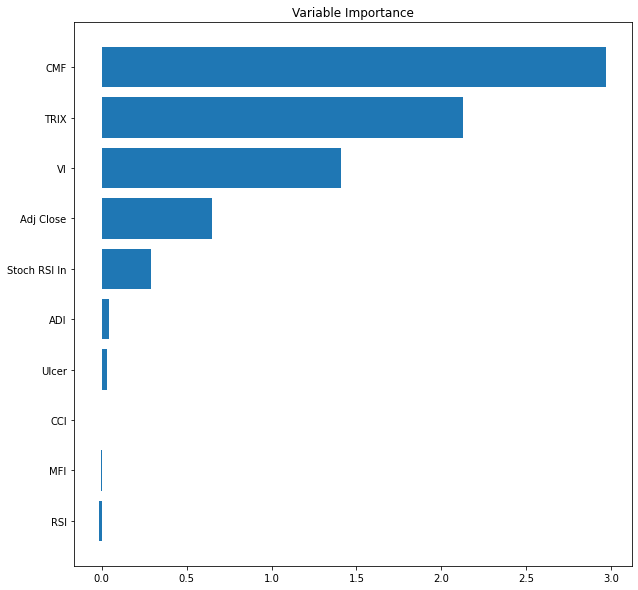

Alpha is: 0.12
R^2 Score: 0.92843992496446
Mean Absolute Error: 0.3001899122329732
Mean Sqaured Error: 0.30149482861401394


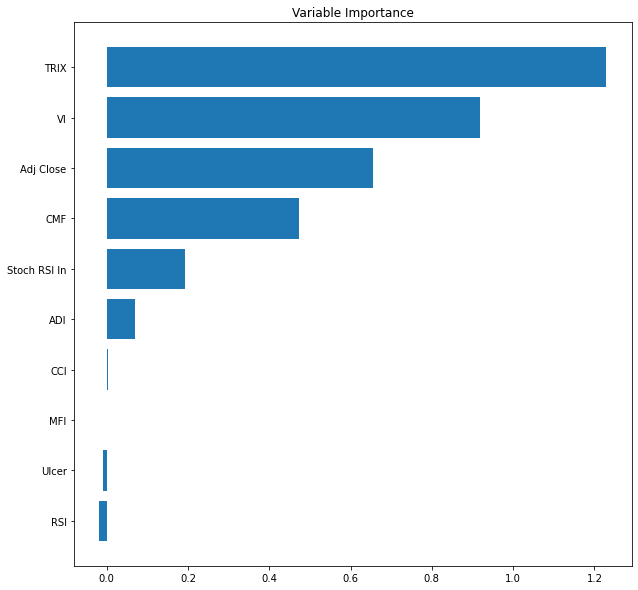

Alpha is: 0.23
R^2 Score: 0.9266447243307213
Mean Absolute Error: 0.3001899122329732
Mean Sqaured Error: 0.30149482861401394


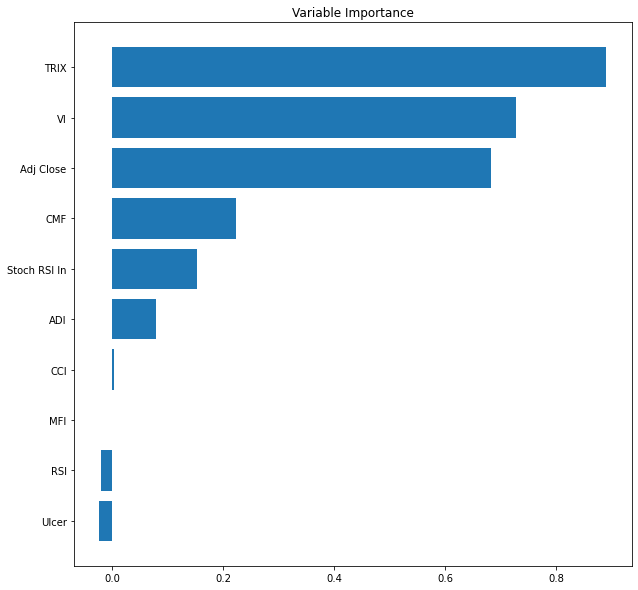

Alpha is: 0.34
R^2 Score: 0.925425312472373
Mean Absolute Error: 0.3001899122329732
Mean Sqaured Error: 0.30149482861401394


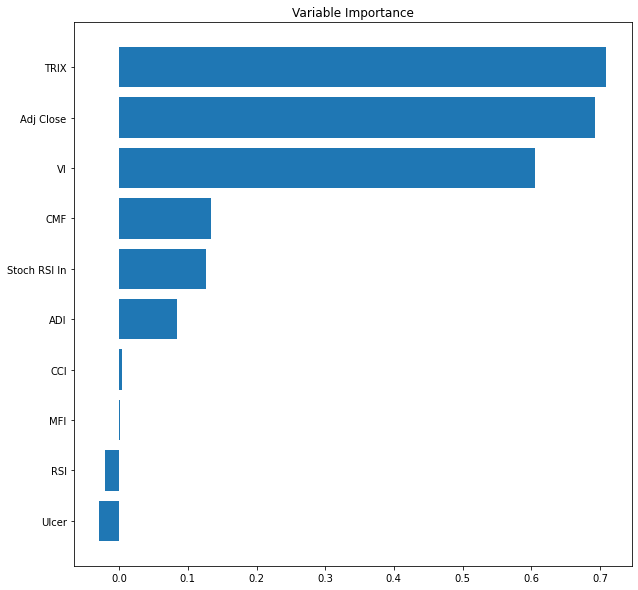

Alpha is: 0.45
R^2 Score: 0.9245099193732331
Mean Absolute Error: 0.3001899122329732
Mean Sqaured Error: 0.30149482861401394


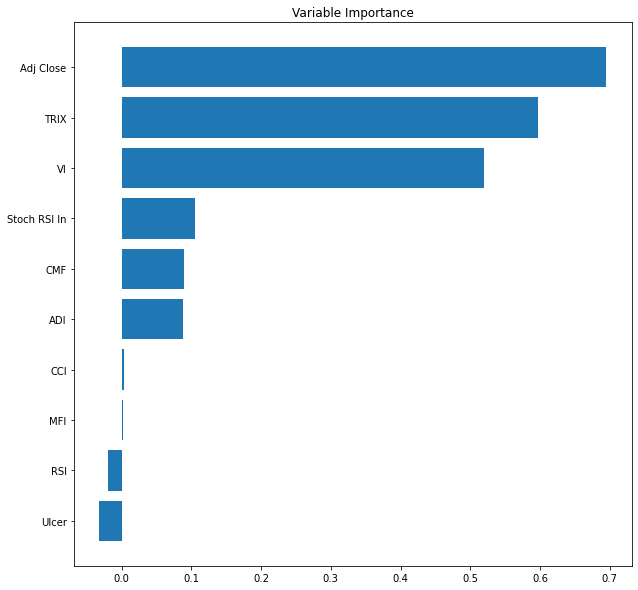

Alpha is: 0.56
R^2 Score: 0.9237797115399989
Mean Absolute Error: 0.3001899122329732
Mean Sqaured Error: 0.30149482861401394


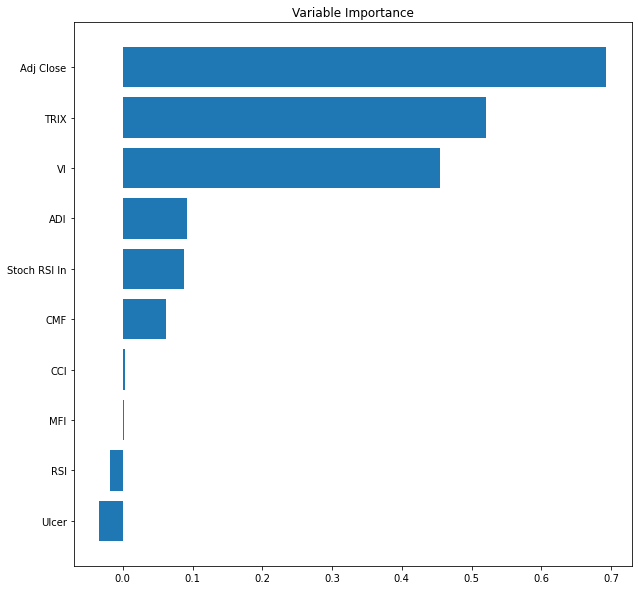

Alpha is: 0.67
R^2 Score: 0.9231715882493836
Mean Absolute Error: 0.3001899122329732
Mean Sqaured Error: 0.30149482861401394


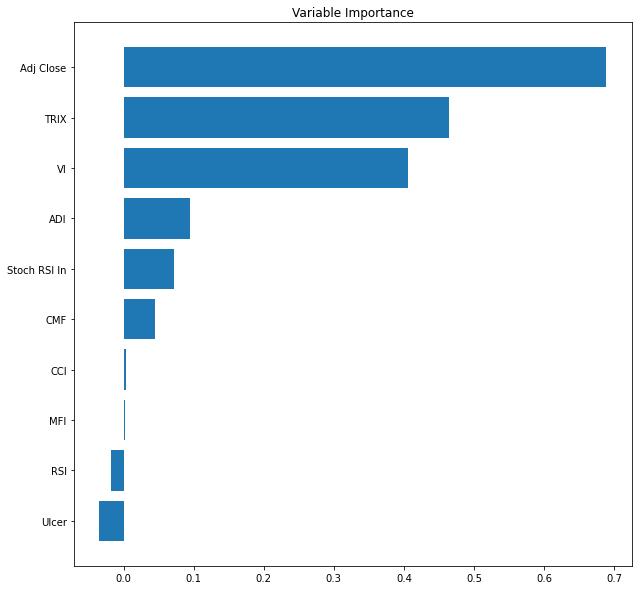

Alpha is: 0.78
R^2 Score: 0.9226484557141937
Mean Absolute Error: 0.3001899122329732
Mean Sqaured Error: 0.30149482861401394


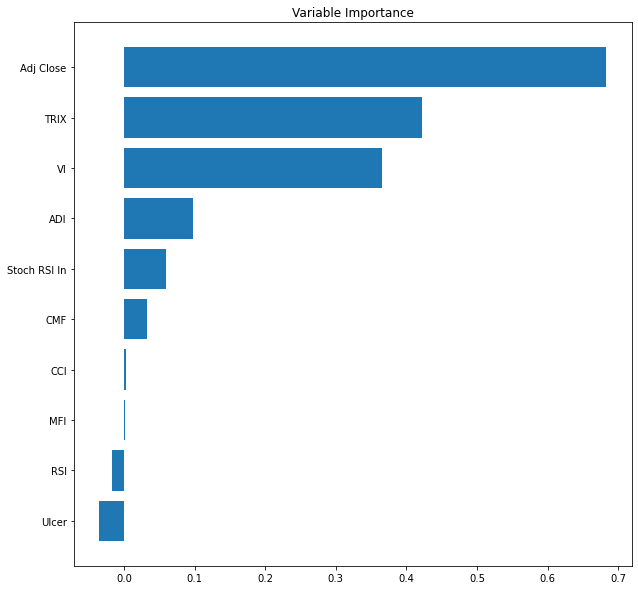

Alpha is: 0.89
R^2 Score: 0.9221869489404511
Mean Absolute Error: 0.3001899122329732
Mean Sqaured Error: 0.30149482861401394


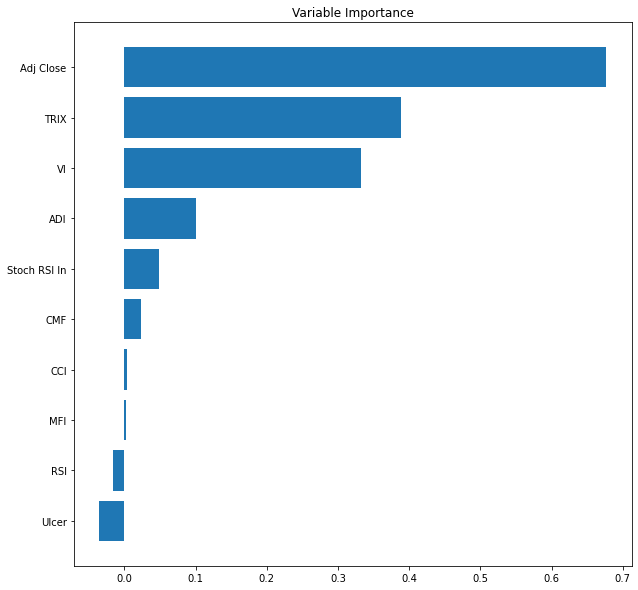

Alpha is: 1.0
R^2 Score: 0.9217715734000328
Mean Absolute Error: 0.3001899122329732
Mean Sqaured Error: 0.30149482861401394


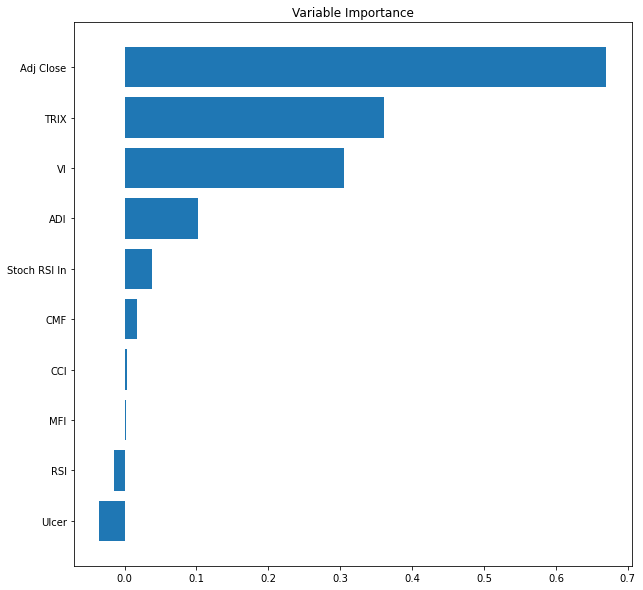

Alpha is: 0.01
R^2 Score: 0.8925992547383665
Mean Absolute Error: 0.33408129666975794
Mean Sqaured Error: 0.15535208144551316


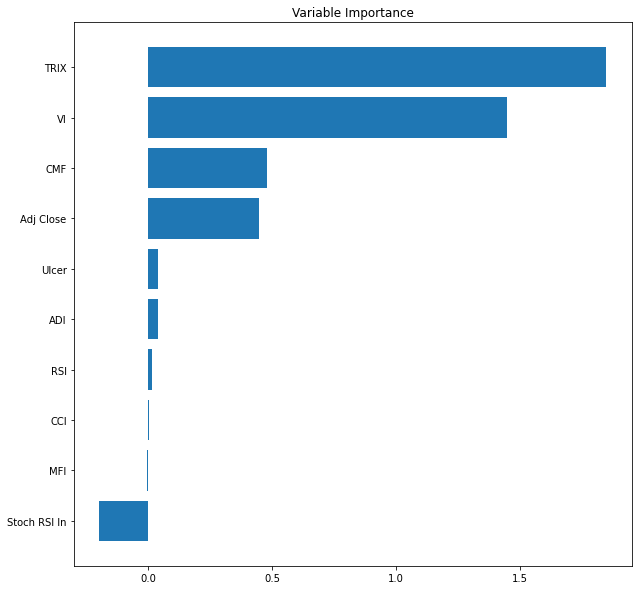

Alpha is: 0.12
R^2 Score: 0.891349727799323
Mean Absolute Error: 0.33408129666975794
Mean Sqaured Error: 0.15535208144551316


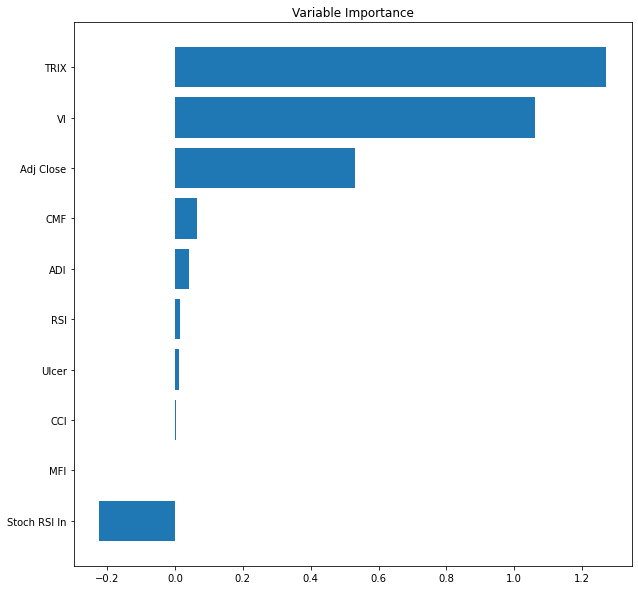

Alpha is: 0.23
R^2 Score: 0.8899679055651559
Mean Absolute Error: 0.33408129666975794
Mean Sqaured Error: 0.15535208144551316


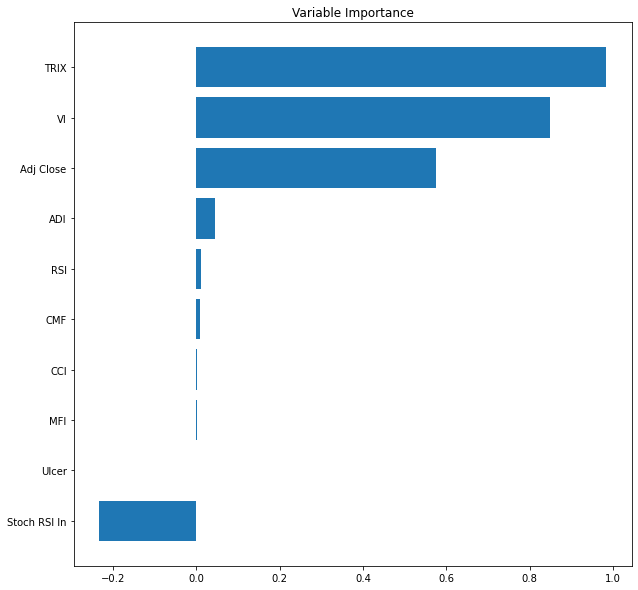

Alpha is: 0.34
R^2 Score: 0.8888346329018568
Mean Absolute Error: 0.33408129666975794
Mean Sqaured Error: 0.15535208144551316


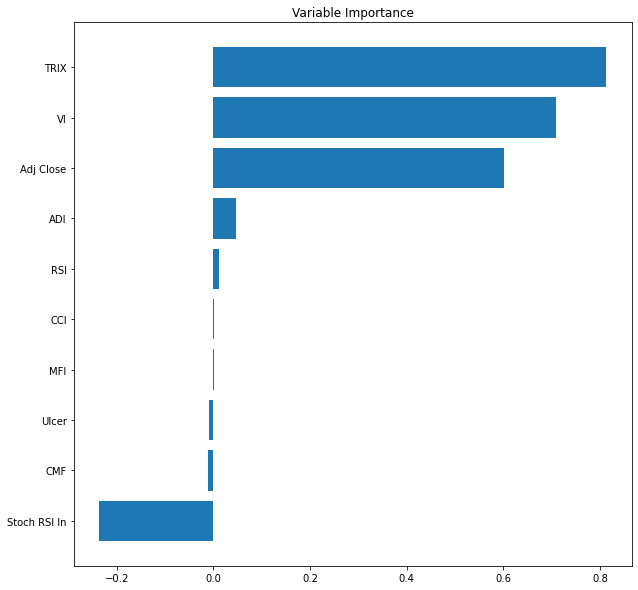

Alpha is: 0.45
R^2 Score: 0.8879266790240818
Mean Absolute Error: 0.33408129666975794
Mean Sqaured Error: 0.15535208144551316


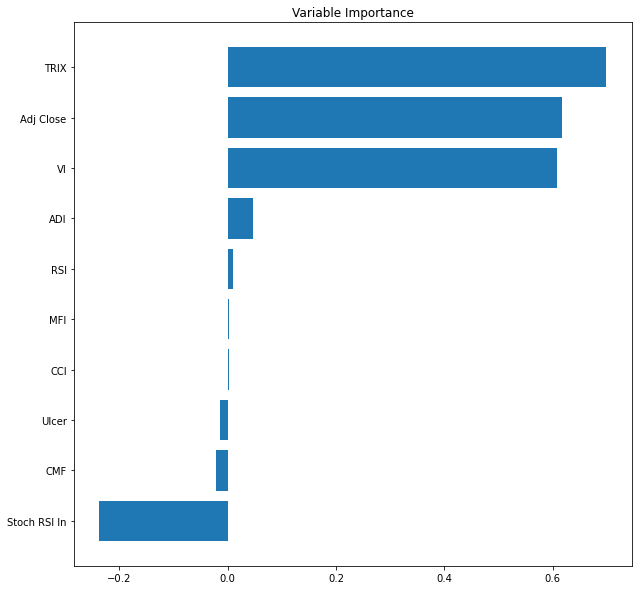

Alpha is: 0.56
R^2 Score: 0.8871896731412151
Mean Absolute Error: 0.33408129666975794
Mean Sqaured Error: 0.15535208144551316


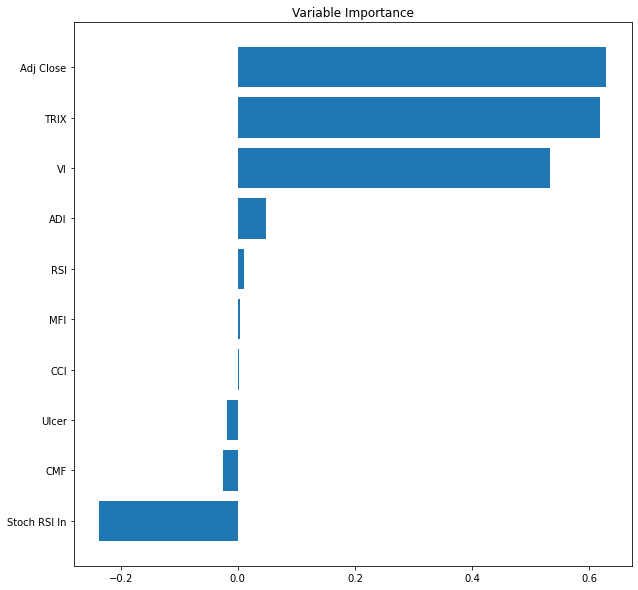

Alpha is: 0.67
R^2 Score: 0.8865794799087795
Mean Absolute Error: 0.33408129666975794
Mean Sqaured Error: 0.15535208144551316


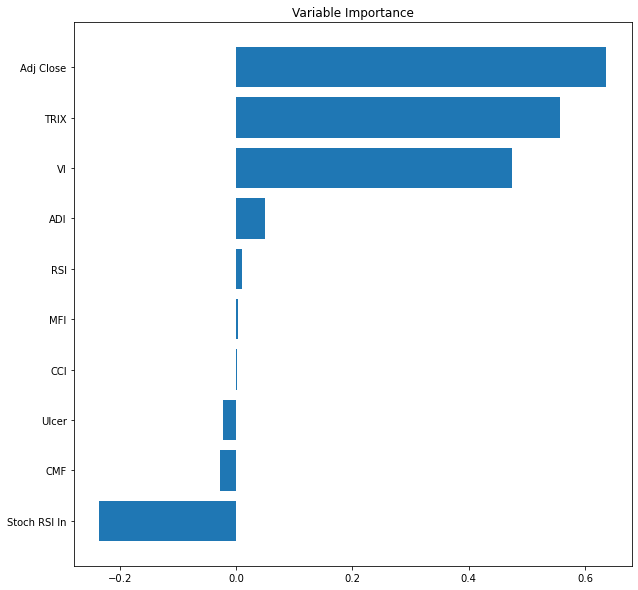

Alpha is: 0.78
R^2 Score: 0.8860640579477563
Mean Absolute Error: 0.33408129666975794
Mean Sqaured Error: 0.15535208144551316


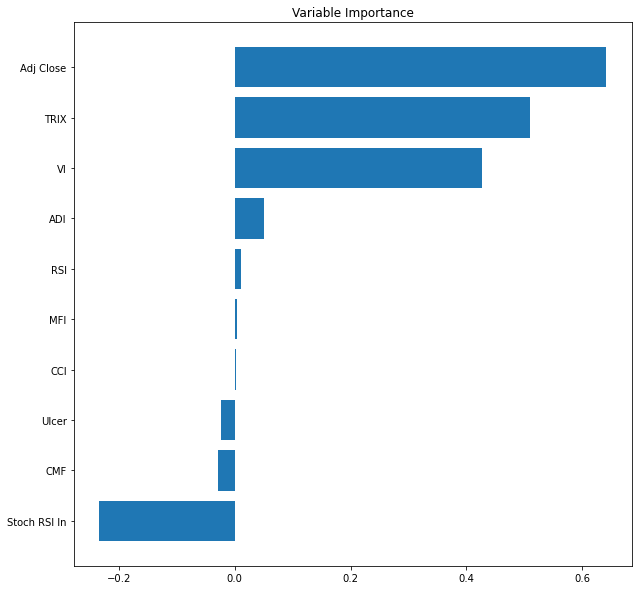

Alpha is: 0.89
R^2 Score: 0.8856204807601347
Mean Absolute Error: 0.33408129666975794
Mean Sqaured Error: 0.15535208144551316


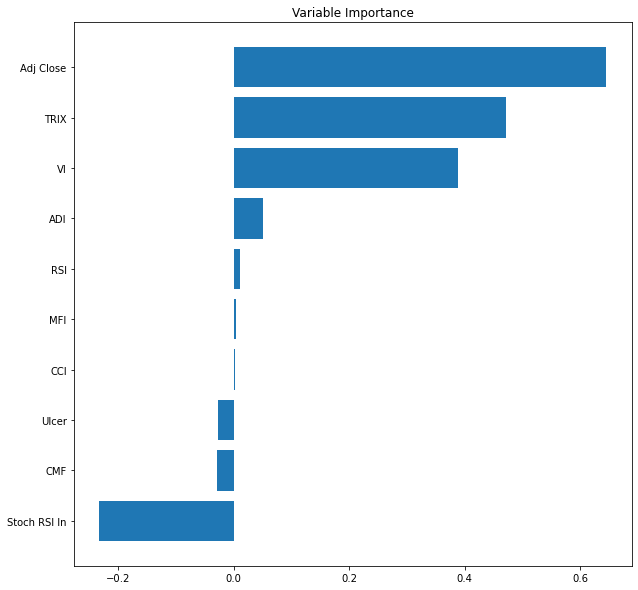

Alpha is: 1.0
R^2 Score: 0.8852321941277406
Mean Absolute Error: 0.33408129666975794
Mean Sqaured Error: 0.15535208144551316


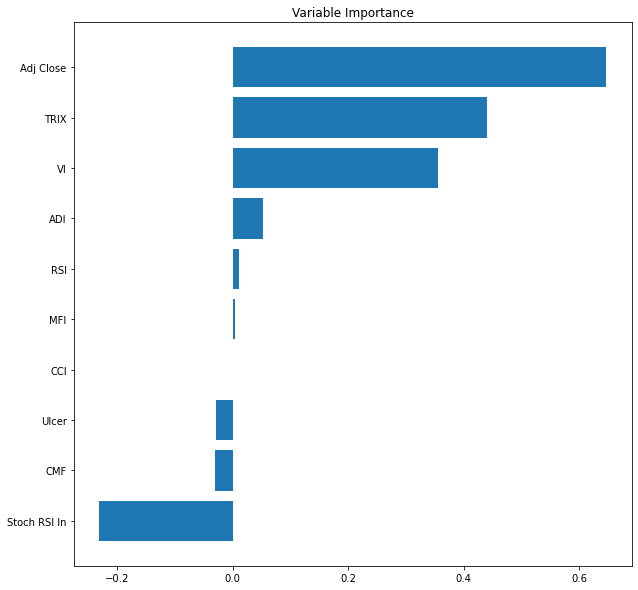

In [68]:
#Ridge Model

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    

    for alpha in np.linspace(.01, 1, 10):
        print('Alpha is:',alpha)
        ridge_model = linear_model.Ridge(alpha)
        ridge_model.fit(X_tr,y_tr)
        
        ridge_y_pred = rModel.predict(X_ts)
        
        r2 = ridge_model.score(X_tr,y_tr)
        mean_abs_error = mean_absolute_error(y_ts,ridge_y_pred)
        mean_sqr_error = mean_squared_error(y_ts,ridge_y_pred)
        print('R^2 Score:',r2)
        print('Mean Absolute Error:',mean_abs_error)
        print('Mean Sqaured Error:',mean_sqr_error)
        
        lm_imp = ridge_model.coef_
        sorted_idx = np.argsort(lm_imp)
        num_features = np.arange(sorted_idx.shape[0])
        plt.figure(figsize=(10,10))
        plt.barh(num_features,lm_imp[sorted_idx],align='center')
        plt.yticks(num_features, X_train_columns[sorted_idx])
        plt.title('Variable Importance')
        plt.show()

Best Parameters:{'max_depth': 2, 'n_estimators': 4}
R^2 Score: 0.7195826661783509
Mean Absolute Error: 1.1163826057006743
Mean Sqaured Error: 1.375432003806094


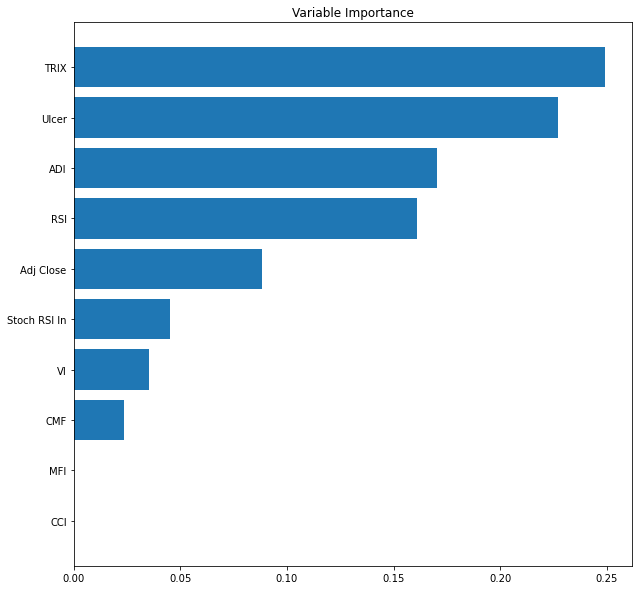

Best Parameters:{'max_depth': 4, 'n_estimators': 2}
R^2 Score: 0.9307287205342628
Mean Absolute Error: 1.1700176254180188
Mean Sqaured Error: 1.5907855255664896


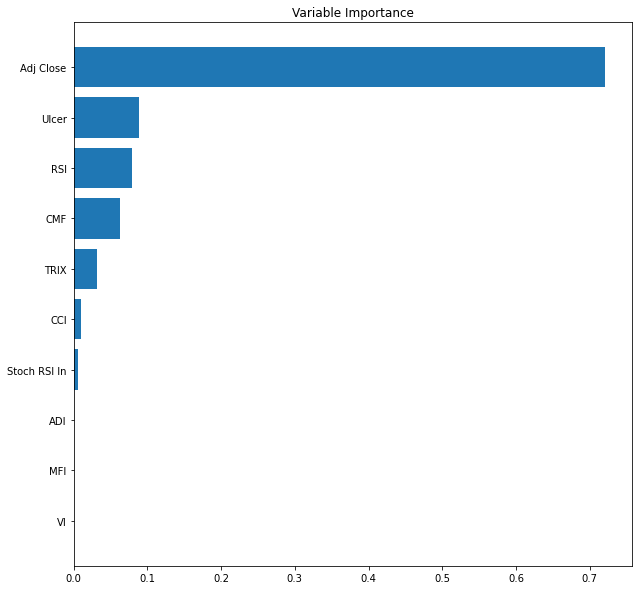

Best Parameters:{'max_depth': 4, 'n_estimators': 4}
R^2 Score: 0.9715304392606966
Mean Absolute Error: 0.3219239043879449
Mean Sqaured Error: 0.15678274238513457


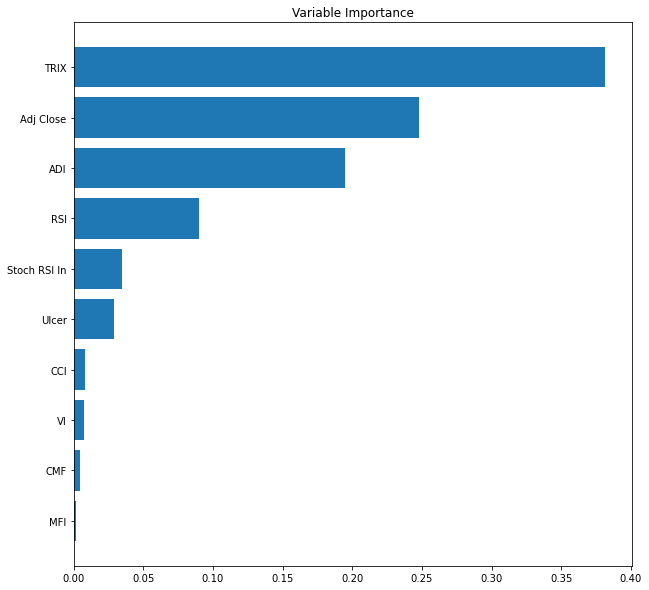

Best Parameters:{'max_depth': 4, 'n_estimators': 4}
R^2 Score: 0.9623384924113028
Mean Absolute Error: 0.38569594358678716
Mean Sqaured Error: 0.35788920131750485


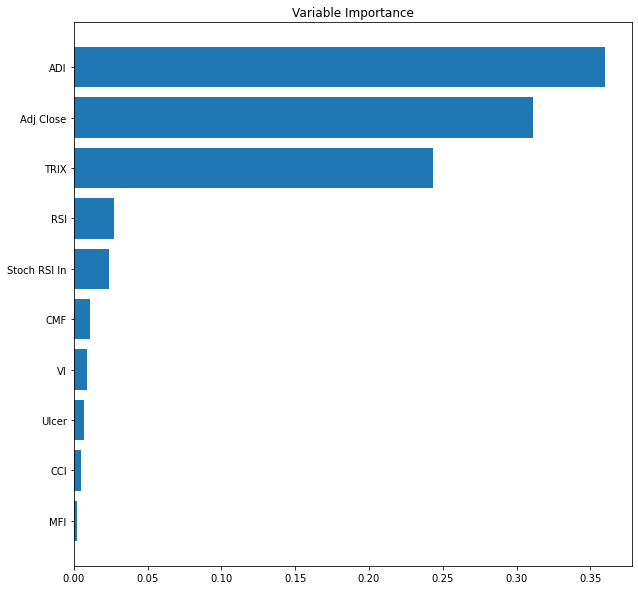

Best Parameters:{'max_depth': 4, 'n_estimators': 4}
R^2 Score: 0.9404292249100673
Mean Absolute Error: 0.4440193104856954
Mean Sqaured Error: 0.2845294370107012


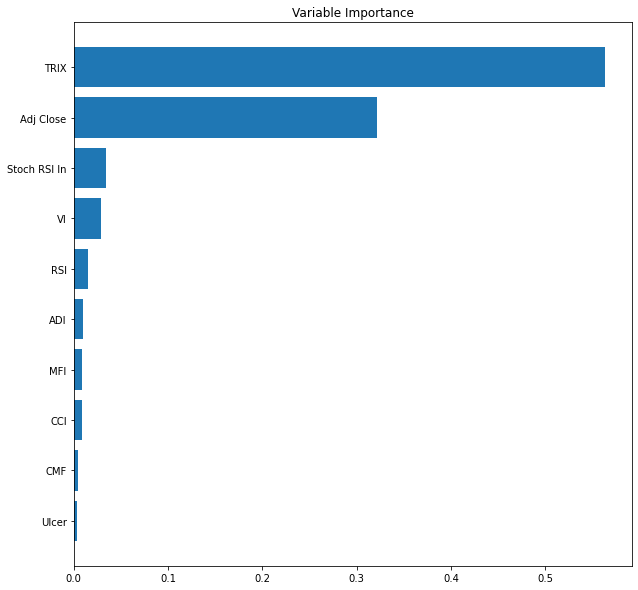

In [69]:
#Random Forest

for train_index, test_index in tscv.split(X): 
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    random_grid = {'n_estimators':np.arange(1,5),'max_depth':np.arange(1,5)}
    rfr = RandomForestRegressor(random_state=49)
    rfr_cv = GridSearchCV(rfr,random_grid,cv=5)
    rfr_cv.fit(X_tr,y_tr)
    print('Best Parameters:' + str(rfr_cv.best_params_))
    
    rfr = RandomForestRegressor(n_estimators = rfr_cv.best_params_['n_estimators'],max_depth = rfr_cv.best_params_['max_depth'],random_state=49)
    rfr.fit(X_tr,y_tr)
    
    y_pred_rfr = rfr.predict(X_ts)
    
    
    r2 = rfr.score(X_tr,y_tr)
    mean_abs_error = mean_absolute_error(y_ts,y_pred_rfr)
    mean_sqr_error = mean_squared_error(y_ts,y_pred_rfr)
    print('R^2 Score:',r2)
    print('Mean Absolute Error:',mean_abs_error)
    print('Mean Sqaured Error:',mean_sqr_error)


    rfr_imp = rfr.feature_importances_
    sorted_idx = np.argsort(rfr_imp)
    num_features = np.arange(sorted_idx.shape[0])
    plt.figure(figsize=(10,10))
    plt.barh(num_features,rfr_imp[sorted_idx],align='center')
    plt.yticks(num_features, X_train_columns[sorted_idx])
    plt.title('Variable Importance')
    plt.show()